# Descargas

In [ ]:
!pip install roboflow
!pip install segment-anything
!pip install keras-tuner
!pip install tensorboard
!pip install tensorflow-addons
!pip install scikit-optimize
!pip install minisom
!pip install umap-learn
!pip install optuna

#!pip install --upgrade tensorflow keras tensorflow-addons
# Descargar el checkpoint del modelo SAM
#!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

^C


In [ ]:
''' import kagglehub
# Download latest version
path = kagglehub.dataset_download("nobatgeldi/keras-efficientnetb3-noisy-student")
weights_path = path + "/efficientnet-b3_noisy_student_notop.h5"
print("Path to dataset files:", path) '''


# Datasets

## Dataset 1
URL: https://universe.roboflow.com/graduation-project-pafhg/tooth-lesions/dataset/1#
### Preprocessing
- Auto-Orient: Applied
- Resize: Stretch to 640x640
### Augmentations
- No augmentations were applied.
### Dataset Split
- Training: 179 images
- Validation: 40 images
- Test: 30 images

## Dataset 2
URL: https://universe.roboflow.com/framejframej-1-krvqf/oral-lesion-s57sl/dataset/3#
### Preprocessing
- Auto-Orient: Applied
- Resize: Stretch to 640x640
### Augmentations
- Outputs per training example: 3
- Flip: Horizontal
- Crop: 0% Minimum Zoom, 40% Maximum Zoom
- Rotation: Between -15° and +15°
- Blur: Up to 1.5px
### Dataset Split
- Training: 411 images
- Validation: 39 images
- Test: 19 images

## Dataset 3
URL: https://universe.roboflow.com/khon-kean-university-xqvix/2main-project/dataset/6/download
### Preprocessing
- Auto-Orient: Applied
- Auto-Adjust Contrast: Using Histogram Equalization
### Augmentations
- Outputs per training example: 2
- Rotation: Between -7° and +7°
- Brightness: Between -10% and +10%
### Dataset Split
- Training: 260 images
- Validation: 42 images
- Test: 42 images

## Dataset 4
URL: https://universe.roboflow.com/bits-xn4un/final-oral-cancer-merge/dataset/1
### Preprocessing
- Auto-Orient: Applied
- Resize: Stretch to 640x640
- Modify Classes: 5 remapped, 0 dropped
### Augmentations
- No augmentations were applied.
### Dataset Split
- Training: 777 images
- Validation: 225 images
- Test: 169 images

## Dataset 5
URL: https://universe.roboflow.com/cancerresearch/oral_cancer2
### Preprocessing
- Auto-Orient: Applied
- Resize: Stretch to 640x640
### Augmentations
- Outputs per training example: 3
- Flip: Horizontal
- Crop: 0% Minimum Zoom, 20% Maximum Zoom
### Dataset Split
- Training: 1941 images
- Validation: 183 images
- Test: 94 images

## Dataset 6
URL: https://universe.roboflow.com/pixel6/demo-z1nfg/dataset/9
### Preprocessing
- Resize: Fill (with center crop) in 224x224
### Augmentations
- No augmentations were applied.
### Dataset Split
- Training: 135 images
- Validation: 36 images
- Test: 19 images

# Descarga Y Movilizacion a Carpetas correspondientes

## Obtencion Datos

In [ ]:
!pip install roboflow

In [ ]:
import os
import shutil
import json
import matplotlib.pyplot as plt
from roboflow import Roboflow
from collections import Counter

# Define el mapeo de etiquetas a 'benigno' o 'maligno'
label_map = {
    'Benign': "benigno",
    'benign': "benigno",
    "Malignant": "maligno",
    "malignant": "maligno",
    "Lichen": "maligno",
    "benigno": "benigno",
    "Benigno": "benigno",
    "maligno": "maligno",
    "Maligno": "maligno",
    "precancerous": "maligno",
    "benign lesion": "benigno",
    "null": "maligno",
    "common-oral-lesion": "benigno",
    "precancerous-oral-lesion": "maligno",
    "Aphthous": "benigno",
    "aphthous": "benigno",
    "Normal_mouth": "benigno",
    "normal_mouth": "benigno",
    "Oral_cancer": "maligno",
    "oral_cancer": "maligno",
    "cancer": "maligno",
    "oral cancer": "maligno",
    "oral-cancer": "maligno",
    "non-cancer": "benigno",
    "n-cancer": "benigno",
    "cancerous": "maligno",
    "noncancer": "benigno",
    "cancerous lesion": "maligno",
    "abnormal": "maligno",
    "abnormal normal": "benigno",
    "normal": "benigno",
    "Normal": "benigno",
    "detect-lesions": "benigno",
    "normal null": "benigno",
    "Null": "maligno",
    "CANCER": "maligno",
    "cancer": "maligno",
    "NONCANCER": "benigno",
    "OSCC": "maligno",
    "oscc": "maligno",
    "Normal Null": "benigno",
    "Abnormal": "maligno",
    "Abnormal Normal": "benigno",
    'Benign': "benigno",
    'benign': "benigno",
    "Malignant": "maligno",
    "malignant": "maligno",
    "Lichen": "maligno",
    'OSCC': "maligno",
    "oscc": "maligno",
    'oral cancer': "maligno",
    'non-cancer': "benigno",
    'common-oral-lesion': "benigno",
    'precancerous-oral-lesion': "maligno"
}

# Define estructura de carpetas base
base_path = "1_dataset"
subdirs = ["train", "valid", "test"]
categories = ["benigno", "maligno"]

# Crear la estructura base de carpetas
for subdir in subdirs:
    for category in categories:
        os.makedirs(os.path.join(base_path, subdir, category), exist_ok=True)

def process_coco_dataset(dataset_path, split, label_map, base_path):
    annotations_file = os.path.join(dataset_path, split, "_annotations.coco.json")
    if not os.path.exists(annotations_file):
        print(f"[INFO] Archivo de anotaciones no encontrado para el split '{split}' en {dataset_path}.")
        return Counter()

    with open(annotations_file, "r") as file:
        annotations_data = json.load(file)

    image_id_to_category = {ann["image_id"]: ann["category_id"] for ann in annotations_data.get("annotations", [])}
    image_id_to_filename = {img["id"]: img["file_name"] for img in annotations_data["images"]}
    category_id_to_name = {cat["id"]: cat["name"].strip().lower() for cat in annotations_data["categories"]}

    split_summary = Counter()
    for image_id, category_id in image_id_to_category.items():
        file_name = image_id_to_filename.get(image_id)
        category_name = category_id_to_name.get(category_id, "unknown")
        label = label_map.get(category_name, "unknown")

        if label in categories:
            src_path = os.path.join(dataset_path, split, file_name)
            dest_dir = os.path.join(base_path, split, label)
            os.makedirs(dest_dir, exist_ok=True)
            try:
                shutil.move(src_path, os.path.join(dest_dir, file_name))
                split_summary[label] += 1
            except Exception as e:
                print(f"[ERROR] Error al mover {src_path}: {e}")
        else:
            print(f"[WARNING] Etiqueta desconocida '{category_name}' encontrada en {split}.")
    return split_summary

def process_folder_format(dataset_path, split, base_path):
    split_path = os.path.join(dataset_path, split)
    if not os.path.exists(split_path):
        print(f"[INFO] Split '{split}' no encontrado en {dataset_path}.")
        return Counter()

    split_summary = Counter()
    for class_name in os.listdir(split_path):
        class_path = os.path.join(split_path, class_name)
        if os.path.isdir(class_path):
            label = label_map.get(class_name.lower(), "unknown")
            if label in categories:
                dest_dir = os.path.join(base_path, split, label)
                os.makedirs(dest_dir, exist_ok=True)
                for file_name in os.listdir(class_path):
                    file_path = os.path.join(class_path, file_name)
                    try:
                        shutil.move(file_path, os.path.join(dest_dir, file_name))
                        split_summary[label] += 1
                    except Exception as e:
                        print(f"[ERROR] Error al mover {file_path}: {e}")
            else:
                print(f"[WARNING] Clase desconocida '{class_name}' en formato folder.")
    return split_summary

def generate_pie_charts(dataset_name, train_summary, valid_summary, test_summary, dataset_number):
    """
    Genera gráficos de pastel para la distribución de benigno/maligno en cada split (train, valid, test, total).
    Args:
        dataset_name: Nombre del dataset.
        train_summary: Conteo de etiquetas en el split train.
        valid_summary: Conteo de etiquetas en el split valid.
        test_summary: Conteo de etiquetas en el split test.
        dataset_number: Número del dataset actual para incluirlo en el título.
    """
    total_summary = train_summary + valid_summary + test_summary

    summaries = {
        "Train": train_summary,
        "Valid": valid_summary,
        "Test": test_summary,
        "Total": total_summary
    }

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f"Distribución de Dataset {dataset_number} ({dataset_name})", fontsize=16)

    for i, (split, summary) in enumerate(summaries.items()):
        ax = axes[i // 2, i % 2]
        labels, sizes = zip(*summary.items()) if summary else ([], [])
        colors = ["#4CAF50" if label == "benigno" else "#F44336" for label in labels]
        ax.pie(sizes, labels=labels, autopct='%1.1f%%' if sizes else None, startangle=90, colors=colors)
        ax.set_title(f"{split} ({sum(sizes)} imágenes)" if sizes else f"{split} (Sin datos)", fontsize=12)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Función principal para procesar todos los datasets
def process_datasets(datasets_info):
    rf = Roboflow(api_key="mTLjDGujncaclfWKAtmr")

    for dataset_number, dataset in enumerate(datasets_info, start=1):
        project = dataset["project"]
        dataset_name = dataset["dataset"]
        version = dataset["version"]
        data_format = dataset["format"]

        print(f"\nDescargando dataset: {dataset_name}, versión: {version}")
        try:
            project_obj = rf.workspace(project).project(dataset_name)
            dataset_obj = project_obj.version(version).download(data_format)
            dataset_path = dataset_obj.location
        except Exception as e:
            print(f"[ERROR] Error al descargar el dataset {dataset_name}: {e}")
            continue

        train_summary, valid_summary, test_summary = Counter(), Counter(), Counter()

        if data_format == "coco":
            print(f"[INFO] Procesando dataset COCO: {dataset_name}")
            for split in ["train", "valid", "test"]:
                summary = process_coco_dataset(dataset_path, split, label_map, base_path)
                if split == "train":
                    train_summary = summary
                elif split == "valid":
                    valid_summary = summary
                elif split == "test":
                    test_summary = summary
        elif data_format == "folder":
            print(f"[INFO] Procesando dataset Folder: {dataset_name}")
            for split in ["train", "valid", "test"]:
                summary = process_folder_format(dataset_path, split, base_path)
                if split == "train":
                    train_summary = summary
                elif split == "valid":
                    valid_summary = summary
                elif split == "test":
                    test_summary = summary
        else:
            print(f"[ERROR] Formato de dataset desconocido: {data_format}.")
            continue

        print(f"\nResumen de {dataset_name}:")
        print(f"  Train: {sum(train_summary.values())} imágenes")
        print(f"  Valid: {sum(valid_summary.values())} imágenes")
        print(f"  Test: {sum(test_summary.values())} imágenes")
        print(f"  Total: {sum((train_summary + valid_summary + test_summary).values())} imágenes")

        generate_pie_charts(dataset_name, train_summary, valid_summary, test_summary, dataset_number)

# Información de los datasets
datasets_info = [
    {"project": "graduation-project-pafhg", "dataset": "tooth-lesions", "version": 1, "format": "coco"},
    {"project": "framejframej-1-krvqf", "dataset": "oral-lesion-s57sl", "version": 3, "format": "coco"},
    {"project": "khon-kean-university-xqvix", "dataset": "2main-project", "version": 6, "format": "folder"},
    {"project": "bits-xn4un", "dataset": "final-oral-cancer-merge", "version": 1, "format": "coco"},
    {"project": "cancerresearch", "dataset": "oral_cancer2", "version": 1, "format": "folder"},
    {"project": "haridas", "dataset": "oral_cancer-c4fqt", "version": 1, "format": "folder"},
    {"project": "cancer-oral-unab", "dataset": "oralcancerunab", "version": 2, "format": "folder"},
    {"project": "ceklidah-yuk", "dataset": "ceklidah", "version": 6, "format": "coco"},
]

# Procesar los datasets
process_datasets(datasets_info)

In [ ]:
import os
import matplotlib.pyplot as plt
from collections import Counter

def generate_total_pie_charts_with_counts(base_path):
    """
    Genera una matriz 2x2 de gráficos de pastel para la distribución total de benignos y malignos
    en los splits train, valid, test y el total acumulado, incluyendo el número total en el título.

    Args:
        base_path: Ruta base donde están las carpetas train, valid y test.
    """
    splits = ["train", "valid", "test"]
    summaries = {}

    # Contar las imágenes por etiquetas en cada split
    for split in splits:
        split_path = os.path.join(base_path, split)
        summary = Counter()
        if os.path.exists(split_path):
            for category in os.listdir(split_path):
                category_path = os.path.join(split_path, category)
                if os.path.isdir(category_path):
                    summary[category] += len(os.listdir(category_path))
        summaries[split] = summary

    # Calcular el total acumulado
    total_summary = Counter()
    for split_summary in summaries.values():
        total_summary.update(split_summary)
    summaries["total"] = total_summary

    # Crear la matriz de gráficos 2x2
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle("Distribución Total de Dataset Total", fontsize=16)

    splits_with_total = splits + ["total"]
    for i, split in enumerate(splits_with_total):
        ax = axes[i // 2, i % 2]
        summary = summaries.get(split, Counter())
        labels, sizes = zip(*summary.items()) if summary else ([], [])
        colors = ["#4CAF50" if label == "benigno" else "#F44336" for label in labels]

        # Crear el gráfico de pastel
        wedges, texts, autotexts = ax.pie(
            sizes,
            labels=labels,
            autopct='%1.1f%%' if sizes else None,
            startangle=90,
            colors=colors,
            textprops={'fontsize': 10}
        )

        # Título con conteo de benignos y malignos
        benign_count = summary.get("benigno", 0)
        malign_count = summary.get("maligno", 0)
        total_count = sum(sizes)
        ax.set_title(
            f"{split.capitalize()} ({benign_count} benignos, {malign_count} malignos, Total: {total_count})" if sizes else f"{split.capitalize()} (Sin datos)",
            fontsize=12
        )

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


# Llamar a la función para generar los gráficos
generate_total_pie_charts_with_counts("1_dataset")


In [ ]:
def generate_split_distribution_pie_chart(base_path):
    """
    Genera un gráfico de pastel que muestra la proporción de imágenes de train, valid y test
    en relación al total.

    Args:
        base_path: Ruta base donde están las carpetas train, valid y test.
    """
    splits = ["train", "valid", "test"]
    split_sizes = {}

    # Contar las imágenes totales en cada split
    for split in splits:
        split_path = os.path.join(base_path, split)
        total_images = 0
        if os.path.exists(split_path):
            for category in os.listdir(split_path):
                category_path = os.path.join(split_path, category)
                if os.path.isdir(category_path):
                    total_images += len(os.listdir(category_path))
        split_sizes[split] = total_images

    # Datos para el gráfico
    labels = list(split_sizes.keys())
    sizes = list(split_sizes.values())
    total_count = sum(sizes)
    colors = ["#FF9999", "#66B2FF", "#99FF99"]  # Colores para train, valid y test

    # Crear el gráfico de pastel
    fig, ax = plt.subplots(figsize=(8, 8))
    wedges, texts, autotexts = ax.pie(
        sizes,
        labels=labels,
        autopct=lambda pct: f"{int(pct / 100. * total_count)} imágenes ({pct:.1f}%)",
        startangle=90,
        colors=colors,
        textprops={'fontsize': 12},
    )

    # Configurar título y formato
    ax.set_title(
        f"Distribución de Train, Valid y Test (Total: {total_count} imágenes)",
        fontsize=14
    )
    for autotext in autotexts:
        autotext.set_color("black")
        autotext.set_fontweight("bold")

    plt.tight_layout()
    plt.show()


# Llamar a la función para generar el gráfico
generate_split_distribution_pie_chart("1_dataset")


In [ ]:
def generate_benign_malign_split_charts(base_path):
    """
    Genera gráficos de pastel en una matriz 2x1 que muestra la proporción
    de imágenes benignas y malignas destinadas a train, valid y test.

    Args:
        base_path: Ruta base donde están las carpetas train, valid y test.
    """
    splits = ["train", "valid", "test"]
    categories = ["benigno", "maligno"]
    category_split_counts = {category: {split: 0 for split in splits} for category in categories}

    # Contar las imágenes por categoría y split
    for split in splits:
        split_path = os.path.join(base_path, split)
        if os.path.exists(split_path):
            for category in categories:
                category_path = os.path.join(split_path, category)
                if os.path.exists(category_path):
                    category_split_counts[category][split] = len(os.listdir(category_path))

    # Crear gráficos de pastel
    fig, axes = plt.subplots(1, 2, figsize=(10, 12))
    fig.suptitle("Distribución de Benignos y Malignos en Train, Valid y Test", fontsize=16)

    for i, category in enumerate(categories):
        splits_data = category_split_counts[category]
        labels = list(splits_data.keys())
        sizes = list(splits_data.values())
        total_count = sum(sizes)

        # Crear gráfico de pastel
        wedges, texts, autotexts = axes[i].pie(
            sizes,
            labels=labels,
            autopct=lambda pct: f"{int(pct / 100. * total_count)} imágenes ({pct:.1f}%)",
            startangle=90,
            colors=["#66B2FF", "#99FF99", "#FF9999"],  # Colores para train, valid y test
            textprops={'fontsize': 12},
        )

        # Configurar título
        axes[i].set_title(
            f"Distribución de {category.capitalize()} (Total: {total_count} imágenes)",
            fontsize=14
        )

        # Configurar texto de las proporciones
        for autotext in autotexts:
            autotext.set_color("black")
            autotext.set_fontweight("bold")

    # Ajustar diseño
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


# Llamar a la función para generar los gráficos
generate_benign_malign_split_charts("1_dataset")


## Unlabeled Data

In [ ]:
import os
import shutil

from roboflow import Roboflow
rf = Roboflow(api_key="mTLjDGujncaclfWKAtmr")
project = rf.workspace("sagari-vijay").project("roi-yvuwn")
version = project.version(1)
dataset = version.download("coco")

from roboflow import Roboflow
rf = Roboflow(api_key="mTLjDGujncaclfWKAtmr")
project = rf.workspace("oral-ke2sj").project("non-e9q67")
version = project.version(2)
dataset = version.download("coco")

# Define las rutas de las carpetas
dataset_folder_1 = 'ROI-1'  # Ruta donde están las carpetas 'train', 'valid' y 'test'
dataset_folder_2 = 'non-2'  # Ruta donde está la carpeta 'train' de 'non-2'
unlabeled_folder = '1_dataset_unlabeled/unlabeled'  # Nueva subcarpeta para imágenes no etiquetadas

# Crea la carpeta de destino si no existe
os.makedirs(unlabeled_folder, exist_ok=True)

# Función para copiar imágenes de subcarpetas a una sola carpeta
def collect_unlabeled_images(source_folder, target_folder):
    for root, _, files in os.walk(source_folder):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                shutil.copy(os.path.join(root, file), target_folder)

''' # Recolecta imágenes de las carpetas 'train', 'valid' y 'test' en dataset_folder_1
subfolders_1 = ['train', 'valid', 'test']
for subfolder in subfolders_1:
    subfolder_path = os.path.join(dataset_folder_1, subfolder)
    collect_unlabeled_images(subfolder_path, unlabeled_folder) '''

# Recolecta imágenes de la carpeta 'train' en dataset_folder_2
subfolder_path_2 = os.path.join(dataset_folder_2, 'train')
collect_unlabeled_images(subfolder_path_2, unlabeled_folder)

print(f"Las imágenes han sido copiadas a {unlabeled_folder}")

# Verificar cuántas imágenes se han copiado
num_images = len(os.listdir(unlabeled_folder))
print(f"Total de imágenes en la carpeta no etiquetada: {num_images}")


## Agregacion a Valid

In [ ]:
''' import os
import shutil
from roboflow import Roboflow

# Paso 1: Descargar el primer dataset
rf = Roboflow(api_key="mTLjDGujncaclfWKAtmr")
project1 = rf.workspace("pixel6").project("demo-z1nfg")
version1 = project1.version(9)
dataset1 = version1.download("folder")

# Ruta donde se descargará el primer dataset
dataset1_path = dataset1.location  # Ubicación donde se descargó el primer dataset

# Descargar el segundo dataset
project2 = rf.workspace("latifa-sassi-zqgnz").project("lichen-beningn-and-malignant-mywfg")
version2 = project2.version(1)
dataset2 = version2.download("coco")

# Ruta donde se descargará el segundo dataset
dataset2_path = dataset2.location  # Ubicación donde se descargó el segundo dataset

# Paso 2: Crear las carpetas "valid/benigno" y "valid/maligno" si no existen
valid_benigno_path = os.path.join("1_dataset", "valid", "benigno")
valid_maligno_path = os.path.join("1_dataset", "valid", "maligno")
os.makedirs(valid_benigno_path, exist_ok=True)
os.makedirs(valid_maligno_path, exist_ok=True)

# Función para mover imágenes según la clase (oral_cancer -> maligno, Normal_mouth -> benigno)
def move_images_by_class(source_folder, benigno_folder, maligno_folder):
    for root, dirs, files in os.walk(source_folder):
        for file in files:
            file_path = os.path.join(root, file)
            # Clasificar según la subcarpeta
            if root in ['oral_cancer', 'malignant', 'Lichen', 'precancerous', 'null']:
                # Mover a la carpeta de "maligno"
                shutil.move(file_path, maligno_folder)
            elif root in ['Normal_mouth', 'benign', 'Benign', 'benign lesion']:
                # Mover a la carpeta de "benigno"
                shutil.move(file_path, benigno_folder)

# Paso 3: Mover las imágenes del primer dataset (oral_cancer -> maligno, Normal_mouth -> benigno)
train_path1 = os.path.join(dataset1_path, "train")
valid_path1 = os.path.join(dataset1_path, "valid")
test_path1 = os.path.join(dataset1_path, "test")

move_images_by_class(train_path1, valid_benigno_path, valid_maligno_path)
move_images_by_class(valid_path1, valid_benigno_path, valid_maligno_path)
move_images_by_class(test_path1, valid_benigno_path, valid_maligno_path)

# Paso 4: Mover las imágenes del segundo dataset (malignant -> maligno, benign -> benigno)
train_path2 = os.path.join(dataset2_path, "train")
valid_path2 = os.path.join(dataset2_path, "valid")
test_path2 = os.path.join(dataset2_path, "test")

move_images_by_class(train_path2, valid_benigno_path, valid_maligno_path)
move_images_by_class(valid_path2, valid_benigno_path, valid_maligno_path)
move_images_by_class(test_path2, valid_benigno_path, valid_maligno_path)

print("Las imágenes de ambos datasets se han movido correctamente a la carpeta valid.")
 '''

# Gráficos

     Set  Benigno  Maligno  Total
0  Train     3727     4011   7738
1  Valid      430      651   1081
2   Test      320      368    688
3  Total     4477     5030   9507


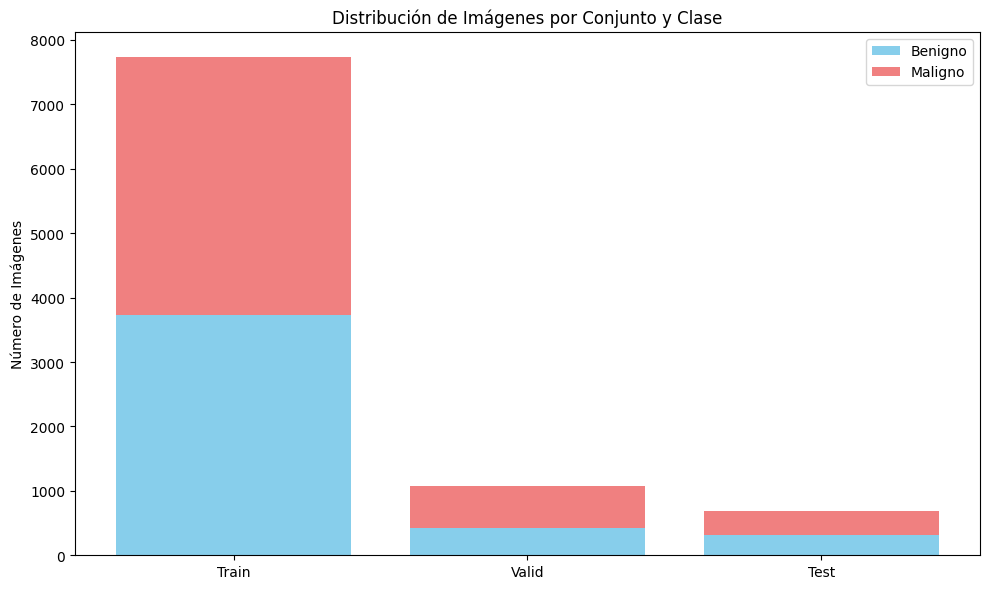

In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd

# Función para contar imágenes en una carpeta
def count_images_in_directory(directory):
    image_extensions = {".jpg", ".jpeg", ".png", ".bmp"}
    count = 0
    for root, dirs, files in os.walk(directory):
        count += len([f for f in files if os.path.splitext(f)[1].lower() in image_extensions])
    return count

# Directorios de las carpetas de destino (donde están las imágenes movidas)
base_path = "1_dataset"

# Contar imágenes en las carpetas de destino
train_benigno_count = count_images_in_directory(os.path.join(base_path, 'train', 'benigno'))
train_maligno_count = count_images_in_directory(os.path.join(base_path, 'train', 'maligno'))
valid_benigno_count = count_images_in_directory(os.path.join(base_path, 'valid', 'benigno'))
valid_maligno_count = count_images_in_directory(os.path.join(base_path, 'valid', 'maligno'))
test_benigno_count = count_images_in_directory(os.path.join(base_path, 'test', 'benigno'))
test_maligno_count = count_images_in_directory(os.path.join(base_path, 'test', 'maligno'))

# Totales por conjunto de datos
total_train = train_benigno_count + train_maligno_count
total_valid = valid_benigno_count + valid_maligno_count
total_test = test_benigno_count + test_maligno_count
total_benigno = train_benigno_count + valid_benigno_count + test_benigno_count
total_maligno = train_maligno_count + valid_maligno_count + test_maligno_count
total_data = total_benigno + total_maligno

# Crear un DataFrame para resumir los datos
data_counts_df = pd.DataFrame({
    "Set": ["Train", "Valid", "Test", "Total"],
    "Benigno": [train_benigno_count, valid_benigno_count, test_benigno_count, total_benigno],
    "Maligno": [train_maligno_count, valid_maligno_count, test_maligno_count, total_maligno],
    "Total": [total_train, total_valid, total_test, total_data]
})

# Mostrar los datos en forma de tabla
print(data_counts_df)

# Graficar las proporciones
labels = ['Train', 'Valid', 'Test']
benigno_values = [train_benigno_count, valid_benigno_count, test_benigno_count]
maligno_values = [train_maligno_count, valid_maligno_count, test_maligno_count]

# Crear gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, benigno_values, label='Benigno', color='skyblue')
ax.bar(labels, maligno_values, bottom=benigno_values, label='Maligno', color='lightcoral')

ax.set_ylabel('Número de Imágenes')
ax.set_title('Distribución de Imágenes por Conjunto y Clase')
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Calcular la distribución total
total_counts = Counter()
for dataset in label_counts:
    total_counts.update(label_counts[dataset])
label_counts['total'] = total_counts

# Crear una figura con una matriz de subgráficos 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Ajusta el tamaño según sea necesario
fig.suptitle("Distribución de etiquetas en los conjuntos de datos - Dataset Total", fontsize=16)

# Ordenar los datasets para los subgráficos
dataset_order = ['train', 'valid', 'test', 'total']
axes = axes.flatten()  # Aplanar la matriz para facilitar el acceso a los ejes

for i, dataset in enumerate(dataset_order):
    counts = label_counts.get(dataset, Counter())
    labels = list(counts.keys())
    values = list(counts.values())
    total = sum(values)

    # Saltar si no hay datos
    if total == 0:
        axes[i].set_title(f"{dataset.capitalize()} (Sin datos)", fontsize=12)
        axes[i].axis("off")
        continue

    # Colores para las secciones
    colors = ['#4CAF50' if label == 'benigno' else '#F44336' for label in labels]

    # Crear el gráfico de torta
    def format_autopct(pct, all_vals):
        absolute = int(round(pct / 100. * sum(all_vals)))
        return f"{absolute} ({pct:.1f}%)"  # Ejemplo: "10 (20.5%)"

    wedges, texts, autotexts = axes[i].pie(
        values,
        labels=labels,
        autopct=lambda pct: format_autopct(pct, values),  # Formato personalizado
        startangle=90,      # Inicia el gráfico desde el ángulo de 90 grados
        colors=colors,
        textprops={'fontsize': 10}
    )

    # Configurar título del subgráfico
    axes[i].set_title(f"{dataset.capitalize()}", fontsize=14)

    # Ajustar el texto interno
    for autotext in autotexts:
        autotext.set_color('black')  # Texto dentro de las porciones en blanco
        autotext.set_fontweight('bold')

# Apagar cualquier gráfico sobrante si hay menos de 4 datasets
for j in range(len(dataset_order), len(axes)):
    axes[j].axis("off")

# Ajustar diseño
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Dejar espacio para el título
plt.show()

NameError: name 'label_counts' is not defined

In [ ]:
# Calcular la distribución total
total_counts = Counter()
for dataset in label_counts:
    total_counts.update(label_counts[dataset])
label_counts['total'] = total_counts

# Crear una figura con una matriz de subgráficos 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Ajusta el tamaño según sea necesario
fig.suptitle("Distribución de etiquetas en los conjuntos de datos - Dataset Valid 2", fontsize=16)

# Ordenar los datasets para los subgráficos
dataset_order = ['train', 'valid', 'test', 'total']
axes = axes.flatten()  # Aplanar la matriz para facilitar el acceso a los ejes

for i, dataset in enumerate(dataset_order):
    counts = label_counts.get(dataset, Counter())
    labels = list(counts.keys())
    values = list(counts.values())
    total = sum(values)

    # Saltar si no hay datos
    if total == 0:
        axes[i].set_title(f"{dataset.capitalize()} (Sin datos)", fontsize=12)
        axes[i].axis("off")
        continue

    # Colores para las secciones
    colors = ['#4CAF50' if label == 'Benigno' else '#F44336' for label in labels]

    # Crear el gráfico de torta
    def format_autopct(pct, all_vals):
        absolute = int(round(pct / 100. * sum(all_vals)))
        return f"{absolute} ({pct:.1f}%)"  # Ejemplo: "10 (20.5%)"

    wedges, texts, autotexts = axes[i].pie(
        values,
        labels=labels,
        autopct=lambda pct: format_autopct(pct, values),  # Formato personalizado
        startangle=90,      # Inicia el gráfico desde el ángulo de 90 grados
        colors=colors,
        textprops={'fontsize': 10}
    )

    # Configurar título del subgráfico
    axes[i].set_title(f"{dataset.capitalize()}", fontsize=14)

    # Ajustar el texto interno
    for autotext in autotexts:
        autotext.set_color('black')  # Texto dentro de las porciones en blanco
        autotext.set_fontweight('bold')

# Apagar cualquier gráfico sobrante si hay menos de 4 datasets
for j in range(len(dataset_order), len(axes)):
    axes[j].axis("off")

# Ajustar diseño
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Dejar espacio para el título
plt.show()

In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd

# Función para contar imágenes en una carpeta
def count_images_in_directory(directory):
    image_extensions = {".jpg", ".jpeg", ".png", ".bmp"}
    count = 0
    for root, dirs, files in os.walk(directory):
        count += len([f for f in files if os.path.splitext(f)[1].lower() in image_extensions])
    return count

# Directorios de las carpetas de destino (donde están las imágenes movidas)
base_path = "1_dataset"

# Contar imágenes en las carpetas de destino
train_benigno_count = count_images_in_directory(os.path.join(base_path, 'train', 'benigno'))
train_maligno_count = count_images_in_directory(os.path.join(base_path, 'train', 'maligno'))
valid_benigno_count = count_images_in_directory(os.path.join(base_path, 'valid', 'benigno'))
valid_maligno_count = count_images_in_directory(os.path.join(base_path, 'valid', 'maligno'))
test_benigno_count = count_images_in_directory(os.path.join(base_path, 'test', 'benigno'))
test_maligno_count = count_images_in_directory(os.path.join(base_path, 'test', 'maligno'))

# Totales por conjunto de datos
total_train = train_benigno_count + train_maligno_count
total_valid = valid_benigno_count + valid_maligno_count
total_test = test_benigno_count + test_maligno_count
total_data = total_train + total_valid + total_test

# Calcular los porcentajes de cada conjunto y sus clases
train_percentage = (total_train / total_data) * 100
valid_percentage = (total_valid / total_data) * 100
test_percentage = (total_test / total_data) * 100

train_benigno_percentage = (train_benigno_count / total_train) * 100
train_maligno_percentage = (train_maligno_count / total_train) * 100

valid_benigno_percentage = (valid_benigno_count / total_valid) * 100
valid_maligno_percentage = (valid_maligno_count / total_valid) * 100

test_benigno_percentage = (test_benigno_count / total_test) * 100
test_maligno_percentage = (test_maligno_count / total_test) * 100

# Crear DataFrame con los porcentajes
percentage_data = pd.DataFrame({
    "Set": ["Train", "Valid", "Test"],
    "Benigno (%)": [train_benigno_percentage, valid_benigno_percentage, test_benigno_percentage],
    "Maligno (%)": [train_maligno_percentage, valid_maligno_percentage, test_maligno_percentage],
    "Total (%)": [train_percentage, valid_percentage, test_percentage]
})

# Mostrar los resultados en tabla
print(percentage_data)

# Graficar las proporciones en porcentaje
labels = ['Train', 'Valid', 'Test']
benigno_percentages = [train_benigno_percentage, valid_benigno_percentage, test_benigno_percentage]
maligno_percentages = [train_maligno_percentage, valid_maligno_percentage, test_maligno_percentage]

# Crear gráfico de barras apiladas con porcentajes
fig, ax = plt.subplots(figsize=(10, 6))
benigno_bars = ax.bar(labels, benigno_percentages, label='Benigno', color='skyblue')
maligno_bars = ax.bar(labels, maligno_percentages, bottom=benigno_percentages, label='Maligno', color='lightcoral')

# Agregar los porcentajes sobre las barras de "Benigno"
for bar, percentage in zip(benigno_bars, benigno_percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height - 5, f'{percentage:.1f}%', ha='center', va='bottom', color='black')

# Agregar los porcentajes sobre las barras de "Maligno"
for bar, percentage, benigno_height in zip(maligno_bars, maligno_percentages, benigno_percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height + benigno_height - 5, f'{percentage:.1f}%', ha='center', va='bottom', color='black')

# Personalizar el gráfico
ax.set_ylabel('Porcentaje de Imágenes')
ax.set_title('Distribución en Porcentaje por Conjunto y Clase')
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.applications import ResNet50
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Paso 1: Preprocesar imágenes
image_datagen = ImageDataGenerator(rescale=1./255)
image_generator = image_datagen.flow_from_directory(
    '1_dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,
    shuffle=False
)

# Paso 2: Extraer embeddings
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
features = base_model.predict(image_generator)

# Paso 3: Reducir dimensionalidad
pca = PCA(n_components=50)
reduced_features = pca.fit_transform(features)

# Paso 4: Aplicar K-means
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(reduced_features)

# Paso 5: Visualizar clusters
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis', s=10)
plt.colorbar(label='Cluster')
plt.title('Clusters de imágenes con K-means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from minisom import MiniSom
import umap
from sklearn.metrics import silhouette_score, davies_bouldin_score, classification_report, confusion_matrix
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import numpy as np

# ==========================
# Step 1: Load and Preprocess Images
# ==========================
image_datagen = ImageDataGenerator(rescale=1./255)
image_generator = image_datagen.flow_from_directory(
    '1_dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,
    shuffle=False
)

# ==========================
# Step 2: Extract Features using Pretrained Model
# ==========================
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
features = base_model.predict(image_generator)
print(f"Extracted features shape: {features.shape}")

# ==========================
# Step 3: Apply Dimensionality Reduction (PCA, t-SNE, UMAP)
# ==========================

# PCA
pca = PCA(n_components=70)
pca_result = pca.fit_transform(features)
explained_variance = pca.explained_variance_ratio_
print(f"PCA explained variance ratio (first 10 components): {explained_variance[:10]}")

# t-SNE
tsne = TSNE(n_components=2, random_state=404)
tsne_result = tsne.fit_transform(features)
print("t-SNE completed.")

# UMAP
umap_reducer = umap.UMAP(n_neighbors=25, min_dist=0.15, n_components=2, random_state=42)
umap_result = umap_reducer.fit_transform(features)
print("UMAP completed.")

# ==========================
# Step 4: Clustering with KMeans
# ==========================
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(features)
print(f"KMeans labels: {np.unique(kmeans_labels)}")

# Silhouette Score
silhouette = silhouette_score(features, kmeans_labels)
davies_bouldin = davies_bouldin_score(features, kmeans_labels)
print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {davies_bouldin}")

# ==========================
# Step 5: Clustering with Hierarchical Clustering
# ==========================
print("\nPerforming Hierarchical Clustering...")
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
hierarchical_labels = hc.fit_predict(features)

# Metrics for Hierarchical Clustering
silhouette_hc = silhouette_score(features, hierarchical_labels)
davies_bouldin_hc = davies_bouldin_score(features, hierarchical_labels)
print(f"Silhouette Score (Hierarchical): {silhouette_hc}")
print(f"Davies-Bouldin Index (Hierarchical): {davies_bouldin_hc}")

# Dendrogram
linked = linkage(features, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=12, show_leaf_counts=True, show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

# ==========================
# Step 6: Clustering with DBSCAN
# ==========================
print("\nPerforming DBSCAN Clustering...")
dbscan = DBSCAN(eps=0.3, min_samples=50)
dbscan_labels = dbscan.fit_predict(features)

# Filter noise points (-1)
valid_labels = dbscan_labels[dbscan_labels != -1]
valid_features = features[dbscan_labels != -1]

# Check if DBSCAN found enough clusters
if len(set(valid_labels)) > 1:  # More than one cluster found
    silhouette_dbscan = silhouette_score(valid_features, valid_labels)
    davies_bouldin_dbscan = davies_bouldin_score(valid_features, valid_labels)
    print(f"Silhouette Score (DBSCAN): {silhouette_dbscan}")
    print(f"Davies-Bouldin Index (DBSCAN): {davies_bouldin_dbscan}")
else:
    print("DBSCAN identified only one cluster or treated all points as noise. Cannot compute clustering metrics.")


# ==========================
# Step 7: Clustering with SOM
# ==========================
som = MiniSom(x=10, y=10, input_len=features.shape[1], sigma=1.0, learning_rate=0.4)
som.random_weights_init(features)
som.train_random(features, 100)  # Number of iterations
print("SOM training completed.")

# SOM Predictions
som_labels = np.array([som.winner(feature) for feature in features])
som_labels = np.array([x[0] * 10 + x[1] for x in som_labels])  # Convert to single-label

# ==========================
# Step 8: Evaluate Cluster Quality
# ==========================
# Intra- and Inter-cluster distances (KMeans)
centroids = kmeans.cluster_centers_
intra_kmeans = np.mean([
    np.mean(cdist(features[kmeans_labels == i], [centroids[i]]))
    for i in range(len(centroids))
])
inter_kmeans = np.mean(cdist(centroids, centroids))
print(f"Mean Intra-cluster Distance (KMeans): {intra_kmeans}")
print(f"Mean Inter-cluster Distance (KMeans): {inter_kmeans}")

# ==========================
# Step 9: Evaluate Binary Classification Metrics
# ==========================
true_labels = image_generator.classes

# Classification Report for KMeans
print("Classification Report (KMeans):")
print(classification_report(true_labels, kmeans_labels, target_names=['Benigno', 'Maligno']))

# Confusion Matrix for KMeans
cm_kmeans = confusion_matrix(true_labels, kmeans_labels)
print("Confusion Matrix (KMeans):")
print(cm_kmeans)

# ==========================
# Step 10: Visualize Results
# ==========================
# PCA Visualization
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=true_labels, cmap='coolwarm', s=10)
plt.title('PCA Visualization')
plt.colorbar()
plt.show()

# t-SNE Visualization
plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=true_labels, cmap='coolwarm', s=10)
plt.title('t-SNE Visualization')
plt.colorbar()
plt.show()

# UMAP Visualization
plt.figure(figsize=(10, 8))
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=true_labels, cmap='coolwarm', s=10)
plt.title('UMAP Visualization')
plt.colorbar()
plt.show()

# SOM Visualization
plt.figure(figsize=(10, 8))
plt.scatter(som_labels, np.zeros_like(som_labels), c=true_labels, cmap='coolwarm', s=10)
plt.title('SOM Cluster Distribution')
plt.colorbar()
plt.show()

# Visualize DBSCAN results
plt.figure(figsize=(10, 8))
plt.scatter(features[:, 0], features[:, 1], c=dbscan_labels, cmap='viridis', s=10)
plt.title("DBSCAN Clustering Results")
plt.colorbar(label="Cluster Label")
plt.show()

# Pre-Procesado

In [ ]:
import tensorflow as tf
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Función para listar las subcarpetas en cada directorio
def list_subfolders(directory):
    print(f"Subcarpetas en {directory}:")
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if os.path.isdir(subdir_path):
            print(f" - {subdir}")

# Listar subcarpetas en train y valid
#list_subfolders('1_dataset/train')
#list_subfolders('1_dataset/valid')


# Eliminar la carpeta .ipynb_checkpoints en train y valid
def remove_checkpoints(directory):
    checkpoints_path = os.path.join(directory, '.ipynb_checkpoints')
    if os.path.exists(checkpoints_path):
        shutil.rmtree(checkpoints_path)
        print(f"Carpeta eliminada: {checkpoints_path}")

# Aplicar la función para eliminar en train y valid
#remove_checkpoints('1_dataset/train')
#remove_checkpoints('1_dataset/valid')

def add_gaussian_noise(image, stddev=0.01):
    noise = np.random.normal(0, stddev, image.shape)
    noisy_image = image + noise
    noisy_image = np.clip(noisy_image, 0, 1)  # Asegurar que los valores estén entre 0 y 1
    return noisy_image

# Aumentación de datos y preprocesamiento para el conjunto de entrenamiento
''' train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalización
    rotation_range=15,  # Rotación aleatoria
    width_shift_range=0.1,  # Desplazamiento horizontal
    height_shift_range=0.1,  # Desplazamiento vertical
    zoom_range=0.2,  # Zoom aleatorio
    horizontal_flip=True,  # Flip horizontal
    brightness_range=[0.9, 1.1],  # Ajuste de brillo
    fill_mode='nearest'  # Método de relleno para píxeles vacíos tras las transformaciones
) '''
# Preparar los datos de entrenamiento y validación

# ---------------------- Train ---------------------- #
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    horizontal_flip=True
)


train_generator = train_datagen.flow_from_directory(
    '1_dataset/train',
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

# ---------------------- ---------- ---------------------- #

# ---------------------- Validation ---------------------- #

valid_datagen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_datagen.flow_from_directory(
    '1_dataset/valid',
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary',
    shuffle=False
)

# ---------------------- ---------- ---------------------- #

# ---------------------- Test ---------------------- #

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '1_dataset/test',
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary',
    shuffle=False  # Importante: no mezclar los datos de prueba
)

# ---------------------- ---------- ---------------------- #

In [ ]:
import tensorflow as tf

# Configuración de la GPU para uso de memoria dinámico
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"{len(gpus)} GPU(s) detectada(s) y configurada(s).")
    except RuntimeError as e:
        print(e)


# Entrenamiento

In [ ]:
from tensorflow.keras import backend as K
import gc

K.clear_session()
gc.collect()


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, InceptionV3, EfficientNetB3, EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, GlobalMaxPooling2D, BatchNormalization, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
import tensorflow.keras.layers as layers
from tensorflow.keras import layers, models
from typing import Callable

class WarmUpSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, initial_learning_rate, warmup_steps, decay_schedule_fn, power=1.0, name=None):
        super(WarmUpSchedule, self).__init__()
        self.initial_learning_rate = initial_learning_rate
        self.warmup_steps = warmup_steps
        self.power = power
        self.decay_schedule_fn = decay_schedule_fn
        self.name = name

    def __call__(self, step):
        global_step_float = tf.cast(step, tf.float32)
        warmup_steps_float = tf.cast(self.warmup_steps, tf.float32)
        warmup_percent_done = global_step_float / warmup_steps_float
        warmup_learning_rate = self.initial_learning_rate * tf.math.pow(warmup_percent_done, self.power)

        return tf.cond(global_step_float < warmup_steps_float,
                       lambda: warmup_learning_rate,
                       lambda: self.decay_schedule_fn(step - self.warmup_steps))

    def get_config(self):
        return {
            "initial_learning_rate": self.initial_learning_rate,
            "warmup_steps": self.warmup_steps,
            "power": self.power,
            "decay_schedule_fn": self.decay_schedule_fn,
        }

# Define the custom MReLU activation
class MReLU(Layer):
    def __init__(self, **kwargs):
        super(MReLU, self).__init__(**kwargs)

    def call(self, inputs):
        # Apply MReLU activation logic
        return tf.maximum(inputs, 0.01 * inputs)  # Example: scaling negative values

# Build EfficientNet model with MReLU and Batch Normalization

def f1_score(y_true, y_pred):
    # Convertir predicciones a valores binarios (0 o 1)
    y_pred = tf.round(y_pred)

    # Calcular True Positives, False Positives, y False Negatives
    tp = tf.reduce_sum(tf.cast(y_true * y_pred, 'float'), axis=0)
    fp = tf.reduce_sum(tf.cast((1 - y_true) * y_pred, 'float'), axis=0)
    fn = tf.reduce_sum(tf.cast(y_true * (1 - y_pred), 'float'), axis=0)

    # Calcular precisión y recall
    precision = tp / (tp + fp + tf.keras.backend.epsilon())
    recall = tp / (tp + fn + tf.keras.backend.epsilon())

    # Calcular F1 Score
    f1 = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())

    return tf.reduce_mean(f1)

def f2_score(y_true, y_pred):
    # Convertir predicciones a valores binarios (0 o 1)
    y_pred = tf.round(y_pred)

    # Calcular True Positives, False Positives, y False Negatives
    tp = tf.reduce_sum(tf.cast(y_true * y_pred, 'float'), axis=0)
    fp = tf.reduce_sum(tf.cast((1 - y_true) * y_pred, 'float'), axis=0)
    fn = tf.reduce_sum(tf.cast(y_true * (1 - y_pred), 'float'), axis=0)

    # Calcular precisión y recall
    precision = tp / (tp + fp + tf.keras.backend.epsilon())
    recall = tp / (tp + fn + tf.keras.backend.epsilon())

    # Calcular F2 Score (5 * precisión * recall) / (4 * precisión + recall)
    f2 = 5 * (precision * recall) / (4 * precision + recall + tf.keras.backend.epsilon())

    return tf.reduce_mean(f2)

# Función para graficar el historial de entrenamiento
def plot_training_history(history):
    import matplotlib.pyplot as plt

    # Extraer métricas del historial de entrenamiento
    metrics = list(history.history.keys())

    # Manejar acceso a las métricas de manera flexible
    def get_metric(metric_name):
        for metric in metrics:
            if metric_name in metric:
                return history.history[metric]
        return None  # En caso de que no exista la métrica

    loss = get_metric('loss')
    val_loss = get_metric('val_loss')
    precision = get_metric('precision')
    val_precision = get_metric('val_precision')
    recall = get_metric('recall')
    val_recall = get_metric('val_recall')
    f2_score = get_metric('f2_score')
    val_f2_score = get_metric('val_f2_score')

    # Comprobar si las métricas fueron encontradas
    if not all([loss, val_loss, precision, val_precision, recall, val_recall, f2_score, val_f2_score]):
        print("Algunas métricas no fueron encontradas en el historial.")
        print("Métricas disponibles en history.history:", history.history.keys())
        return

    # Crear gráfico
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(14, 10))

    # Gráfico de pérdida (loss)
    plt.subplot(2, 2, 1)
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Gráfico de precisión (precision)
    plt.subplot(2, 2, 2)
    plt.plot(epochs, precision, 'r', label='Training Precision')
    plt.plot(epochs, val_precision, 'b', label='Validation Precision')
    plt.title('Training and Validation Precision')
    plt.legend()

    # Gráfico de recall
    plt.subplot(2, 2, 3)
    plt.plot(epochs, recall, 'r', label='Training Recall')
    plt.plot(epochs, val_recall, 'b', label='Validation Recall')
    plt.title('Training and Validation Recall')
    plt.legend()

    # Gráfico de F2-Score
    plt.subplot(2, 2, 4)
    plt.plot(epochs, f2_score, 'r', label='Training F2-Score')
    plt.plot(epochs, val_f2_score, 'b', label='Validation F2-Score')
    plt.title('Training and Validation F2-Score')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Residual Block
class ResnetBlock(Model):
    """
    A standard resnet block.
    """

    def __init__(self, channels: int, down_sample=False):
        """
        channels: same as number of convolution kernels
        """
        super().__init__()

        self.__channels = channels
        self.__down_sample = down_sample
        self.__strides = [2, 1] if down_sample else [1, 1]

        KERNEL_SIZE = (3, 3)
        # use He initialization, instead of Xavier (a.k.a 'glorot_uniform' in Keras), as suggested in [2]
        INIT_SCHEME = "he_normal"

        self.conv_1 = Conv2D(self.__channels, strides=self.__strides[0],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_1 = BatchNormalization()
        self.conv_2 = Conv2D(self.__channels, strides=self.__strides[1],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_2 = BatchNormalization()
        self.merge = Add()

        if self.__down_sample:
            # perform down sampling using stride of 2, according to [1].
            self.res_conv = Conv2D(
                self.__channels, strides=2, kernel_size=(1, 1), kernel_initializer=INIT_SCHEME, padding="same")
            self.res_bn = BatchNormalization()

    def call(self, inputs):
        res = inputs

        x = self.conv_1(inputs)
        x = self.bn_1(x)
        x = tf.nn.relu(x)
        x = self.conv_2(x)
        x = self.bn_2(x)

        if self.__down_sample:
            res = self.res_conv(res)
            res = self.res_bn(res)

        # if not perform down sample, then add a shortcut directly
        x = self.merge([x, res])
        out = tf.nn.relu(x)
        return out


class ResNet18(Model):

    def __init__(self, num_classes, **kwargs):
        """
            num_classes: number of classes in specific classification task.
        """
        super().__init__(**kwargs)
        self.conv_1 = Conv2D(64, (7, 7), strides=2,
                             padding="same", kernel_initializer="he_normal")
        self.init_bn = BatchNormalization()
        self.pool_2 = MaxPool2D(pool_size=(2, 2), strides=2, padding="same")
        self.res_1_1 = ResnetBlock(64)
        self.res_1_2 = ResnetBlock(64)
        self.res_2_1 = ResnetBlock(128, down_sample=True)
        self.res_2_2 = ResnetBlock(128)
        self.res_3_1 = ResnetBlock(256, down_sample=True)
        self.res_3_2 = ResnetBlock(256)
        self.res_4_1 = ResnetBlock(512, down_sample=True)
        self.res_4_2 = ResnetBlock(512)
        self.avg_pool = GlobalAveragePooling2D()
        self.flat = Flatten()
        self.fc = Dense(num_classes, activation="softmax")

    def call(self, inputs):
        out = self.conv_1(inputs)
        out = self.init_bn(out)
        out = tf.nn.relu(out)
        out = self.pool_2(out)
        for res_block in [self.res_1_1, self.res_1_2, self.res_2_1, self.res_2_2, self.res_3_1, self.res_3_2, self.res_4_1, self.res_4_2]:
            out = res_block(out)
        out = self.avg_pool(out)
        out = self.flat(out)
        out = self.fc(out)
        return out

# Residual Block
def residual_block(x, filters, kernel_size=3, stride=1, k_regularizer=0.001, conv_shortcut=False, name=None):
    """A residual block for ResNet18"""
    shortcut = x
    if conv_shortcut:
        shortcut = layers.Conv2D(filters, 1, strides=stride, name=name + '_0_conv')(x)
        shortcut = layers.BatchNormalization(name=name + '_0_bn')(shortcut)

    x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same', kernel_regularizer=l2(k_regularizer), name=name + '_1_conv')(x)
    x = layers.BatchNormalization(name=name + '_1_bn')(x)
    x = layers.ReLU(name=name + '_1_relu')(x)

    x = layers.Conv2D(filters, kernel_size, padding='same', kernel_regularizer=l2(k_regularizer), name=name + '_2_conv')(x)
    x = layers.BatchNormalization(name=name + '_2_bn')(x)

    x = layers.add([shortcut, x], name=name + '_add')
    x = layers.ReLU(name=name + '_out')(x)
    return x

# ResNet18 Architecture
def build_resnet18(input_shape=(224, 224, 3), num_classes=1):
    inputs = tf.keras.Input(shape=input_shape)

    x = layers.Conv2D(64, 7, strides=2, padding='same', kernel_regularizer=l2(0.001), name='conv1_conv')(inputs)
    x = layers.BatchNormalization(name='conv1_bn')(x)
    x = layers.ReLU(name='conv1_relu')(x)
    x = layers.MaxPooling2D(3, strides=2, padding='same', name='pool1_pool')(x)

    # Residual Blocks for ResNet18 (basic blocks)
    x = residual_block(x, 64, stride=1, conv_shortcut=False, name='conv2_block1')
    x = residual_block(x, 64, stride=1, conv_shortcut=False, name='conv2_block2')

    x = residual_block(x, 128, stride=2, conv_shortcut=True, name='conv3_block1')
    x = residual_block(x, 128, stride=1, conv_shortcut=False, name='conv3_block2')

    x = residual_block(x, 256, stride=2, conv_shortcut=True, name='conv4_block1')
    x = residual_block(x, 256, stride=1, conv_shortcut=False, name='conv4_block2')

    x = residual_block(x, 512, stride=2, conv_shortcut=True, name='conv5_block1')
    x = residual_block(x, 512, stride=1, conv_shortcut=False, name='conv5_block2')

    # Final layers
    x = layers.GlobalAveragePooling2D(name='avg_pool')(x)
    x = layers.Dense(num_classes, activation='sigmoid', name='probs')(x)

    model = models.Model(inputs, x, name='resnet18')
    return model

# Construir modelos EfficientNet
#efficientnet_b0 = build_efficientnet('efficientnet_b0', fine_tune_at=50, dropout_rate=0.2, l2_reg=0.00070682)
#efficientnet_b1 = build_efficientnet('efficientnet_b1', fine_tune_at=40, dropout_rate=0.2, l2_reg=0.0042817)
#efficientnet_b3 = build_efficientnet('efficientnet_b3', fine_tune_at=50, dropout_rate=0.6, l2_reg=0.003)

#optimizer_b0 = tf.keras.optimizers.AdamW(learning_rate=5e-05, weight_decay=3.8925e-05)
#optimizer_b1 = tf.keras.optimizers.AdamW(learning_rate=1.0375e-05, weight_decay=0.0001)
#optimizer_b3 = tf.keras.optimizers.AdamW(learning_rate=0.0001, weight_decay=0.0001) ''' '''

# -------------------------------- Modelos -------------------------------- #

# Best hyperparameters: {'l2_reg': 0.004255555813913329, 'dropout_rate': 0.2, 'fine_tune_at': 30, 'learning_rate': 0.00010277342442932574, 'optimizer': 'adamw', 'weight_decay': 3.0794170455443214e-05}

#Best hyperparameters: {'l2_reg': 0.007399608206353054, 'dropout_rate': 0.2, 'fine_tune_at': 80, 'learning_rate': 0.0001132425274775271, 'optimizer': 'adamw', 'weight_decay': 0.0001330669535166866}

# -------------------------------- Modelos -------------------------------- #

## ResNet50

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Activation, Add, Concatenate, GlobalMaxPooling2D, AveragePooling2D, Activation, Layer, Lambda, MultiHeadAttention, LayerNormalization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2
import os
import numpy as np
import gc
from tensorflow.keras.models import Model
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Multiply

# ---------------------------------------------------------------------- #
# ------------------------------ VARIABLES ----------------------------- #
# ---------------------------------------------------------------------- #

# Paths to dataset
train_dir = '1_dataset/train'
validation_dir = '1_dataset/valid'
test_dir = '1_dataset/test'

# ImageDataGenerator setup
batch_size = 32
img_height = 224
img_width = 224

NAME = 'ResNet50'

# Training and evaluating models
epochs = 100

# ---------------------------------------------------------------------- #
# ------------------------------ VARIABLES ----------------------------- #
# ---------------------------------------------------------------------- #

# Function to clear memory
def clear_memory():
    tf.keras.backend.clear_session()  # Limpia los gráficos y el backend
    gc.collect()  # Recolector de basura de Python
    print("Sesión de TensorFlow reiniciada y memoria liberada...")

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benigno", "Maligno"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Function to evaluate and plot metrics
def evaluate_and_plot_model_f1_score(model, X_test, y_test, model_name, is_ensemble=False):
    if is_ensemble:
        # Predict with a list of inputs for the ensemble model
        y_pred_prob = model.predict(X_test).flatten()
    else:
        # Predict with a single input
        y_pred_prob = model.predict(X_test).flatten()

    # Determine the best threshold for F1 score
    thresholds = np.linspace(0, 1, 100)
    best_threshold = 0.5  # Default threshold
    best_f1 = 0

    for threshold in thresholds:
        y_pred_temp = (y_pred_prob >= threshold).astype(int)
        f1 = f1_score(y_test, y_pred_temp)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    print(f"Best Threshold for {model_name}: {best_threshold:.2f} with F1 Score: {best_f1:.4f}")

    # Apply the best threshold to get binary predictions
    y_pred = (y_pred_prob >= best_threshold).astype(int)

    # Print classification report
    print(f"Classification Report - {model_name}")
    print(classification_report(y_test, y_pred, target_names=["Benigno", "Maligno"]))

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)

def evaluate_and_plot_model_accuracy(model, X_test, y_test, model_name, is_ensemble=False):
    if is_ensemble:
        # Predict with a list of inputs for the ensemble model
        y_pred_prob = model.predict(X_test).flatten()
    else:
        # Predict with a single input
        y_pred_prob = model.predict(X_test).flatten()

    # Find optimal threshold for best F1 score
    thresholds = np.linspace(0, 1, 100)
    acurracys = []
    for threshold in thresholds:
        y_pred_temp = (y_pred_prob >= threshold).astype(int)
        accuracy = accuracy_score(y_test, y_pred_temp)
        acurracys.append(accuracy)

    optimal_threshold = thresholds[np.argmax(acurracys)]
    print(f"Optimal Threshold for {model_name}: {optimal_threshold:.2f}")

    # Apply the optimal threshold to predictions
    y_pred = (y_pred_prob >= optimal_threshold).astype(int)

    # Print classification report
    print(f"Classification Report - {model_name}")
    print(classification_report(y_test, y_pred, target_names=["Benigno", "Maligno"]))

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)

    # Plot F1 vs Threshold
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, acurracys, marker='o')
    plt.axvline(x=optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.2f}')
    plt.title(f"Accuracy vs Threshold for {model_name}", fontsize=14)
    plt.xlabel("Threshold", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

@tf.keras.utils.register_keras_serializable()
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', dtype=tf.float32, **kwargs):
        super(F1Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
        return f1

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ---------------------------- FUNCIONES PARA DEFINIR MODELOS # ---------------------------- #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #

# ------------------------------------------ MODELO 1 ------------------------------------------ #
def create_model_1(base_model):
    base_model.trainable = True

    # Modelo base
    conv_layer = Conv2D(128, (3, 3), activation="relu", padding="same")(base_model.output)
    batch_norm = BatchNormalization()(conv_layer)
    max_pool = MaxPooling2D((2, 2))(batch_norm)
    dropout = Dropout(0.5)(max_pool)
    global_avg_pool = GlobalAveragePooling2D()(dropout)

    # Cabezas de atención
    num_heads = 4
    attention_heads = []
    for _ in range(num_heads):
        dense = Dense(64, activation="relu")(global_avg_pool)
        attention_scores = Dense(128, activation="softmax")(dense)
        attention_heads.append(Multiply()([global_avg_pool, attention_scores]))
    concat_attention = Concatenate()(attention_heads)

    # Self-Attention
    reshaped_attention = tf.keras.layers.Reshape((1, 1, concat_attention.shape[-1]))(concat_attention)
    attention_output = MultiHeadAttention(num_heads=4, key_dim=reshaped_attention.shape[-1])(reshaped_attention, reshaped_attention)

    # Convolución 1x1 después de Self-Attention
    conv_after_attention = Conv2D(64, (1, 1), activation="relu", padding="same")(attention_output)
    global_features = GlobalAveragePooling2D()(conv_after_attention)

    dense_1 = Dense(64, kernel_regularizer=l2(1e-3))(global_features)
    batch_norm_1 = BatchNormalization()(dense_1)
    activation_1 = Activation('relu')(batch_norm_1)
    dropout_1 = Dropout(0.25)(activation_1)

    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-3))(dropout_1)

    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=5e-4, momentum=0.9, nesterov=True),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------ MODELO 2 ------------------------------------------ #
def create_model_2(base_model):
    base_model.trainable = True

    # Bloque base de convoluciones
    conv_layer = Conv2D(128, (3, 3), activation="relu", padding="same")(base_model.output)
    batch_norm = BatchNormalization()(conv_layer)
    max_pool = MaxPooling2D((2, 2))(batch_norm)
    dropout = Dropout(0.4)(max_pool)
    global_avg_pool = GlobalAveragePooling2D()(dropout)

    # Cabezas de atención (del Modelo 1 y 5)
    num_heads = 4
    attention_heads = []
    for _ in range(num_heads):
        dense = Dense(64, activation="relu")(global_avg_pool)
        attention_scores = Dense(128, activation="softmax")(dense)
        attention_heads.append(Multiply()([global_avg_pool, attention_scores]))
    concat_attention = Concatenate()(attention_heads)

    # Self-Attention (del Modelo 1)
    reshaped_attention = tf.keras.layers.Reshape((1, 1, concat_attention.shape[-1]))(concat_attention)
    attention_output = MultiHeadAttention(num_heads=4, key_dim=reshaped_attention.shape[-1])(reshaped_attention, reshaped_attention)

    # Convolución 1x1 después de Self-Attention (del Modelo 5)
    conv_after_attention = Conv2D(64, (1, 1), activation="relu", padding="same")(attention_output)
    global_features = GlobalAveragePooling2D()(conv_after_attention)

    # Capas densas adicionales (inspiradas en el Modelo 5)
    dense_1 = Dense(128, activation="relu", kernel_regularizer=l2(1e-2))(global_features)
    dense_2 = Dense(64, activation="relu", kernel_regularizer=l2(1e-2))(dense_1)
    batch_norm = BatchNormalization()(dense_2)
    activation = Activation('relu')(batch_norm)
    dropout_1 = Dropout(0.5)(activation)

    # Capa de predicción
    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-2))(dropout_1)

    # Construcción del modelo
    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=5e-4, momentum=0.9, nesterov=True),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------ MODELO 3 ------------------------------------------ #
def create_model_3(base_model):
    base_model.trainable = True

    # Bloque base
    conv_layer = Conv2D(128, (3, 3), activation="relu", padding="same")(base_model.output)
    batch_norm = BatchNormalization()(conv_layer)
    max_pool = MaxPooling2D((2, 2))(batch_norm)
    dropout = Dropout(0.4)(max_pool)
    global_avg_pool = GlobalAveragePooling2D()(dropout)

    # Cabezas de atención
    num_heads = 4
    attention_heads = []
    for _ in range(num_heads):
        dense = Dense(64, activation="relu")(global_avg_pool)
        attention_scores = Dense(128, activation="softmax")(dense)
        attention_heads.append(Multiply()([global_avg_pool, attention_scores]))
    concat_attention = Concatenate()(attention_heads)

    # Self-Attention
    reshaped_attention = tf.keras.layers.Reshape((1, 1, concat_attention.shape[-1]))(concat_attention)
    attention_output = MultiHeadAttention(num_heads=4, key_dim=reshaped_attention.shape[-1])(reshaped_attention, reshaped_attention)

    # Residual Connection
    conv_1x1 = Conv2D(512, (1, 1), activation="relu", padding="same")(reshaped_attention)
    residual_output = Add()([reshaped_attention, conv_1x1])

    # Global features
    global_features = GlobalAveragePooling2D()(residual_output)

    # Capas densas finales
    dense_1 = Dense(128, activation="relu", kernel_regularizer=l2(1e-2))(global_features)
    dense_2 = Dense(64, activation="relu", kernel_regularizer=l2(1e-2))(dense_1)
    batch_norm = BatchNormalization()(dense_2)
    activation = Activation('relu')(batch_norm)
    dropout_1 = Dropout(0.5)(activation)

    # Predicción
    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-2))(dropout_1)

    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=5e-4, momentum=0.9, nesterov=True),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------ MODELO 4 ------------------------------------------ #
def create_model_4(base_model):
    base_model.trainable = True

    # Bloque base
    conv_layer = Conv2D(128, (3, 3), activation="relu", padding="same")(base_model.output)
    batch_norm = BatchNormalization()(conv_layer)
    max_pool = MaxPooling2D((2, 2))(batch_norm)
    dropout = Dropout(0.4)(max_pool)
    global_avg_pool = GlobalAveragePooling2D()(dropout)

    # Cabezas de atención
    num_heads = 4
    attention_heads = []
    for _ in range(num_heads):
        dense = Dense(64, activation="relu")(global_avg_pool)
        attention_scores = Dense(128, activation="softmax")(dense)
        attention_heads.append(Multiply()([global_avg_pool, attention_scores]))
    concat_attention = Concatenate()(attention_heads)

    # Attention Pooling
    attention_scores = Dense(concat_attention.shape[-1], activation="softmax")(concat_attention)
    attention_pooled = Multiply()([concat_attention, attention_scores])

    # Global features
    reshaped_attention = tf.keras.layers.Reshape((1, 1, attention_pooled.shape[-1]))(attention_pooled)
    conv_after_attention = Conv2D(64, (1, 1), activation="relu", padding="same")(reshaped_attention)
    global_features = GlobalAveragePooling2D()(conv_after_attention)

    # Capas densas avanzadas
    dense_1 = Dense(128, activation="relu", kernel_regularizer=l2(1e-2))(global_features)
    dense_2 = Dense(64, activation="relu", kernel_regularizer=l2(1e-2))(dense_1)
    batch_norm = BatchNormalization()(dense_2)
    activation = Activation('relu')(batch_norm)
    dropout_1 = Dropout(0.5)(activation)

    # Predicción
    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-2))(dropout_1)

    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.AdamW(learning_rate=5e-4),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------ MODELO 5 ------------------------------------------ # # fav
def create_model_5(base_model): # Modelo Fav
    base_model.trainable = True

    # Modelo base
    conv_layer = Conv2D(128, (3, 3), activation="relu", padding="same")(base_model.output)
    batch_norm = BatchNormalization()(conv_layer)
    max_pool = MaxPooling2D((2, 2))(batch_norm)
    dropout = Dropout(0.5)(max_pool)
    global_avg_pool = GlobalAveragePooling2D()(dropout)

    # Cabezas de atención
    num_heads = 4
    attention_heads = []
    for _ in range(num_heads):
        dense = Dense(64, activation="relu")(global_avg_pool)
        attention_scores = Dense(128, activation="softmax")(dense)
        attention_heads.append(Multiply()([global_avg_pool, attention_scores]))
    concat_attention = Concatenate()(attention_heads)

    # Convolución 1x1 después de atención
    reshaped_attention = tf.keras.layers.Reshape((1, 1, concat_attention.shape[-1]))(concat_attention)
    conv_after_attention = Conv2D(64, (1, 1), activation="relu", padding="same")(reshaped_attention)
    global_features = GlobalAveragePooling2D()(conv_after_attention)

    # Más capas densas
    dense_1 = Dense(128, activation="relu", kernel_regularizer=l2(1e-3))(global_features)
    dense_2 = Dense(64, activation="relu", kernel_regularizer=l2(1e-3))(dense_1)
    batch_norm = BatchNormalization()(dense_2)
    activation = Activation('relu')(batch_norm)
    dropout_1 = Dropout(0.3)(activation)

    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-3))(dropout_1)

    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=5e-4, momentum=0.9, nesterov=True),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------ MODELO 6 ------------------------------------------ #
def create_model_6(base_model):
    base_model.trainable = True

    # Bloque base
    conv_layer = Conv2D(128, (3, 3), activation="relu", padding="same")(base_model.output)
    batch_norm = BatchNormalization()(conv_layer)
    max_pool = MaxPooling2D((2, 2))(batch_norm)
    dropout = Dropout(0.4)(max_pool)
    global_avg_pool = GlobalAveragePooling2D()(dropout)

    # Self-Attention tipo Transformer
    query_key_value = tf.keras.layers.Reshape((1, -1))(global_avg_pool)
    attention_output = MultiHeadAttention(num_heads=4, key_dim=query_key_value.shape[-1])(query_key_value, query_key_value)
    attention_output = tf.keras.layers.Reshape((-1,))(attention_output)

    # Dropout y regularización avanzados
    dense_1 = Dense(128, activation="relu", kernel_regularizer=l2(1e-2))(attention_output)
    dropout_1 = Dropout(0.4)(dense_1)
    dense_2 = Dense(64, activation="relu", kernel_regularizer=l2(1e-2))(dropout_1)
    dropout_2 = Dropout(0.5)(dense_2)

    # Predicción
    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-2))(dropout_2)

    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=5e-4, momentum=0.9, nesterov=True),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ---------------------------- FUNCIONES PARA DEFINIR MODELOS # ---------------------------- #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #

# Base models
IMG_SHAPE = (img_height, img_width, 3)

base_model_1 = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_2 = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_3 = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_4 = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_5 = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_6 = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")

model1 = create_model_1(base_model_1)
model2 = create_model_2(base_model_2)
model3 = create_model_3(base_model_3)
model4 = create_model_4(base_model_4)
model5 = create_model_5(base_model_5)
model6 = create_model_6(base_model_6)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reducir la tasa de aprendizaje a la mitad
    patience=5,  # Reducir si no hay mejora en 5 épocas
    min_lr=1e-7,
    verbose=1
)

print("------------"*10)
print(f"Entrenamiento Modelo 1 - {NAME}...")
history1 = model1.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model1.save(f'model1_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)
#clear_cuda_memory()

print("------------"*10)
print(f"Entrenamiento Modelo 2 - {NAME}...")
history2 = model2.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model2.save(f'model2_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)
#clear_cuda_memory()

print("------------"*10)
print(f"Entrenamiento Modelo 3 - {NAME}...")
history3 = model3.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model3.save(f'model3_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)
#clear_cuda_memory()

print("------------"*10)
print(f"Entrenamiento Modelo 4 - {NAME}...")
history4 = model4.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model4.save(f'model4_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)

print("------------"*10)
print(f"Entrenamiento Modelo 5 - {NAME}...")
history5 = model5.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model5.save(f'model5_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)

print("------------"*10)
print(f"Entrenamiento Modelo 6 - {NAME}...")
history6 = model6.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model6.save(f'model6_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)

In [ ]:
print("Evaluacion Threshold Maximizando F1-Score")
# Evaluate models
print("------------"*10)
print(f"Evaluacion {NAME} - Model 1...")
evaluate_and_plot_model_f1_score(model1, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 2...")
evaluate_and_plot_model_f1_score(model2, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 3...")
evaluate_and_plot_model_f1_score(model3, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 4...")
evaluate_and_plot_model_f1_score(model4, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 5...")
evaluate_and_plot_model_f1_score(model5, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 6...")
evaluate_and_plot_model_f1_score(model6, test_generator, test_generator.classes, NAME)
print("------------"*10)

In [ ]:
print("Evaluacion Threshold Maximizando Accuracy")
# Evaluate models
print("------------"*10)
print(f"Evaluacion {NAME} - Model 1...")
evaluate_and_plot_model_accuracy(model1, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 2...")
evaluate_and_plot_model_accuracy(model2, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 3...")
evaluate_and_plot_model_accuracy(model3, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 4...")
evaluate_and_plot_model_accuracy(model4, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 5...")
evaluate_and_plot_model_accuracy(model5, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 6...")
evaluate_and_plot_model_accuracy(model6, test_generator, test_generator.classes, NAME)
print("------------"*10)

In [ ]:
# Función para graficar la pérdida y las métricas durante el entrenamiento
def plot_training_history(history):
    # Extraer datos del historial de entrenamiento
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history.get('accuracy')
    val_accuracy = history.history.get('val_accuracy')
    f1_score = history.history.get('f1_score')
    val_f1_score = history.history.get('val_f1_score')
    f2_score = history.history.get('f2_score')
    val_f2_score = history.history.get('val_f2_score')
    epochs = range(1, len(loss) + 1)

    # Crear las gráficas
    plt.figure(figsize=(14, 10))

    # Gráfico de pérdida (loss)
    plt.subplot(2, 2, 1)
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Gráfico de accuracy
    if accuracy and val_accuracy:
        plt.subplot(2, 2, 2)
        plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
        plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.legend()

    # Gráfico de F1-Score
    if f1_score and val_f1_score:
        plt.subplot(2, 2, 3)
        plt.plot(epochs, f1_score, 'r', label='Training F1 Score')
        plt.plot(epochs, val_f1_score, 'b', label='Validation F1 Score')
        plt.title('Training and Validation F1 Score')
        plt.legend()

    # Gráfico de F2-Score
    if f2_score and val_f2_score:
        plt.subplot(2, 2, 4)
        plt.plot(epochs, f2_score, 'r', label='Training F2 Score')
        plt.plot(epochs, val_f2_score, 'b', label='Validation F2 Score')
        plt.title('Training and Validation F2 Score')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar
print("------------"*10)
print("Model 1")
plot_training_history(history1)
print("------------"*10)
print("Model 2")
plot_training_history(history2)
print("------------"*10)
print("Model 3")
plot_training_history(history3)
print("------------"*10)
print("Model 4")
plot_training_history(history4)
print("------------"*10)
print("Model 5")
plot_training_history(history5)
print("------------"*10)
print("Model 6")
plot_training_history(history6)
print("------------"*10)


## InceptionV3

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Layer, Softmax, Conv1D, GlobalAveragePooling2D, Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Activation, Concatenate, Multiply, Add, AveragePooling2D, Reshape, GlobalMaxPooling2D, Lambda, MultiHeadAttention, LayerNormalization, GlobalAveragePooling1D, GlobalMaxPooling1D
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2
import os
import numpy as np
import gc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model, Sequential

# ---------------------------------------------------------------------- #
# ------------------------------ VARIABLES ----------------------------- #
# ---------------------------------------------------------------------- #

# Paths to dataset
train_dir = '1_dataset/train'
validation_dir = '1_dataset/valid'
test_dir = '1_dataset/test'

# ImageDataGenerator setup
batch_size = 32
img_height = 224
img_width = 224

NAME = 'InceptionV3'

# Training and evaluating models
epochs = 100

# ---------------------------------------------------------------------- #
# ------------------------------ VARIABLES ----------------------------- #
# ---------------------------------------------------------------------- #

# Function to clear memory
def clear_memory():
    tf.keras.backend.clear_session()  # Limpia los gráficos y el backend
    gc.collect()  # Recolector de basura de Python
    print("Sesión de TensorFlow reiniciada y memoria liberada...")

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benigno", "Maligno"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Function to evaluate and plot metrics
def evaluate_and_plot_model_f1_score(model, X_test, y_test, model_name, is_ensemble=False):
    if is_ensemble:
        # Predict with a list of inputs for the ensemble model
        y_pred_prob = model.predict(X_test).flatten()
    else:
        # Predict with a single input
        y_pred_prob = model.predict(X_test).flatten()

    # Determine the best threshold for F1 score
    thresholds = np.linspace(0, 1, 100)
    best_threshold = 0.5  # Default threshold
    best_f1 = 0

    for threshold in thresholds:
        y_pred_temp = (y_pred_prob >= threshold).astype(int)
        f1 = f1_score(y_test, y_pred_temp)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    print(f"Best Threshold for {model_name}: {best_threshold:.2f} with F1 Score: {best_f1:.4f}")

    # Apply the best threshold to get binary predictions
    y_pred = (y_pred_prob >= best_threshold).astype(int)

    # Print classification report
    print(f"Classification Report - {model_name}")
    print(classification_report(y_test, y_pred, target_names=["Benigno", "Maligno"]))

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)

def evaluate_and_plot_model_accuracy(model, X_test, y_test, model_name, is_ensemble=False):
    if is_ensemble:
        # Predict with a list of inputs for the ensemble model
        y_pred_prob = model.predict(X_test).flatten()
    else:
        # Predict with a single input
        y_pred_prob = model.predict(X_test).flatten()

    # Find optimal threshold for best F1 score
    thresholds = np.linspace(0, 1, 100)
    acurracys = []
    for threshold in thresholds:
        y_pred_temp = (y_pred_prob >= threshold).astype(int)
        accuracy = accuracy_score(y_test, y_pred_temp)
        acurracys.append(accuracy)

    optimal_threshold = thresholds[np.argmax(acurracys)]
    print(f"Optimal Threshold for {model_name}: {optimal_threshold:.2f}")

    # Apply the optimal threshold to predictions
    y_pred = (y_pred_prob >= optimal_threshold).astype(int)

    # Print classification report
    print(f"Classification Report - {model_name}")
    print(classification_report(y_test, y_pred, target_names=["Benigno", "Maligno"]))

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)

    # Plot F1 vs Threshold
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, acurracys, marker='o')
    plt.axvline(x=optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.2f}')
    plt.title(f"Accuracy vs Threshold for {model_name}", fontsize=14)
    plt.xlabel("Threshold", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

@tf.keras.utils.register_keras_serializable()
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', dtype=tf.float32, **kwargs):
        super(F1Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
        return f1

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ---------------------------- FUNCIONES PARA DEFINIR MODELOS # ---------------------------- #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #

# ------------------------------------------ MODELO 1 ------------------------------------------ #
def create_model_1(base_model):
    base_model.trainable = True

    # Crear el modelo base 2 (ResNet50)
    base_model_2 = tf.keras.applications.ResNet50(
        input_shape=(224, 224, 3), include_top=False, weights="imagenet"
    )
    base_model_2.trainable = True

    # Procesar la entrada a través de ambos modelos base
    inputs = tf.keras.Input(shape=(224, 224, 3))
    inception_output = base_model(inputs)
    resnet_output = base_model_2(inputs)

    # Aplicar CBAM Block
    def cbam_block(input_tensor, ratio=8):
        channel_axis = -1
        filters = input_tensor.shape[channel_axis]

        # Channel Attention
        avg_pool = GlobalAveragePooling2D()(input_tensor)
        avg_pool = Reshape((1, 1, filters))(avg_pool)
        max_pool = GlobalMaxPooling2D()(input_tensor)
        max_pool = Reshape((1, 1, filters))(max_pool)

        dense1 = Dense(filters // ratio, activation="relu", use_bias=False)
        dense2 = Dense(filters, activation="sigmoid", use_bias=False)

        avg_out = dense2(dense1(avg_pool))
        max_out = dense2(dense1(max_pool))

        channel_attention = Add()([avg_out, max_out])
        channel_attention = Activation("sigmoid")(channel_attention)
        input_tensor = Multiply()([input_tensor, channel_attention])

        # Spatial Attention
        avg_pool_spatial = Lambda(lambda x: tf.reduce_mean(x, axis=-1, keepdims=True))(
            input_tensor
        )
        max_pool_spatial = Lambda(lambda x: tf.reduce_max(x, axis=-1, keepdims=True))(
            input_tensor
        )
        concat = Concatenate(axis=-1)([avg_pool_spatial, max_pool_spatial])

        spatial_attention = Conv2D(1, kernel_size=7, padding="same", activation="sigmoid")(
            concat
        )
        return Multiply()([input_tensor, spatial_attention])

    inception_output = cbam_block(inception_output)
    resnet_output = cbam_block(resnet_output)

    # Global Average Pooling
    inception_output = tf.keras.layers.GlobalAveragePooling2D()(inception_output)
    resnet_output = tf.keras.layers.GlobalAveragePooling2D()(resnet_output)

    # Concatenar características de ambos modelos base
    concatenated = tf.keras.layers.Concatenate()([inception_output, resnet_output])

    # Aplicar Self-Attention Block
    class SelfAttentionBlock(tf.keras.layers.Layer):
        def __init__(self, output_dim, **kwargs):
            super(SelfAttentionBlock, self).__init__(**kwargs)
            self.output_dim = output_dim
            self.query_dense = Dense(output_dim, activation=None)
            self.key_dense = Dense(output_dim, activation=None)
            self.value_dense = Dense(output_dim, activation=None)
            self.softmax = Softmax()

        def call(self, inputs):
            query = self.query_dense(inputs)
            key = self.key_dense(inputs)
            value = self.value_dense(inputs)

            # Compute attention scores
            attention_scores = tf.matmul(query, key, transpose_b=True)
            attention_scores = self.softmax(attention_scores)

            # Compute attention output
            attention_output = tf.matmul(attention_scores, value)

            # Residual connection
            return Add()([inputs, attention_output])

        def get_config(self):
            config = super(SelfAttentionBlock, self).get_config()
            config.update({"output_dim": self.output_dim})
            return config

        @classmethod
        def from_config(cls, config):
            return cls(**config)

    sa_block = SelfAttentionBlock(output_dim=concatenated.shape[-1])
    sa_output = sa_block(concatenated)

    # Capas densas con regularización y conexiones residuales
    dense_1_layer = Dense(4096, activation="relu", kernel_regularizer=l2(1e-2))(sa_output)
    skip_connection = tf.keras.layers.Add()([sa_output, dense_1_layer])

    dense_2_layer = Dense(1024, activation="relu", kernel_regularizer=l2(1e-2))(skip_connection)
    dropout_layer = tf.keras.layers.Dropout(0.4)(dense_2_layer)

    # Capa de predicción
    prediction_layer = tf.keras.layers.Dense(
        1, activation="sigmoid", kernel_regularizer=l2(1e-4)
    )(dropout_layer)

    # Crear el modelo
    model = tf.keras.models.Model(inputs=inputs, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()],
    )
    return model

# ------------------------------------------ MODELO 2 ------------------------------------------ #
def create_model_2(base_model):
    base_model.trainable = True

    # Crear el modelo base 2 (ResNet50)
    base_model_2 = tf.keras.applications.ResNet50(
        input_shape=(224, 224, 3), include_top=False, weights="imagenet"
    )
    base_model_2.trainable = True

    inputs = tf.keras.Input(shape=(224, 224, 3))
    inception_output = base_model(inputs)
    resnet_output = base_model_2(inputs)

    # CBAM Block
    def cbam_block(input_tensor, ratio=8):
        channel_axis = -1
        filters = input_tensor.shape[channel_axis]

        avg_pool = GlobalAveragePooling2D()(input_tensor)
        avg_pool = Reshape((1, 1, filters))(avg_pool)
        max_pool = GlobalMaxPooling2D()(input_tensor)
        max_pool = Reshape((1, 1, filters))(max_pool)

        dense1 = Dense(filters // ratio, activation="relu", use_bias=False)
        dense2 = Dense(filters, activation="sigmoid", use_bias=False)

        avg_out = dense2(dense1(avg_pool))
        max_out = dense2(dense1(max_pool))

        channel_attention = Add()([avg_out, max_out])
        channel_attention = Activation("sigmoid")(channel_attention)
        input_tensor = Multiply()([input_tensor, channel_attention])

        avg_pool_spatial = Lambda(lambda x: tf.reduce_mean(x, axis=-1, keepdims=True))(
            input_tensor
        )
        max_pool_spatial = Lambda(lambda x: tf.reduce_max(x, axis=-1, keepdims=True))(
            input_tensor
        )
        concat = Concatenate(axis=-1)([avg_pool_spatial, max_pool_spatial])

        spatial_attention = Conv2D(1, kernel_size=7, padding="same", activation="sigmoid")(
            concat
        )
        return Multiply()([input_tensor, spatial_attention])

    inception_output = cbam_block(inception_output)
    resnet_output = cbam_block(resnet_output)

    inception_output = tf.keras.layers.GlobalAveragePooling2D()(inception_output)
    resnet_output = tf.keras.layers.GlobalAveragePooling2D()(resnet_output)

    concatenated = tf.keras.layers.Concatenate()([inception_output, resnet_output])

    dense_1_layer = Dense(4096, activation="relu", kernel_regularizer=l2(1e-2))(concatenated)
    dense_2_layer = Dense(1024, activation="relu", kernel_regularizer=l2(1e-2))(dense_1_layer)
    dropout_layer = tf.keras.layers.Dropout(0.4)(dense_2_layer)

    prediction_layer = tf.keras.layers.Dense(
        1, activation="sigmoid", kernel_regularizer=l2(1e-4)
    )(dropout_layer)

    model = tf.keras.models.Model(inputs=inputs, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()],
    )
    return model

# ------------------------------------------ MODELO 3 ------------------------------------------ #
def create_model_3(base_model):
    base_model.trainable = True

    # Crear el modelo base 2 (ResNet50)
    base_model_2 = tf.keras.applications.ResNet50(
        input_shape=(224, 224, 3), include_top=False, weights="imagenet"
    )
    base_model_2.trainable = True

    inputs = tf.keras.Input(shape=(224, 224, 3))
    inception_output = base_model(inputs)
    resnet_output = base_model_2(inputs)

    inception_output = tf.keras.layers.GlobalAveragePooling2D()(inception_output)
    resnet_output = tf.keras.layers.GlobalAveragePooling2D()(resnet_output)

    concatenated = tf.keras.layers.Concatenate()([inception_output, resnet_output])

    # Clase corregida para Self-Attention Block
    class SelfAttentionBlock(tf.keras.layers.Layer):
        def __init__(self, output_dim, **kwargs):
            super(SelfAttentionBlock, self).__init__(**kwargs)
            self.query_dense = Dense(output_dim, activation=None)
            self.key_dense = Dense(output_dim, activation=None)
            self.value_dense = Dense(output_dim, activation=None)
            self.softmax = tf.keras.layers.Softmax()

        def call(self, inputs):
            query = self.query_dense(inputs)
            key = self.key_dense(inputs)
            value = self.value_dense(inputs)

            attention_scores = tf.matmul(query, key, transpose_b=True)
            attention_scores = self.softmax(attention_scores)

            attention_output = tf.matmul(attention_scores, value)
            return Add()([inputs, attention_output])

    # Aplicar Self-Attention Block
    sa_block = SelfAttentionBlock(output_dim=concatenated.shape[-1])
    sa_output = sa_block(concatenated)

    # Capas densas
    dense_1_layer = Dense(4096, activation="relu", kernel_regularizer=l2(1e-2))(sa_output)
    dense_2_layer = Dense(1024, activation="relu", kernel_regularizer=l2(1e-2))(dense_1_layer)
    dropout_layer = tf.keras.layers.Dropout(0.4)(dense_2_layer)

    # Capa de predicción
    prediction_layer = tf.keras.layers.Dense(
        1, activation="sigmoid", kernel_regularizer=l2(1e-4)
    )(dropout_layer)

    # Crear el modelo
    model = tf.keras.models.Model(inputs=inputs, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=["accuracy", "Precision", "Recall", "AUC"],
    )
    return model

# ------------------------------------------ MODELO 4 ------------------------------------------ #
def create_model_4(base_model):
    base_model.trainable = True

    def cbam_block(input_tensor, ratio=8):
        channel_axis = -1
        filters = input_tensor.shape[channel_axis]

        avg_pool = GlobalAveragePooling2D()(input_tensor)
        avg_pool = Reshape((1, 1, filters))(avg_pool)
        max_pool = GlobalMaxPooling2D()(input_tensor)
        max_pool = Reshape((1, 1, filters))(max_pool)

        dense1 = Dense(filters // ratio, activation="relu", use_bias=False)
        dense2 = Dense(filters, activation="sigmoid", use_bias=False)

        avg_out = dense2(dense1(avg_pool))
        max_out = dense2(dense1(max_pool))

        channel_attention = Add()([avg_out, max_out])
        channel_attention = Activation("sigmoid")(channel_attention)
        input_tensor = Multiply()([input_tensor, channel_attention])

        avg_pool_spatial = Lambda(lambda x: tf.reduce_mean(x, axis=-1, keepdims=True))(
            input_tensor
        )
        max_pool_spatial = Lambda(lambda x: tf.reduce_max(x, axis=-1, keepdims=True))(
            input_tensor
        )
        concat = Concatenate(axis=-1)([avg_pool_spatial, max_pool_spatial])

        spatial_attention = Conv2D(1, kernel_size=7, padding="same", activation="sigmoid")(
            concat
        )
        return Multiply()([input_tensor, spatial_attention])

    # Aplicar CBAM Block
    cbam_output = cbam_block(base_model.output)

    # Asegurarnos de que el output esté en una forma adecuada para Self-Attention
    reshaped_output = tf.keras.layers.Reshape(
        (-1, cbam_output.shape[-1])
    )(cbam_output)

    # Clase corregida para Self-Attention Block
    class SelfAttentionBlock(tf.keras.layers.Layer):
        def __init__(self, output_dim, **kwargs):
            super(SelfAttentionBlock, self).__init__(**kwargs)
            self.query_dense = Dense(output_dim, activation=None)
            self.key_dense = Dense(output_dim, activation=None)
            self.value_dense = Dense(output_dim, activation=None)
            self.softmax = tf.keras.layers.Softmax()

        def call(self, inputs):
            query = self.query_dense(inputs)
            key = self.key_dense(inputs)
            value = self.value_dense(inputs)

            attention_scores = tf.matmul(query, key, transpose_b=True)
            attention_scores = self.softmax(attention_scores)

            attention_output = tf.matmul(attention_scores, value)
            return Add()([inputs, attention_output])

    # Aplicar Self-Attention Block
    sa_block = SelfAttentionBlock(output_dim=reshaped_output.shape[-1])
    sa_output = sa_block(reshaped_output)

    # Global Average Pooling después de la atención
    global_average_layer = tf.keras.layers.GlobalAveragePooling1D()(sa_output)

    # Capas densas con conexión residual
    dense_1_layer = Dense(2048, activation="relu", kernel_regularizer=l2(1e-2))(global_average_layer)
    skip_connection = tf.keras.layers.Add()([global_average_layer, dense_1_layer])

    dense_2_layer = Dense(1024, activation="relu", kernel_regularizer=l2(1e-2))(skip_connection)
    dropout_layer = tf.keras.layers.Dropout(0.4)(dense_2_layer)

    # Capa de predicción
    prediction_layer = tf.keras.layers.Dense(
        1, activation="sigmoid", kernel_regularizer=l2(1e-4)
    )(dropout_layer)

    # Crear modelo
    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=["accuracy", "Precision", "Recall", "AUC"],
    )
    return model

# ------------------------------------------ MODELO 5 ------------------------------------------ #
def create_model_5(base_model):
    base_model.trainable = True

    # Crear el modelo base 2 (ResNet50)
    base_model_2 = tf.keras.applications.ResNet50(
        input_shape=(224, 224, 3), include_top=False, weights="imagenet"
    )
    base_model_2.trainable = True

    inputs = tf.keras.Input(shape=(224, 224, 3))
    inception_output = base_model(inputs)
    resnet_output = base_model_2(inputs)

    # CBAM Block
    def cbam_block(input_tensor, ratio=8):
        channel_axis = -1
        filters = input_tensor.shape[channel_axis]

        avg_pool = GlobalAveragePooling2D()(input_tensor)
        avg_pool = Reshape((1, 1, filters))(avg_pool)
        max_pool = GlobalMaxPooling2D()(input_tensor)
        max_pool = Reshape((1, 1, filters))(max_pool)

        dense1 = Dense(filters // ratio, activation="relu", use_bias=False)
        dense2 = Dense(filters, activation="sigmoid", use_bias=False)

        avg_out = dense2(dense1(avg_pool))
        max_out = dense2(dense1(max_pool))

        channel_attention = Add()([avg_out, max_out])
        channel_attention = Activation("sigmoid")(channel_attention)
        input_tensor = Multiply()([input_tensor, channel_attention])

        avg_pool_spatial = Lambda(lambda x: tf.reduce_mean(x, axis=-1, keepdims=True))(
            input_tensor
        )
        max_pool_spatial = Lambda(lambda x: tf.reduce_max(x, axis=-1, keepdims=True))(
            input_tensor
        )
        concat = Concatenate(axis=-1)([avg_pool_spatial, max_pool_spatial])

        spatial_attention = Conv2D(1, kernel_size=7, padding="same", activation="sigmoid")(
            concat
        )
        return Multiply()([input_tensor, spatial_attention])

    # Aplicar CBAM a InceptionV3
    inception_output = cbam_block(inception_output)

    # Global Average Pooling para ambos modelos
    inception_output = tf.keras.layers.GlobalAveragePooling2D()(inception_output)
    resnet_output = tf.keras.layers.GlobalAveragePooling2D()(resnet_output)

    # Fusionar características
    concatenated = tf.keras.layers.Concatenate()([inception_output, resnet_output])

    # Self-Attention Block corregido
    class SelfAttentionBlock(tf.keras.layers.Layer):
        def __init__(self, output_dim, **kwargs):
            super(SelfAttentionBlock, self).__init__(**kwargs)
            self.query_dense = Dense(output_dim, activation=None)
            self.key_dense = Dense(output_dim, activation=None)
            self.value_dense = Dense(output_dim, activation=None)
            self.softmax = tf.keras.layers.Softmax()

        def call(self, inputs):
            query = self.query_dense(inputs)
            key = self.key_dense(inputs)
            value = self.value_dense(inputs)

            attention_scores = tf.matmul(query, key, transpose_b=True)
            attention_scores = self.softmax(attention_scores)

            attention_output = tf.matmul(attention_scores, value)
            return Add()([inputs, attention_output])

    # Aplicar Self-Attention
    sa_block = SelfAttentionBlock(output_dim=concatenated.shape[-1])
    sa_output = sa_block(concatenated)

    # Capas densas y predicción
    dense_1_layer = Dense(4096, activation="relu", kernel_regularizer=l2(1e-2))(sa_output)
    dense_2_layer = Dense(1024, activation="relu", kernel_regularizer=l2(1e-2))(dense_1_layer)
    dropout_layer = tf.keras.layers.Dropout(0.4)(dense_2_layer)

    prediction_layer = tf.keras.layers.Dense(
        1, activation="sigmoid", kernel_regularizer=l2(1e-4)
    )(dropout_layer)

    model = tf.keras.models.Model(inputs=inputs, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=["accuracy", "Precision", "Recall", "AUC"],
    )
    return model

# ------------------------------------------ MODELO 6 ------------------------------------------ #
def create_model_6(base_model):
    base_model.trainable = True

    # Crear el modelo base 2 (ResNet50)
    base_model_2 = tf.keras.applications.ResNet50(
        input_shape=(224, 224, 3), include_top=False, weights="imagenet"
    )
    base_model_2.trainable = True

    inputs = tf.keras.Input(shape=(224, 224, 3))
    inception_output = base_model(inputs)
    resnet_output = base_model_2(inputs)

    # CBAM Block
    def cbam_block(input_tensor, ratio=8):
        channel_axis = -1
        filters = input_tensor.shape[channel_axis]

        avg_pool = GlobalAveragePooling2D()(input_tensor)
        avg_pool = Reshape((1, 1, filters))(avg_pool)
        max_pool = GlobalMaxPooling2D()(input_tensor)
        max_pool = Reshape((1, 1, filters))(max_pool)

        dense1 = Dense(filters // ratio, activation="relu", use_bias=False)
        dense2 = Dense(filters, activation="sigmoid", use_bias=False)

        avg_out = dense2(dense1(avg_pool))
        max_out = dense2(dense1(max_pool))

        channel_attention = Add()([avg_out, max_out])
        channel_attention = Activation("sigmoid")(channel_attention)
        input_tensor = Multiply()([input_tensor, channel_attention])

        avg_pool_spatial = Lambda(lambda x: tf.reduce_mean(x, axis=-1, keepdims=True))(
            input_tensor
        )
        max_pool_spatial = Lambda(lambda x: tf.reduce_max(x, axis=-1, keepdims=True))(
            input_tensor
        )
        concat = Concatenate(axis=-1)([avg_pool_spatial, max_pool_spatial])

        spatial_attention = Conv2D(1, kernel_size=7, padding="same", activation="sigmoid")(
            concat
        )
        return Multiply()([input_tensor, spatial_attention])

    # Aplicar CBAM solo a InceptionV3
    inception_output = cbam_block(inception_output)

    # Global Average Pooling para ambos modelos
    inception_output = tf.keras.layers.GlobalAveragePooling2D()(inception_output)
    resnet_output = tf.keras.layers.GlobalAveragePooling2D()(resnet_output)

    # Fusionar características
    concatenated = tf.keras.layers.Concatenate()([inception_output, resnet_output])

    # Capas densas y predicción
    dense_1_layer = Dense(4096, activation="relu", kernel_regularizer=l2(1e-2))(concatenated)
    dense_2_layer = Dense(1024, activation="relu", kernel_regularizer=l2(1e-2))(dense_1_layer)
    dropout_layer = tf.keras.layers.Dropout(0.4)(dense_2_layer)

    prediction_layer = tf.keras.layers.Dense(
        1, activation="sigmoid", kernel_regularizer=l2(1e-4)
    )(dropout_layer)

    model = tf.keras.models.Model(inputs=inputs, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()],
    )
    return model

# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ---------------------------- FUNCIONES PARA DEFINIR MODELOS # ---------------------------- #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #

# Base models
IMG_SHAPE = (img_height, img_width, 3)

base_model_1 = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_2 = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_3 = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_4 = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_5 = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_6 = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")

model1_inception = create_model_1(base_model_1)
model2_inception = create_model_2(base_model_2)
model3_inception = create_model_3(base_model_3)
model4_inception = create_model_4(base_model_4)
model5_inception = create_model_5(base_model_5)
model6_inception = create_model_6(base_model_6)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reducir la tasa de aprendizaje a la mitad
    patience=5,  # Reducir si no hay mejora en 5 épocas
    min_lr=1e-7,
    verbose=1
)

print("------------"*10)
print(f"Entrenamiento Modelo 1 - {NAME}...")
history1 = model1_inception.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model1_inception.save(f'model1_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)
#clear_cuda_memory()

print("------------"*10)
print(f"Entrenamiento Modelo 2 - {NAME}...")
history2 = model2_inception.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model2_inception.save(f'model2_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)
#clear_cuda_memory()

print("------------"*10)
print(f"Entrenamiento Modelo 3 - {NAME}...")
history3 = model3_inception.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model3_inception.save(f'model3_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)
#clear_cuda_memory()

print("------------"*10)
print(f"Entrenamiento Modelo 4 - {NAME}...")
history4 = model4_inception.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model4_inception.save(f'model4_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)

print("------------"*10)
print(f"Entrenamiento Modelo 5 - {NAME}...")
history5 = model5_inception.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model5_inception.save(f'model5_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)

print("------------"*10)
print(f"Entrenamiento Modelo 6 - {NAME}...")
history6 = model6_inception.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model6_inception.save(f'model6_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)

In [ ]:
print("Evaluacion Threshold Maximizando F1-Score")
# Evaluate models
print("------------"*10)
print(f"Evaluacion {NAME} - Model 1...")
evaluate_and_plot_model_f1_score(model1_inception, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 2...")
evaluate_and_plot_model_f1_score(model2_inception, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 3...")
evaluate_and_plot_model_f1_score(model3_inception, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 4...")
evaluate_and_plot_model_f1_score(model4_inception, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 5...")
evaluate_and_plot_model_f1_score(model5_inception, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 6...")
evaluate_and_plot_model_f1_score(model6_inception, test_generator, test_generator.classes, NAME)
print("------------"*10)

In [ ]:
print("Evaluacion Threshold Maximizando Accuracy")
# Evaluate models
print("------------"*10)
print(f"Evaluacion {NAME} - Model 1...")
evaluate_and_plot_model_accuracy(model1_inception, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 2...")
evaluate_and_plot_model_accuracy(model2_inception, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 3...")
evaluate_and_plot_model_accuracy(model3_inception, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 4...")
evaluate_and_plot_model_accuracy(model4_inception, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 5...")
evaluate_and_plot_model_accuracy(model5_inception, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 6...")
evaluate_and_plot_model_accuracy(model6_inception, test_generator, test_generator.classes, NAME)
print("------------"*10)

In [ ]:
# Función para graficar la pérdida y las métricas durante el entrenamiento
def plot_training_history(history):
    # Extraer datos del historial de entrenamiento
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history.get('accuracy')
    val_accuracy = history.history.get('val_accuracy')
    f1_score = history.history.get('f1_score')
    val_f1_score = history.history.get('val_f1_score')
    f2_score = history.history.get('f2_score')
    val_f2_score = history.history.get('val_f2_score')
    epochs = range(1, len(loss) + 1)

    # Crear las gráficas
    plt.figure(figsize=(14, 10))

    # Gráfico de pérdida (loss)
    plt.subplot(2, 2, 1)
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Gráfico de accuracy
    if accuracy and val_accuracy:
        plt.subplot(2, 2, 2)
        plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
        plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.legend()

    # Gráfico de F1-Score
    if f1_score and val_f1_score:
        plt.subplot(2, 2, 3)
        plt.plot(epochs, f1_score, 'r', label='Training F1 Score')
        plt.plot(epochs, val_f1_score, 'b', label='Validation F1 Score')
        plt.title('Training and Validation F1 Score')
        plt.legend()

    # Gráfico de F2-Score
    if f2_score and val_f2_score:
        plt.subplot(2, 2, 4)
        plt.plot(epochs, f2_score, 'r', label='Training F2 Score')
        plt.plot(epochs, val_f2_score, 'b', label='Validation F2 Score')
        plt.title('Training and Validation F2 Score')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar
print("------------"*10)
print("Model 1")
plot_training_history(history1)
print("------------"*10)
print("Model 2")
plot_training_history(history2)
print("------------"*10)
print("Model 3")
plot_training_history(history3)
print("------------"*10)
print("Model 4")
plot_training_history(history4)
print("------------"*10)
print("Model 5")
plot_training_history(history5)
print("------------"*10)
print("Model 6")
plot_training_history(history6)
print("------------"*10)


## EfficientNet B3

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Activation, Add, Concatenate, GlobalMaxPooling2D, AveragePooling2D, Activation, Lambda, MultiHeadAttention, LayerNormalization, GlobalAveragePooling1D, Multiply
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2
import os
import numpy as np
import gc
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.models import Model

# ---------------------------------------------------------------------- #
# ------------------------------ VARIABLES ----------------------------- #
# ---------------------------------------------------------------------- #

# Paths to dataset
train_dir = '1_dataset/train'
validation_dir = '1_dataset/valid'
test_dir = '1_dataset/test'

# ImageDataGenerator setup
batch_size = 32
img_height = 224
img_width = 224

NAME = 'EfficientNet_B3'

# Training and evaluating models
epochs = 100

# ---------------------------------------------------------------------- #
# ------------------------------ VARIABLES ----------------------------- #
# ---------------------------------------------------------------------- #

# Function to clear memory
def clear_memory():
    tf.keras.backend.clear_session()  # Limpia los gráficos y el backend
    gc.collect()  # Recolector de basura de Python
    print("Sesión de TensorFlow reiniciada y memoria liberada...")

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benigno", "Maligno"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Function to evaluate and plot metrics
def evaluate_and_plot_model_f1_score(model, X_test, y_test, model_name, is_ensemble=False):
    if is_ensemble:
        # Predict with a list of inputs for the ensemble model
        y_pred_prob = model.predict(X_test).flatten()
    else:
        # Predict with a single input
        y_pred_prob = model.predict(X_test).flatten()

    # Determine the best threshold for F1 score
    thresholds = np.linspace(0, 1, 100)
    best_threshold = 0.5  # Default threshold
    best_f1 = 0

    for threshold in thresholds:
        y_pred_temp = (y_pred_prob >= threshold).astype(int)
        f1 = f1_score(y_test, y_pred_temp)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    print(f"Best Threshold for {model_name}: {best_threshold:.2f} with F1 Score: {best_f1:.4f}")

    # Apply the best threshold to get binary predictions
    y_pred = (y_pred_prob >= best_threshold).astype(int)

    # Print classification report
    print(f"Classification Report - {model_name}")
    print(classification_report(y_test, y_pred, target_names=["Benigno", "Maligno"]))

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)

def evaluate_and_plot_model_accuracy(model, X_test, y_test, model_name, is_ensemble=False):
    if is_ensemble:
        # Predict with a list of inputs for the ensemble model
        y_pred_prob = model.predict(X_test).flatten()
    else:
        # Predict with a single input
        y_pred_prob = model.predict(X_test).flatten()

    # Find optimal threshold for best F1 score
    thresholds = np.linspace(0, 1, 100)
    acurracys = []
    for threshold in thresholds:
        y_pred_temp = (y_pred_prob >= threshold).astype(int)
        accuracy = accuracy_score(y_test, y_pred_temp)
        acurracys.append(accuracy)

    optimal_threshold = thresholds[np.argmax(acurracys)]
    print(f"Optimal Threshold for {model_name}: {optimal_threshold:.2f}")

    # Apply the optimal threshold to predictions
    y_pred = (y_pred_prob >= optimal_threshold).astype(int)

    # Print classification report
    print(f"Classification Report - {model_name}")
    print(classification_report(y_test, y_pred, target_names=["Benigno", "Maligno"]))

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)

    # Plot F1 vs Threshold
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, acurracys, marker='o')
    plt.axvline(x=optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.2f}')
    plt.title(f"Accuracy vs Threshold for {model_name}", fontsize=14)
    plt.xlabel("Threshold", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

@tf.keras.utils.register_keras_serializable()
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', dtype=tf.float32, **kwargs):
        super(F1Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
        return f1

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ---------------------------- FUNCIONES PARA DEFINIR MODELOS # ---------------------------- #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #

# ------------------------------------------ MODELO 1 ------------------------------------------ #
def create_model_1(base_model):  # Modelo Fav
    base_model.trainable = True

    # Ajustar convoluciones y Dropout
    conv_layer = Conv2D(128, (3, 3), activation="relu", padding="same")(base_model.output)
    batch_norm = BatchNormalization()(conv_layer)
    max_pool = MaxPooling2D((2, 2))(batch_norm)
    dropout = Dropout(0.4)(max_pool)

    global_avg_pool = GlobalAveragePooling2D()(dropout)

    # Agregar una dimensión adicional para que MultiHeadAttention funcione
    expanded_avg_pool = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(global_avg_pool)

    # Bloque de auto-atención
    attention_output = MultiHeadAttention(num_heads=4, key_dim=64)(expanded_avg_pool, expanded_avg_pool)
    attention_output = LayerNormalization()(attention_output)

    # Quitar la dimensión adicional después de la atención
    squeezed_attention_output = tf.keras.layers.Lambda(lambda x: tf.squeeze(x, axis=1))(attention_output)

    dense_1 = Dense(64, kernel_regularizer=l2(1e-2))(squeezed_attention_output)
    batch_norm_1 = BatchNormalization()(dense_1)
    activation_1 = Activation('relu')(batch_norm_1)
    dropout_1 = Dropout(0.5)(activation_1)

    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-2))(dropout_1)

    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------ MODELO 2 ------------------------------------------ #
def create_model_2(base_model):
    base_model.trainable = True

    # Ajustar convoluciones y Dropout
    conv_layer = Conv2D(128, (3, 3), activation="relu", padding="same")(base_model.output)
    batch_norm = BatchNormalization()(conv_layer)
    max_pool = MaxPooling2D((2, 2))(batch_norm)
    dropout = Dropout(0.4)(max_pool)

    global_avg_pool = GlobalAveragePooling2D()(dropout)

    # Reducción de cabezas de atención a 6
    num_heads = 4
    attention_heads = []
    for _ in range(num_heads):
        dense = Dense(64, activation="relu")(global_avg_pool)  # Reducción de neuronas
        attention_scores = Dense(128, activation="softmax")(dense)
        attention_heads.append(Multiply()([global_avg_pool, attention_scores]))

    concat_attention = Concatenate()(attention_heads)

    # Convolución 1x1 para ajustar dimensionalidad
    reduced_features = Dense(64, activation="relu")(concat_attention)

    # Capas densas
    dense_1 = Dense(64, kernel_regularizer=l2(1e-2))(reduced_features)
    batch_norm_1 = BatchNormalization()(dense_1)
    activation_1 = Activation('relu')(batch_norm_1)
    dropout_1 = Dropout(0.5)(activation_1)  # Incremento Dropout

    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-2))(dropout_1)

    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------ MODELO 3 ------------------------------------------ #
def create_model_3(base_model):
    base_model.trainable = True

    # Ajustar convoluciones y Dropout
    conv_layer = Conv2D(128, (3, 3), activation="relu", padding="same")(base_model.output)
    batch_norm = BatchNormalization()(conv_layer)
    max_pool = MaxPooling2D((2, 2))(batch_norm)
    dropout = Dropout(0.4)(max_pool)

    global_avg_pool = GlobalAveragePooling2D()(dropout)

    # Aumentar a 6 cabezas de atención
    num_heads = 6
    attention_heads = []
    for _ in range(num_heads):
        dense = Dense(64, activation="relu")(global_avg_pool)
        attention_scores = Dense(128, activation="softmax")(dense)
        attention_heads.append(Multiply()([global_avg_pool, attention_scores]))

    concat_attention = Concatenate()(attention_heads)

    # Expandir las dimensiones de concat_attention
    expanded_attention = Lambda(lambda x: tf.expand_dims(x, axis=1))(concat_attention)  # Añadir una dimensión
    expanded_attention = Lambda(lambda x: tf.expand_dims(x, axis=2))(expanded_attention)  # Añadir otra dimensión

    # Convolución 1x1 después de la atención
    conv_after_attention = Conv2D(64, (1, 1), activation="relu", padding="same")(expanded_attention)
    global_features = GlobalAveragePooling2D()(conv_after_attention)

    # Capas densas
    dense_1 = Dense(64, kernel_regularizer=l2(1e-2))(global_features)
    batch_norm_1 = BatchNormalization()(dense_1)
    activation_1 = Activation('relu')(batch_norm_1)
    dropout_1 = Dropout(0.5)(activation_1)

    # Capa de predicción
    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-2))(dropout_1)

    # Crear el modelo
    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------ MODELO 4 ------------------------------------------ #
def create_model_4(base_model):
    base_model.trainable = True

    # Ajustar convoluciones y Dropout
    conv_layer = Conv2D(128, (3, 3), activation="relu", padding="same")(base_model.output)
    batch_norm = BatchNormalization()(conv_layer)
    max_pool = MaxPooling2D((2, 2))(batch_norm)
    dropout = Dropout(0.5)(max_pool)

    global_avg_pool = GlobalAveragePooling2D()(dropout)

    # Reducción de cabezas de atención a 6
    num_heads = 8
    attention_heads = []
    for _ in range(num_heads):
        dense = Dense(64, activation="relu")(global_avg_pool)  # Reducción de neuronas
        attention_scores = Dense(128, activation="softmax")(dense)
        attention_heads.append(Multiply()([global_avg_pool, attention_scores]))

    concat_attention = Concatenate()(attention_heads)

    # Convolución 1x1 para ajustar dimensionalidad
    reduced_features = Dense(96, activation="relu")(concat_attention)

    # Capas densas
    dense_1 = Dense(96, kernel_regularizer=l2(1e-2))(reduced_features)
    batch_norm_1 = BatchNormalization()(dense_1)
    activation_1 = Activation('relu')(batch_norm_1)
    dropout_1 = Dropout(0.3)(activation_1)  # Incremento Dropout

    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-2))(dropout_1)

    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------ MODELO 5 ------------------------------------------ #
def create_model_5(base_model):
    base_model.trainable = True

    # Ajustar convoluciones y Dropout
    conv_layer = Conv2D(128, (3, 3), activation="relu", padding="same")(base_model.output)
    batch_norm = BatchNormalization()(conv_layer)
    max_pool = MaxPooling2D((2, 2))(batch_norm)
    dropout = Dropout(0.4)(max_pool)

    global_avg_pool = GlobalAveragePooling2D()(dropout)

    # Cabezas de atención
    num_heads = 4
    attention_heads = []
    for _ in range(num_heads):
        dense = Dense(64, activation="relu")(global_avg_pool)
        attention_scores = Dense(128, activation="softmax")(dense)
        attention_heads.append(Multiply()([global_avg_pool, attention_scores]))

    concat_attention = Concatenate()(attention_heads)

    # Añadir una dimensión para pasar por Conv2D
    reshaped_attention = tf.keras.layers.Reshape((1, 1, concat_attention.shape[-1]))(concat_attention)

    # Convolución 1x1 después de atención
    conv_after_attention = Conv2D(64, (1, 1), activation="relu", padding="same")(reshaped_attention)
    global_features = GlobalAveragePooling2D()(conv_after_attention)

    dense_1 = Dense(64, kernel_regularizer=l2(1e-2))(global_features)
    batch_norm_1 = BatchNormalization()(dense_1)
    activation_1 = Activation('relu')(batch_norm_1)
    dropout_1 = Dropout(0.5)(activation_1)

    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-2))(dropout_1)

    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------ MODELO 6 ------------------------------------------ #
def create_model_6(base_model):
    base_model.trainable = True

    # Ajustar convoluciones y Dropout
    conv_layer = Conv2D(128, (3, 3), activation="relu", padding="same")(base_model.output)
    batch_norm = BatchNormalization()(conv_layer)
    max_pool = MaxPooling2D((2, 2))(batch_norm)
    dropout = Dropout(0.5)(max_pool)

    global_avg_pool = GlobalAveragePooling2D()(dropout)

    # Reducción de cabezas de atención a 6
    num_heads = 8
    attention_heads = []
    for _ in range(num_heads):
        dense = Dense(64, activation="relu")(global_avg_pool)  # Reducción de neuronas
        attention_scores = Dense(128, activation="softmax")(dense)
        attention_heads.append(Multiply()([global_avg_pool, attention_scores]))

    concat_attention = Concatenate()(attention_heads)

    # Convolución 1x1 para ajustar dimensionalidad
    reduced_features = Dense(96, activation="relu")(concat_attention)

    # Capas densas
    dense_1 = Dense(96, kernel_regularizer=l2(1e-2))(reduced_features)
    batch_norm_1 = BatchNormalization()(dense_1)
    activation_1 = Activation('relu')(batch_norm_1)
    dropout_1 = Dropout(0.5)(activation_1)  # Incremento Dropout

    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-2))(dropout_1)

    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ---------------------------- FUNCIONES PARA DEFINIR MODELOS # ---------------------------- #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #

# Base models
IMG_SHAPE = (img_height, img_width, 3)

base_model_1 = tf.keras.applications.EfficientNetB3(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_2 = tf.keras.applications.EfficientNetB3(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_3 = tf.keras.applications.EfficientNetB3(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_4 = tf.keras.applications.EfficientNetB3(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_5 = tf.keras.applications.EfficientNetB3(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_6 = tf.keras.applications.EfficientNetB3(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")

model1 = create_model_1(base_model_1)
model2 = create_model_2(base_model_2)
model3 = create_model_3(base_model_3)
model4 = create_model_4(base_model_4)
model5 = create_model_5(base_model_5)
model6 = create_model_6(base_model_6)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reducir la tasa de aprendizaje a la mitad
    patience=5,  # Reducir si no hay mejora en 5 épocas
    min_lr=1e-7,
    verbose=1
)

print("------------"*10)
print(f"Entrenamiento Modelo 1 - {NAME}...")
history1 = model1.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model1.save(f'model1_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)
#clear_cuda_memory()

print("------------"*10)
print(f"Entrenamiento Modelo 2 - {NAME}...")
history2 = model2.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model2.save(f'model2_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)
#clear_cuda_memory()

print("------------"*10)
print(f"Entrenamiento Modelo 3 - {NAME}...")
history3 = model3.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model3.save(f'model3_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)
#clear_cuda_memory()

print("------------"*10)
print(f"Entrenamiento Modelo 4 - {NAME}...")
history4 = model4.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model4.save(f'model4_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)

print("------------"*10)
print(f"Entrenamiento Modelo 5 - {NAME}...")
history5 = model5.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model5.save(f'model5_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)

print("------------"*10)
print(f"Entrenamiento Modelo 6 - {NAME}...")
history6 = model6.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model6.save(f'model6_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)

In [ ]:
print("Evaluacion Threshold Maximizando F1-Score")
# Evaluate models
print("------------"*10)
print(f"Evaluacion {NAME} - Model 1...")
evaluate_and_plot_model_f1_score(model1, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 2...")
evaluate_and_plot_model_f1_score(model2, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 3...")
evaluate_and_plot_model_f1_score(model3, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 4...")
evaluate_and_plot_model_f1_score(model4, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 5...")
evaluate_and_plot_model_f1_score(model5, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 6...")
evaluate_and_plot_model_f1_score(model6, test_generator, test_generator.classes, NAME)
print("------------"*10)

In [ ]:
print("Evaluacion Threshold Maximizando Accuracy")
# Evaluate models
print("------------"*10)
print(f"Evaluacion {NAME} - Model 1...")
evaluate_and_plot_model_accuracy(model1, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 2...")
evaluate_and_plot_model_accuracy(model2, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 3...")
evaluate_and_plot_model_accuracy(model3, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 4...")
evaluate_and_plot_model_accuracy(model4, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 5...")
evaluate_and_plot_model_accuracy(model5, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 6...")
evaluate_and_plot_model_accuracy(model6, test_generator, test_generator.classes, NAME)
print("------------"*10)

In [ ]:
# Función para graficar la pérdida y las métricas durante el entrenamiento
def plot_training_history(history):
    # Extraer datos del historial de entrenamiento
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history.get('accuracy')
    val_accuracy = history.history.get('val_accuracy')
    f1_score = history.history.get('f1_score')
    val_f1_score = history.history.get('val_f1_score')
    f2_score = history.history.get('f2_score')
    val_f2_score = history.history.get('val_f2_score')
    epochs = range(1, len(loss) + 1)

    # Crear las gráficas
    plt.figure(figsize=(14, 10))

    # Gráfico de pérdida (loss)
    plt.subplot(2, 2, 1)
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Gráfico de accuracy
    if accuracy and val_accuracy:
        plt.subplot(2, 2, 2)
        plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
        plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.legend()

    # Gráfico de F1-Score
    if f1_score and val_f1_score:
        plt.subplot(2, 2, 3)
        plt.plot(epochs, f1_score, 'r', label='Training F1 Score')
        plt.plot(epochs, val_f1_score, 'b', label='Validation F1 Score')
        plt.title('Training and Validation F1 Score')
        plt.legend()

    # Gráfico de F2-Score
    if f2_score and val_f2_score:
        plt.subplot(2, 2, 4)
        plt.plot(epochs, f2_score, 'r', label='Training F2 Score')
        plt.plot(epochs, val_f2_score, 'b', label='Validation F2 Score')
        plt.title('Training and Validation F2 Score')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar
print("------------"*10)
print("Model 1")
plot_training_history(history1)
print("------------"*10)
print("Model 2")
plot_training_history(history2)
print("------------"*10)
print("Model 3")
plot_training_history(history3)
print("------------"*10)
print("Model 4")
plot_training_history(history4)
print("------------"*10)
print("Model 5")
plot_training_history(history5)
print("------------"*10)
print("Model 6")
plot_training_history(history6)
print("------------"*10)


## EfficientNet B1

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Activation, Add, Concatenate, GlobalMaxPooling2D, AveragePooling2D, Activation, Lambda, MultiHeadAttention, LayerNormalization, GlobalAveragePooling1D, Multiply
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2
import os
import numpy as np
import gc
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.models import Model

# ---------------------------------------------------------------------- #
# ------------------------------ VARIABLES ----------------------------- #
# ---------------------------------------------------------------------- #

# Paths to dataset
train_dir = '1_dataset/train'
validation_dir = '1_dataset/valid'
test_dir = '1_dataset/test'

# ImageDataGenerator setup
batch_size = 32
img_height = 224
img_width = 224

NAME = 'EfficientNet_B1'

# Training and evaluating models
epochs = 100

# ---------------------------------------------------------------------- #
# ------------------------------ VARIABLES ----------------------------- #
# ---------------------------------------------------------------------- #

# Function to clear memory
def clear_memory():
    tf.keras.backend.clear_session()  # Limpia los gráficos y el backend
    gc.collect()  # Recolector de basura de Python
    print("Sesión de TensorFlow reiniciada y memoria liberada...")

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benigno", "Maligno"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Function to evaluate and plot metrics
def evaluate_and_plot_model_f1_score(model, X_test, y_test, model_name, is_ensemble=False):
    if is_ensemble:
        # Predict with a list of inputs for the ensemble model
        y_pred_prob = model.predict(X_test).flatten()
    else:
        # Predict with a single input
        y_pred_prob = model.predict(X_test).flatten()

    # Determine the best threshold for F1 score
    thresholds = np.linspace(0, 1, 100)
    best_threshold = 0.5  # Default threshold
    best_f1 = 0

    for threshold in thresholds:
        y_pred_temp = (y_pred_prob >= threshold).astype(int)
        f1 = f1_score(y_test, y_pred_temp)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    print(f"Best Threshold for {model_name}: {best_threshold:.2f} with F1 Score: {best_f1:.4f}")

    # Apply the best threshold to get binary predictions
    y_pred = (y_pred_prob >= best_threshold).astype(int)

    # Print classification report
    print(f"Classification Report - {model_name}")
    print(classification_report(y_test, y_pred, target_names=["Benigno", "Maligno"]))

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)

def evaluate_and_plot_model_accuracy(model, X_test, y_test, model_name, is_ensemble=False):
    if is_ensemble:
        # Predict with a list of inputs for the ensemble model
        y_pred_prob = model.predict(X_test).flatten()
    else:
        # Predict with a single input
        y_pred_prob = model.predict(X_test).flatten()

    # Find optimal threshold for best F1 score
    thresholds = np.linspace(0, 1, 100)
    acurracys = []
    for threshold in thresholds:
        y_pred_temp = (y_pred_prob >= threshold).astype(int)
        accuracy = accuracy_score(y_test, y_pred_temp)
        acurracys.append(accuracy)

    optimal_threshold = thresholds[np.argmax(acurracys)]
    print(f"Optimal Threshold for {model_name}: {optimal_threshold:.2f}")

    # Apply the optimal threshold to predictions
    y_pred = (y_pred_prob >= optimal_threshold).astype(int)

    # Print classification report
    print(f"Classification Report - {model_name}")
    print(classification_report(y_test, y_pred, target_names=["Benigno", "Maligno"]))

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)

    # Plot F1 vs Threshold
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, acurracys, marker='o')
    plt.axvline(x=optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.2f}')
    plt.title(f"Accuracy vs Threshold for {model_name}", fontsize=14)
    plt.xlabel("Threshold", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

@tf.keras.utils.register_keras_serializable()
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', dtype=tf.float32, **kwargs):
        super(F1Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
        return f1

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ---------------------------- FUNCIONES PARA DEFINIR MODELOS # ---------------------------- #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #

# ------------------------------------------ MODELO 1 ------------------------------------------ #
def create_model_1(base_model):  # Modelo Fav
    base_model.trainable = True

    # Ajustar convoluciones y Dropout
    conv_layer = Conv2D(128, (3, 3), activation="relu", padding="same")(base_model.output)
    batch_norm = BatchNormalization()(conv_layer)
    max_pool = MaxPooling2D((2, 2))(batch_norm)
    dropout = Dropout(0.4)(max_pool)

    global_avg_pool = GlobalAveragePooling2D()(dropout)

    # Agregar una dimensión adicional para que MultiHeadAttention funcione
    expanded_avg_pool = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(global_avg_pool)

    # Bloque de auto-atención
    attention_output = MultiHeadAttention(num_heads=4, key_dim=64)(expanded_avg_pool, expanded_avg_pool)
    attention_output = LayerNormalization()(attention_output)

    # Quitar la dimensión adicional después de la atención
    squeezed_attention_output = tf.keras.layers.Lambda(lambda x: tf.squeeze(x, axis=1))(attention_output)

    dense_1 = Dense(64, kernel_regularizer=l2(1e-2))(squeezed_attention_output)
    batch_norm_1 = BatchNormalization()(dense_1)
    activation_1 = Activation('relu')(batch_norm_1)
    dropout_1 = Dropout(0.5)(activation_1)

    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-2))(dropout_1)

    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------ MODELO 2 ------------------------------------------ #
def create_model_2(base_model):
    base_model.trainable = True

    # Bloque convolucional
    conv_layer = Conv2D(128, (3, 3), activation="relu", padding="same")(base_model.output)
    batch_norm = BatchNormalization()(conv_layer)
    max_pool = MaxPooling2D((2, 2))(batch_norm)
    dropout = Dropout(0.4)(max_pool)

    global_avg_pool = GlobalAveragePooling2D()(dropout)

    # MultiHeadAttention con más cabezas
    expanded_avg_pool = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(global_avg_pool)
    attention_output = MultiHeadAttention(num_heads=8, key_dim=64)(expanded_avg_pool, expanded_avg_pool)
    attention_output = LayerNormalization()(attention_output)
    squeezed_attention_output = tf.keras.layers.Lambda(lambda x: tf.squeeze(x, axis=1))(attention_output)

    # Bloque denso
    dense_1 = Dense(64, kernel_regularizer=l2(1e-2))(squeezed_attention_output)
    batch_norm_1 = BatchNormalization()(dense_1)
    activation_1 = Activation('relu')(batch_norm_1)
    dropout_1 = Dropout(0.5)(activation_1)

    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-2))(dropout_1)

    # Modelo
    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------ MODELO 3 ------------------------------------------ #
def create_model_3(base_model):
    base_model.trainable = True

    # Bloque convolucional
    conv_layer = Conv2D(128, (3, 3), activation="relu", padding="same", kernel_regularizer=l2(1e-3))(base_model.output)
    batch_norm = BatchNormalization()(conv_layer)
    max_pool = MaxPooling2D((2, 2))(batch_norm)
    dropout = Dropout(0.5)(max_pool)

    global_avg_pool = GlobalAveragePooling2D()(dropout)

    # MultiHeadAttention
    expanded_avg_pool = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(global_avg_pool)
    attention_output = MultiHeadAttention(num_heads=4, key_dim=64)(expanded_avg_pool, expanded_avg_pool)
    attention_output = LayerNormalization()(attention_output)
    squeezed_attention_output = tf.keras.layers.Lambda(lambda x: tf.squeeze(x, axis=1))(attention_output)

    # Bloque denso
    dense_1 = Dense(64, kernel_regularizer=l2(1e-3))(squeezed_attention_output)
    batch_norm_1 = BatchNormalization()(dense_1)
    activation_1 = Activation('relu')(batch_norm_1)
    dropout_1 = Dropout(0.6)(activation_1)

    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-3))(dropout_1)

    # Modelo
    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------ MODELO 4 ------------------------------------------ #
def create_model_4(base_model):
    base_model.trainable = True

    # Bloque convolucional
    conv_layer = Conv2D(128, (3, 3), activation="relu", padding="same")(base_model.output)
    batch_norm = BatchNormalization()(conv_layer)
    max_pool = MaxPooling2D((2, 2))(batch_norm)
    dropout = Dropout(0.4)(max_pool)

    global_avg_pool = GlobalAveragePooling2D()(dropout)

    # Cross-Attention
    expanded_avg_pool = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(global_avg_pool)
    cross_attention = MultiHeadAttention(num_heads=4, key_dim=64)(expanded_avg_pool, expanded_avg_pool)
    cross_attention = LayerNormalization()(cross_attention)
    squeezed_cross_attention = tf.keras.layers.Lambda(lambda x: tf.squeeze(x, axis=1))(cross_attention)

    # Residual connection
    residual_output = Add()([global_avg_pool, squeezed_cross_attention])

    # Bloque denso
    dense_1 = Dense(64, kernel_regularizer=l2(1e-2))(residual_output)
    batch_norm_1 = BatchNormalization()(dense_1)
    activation_1 = Activation('relu')(batch_norm_1)
    dropout_1 = Dropout(0.5)(activation_1)

    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-2))(dropout_1)

    # Modelo
    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------ MODELO 5 ------------------------------------------ #
def create_model_5(base_model):
    base_model.trainable = True

    # Bloque convolucional
    conv_layer = Conv2D(128, (3, 3), activation="relu", padding="same")(base_model.output)
    batch_norm = BatchNormalization()(conv_layer)
    max_pool = MaxPooling2D((2, 2))(batch_norm)
    dropout = Dropout(0.4)(max_pool)

    global_avg_pool = GlobalAveragePooling2D()(dropout)

    # MultiHeadAttention
    expanded_avg_pool = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(global_avg_pool)
    attention_output = MultiHeadAttention(num_heads=4, key_dim=64)(expanded_avg_pool, expanded_avg_pool)
    attention_output = LayerNormalization()(attention_output)
    squeezed_attention_output = tf.keras.layers.Lambda(lambda x: tf.squeeze(x, axis=1))(attention_output)

    # Más capas densas
    dense_1 = Dense(128, kernel_regularizer=l2(1e-2))(squeezed_attention_output)
    activation_1 = Activation('relu')(dense_1)
    dropout_1 = Dropout(0.4)(activation_1)
    dense_2 = Dense(64, kernel_regularizer=l2(1e-2))(dropout_1)
    activation_2 = Activation('relu')(dense_2)
    dropout_2 = Dropout(0.5)(activation_2)

    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-2))(dropout_2)

    # Modelo
    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------ MODELO 6 ------------------------------------------ #
def create_model_6(base_model):
    base_model.trainable = True

    # Bloque convolucional
    conv_layer = Conv2D(128, (3, 3), activation="swish", padding="same")(base_model.output)
    batch_norm = BatchNormalization()(conv_layer)
    max_pool = MaxPooling2D((2, 2))(batch_norm)
    dropout = Dropout(0.4)(max_pool)

    global_avg_pool = GlobalAveragePooling2D()(dropout)

    # MultiHeadAttention
    expanded_avg_pool = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(global_avg_pool)
    attention_output = MultiHeadAttention(num_heads=4, key_dim=64)(expanded_avg_pool, expanded_avg_pool)
    attention_output = LayerNormalization()(attention_output)
    squeezed_attention_output = tf.keras.layers.Lambda(lambda x: tf.squeeze(x, axis=1))(attention_output)

    # Bloque denso con activación Swish
    dense_1 = Dense(64, activation="swish", kernel_regularizer=l2(1e-2))(squeezed_attention_output)
    dropout_1 = Dropout(0.5)(dense_1)

    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-2))(dropout_1)

    # Modelo
    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ---------------------------- FUNCIONES PARA DEFINIR MODELOS # ---------------------------- #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #

# Base models
IMG_SHAPE = (img_height, img_width, 3)

base_model_1 = tf.keras.applications.EfficientNetB1(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_2 = tf.keras.applications.EfficientNetB1(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_3 = tf.keras.applications.EfficientNetB1(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_4 = tf.keras.applications.EfficientNetB1(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_5 = tf.keras.applications.EfficientNetB1(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_6 = tf.keras.applications.EfficientNetB1(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")

model1 = create_model_1(base_model_1)
model2 = create_model_2(base_model_2)
model3 = create_model_3(base_model_3)
model4 = create_model_4(base_model_4)
model5 = create_model_5(base_model_5)
model6 = create_model_6(base_model_6)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reducir la tasa de aprendizaje a la mitad
    patience=5,  # Reducir si no hay mejora en 5 épocas
    min_lr=1e-7,
    verbose=1
)

print("------------"*10)
print(f"Entrenamiento Modelo 1 - {NAME}...")
history1 = model1.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model1.save(f'model1_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)
#clear_cuda_memory()

print("------------"*10)
print(f"Entrenamiento Modelo 2 - {NAME}...")
history2 = model2.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model2.save(f'model2_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)
#clear_cuda_memory()

print("------------"*10)
print(f"Entrenamiento Modelo 3 - {NAME}...")
history3 = model3.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model3.save(f'model3_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)
#clear_cuda_memory()

print("------------"*10)
print(f"Entrenamiento Modelo 4 - {NAME}...")
history4 = model4.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model4.save(f'model4_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)

print("------------"*10)
print(f"Entrenamiento Modelo 5 - {NAME}...")
history5 = model5.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model5.save(f'model5_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)

print("------------"*10)
print(f"Entrenamiento Modelo 6 - {NAME}...")
history6 = model6.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model6.save(f'model6_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)

Found 7738 images belonging to 2 classes.
Found 1081 images belonging to 2 classes.
Found 688 images belonging to 2 classes.
27018416/27018416 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
------------------------------------------------------------------------------------------------------------------------
Entrenamiento Modelo 1 - EfficientNet_B1...
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


242/242 ━━━━━━━━━━━━━━━━━━━━ 339s 891ms/step - AUC: 0.7020 - Precision: 0.6421 - Recall: 0.7007 - accuracy: 0.6480 - f1_score: 0.5326 - loss: 1.5331 - val_AUC: 0.5586 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.3978 - val_f1_score: 0.0000e+00 - val_loss: 2.4343 - learning_rate: 5.0000e-05
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 94s 378ms/step - AUC: 0.8672 - Precision: 0.7754 - Recall: 0.8364 - accuracy: 0.7853 - f1_score: 0.5500 - loss: 1.2660 - val_AUC: 0.5803 - val_Precision: 0.9474 - val_Recall: 0.0553 - val_accuracy: 0.4292 - val_f1_score: 0.0677 - val_loss: 2.0585 - learning_rate: 5.0000e-05
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 94s 379ms/step - AUC: 0.9037 - Precision: 0.8125 - Recall: 0.8379 - accuracy: 0.8168 - f1_score: 0.5253 - loss: 1.1463 - val_AUC: 0.8788 - val_Precision: 0.9050 - val_Recall: 0.5853 - val_accuracy: 0.7132 - val_f1_score: 0.4777 - val_loss: 1.3208 - learning_rate: 5.0000e-05
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 95s 382ms/

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 8, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 313s 836ms/step - AUC: 0.7146 - Precision: 0.7150 - Recall: 0.4596 - accuracy: 0.6261 - f1_score: 0.3995 - loss: 1.6001 - val_AUC: 0.5522 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.3978 - val_f1_score: 0.0000e+00 - val_loss: 3.1853 - learning_rate: 5.0000e-05
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 94s 377ms/step - AUC: 0.8666 - Precision: 0.7733 - Recall: 0.8224 - accuracy: 0.7868 - f1_score: 0.5271 - loss: 1.2689 - val_AUC: 0.5829 - val_Precision: 0.8000 - val_Recall: 0.0061 - val_accuracy: 0.4006 - val_f1_score: 0.0087 - val_loss: 2.3492 - learning_rate: 5.0000e-05
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 94s 378ms/step - AUC: 0.9043 - Precision: 0.8120 - Recall: 0.8456 - accuracy: 0.8180 - f1_score: 0.5315 - loss: 1.1491 - val_AUC: 0.8683 - val_Precision: 0.8800 - val_Recall: 0.5745 - val_accuracy: 0.6966 - val_f1_score: 0.4834 - val_loss: 1.4291 - learning_rate: 5.0000e-05
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 94s 379ms/

Evaluacion Threshold Maximizando F1-Score
------------------------------------------------------------------------------------------------------------------------
Evaluacion EfficientNet_B1 - Model 1...


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


22/22 ━━━━━━━━━━━━━━━━━━━━ 22s 633ms/step
Best Threshold for EfficientNet_B1: 0.15 with F1 Score: 0.8766
Classification Report - EfficientNet_B1
              precision    recall  f1-score   support

     Benigno       0.99      0.68      0.81       320
     Maligno       0.78      0.99      0.88       368

    accuracy                           0.85       688
   macro avg       0.89      0.84      0.84       688
weighted avg       0.88      0.85      0.85       688



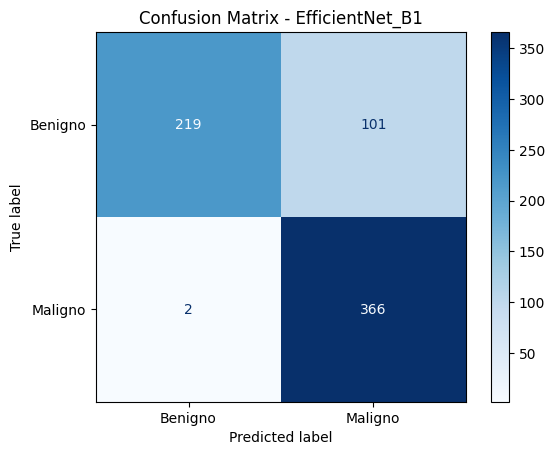

------------------------------------------------------------------------------------------------------------------------
Evaluacion EfficientNet_B1 - Model 2...


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 8, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 8, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 507ms/step
Best Threshold for EfficientNet_B1: 0.25 with F1 Score: 0.8700
Classification Report - EfficientNet_B1
              precision    recall  f1-score   support

     Benigno       0.96      0.70      0.81       320
     Maligno       0.79      0.97      0.87       368

    accuracy                           0.84       688
   macro avg       0.87      0.83      0.84       688
weighted avg       0.87      0.84      0.84       688



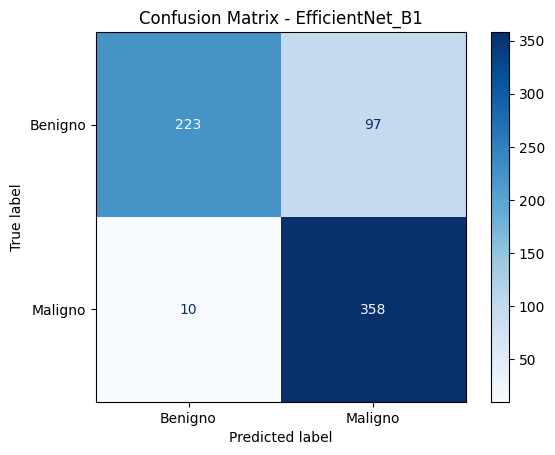

------------------------------------------------------------------------------------------------------------------------
Evaluacion EfficientNet_B1 - Model 3...


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


22/22 ━━━━━━━━━━━━━━━━━━━━ 16s 419ms/step
Best Threshold for EfficientNet_B1: 0.41 with F1 Score: 0.8517
Classification Report - EfficientNet_B1
              precision    recall  f1-score   support

     Benigno       0.96      0.64      0.77       320
     Maligno       0.76      0.98      0.85       368

    accuracy                           0.82       688
   macro avg       0.86      0.81      0.81       688
weighted avg       0.85      0.82      0.81       688



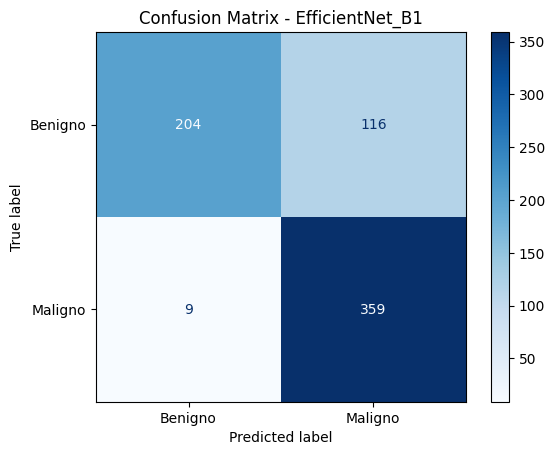

------------------------------------------------------------------------------------------------------------------------
Evaluacion EfficientNet_B1 - Model 4...


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 466ms/step
Best Threshold for EfficientNet_B1: 0.43 with F1 Score: 0.8643
Classification Report - EfficientNet_B1
              precision    recall  f1-score   support

     Benigno       0.96      0.67      0.79       320
     Maligno       0.77      0.98      0.86       368

    accuracy                           0.84       688
   macro avg       0.87      0.83      0.83       688
weighted avg       0.86      0.84      0.83       688



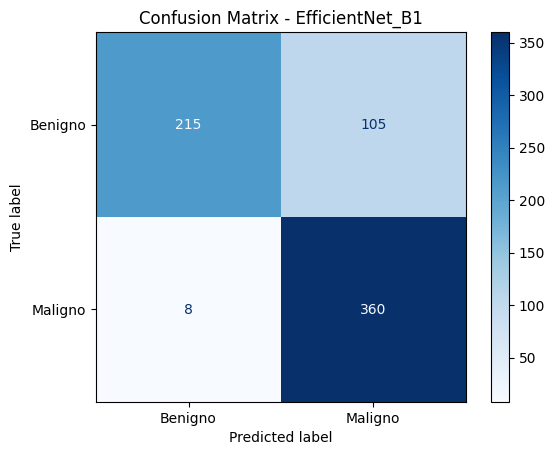

------------------------------------------------------------------------------------------------------------------------
Evaluacion EfficientNet_B1 - Model 5...


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 492ms/step
Best Threshold for EfficientNet_B1: 0.52 with F1 Score: 0.8810
Classification Report - EfficientNet_B1
              precision    recall  f1-score   support

     Benigno       0.96      0.72      0.83       320
     Maligno       0.80      0.98      0.88       368

    accuracy                           0.86       688
   macro avg       0.88      0.85      0.85       688
weighted avg       0.88      0.86      0.86       688



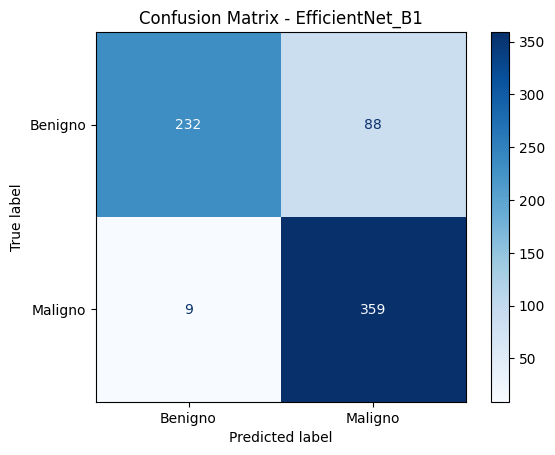

------------------------------------------------------------------------------------------------------------------------
Evaluacion EfficientNet_B1 - Model 6...


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 468ms/step
Best Threshold for EfficientNet_B1: 0.18 with F1 Score: 0.8657
Classification Report - EfficientNet_B1
              precision    recall  f1-score   support

     Benigno       0.97      0.67      0.79       320
     Maligno       0.77      0.98      0.87       368

    accuracy                           0.84       688
   macro avg       0.87      0.83      0.83       688
weighted avg       0.86      0.84      0.83       688



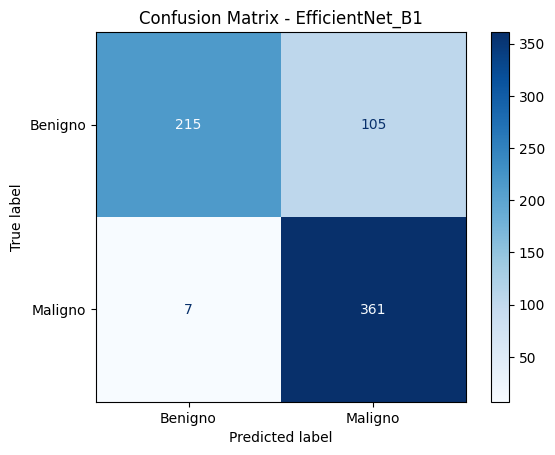

------------------------------------------------------------------------------------------------------------------------


In [ ]:
print("Evaluacion Threshold Maximizando F1-Score")
# Evaluate models
print("------------"*10)
print(f"Evaluacion {NAME} - Model 1...")
evaluate_and_plot_model_f1_score(model1, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 2...")
evaluate_and_plot_model_f1_score(model2, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 3...")
evaluate_and_plot_model_f1_score(model3, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 4...")
evaluate_and_plot_model_f1_score(model4, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 5...")
evaluate_and_plot_model_f1_score(model5, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 6...")
evaluate_and_plot_model_f1_score(model6, test_generator, test_generator.classes, NAME)
print("------------"*10)

Evaluacion Threshold Maximizando Accuracy
------------------------------------------------------------------------------------------------------------------------
Evaluacion EfficientNet_B1 - Model 1...
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step
Optimal Threshold for EfficientNet_B1: 0.15
Classification Report - EfficientNet_B1
              precision    recall  f1-score   support

     Benigno       0.99      0.68      0.81       320
     Maligno       0.78      0.99      0.88       368

    accuracy                           0.85       688
   macro avg       0.89      0.84      0.84       688
weighted avg       0.88      0.85      0.85       688



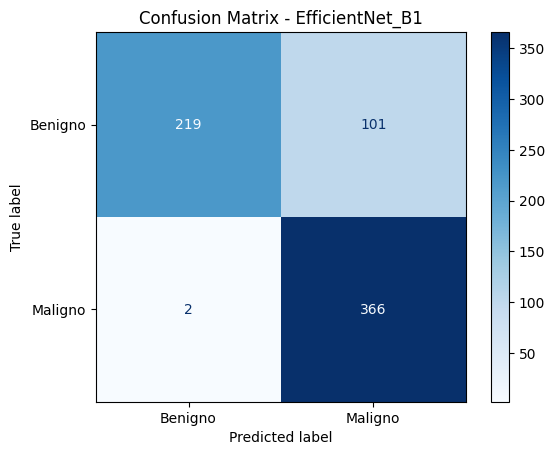

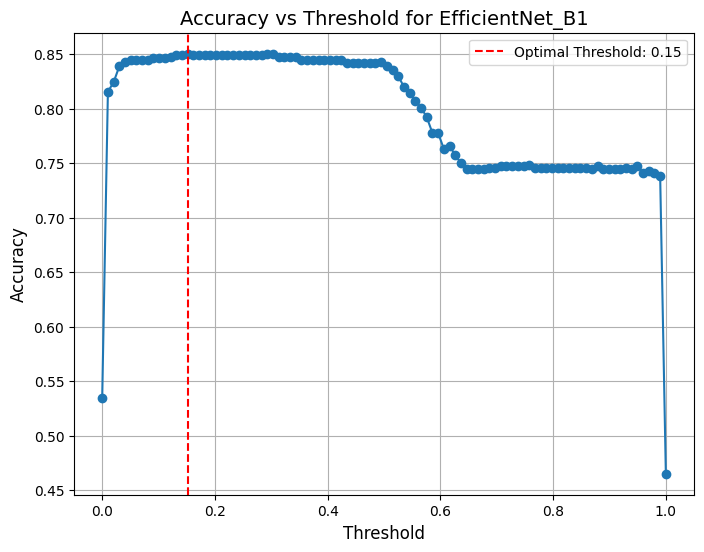

------------------------------------------------------------------------------------------------------------------------
Evaluacion EfficientNet_B1 - Model 2...
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step
Optimal Threshold for EfficientNet_B1: 0.25
Classification Report - EfficientNet_B1
              precision    recall  f1-score   support

     Benigno       0.96      0.70      0.81       320
     Maligno       0.79      0.97      0.87       368

    accuracy                           0.84       688
   macro avg       0.87      0.83      0.84       688
weighted avg       0.87      0.84      0.84       688



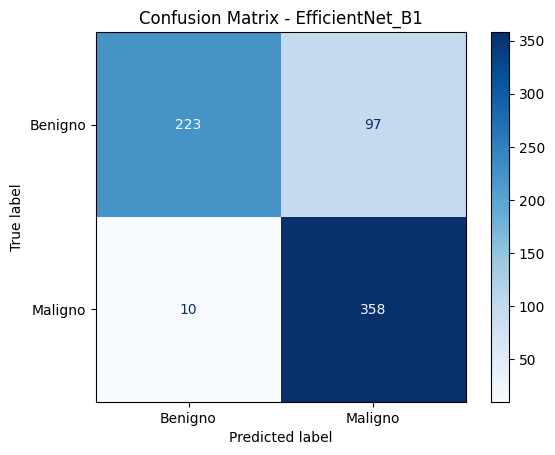

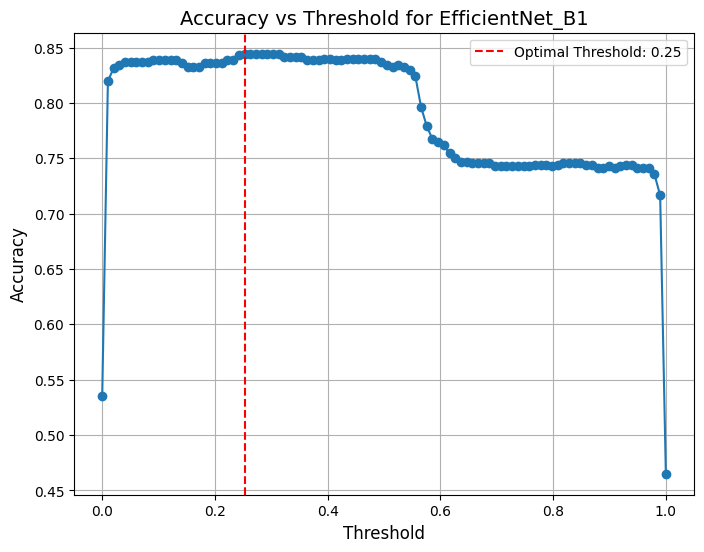

------------------------------------------------------------------------------------------------------------------------
Evaluacion EfficientNet_B1 - Model 3...
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step
Optimal Threshold for EfficientNet_B1: 0.48
Classification Report - EfficientNet_B1
              precision    recall  f1-score   support

     Benigno       0.94      0.66      0.77       320
     Maligno       0.76      0.96      0.85       368

    accuracy                           0.82       688
   macro avg       0.85      0.81      0.81       688
weighted avg       0.84      0.82      0.81       688



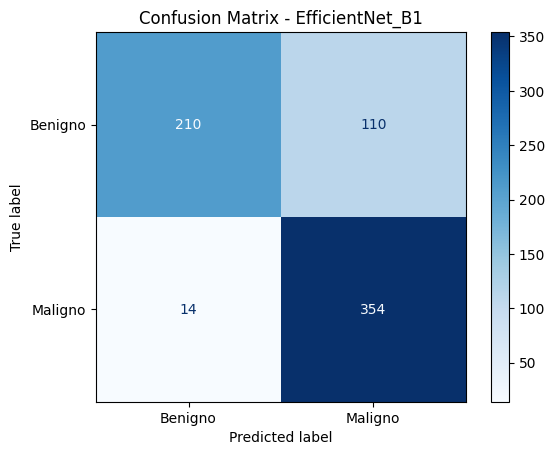

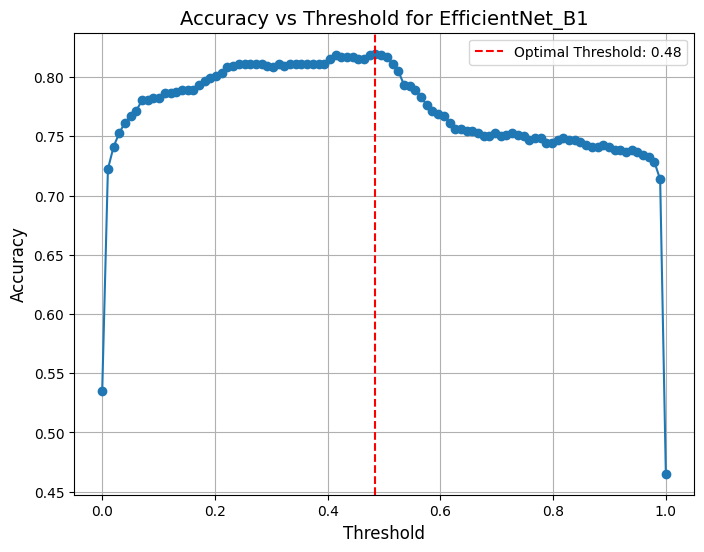

------------------------------------------------------------------------------------------------------------------------
Evaluacion EfficientNet_B1 - Model 4...
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step
Optimal Threshold for EfficientNet_B1: 0.43
Classification Report - EfficientNet_B1
              precision    recall  f1-score   support

     Benigno       0.96      0.67      0.79       320
     Maligno       0.77      0.98      0.86       368

    accuracy                           0.84       688
   macro avg       0.87      0.83      0.83       688
weighted avg       0.86      0.84      0.83       688



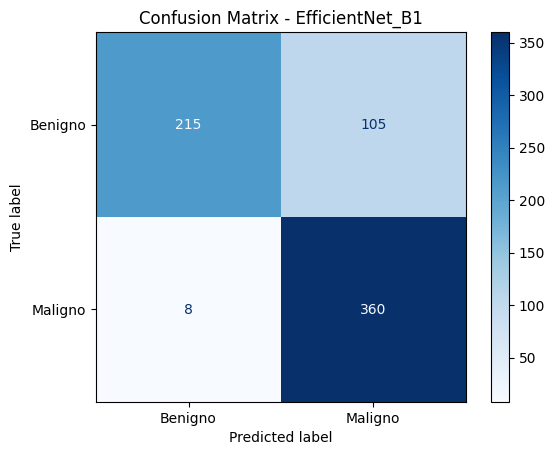

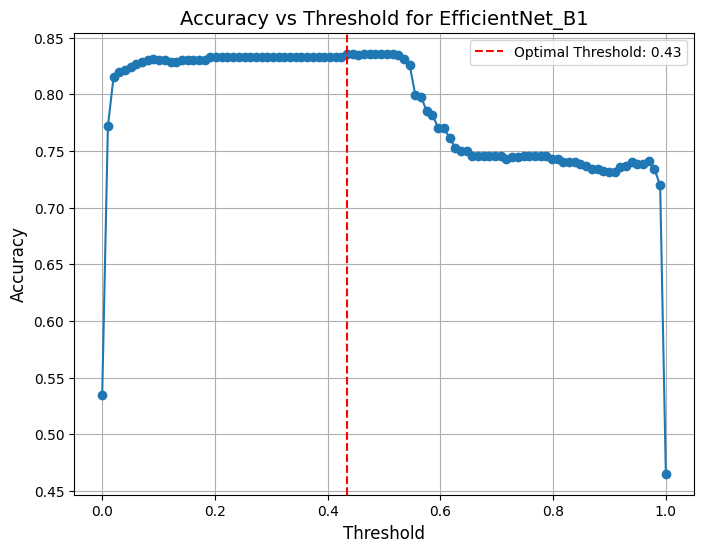

------------------------------------------------------------------------------------------------------------------------
Evaluacion EfficientNet_B1 - Model 5...
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step
Optimal Threshold for EfficientNet_B1: 0.52
Classification Report - EfficientNet_B1
              precision    recall  f1-score   support

     Benigno       0.96      0.72      0.83       320
     Maligno       0.80      0.98      0.88       368

    accuracy                           0.86       688
   macro avg       0.88      0.85      0.85       688
weighted avg       0.88      0.86      0.86       688



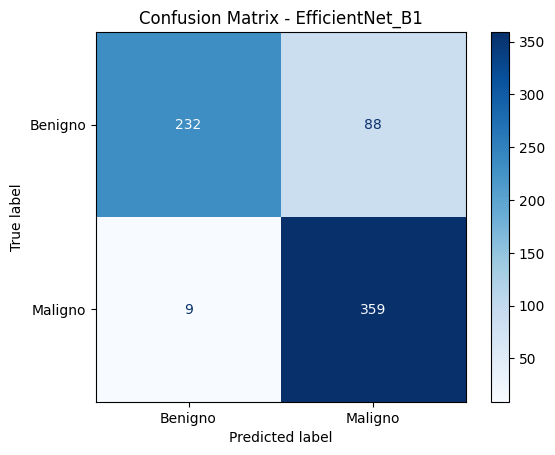

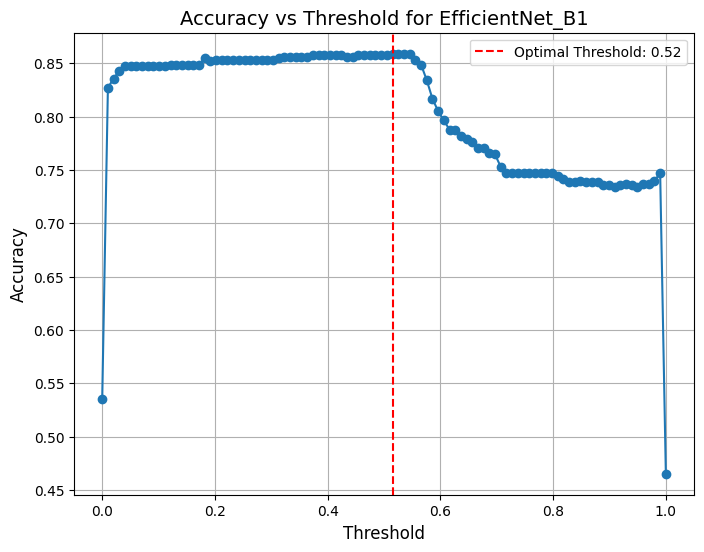

------------------------------------------------------------------------------------------------------------------------
Evaluacion EfficientNet_B1 - Model 6...
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step
Optimal Threshold for EfficientNet_B1: 0.18
Classification Report - EfficientNet_B1
              precision    recall  f1-score   support

     Benigno       0.97      0.67      0.79       320
     Maligno       0.77      0.98      0.87       368

    accuracy                           0.84       688
   macro avg       0.87      0.83      0.83       688
weighted avg       0.86      0.84      0.83       688



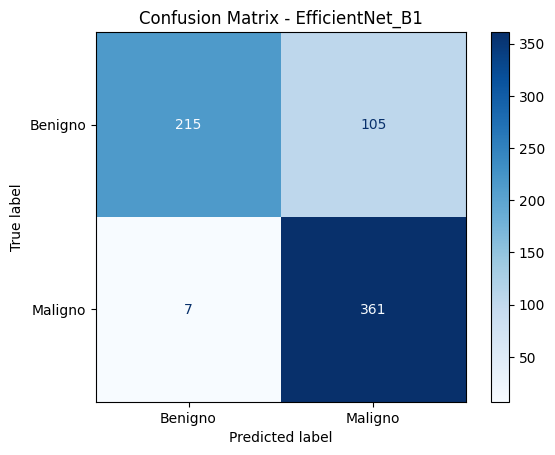

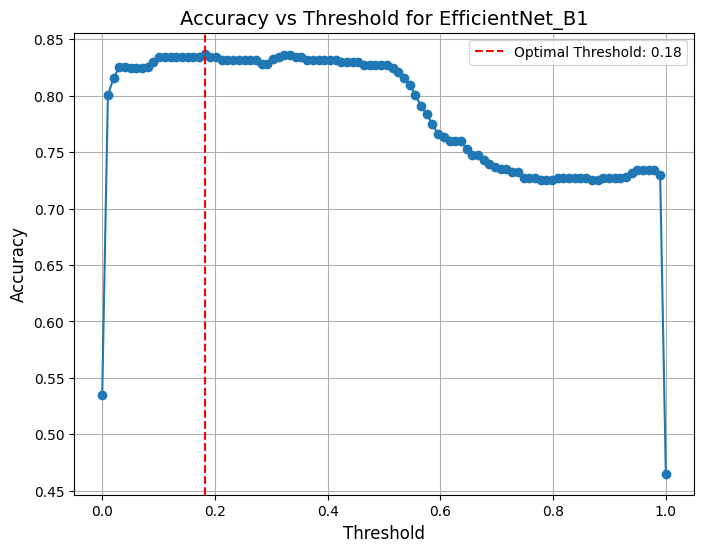

------------------------------------------------------------------------------------------------------------------------


In [ ]:
print("Evaluacion Threshold Maximizando Accuracy")
# Evaluate models
print("------------"*10)
print(f"Evaluacion {NAME} - Model 1...")
evaluate_and_plot_model_accuracy(model1, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 2...")
evaluate_and_plot_model_accuracy(model2, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 3...")
evaluate_and_plot_model_accuracy(model3, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 4...")
evaluate_and_plot_model_accuracy(model4, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 5...")
evaluate_and_plot_model_accuracy(model5, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 6...")
evaluate_and_plot_model_accuracy(model6, test_generator, test_generator.classes, NAME)
print("------------"*10)

------------------------------------------------------------------------------------------------------------------------
Model 1


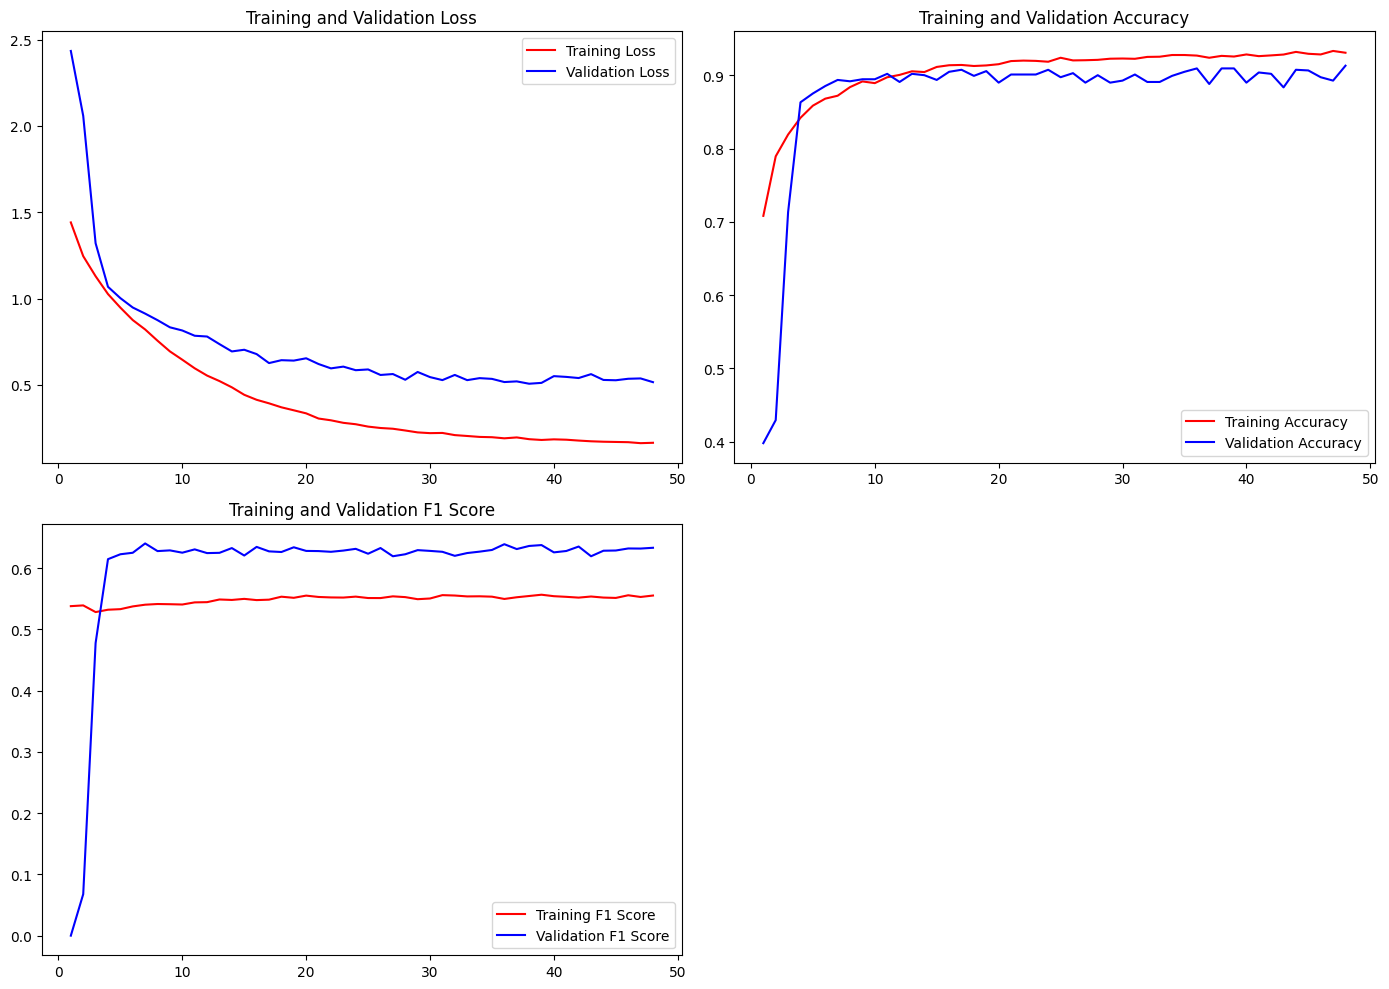

------------------------------------------------------------------------------------------------------------------------
Model 2


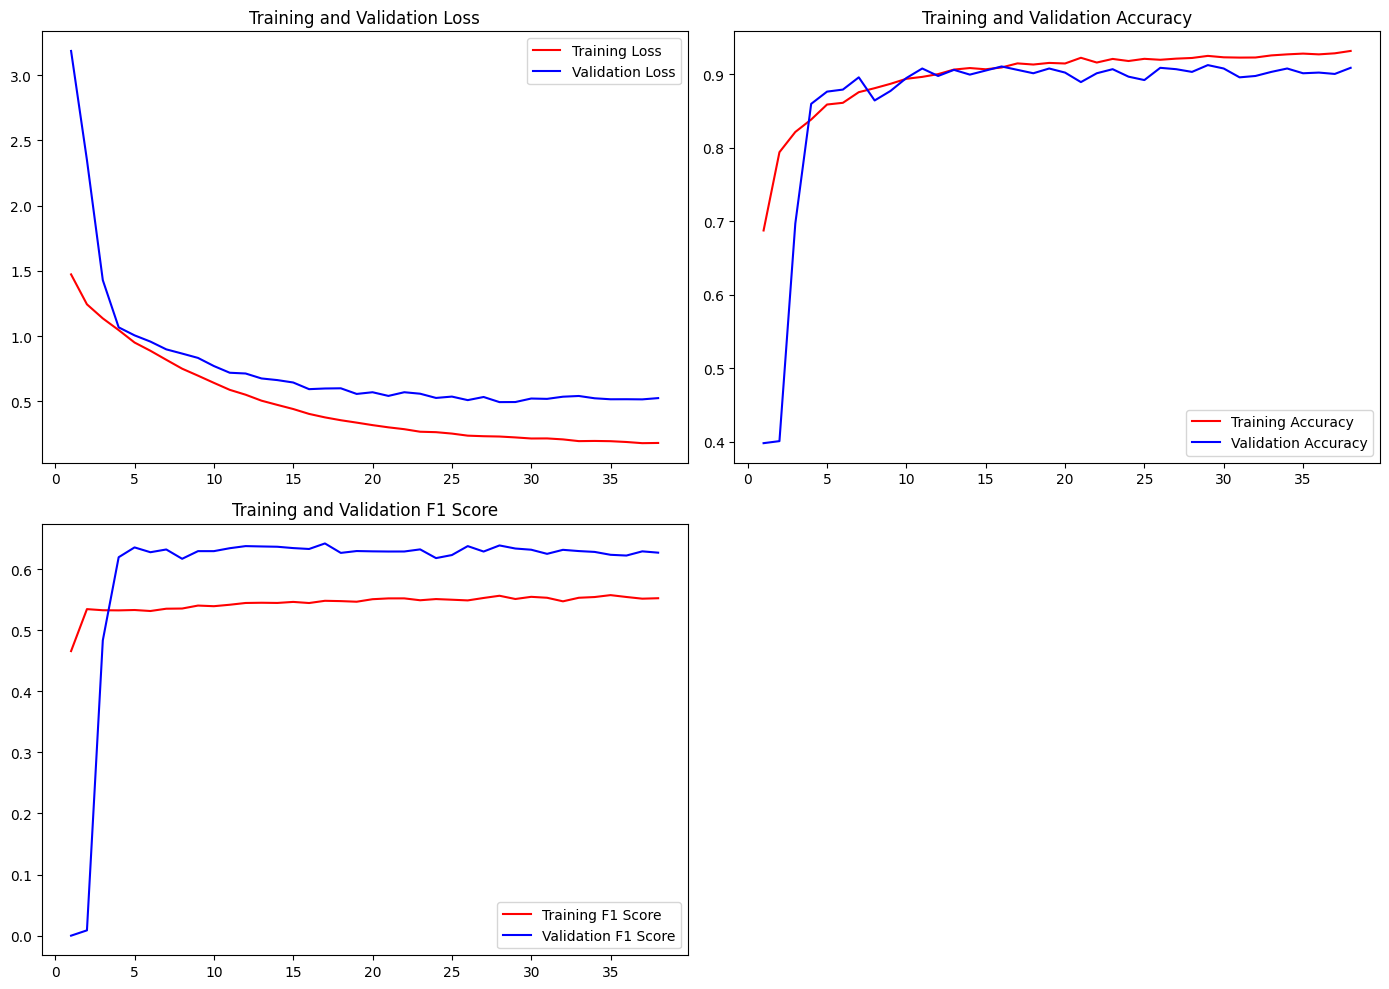

------------------------------------------------------------------------------------------------------------------------
Model 3


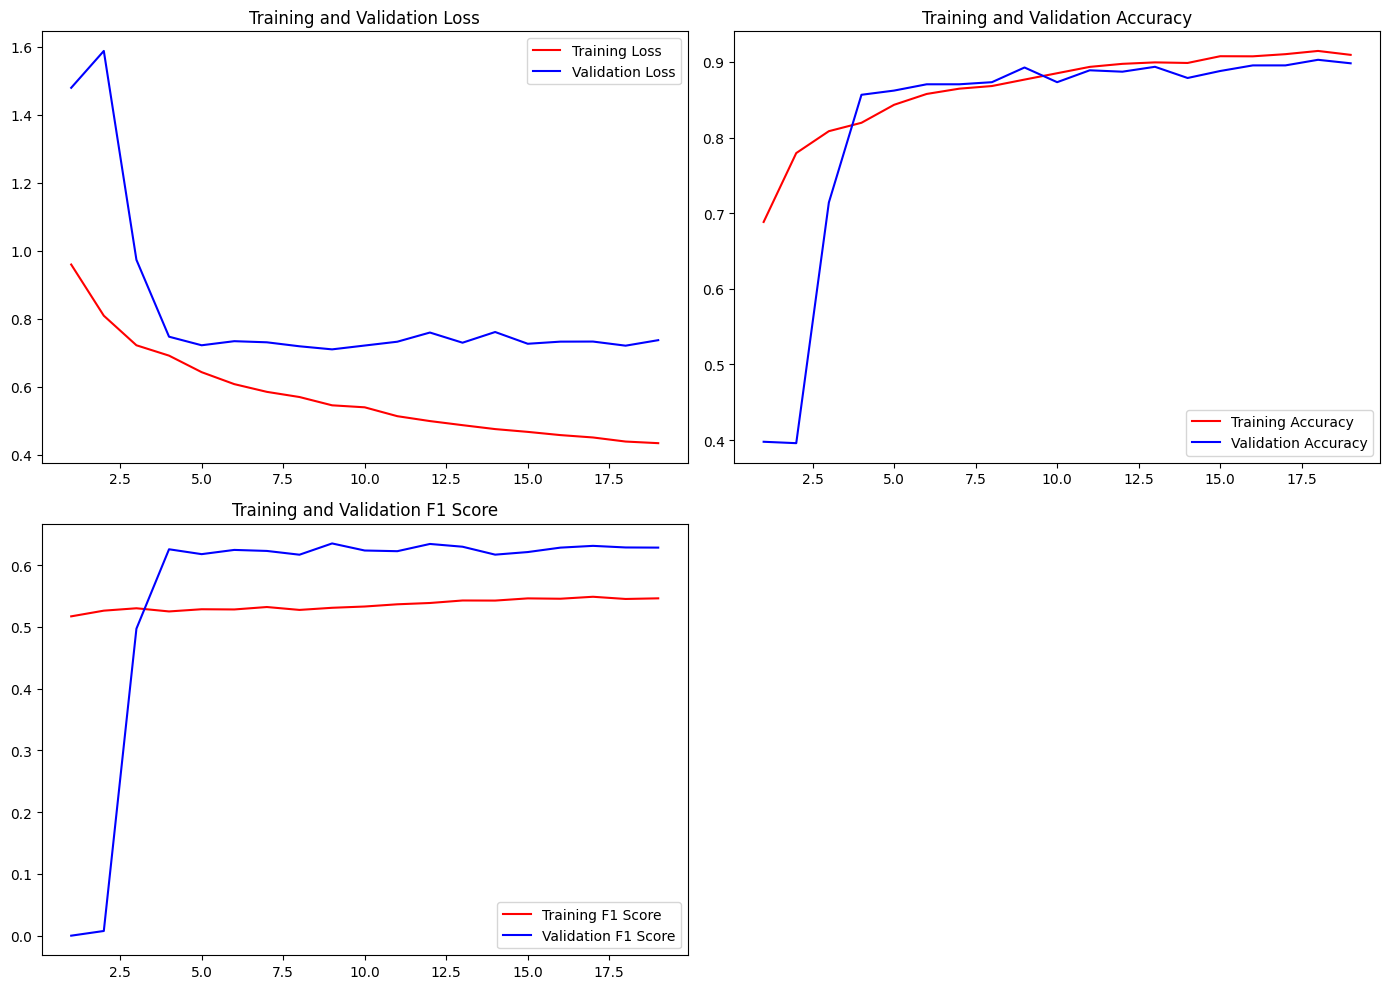

------------------------------------------------------------------------------------------------------------------------
Model 4


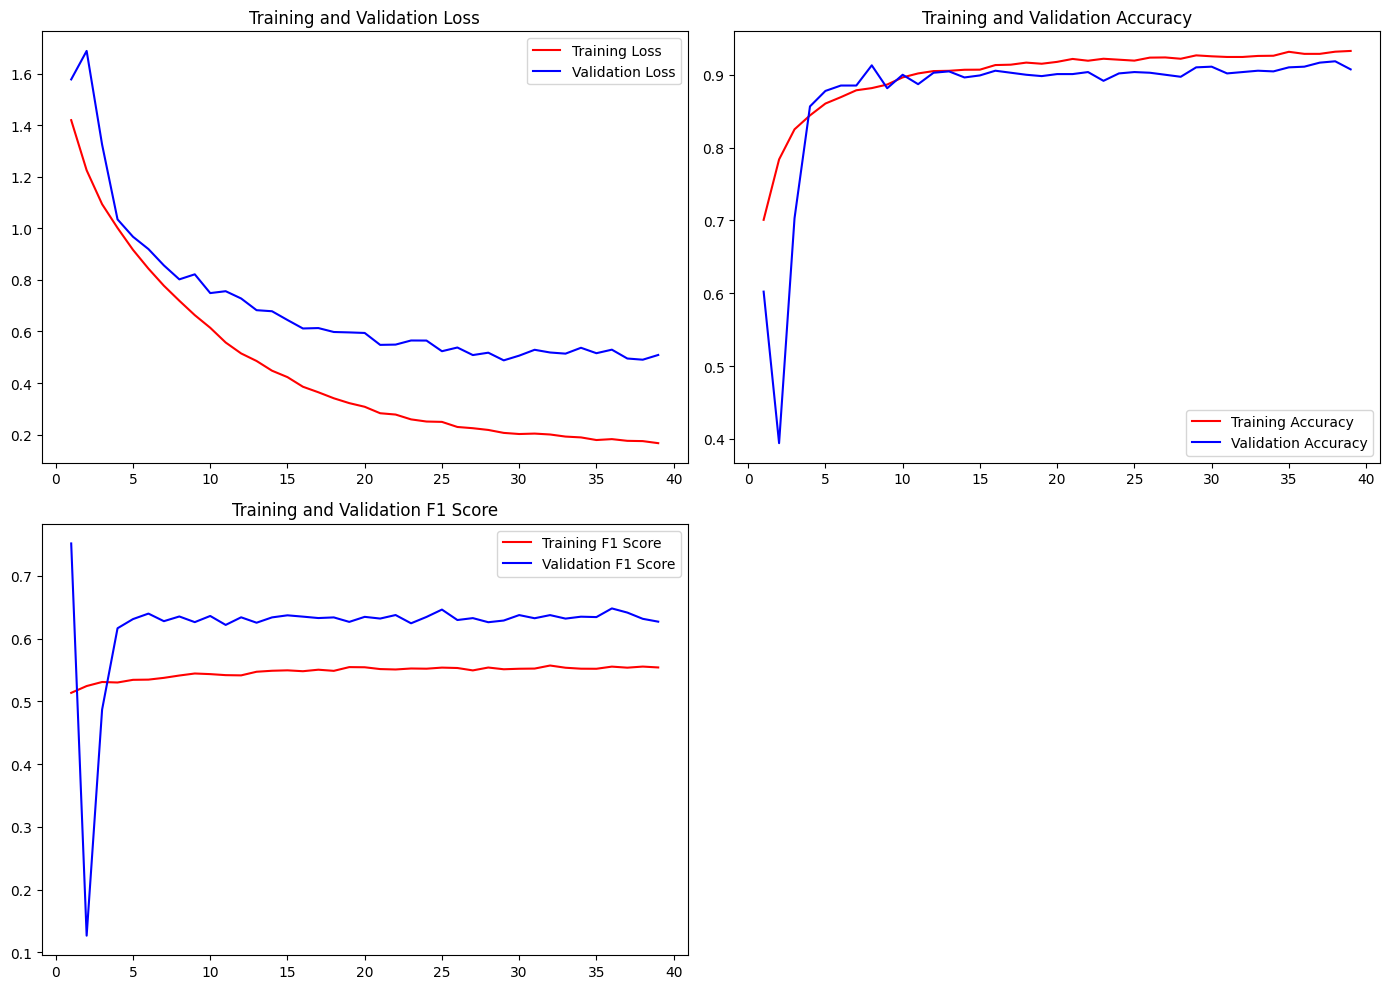

------------------------------------------------------------------------------------------------------------------------
Model 5


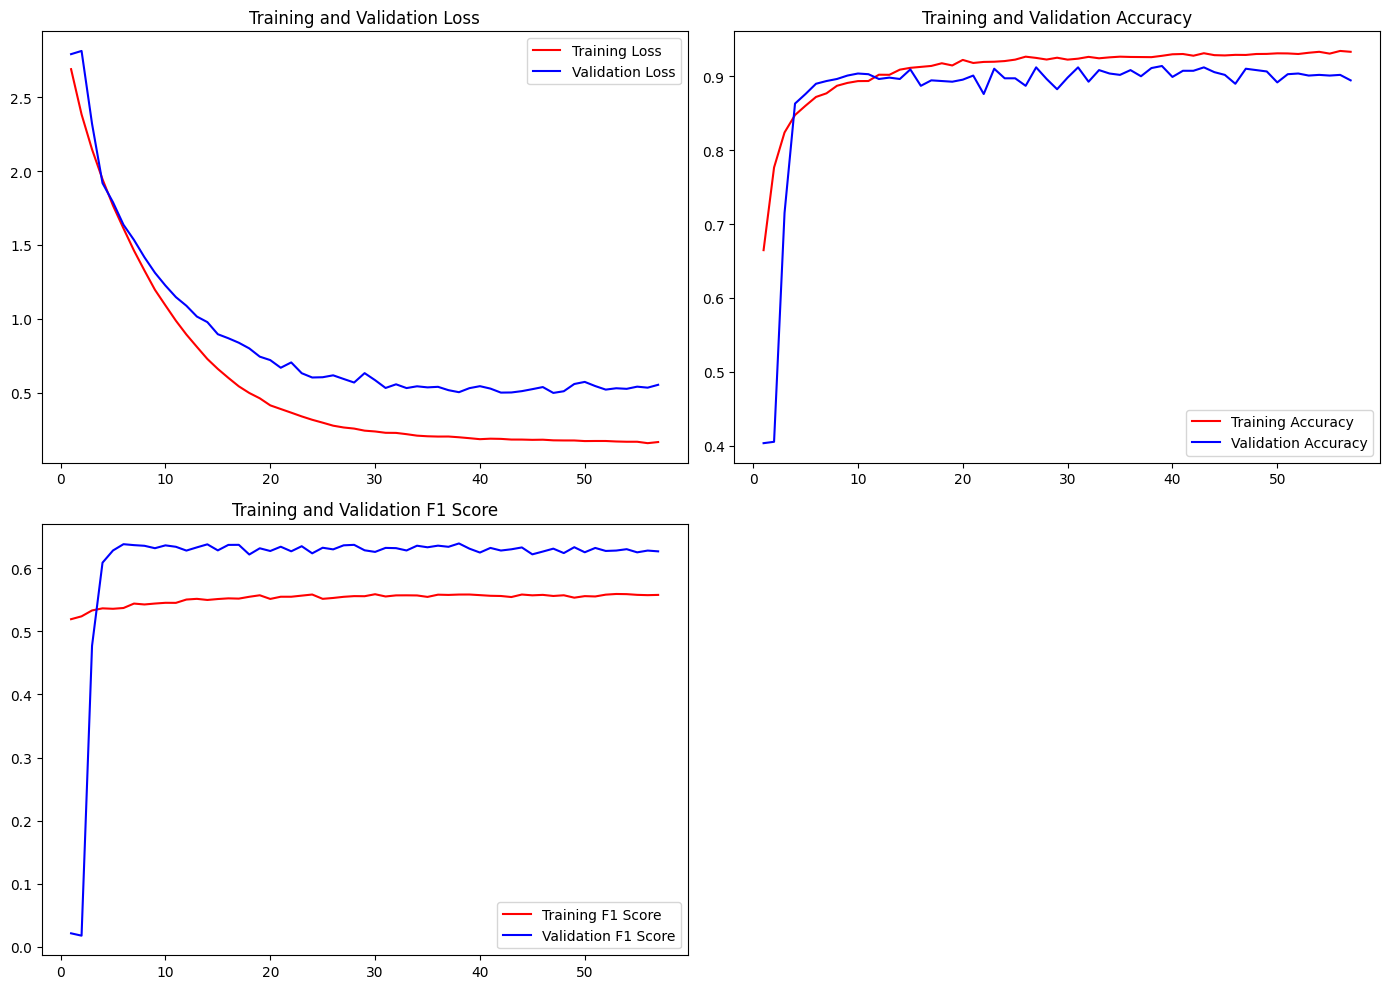

------------------------------------------------------------------------------------------------------------------------
Model 6


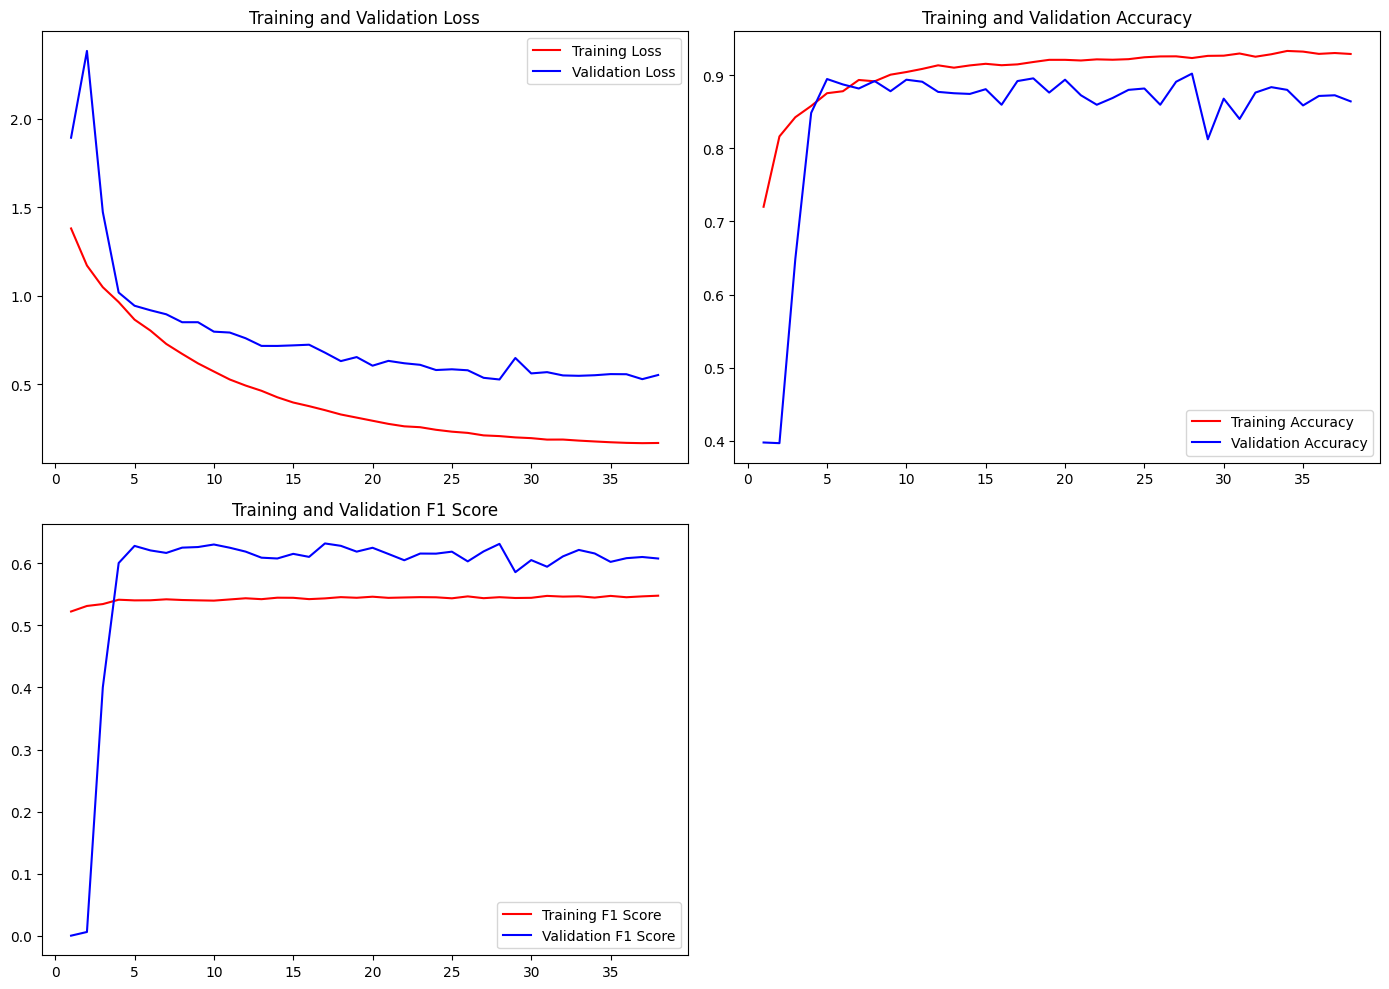

------------------------------------------------------------------------------------------------------------------------


In [ ]:
# Función para graficar la pérdida y las métricas durante el entrenamiento
def plot_training_history(history):
    # Extraer datos del historial de entrenamiento
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history.get('accuracy')
    val_accuracy = history.history.get('val_accuracy')
    f1_score = history.history.get('f1_score')
    val_f1_score = history.history.get('val_f1_score')
    f2_score = history.history.get('f2_score')
    val_f2_score = history.history.get('val_f2_score')
    epochs = range(1, len(loss) + 1)

    # Crear las gráficas
    plt.figure(figsize=(14, 10))

    # Gráfico de pérdida (loss)
    plt.subplot(2, 2, 1)
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Gráfico de accuracy
    if accuracy and val_accuracy:
        plt.subplot(2, 2, 2)
        plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
        plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.legend()

    # Gráfico de F1-Score
    if f1_score and val_f1_score:
        plt.subplot(2, 2, 3)
        plt.plot(epochs, f1_score, 'r', label='Training F1 Score')
        plt.plot(epochs, val_f1_score, 'b', label='Validation F1 Score')
        plt.title('Training and Validation F1 Score')
        plt.legend()

    # Gráfico de F2-Score
    if f2_score and val_f2_score:
        plt.subplot(2, 2, 4)
        plt.plot(epochs, f2_score, 'r', label='Training F2 Score')
        plt.plot(epochs, val_f2_score, 'b', label='Validation F2 Score')
        plt.title('Training and Validation F2 Score')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar
print("------------"*10)
print("Model 1")
plot_training_history(history1)
print("------------"*10)
print("Model 2")
plot_training_history(history2)
print("------------"*10)
print("Model 3")
plot_training_history(history3)
print("------------"*10)
print("Model 4")
plot_training_history(history4)
print("------------"*10)
print("Model 5")
plot_training_history(history5)
print("------------"*10)
print("Model 6")
plot_training_history(history6)
print("------------"*10)


## MobileNet V2

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Reshape, GlobalMaxPooling2D, Add, Activation, Multiply, Lambda, Concatenate, MultiHeadAttention, LayerNormalization, GlobalAveragePooling1D
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2
import os
import numpy as np
import gc
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.models import Model

# ---------------------------------------------------------------------- #
# ------------------------------ VARIABLES ----------------------------- #
# ---------------------------------------------------------------------- #

# Paths to dataset
train_dir = '1_dataset/train'
validation_dir = '1_dataset/valid'
test_dir = '1_dataset/test'

# ImageDataGenerator setup
batch_size = 32
img_height = 224
img_width = 224

NAME = 'MobileNetV2'

# Training and evaluating models
epochs = 100

# ---------------------------------------------------------------------- #
# ------------------------------ VARIABLES ----------------------------- #
# ---------------------------------------------------------------------- #

# Function to clear memory
def clear_memory():
    tf.keras.backend.clear_session()  # Limpia los gráficos y el backend
    gc.collect()  # Recolector de basura de Python
    print("Sesión de TensorFlow reiniciada y memoria liberada...")

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benigno", "Maligno"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Function to evaluate and plot metrics
def evaluate_and_plot_model_f1_score(model, X_test, y_test, model_name, is_ensemble=False):
    if is_ensemble:
        # Predict with a list of inputs for the ensemble model
        y_pred_prob = model.predict(X_test).flatten()
    else:
        # Predict with a single input
        y_pred_prob = model.predict(X_test).flatten()

    # Determine the best threshold for F1 score
    thresholds = np.linspace(0, 1, 100)
    best_threshold = 0.5  # Default threshold
    best_f1 = 0

    for threshold in thresholds:
        y_pred_temp = (y_pred_prob >= threshold).astype(int)
        f1 = f1_score(y_test, y_pred_temp)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    print(f"Best Threshold for {model_name}: {best_threshold:.2f} with F1 Score: {best_f1:.4f}")

    # Apply the best threshold to get binary predictions
    y_pred = (y_pred_prob >= best_threshold).astype(int)

    # Print classification report
    print(f"Classification Report - {model_name}")
    print(classification_report(y_test, y_pred, target_names=["Benigno", "Maligno"]))

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)

def evaluate_and_plot_model_accuracy(model, X_test, y_test, model_name, is_ensemble=False):
    if is_ensemble:
        # Predict with a list of inputs for the ensemble model
        y_pred_prob = model.predict(X_test).flatten()
    else:
        # Predict with a single input
        y_pred_prob = model.predict(X_test).flatten()

    # Find optimal threshold for best F1 score
    thresholds = np.linspace(0, 1, 100)
    acurracys = []
    for threshold in thresholds:
        y_pred_temp = (y_pred_prob >= threshold).astype(int)
        accuracy = accuracy_score(y_test, y_pred_temp)
        acurracys.append(accuracy)

    optimal_threshold = thresholds[np.argmax(acurracys)]
    print(f"Optimal Threshold for {model_name}: {optimal_threshold:.2f}")

    # Apply the optimal threshold to predictions
    y_pred = (y_pred_prob >= optimal_threshold).astype(int)

    # Print classification report
    print(f"Classification Report - {model_name}")
    print(classification_report(y_test, y_pred, target_names=["Benigno", "Maligno"]))

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)

    # Plot F1 vs Threshold
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, acurracys, marker='o')
    plt.axvline(x=optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.2f}')
    plt.title(f"Accuracy vs Threshold for {model_name}", fontsize=14)
    plt.xlabel("Threshold", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

@tf.keras.utils.register_keras_serializable()
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', dtype=tf.float32, **kwargs):
        super(F1Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
        return f1

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ---------------------------- FUNCIONES PARA DEFINIR MODELOS # ---------------------------- #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #

# ------------------------------------------ MODELO 1 ------------------------------------------ #
def create_model_1(base_model):  # Modelo Fav
    def cbam_block(input_tensor, ratio=8):
        channel_axis = -1
        filters = input_tensor.shape[channel_axis]

        # Atención de canal
        avg_pool = GlobalAveragePooling2D()(input_tensor)
        avg_pool = Reshape((1, 1, filters))(avg_pool)
        max_pool = GlobalMaxPooling2D()(input_tensor)
        max_pool = Reshape((1, 1, filters))(max_pool)

        dense1 = Dense(filters // ratio, activation='relu', use_bias=False)
        dense2 = Dense(filters, activation='sigmoid', use_bias=False)

        avg_out = dense2(dense1(avg_pool))
        max_out = dense2(dense1(max_pool))

        channel_attention = Add()([avg_out, max_out])
        channel_attention = Activation('sigmoid')(channel_attention)
        input_tensor = Multiply()([input_tensor, channel_attention])

        # Atención espacial
        avg_pool_spatial = Lambda(lambda x: tf.reduce_mean(x, axis=-1, keepdims=True))(input_tensor)
        max_pool_spatial = Lambda(lambda x: tf.reduce_max(x, axis=-1, keepdims=True))(input_tensor)
        concat = Concatenate(axis=-1)([avg_pool_spatial, max_pool_spatial])

        spatial_attention = Conv2D(1, kernel_size=7, padding='same', activation='sigmoid')(concat)
        return Multiply()([input_tensor, spatial_attention])

    base_model.trainable = True

    # Ajustar convoluciones y Dropout
    conv_layer = Conv2D(128, (3, 3), activation="relu", padding="same")(base_model.output)
    batch_norm = BatchNormalization()(conv_layer)
    max_pool = MaxPooling2D((2, 2))(batch_norm)
    dropout = Dropout(0.5)(max_pool)

    # CBAM Block
    cbam_output = cbam_block(dropout)

    global_avg_pool = GlobalAveragePooling2D()(cbam_output)
    dense_1 = Dense(96, kernel_regularizer=l2(1e-2))(global_avg_pool)
    batch_norm_1 = BatchNormalization()(dense_1)
    activation_1 = Activation('relu')(batch_norm_1)
    dropout_1 = Dropout(0.5)(activation_1)

    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-2))(dropout_1)

    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=5e-4, momentum=0.9, nesterov=True),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------ MODELO 2 ------------------------------------------ #
def create_model_2(base_model):
    def transformer_encoder(inputs, num_heads=4, ff_dim=128):
        attention = MultiHeadAttention(num_heads=num_heads, key_dim=inputs.shape[-1])(inputs, inputs)
        attention = Add()([inputs, attention])  # Residual connection
        attention = LayerNormalization()(attention)

        ff = Dense(ff_dim, activation="relu")(attention)
        ff = Dense(inputs.shape[-1])(ff)
        return Add()([attention, ff])  # Residual connection

    base_model.trainable = True

    # Ajustar convoluciones y Dropout
    conv_layer = Conv2D(128, (3, 3), activation="relu", padding="same")(base_model.output)
    batch_norm = BatchNormalization()(conv_layer)
    max_pool = MaxPooling2D((2, 2))(batch_norm)
    dropout = Dropout(0.5)(max_pool)

    global_avg_pool = GlobalAveragePooling2D()(dropout)

    # Transformador
    expanded = tf.keras.layers.Reshape((-1, global_avg_pool.shape[-1]))(global_avg_pool)
    transformer_output = transformer_encoder(expanded)

    # Reducir dimensionalidad
    pooled_features = GlobalAveragePooling1D()(transformer_output)
    dense_1 = Dense(96, activation="relu", kernel_regularizer=l2(1e-2))(pooled_features)
    batch_norm_1 = BatchNormalization()(dense_1)
    activation_1 = Activation('relu')(batch_norm_1)
    dropout_1 = Dropout(0.5)(activation_1)

    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-2))(dropout_1)

    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=5e-4, momentum=0.9, nesterov=True),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------ MODELO 3 ------------------------------------------ #
def create_model_3(base_model):
    def dual_attention(input_tensor):
        # Channel Attention
        avg_pool = GlobalAveragePooling2D()(input_tensor)
        max_pool = GlobalMaxPooling2D()(input_tensor)
        channel_attention = Add()([avg_pool, max_pool])
        channel_attention = Dense(input_tensor.shape[-1], activation="sigmoid")(channel_attention)
        channel_attention = Multiply()([input_tensor, channel_attention])

        # Spatial Attention
        avg_pool_spatial = Lambda(lambda x: tf.reduce_mean(x, axis=-1, keepdims=True))(channel_attention)
        max_pool_spatial = Lambda(lambda x: tf.reduce_max(x, axis=-1, keepdims=True))(channel_attention)
        spatial_attention = Concatenate(axis=-1)([avg_pool_spatial, max_pool_spatial])
        spatial_attention = Conv2D(1, kernel_size=7, activation="sigmoid", padding="same")(spatial_attention)
        return Multiply()([channel_attention, spatial_attention])

    base_model.trainable = True

    # Bloque base
    conv_layer = Conv2D(128, (3, 3), activation="relu", padding="same")(base_model.output)
    batch_norm = BatchNormalization()(conv_layer)
    max_pool = MaxPooling2D((2, 2))(batch_norm)
    dropout = Dropout(0.5)(max_pool)

    # Dual Attention Network (DANet)
    dual_attention_output = dual_attention(dropout)

    # Global Average Pooling
    global_avg_pool = GlobalAveragePooling2D()(dual_attention_output)

    # Capas densas
    dense_1 = Dense(96, kernel_regularizer=l2(1e-2))(global_avg_pool)
    batch_norm_1 = BatchNormalization()(dense_1)
    activation_1 = Activation('relu')(batch_norm_1)
    dropout_1 = Dropout(0.5)(activation_1)

    # Capa de predicción
    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-2))(dropout_1)

    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=5e-4, momentum=0.9, nesterov=True),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------ MODELO 4 ------------------------------------------ #
def create_model_4(base_model):
    base_model.trainable = True

    # Ajustar convoluciones y Dropout
    conv_layer = Conv2D(128, (3, 3), activation="relu", padding="same")(base_model.output)
    batch_norm = BatchNormalization()(conv_layer)
    max_pool = MaxPooling2D((2, 2))(batch_norm)
    dropout = Dropout(0.5)(max_pool)

    global_avg_pool = GlobalAveragePooling2D()(dropout)

    # Reducción de cabezas de atención a 6
    num_heads = 8
    attention_heads = []
    for _ in range(num_heads):
        dense = Dense(64, activation="relu")(global_avg_pool)  # Reducción de neuronas
        attention_scores = Dense(128, activation="softmax")(dense)
        attention_heads.append(Multiply()([global_avg_pool, attention_scores]))

    concat_attention = Concatenate()(attention_heads)

    # Convolución 1x1 para ajustar dimensionalidad
    reduced_features = Dense(96, activation="relu")(concat_attention)

    # Capas densas
    dense_1 = Dense(96, kernel_regularizer=l2(1e-2))(reduced_features)
    batch_norm_1 = BatchNormalization()(dense_1)
    activation_1 = Activation('relu')(batch_norm_1)
    dropout_1 = Dropout(0.3)(activation_1)  # Incremento Dropout

    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-2))(dropout_1)

    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=5e-4, momentum=0.9, nesterov=True),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------ MODELO 5 ------------------------------------------ #
def create_model_5(base_model):
    # Modelo base preentrenado en un esquema auto-supervisado
    base_model.trainable = True  # Desbloqueamos las capas para fine-tuning

    # Ajustar convoluciones y Dropout
    conv_layer = Conv2D(128, (3, 3), activation="relu", padding="same")(base_model.output)
    batch_norm = BatchNormalization()(conv_layer)
    max_pool = MaxPooling2D((2, 2))(batch_norm)
    dropout = Dropout(0.4)(max_pool)

    global_avg_pool = GlobalAveragePooling2D()(dropout)

    # Self-supervised embeddings (fine-tuning avanzado)
    embedding = Dense(256, activation="relu", kernel_regularizer=l2(1e-2))(global_avg_pool)
    embedding = BatchNormalization()(embedding)
    embedding = Dropout(0.5)(embedding)

    # Capas densas
    dense_1 = Dense(96, kernel_regularizer=l2(1e-2))(embedding)
    batch_norm_1 = BatchNormalization()(dense_1)
    activation_1 = Activation('relu')(batch_norm_1)
    dropout_1 = Dropout(0.5)(activation_1)

    # Predicción
    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-2))(dropout_1)

    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=5e-4, momentum=0.9, nesterov=True),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------ MODELO 6 ------------------------------------------ #
def create_model_6(base_model):
    def cbam_block(input_tensor, ratio=8):
        channel_axis = -1
        filters = input_tensor.shape[channel_axis]

        # Atención de canal
        avg_pool = GlobalAveragePooling2D()(input_tensor)
        avg_pool = Reshape((1, 1, filters))(avg_pool)
        max_pool = GlobalMaxPooling2D()(input_tensor)
        max_pool = Reshape((1, 1, filters))(max_pool)

        dense1 = Dense(filters // ratio, activation='relu', use_bias=False)
        dense2 = Dense(filters, activation='sigmoid', use_bias=False)

        avg_out = dense2(dense1(avg_pool))
        max_out = dense2(dense1(max_pool))

        channel_attention = Add()([avg_out, max_out])
        channel_attention = Activation('sigmoid')(channel_attention)
        input_tensor = Multiply()([input_tensor, channel_attention])

        # Atención espacial
        avg_pool_spatial = Lambda(lambda x: tf.reduce_mean(x, axis=-1, keepdims=True))(input_tensor)
        max_pool_spatial = Lambda(lambda x: tf.reduce_max(x, axis=-1, keepdims=True))(input_tensor)
        concat = Concatenate(axis=-1)([avg_pool_spatial, max_pool_spatial])

        spatial_attention = Conv2D(1, kernel_size=7, padding='same', activation='sigmoid')(concat)
        return Multiply()([input_tensor, spatial_attention])

    def danet_block(input_tensor):
        # Atención de canal
        avg_pool = GlobalAveragePooling2D()(input_tensor)
        max_pool = GlobalMaxPooling2D()(input_tensor)
        channel_attention = Add()([avg_pool, max_pool])
        channel_attention = Dense(input_tensor.shape[-1], activation="sigmoid")(channel_attention)
        channel_attention = Multiply()([input_tensor, channel_attention])

        # Atención espacial
        avg_pool_spatial = Lambda(lambda x: tf.reduce_mean(x, axis=-1, keepdims=True))(channel_attention)
        max_pool_spatial = Lambda(lambda x: tf.reduce_max(x, axis=-1, keepdims=True))(channel_attention)
        spatial_attention = Concatenate(axis=-1)([avg_pool_spatial, max_pool_spatial])
        spatial_attention = Conv2D(1, kernel_size=7, activation="sigmoid", padding="same")(spatial_attention)
        return Multiply()([channel_attention, spatial_attention])

    base_model.trainable = True

    # Bloque base
    conv_layer = Conv2D(128, (3, 3), activation="relu", padding="same")(base_model.output)
    batch_norm = BatchNormalization()(conv_layer)
    max_pool = MaxPooling2D((2, 2))(batch_norm)
    dropout = Dropout(0.5)(max_pool)

    # Aplicar CBAM y DANet en paralelo
    cbam_output = cbam_block(dropout)
    danet_output = danet_block(dropout)

    # Fusionar salidas
    fused_attention = Add()([cbam_output, danet_output])
    fused_attention = Conv2D(128, (3, 3), activation="relu", padding="same")(fused_attention)

    # Global Average Pooling
    global_avg_pool = GlobalAveragePooling2D()(fused_attention)

    # Capas densas
    dense_1 = Dense(96, kernel_regularizer=l2(1e-2))(global_avg_pool)
    batch_norm_1 = BatchNormalization()(dense_1)
    activation_1 = Activation('relu')(batch_norm_1)
    dropout_1 = Dropout(0.5)(activation_1)

    # Predicción
    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-2))(dropout_1)

    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=5e-4, momentum=0.9, nesterov=True),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ---------------------------- FUNCIONES PARA DEFINIR MODELOS # ---------------------------- #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #

# Base models
IMG_SHAPE = (img_height, img_width, 3)

base_model_1 = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_2 = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_3 = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_4 = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_5 = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_6 = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")

model1 = create_model_1(base_model_1)
model2 = create_model_2(base_model_2)
model3 = create_model_3(base_model_3)
model4 = create_model_4(base_model_4)
model5 = create_model_5(base_model_5)
model6 = create_model_6(base_model_6)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reducir la tasa de aprendizaje a la mitad
    patience=5,  # Reducir si no hay mejora en 5 épocas
    min_lr=1e-7,
    verbose=1
)

print("------------"*10)
print(f"Entrenamiento Modelo 1 - {NAME}...")
history1 = model1.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model1.save(f'model1_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)
#clear_cuda_memory()

print("------------"*10)
print(f"Entrenamiento Modelo 2 - {NAME}...")
history2 = model2.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model2.save(f'model2_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)
#clear_cuda_memory()

print("------------"*10)
print(f"Entrenamiento Modelo 3 - {NAME}...")
history3 = model3.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model3.save(f'model3_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)
#clear_cuda_memory()

print("------------"*10)
print(f"Entrenamiento Modelo 4 - {NAME}...")
history4 = model4.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model4.save(f'model4_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)

print("------------"*10)
print(f"Entrenamiento Modelo 5 - {NAME}...")
history5 = model5.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model5.save(f'model5_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)

print("------------"*10)
print(f"Entrenamiento Modelo 6 - {NAME}...")
history6 = model6.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model6.save(f'model6_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)

In [ ]:
print("Evaluacion Threshold Maximizando F1-Score")
# Evaluate models
print("------------"*10)
print(f"Evaluacion {NAME} - Model 1...")
evaluate_and_plot_model_f1_score(model1, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 2...")
evaluate_and_plot_model_f1_score(model2, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 3...")
evaluate_and_plot_model_f1_score(model3, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 4...")
evaluate_and_plot_model_f1_score(model4, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 5...")
evaluate_and_plot_model_f1_score(model5, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 6...")
evaluate_and_plot_model_f1_score(model6, test_generator, test_generator.classes, NAME)
print("------------"*10)

In [ ]:
print("Evaluacion Threshold Maximizando Accuracy")
# Evaluate models
print("------------"*10)
print(f"Evaluacion {NAME} - Model 1...")
evaluate_and_plot_model_accuracy(model1, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 2...")
evaluate_and_plot_model_accuracy(model2, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 3...")
evaluate_and_plot_model_accuracy(model3, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 4...")
evaluate_and_plot_model_accuracy(model4, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 5...")
evaluate_and_plot_model_accuracy(model5, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 6...")
evaluate_and_plot_model_accuracy(model6, test_generator, test_generator.classes, NAME)
print("------------"*10)

In [ ]:
# Función para graficar la pérdida y las métricas durante el entrenamiento
def plot_training_history(history):
    # Extraer datos del historial de entrenamiento
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history.get('accuracy')
    val_accuracy = history.history.get('val_accuracy')
    f1_score = history.history.get('f1_score')
    val_f1_score = history.history.get('val_f1_score')
    f2_score = history.history.get('f2_score')
    val_f2_score = history.history.get('val_f2_score')
    epochs = range(1, len(loss) + 1)

    # Crear las gráficas
    plt.figure(figsize=(14, 10))

    # Gráfico de pérdida (loss)
    plt.subplot(2, 2, 1)
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Gráfico de accuracy
    if accuracy and val_accuracy:
        plt.subplot(2, 2, 2)
        plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
        plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.legend()

    # Gráfico de F1-Score
    if f1_score and val_f1_score:
        plt.subplot(2, 2, 3)
        plt.plot(epochs, f1_score, 'r', label='Training F1 Score')
        plt.plot(epochs, val_f1_score, 'b', label='Validation F1 Score')
        plt.title('Training and Validation F1 Score')
        plt.legend()

    # Gráfico de F2-Score
    if f2_score and val_f2_score:
        plt.subplot(2, 2, 4)
        plt.plot(epochs, f2_score, 'r', label='Training F2 Score')
        plt.plot(epochs, val_f2_score, 'b', label='Validation F2 Score')
        plt.title('Training and Validation F2 Score')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar
# Llamar a la función para graficar
print("------------"*10)
print("Model 1")
plot_training_history(history1)
print("------------"*10)
print("Model 2")
plot_training_history(history2)
print("------------"*10)
print("Model 3")
plot_training_history(history3)
print("------------"*10)
print("Model 4")
plot_training_history(history4)
print("------------"*10)
print("Model 5")
plot_training_history(history5)
print("------------"*10)
print("Model 6")
plot_training_history(history6)
print("------------"*10)

## Xception

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Reshape, Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Activation, Add, Concatenate, GlobalMaxPooling2D, AveragePooling2D, Activation, Lambda, MultiHeadAttention, LayerNormalization, GlobalAveragePooling1D, Multiply
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2
import os
import numpy as np
import gc
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.models import Model

# ---------------------------------------------------------------------- #
# ------------------------------ VARIABLES ----------------------------- #
# ---------------------------------------------------------------------- #

# Paths to dataset
train_dir = '1_dataset/train'
validation_dir = '1_dataset/valid'
test_dir = '1_dataset/test'

# ImageDataGenerator setup
batch_size = 32
img_height = 224
img_width = 224

NAME = 'Xception'

# Training and evaluating models
epochs = 100

# ---------------------------------------------------------------------- #
# ------------------------------ VARIABLES ----------------------------- #
# ---------------------------------------------------------------------- #

# Function to clear memory
def clear_memory():
    tf.keras.backend.clear_session()  # Limpia los gráficos y el backend
    gc.collect()  # Recolector de basura de Python
    print("Sesión de TensorFlow reiniciada y memoria liberada...")

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benigno", "Maligno"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Function to evaluate and plot metrics
def evaluate_and_plot_model_f1_score(model, X_test, y_test, model_name, is_ensemble=False):
    if is_ensemble:
        # Predict with a list of inputs for the ensemble model
        y_pred_prob = model.predict(X_test).flatten()
    else:
        # Predict with a single input
        y_pred_prob = model.predict(X_test).flatten()

    # Determine the best threshold for F1 score
    thresholds = np.linspace(0, 1, 100)
    best_threshold = 0.5  # Default threshold
    best_f1 = 0

    for threshold in thresholds:
        y_pred_temp = (y_pred_prob >= threshold).astype(int)
        f1 = f1_score(y_test, y_pred_temp)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    print(f"Best Threshold for {model_name}: {best_threshold:.2f} with F1 Score: {best_f1:.4f}")

    # Apply the best threshold to get binary predictions
    y_pred = (y_pred_prob >= best_threshold).astype(int)

    # Print classification report
    print(f"Classification Report - {model_name}")
    print(classification_report(y_test, y_pred, target_names=["Benigno", "Maligno"]))

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)

def evaluate_and_plot_model_accuracy(model, X_test, y_test, model_name, is_ensemble=False):
    if is_ensemble:
        # Predict with a list of inputs for the ensemble model
        y_pred_prob = model.predict(X_test).flatten()
    else:
        # Predict with a single input
        y_pred_prob = model.predict(X_test).flatten()

    # Find optimal threshold for best F1 score
    thresholds = np.linspace(0, 1, 100)
    acurracys = []
    for threshold in thresholds:
        y_pred_temp = (y_pred_prob >= threshold).astype(int)
        accuracy = accuracy_score(y_test, y_pred_temp)
        acurracys.append(accuracy)

    optimal_threshold = thresholds[np.argmax(acurracys)]
    print(f"Optimal Threshold for {model_name}: {optimal_threshold:.2f}")

    # Apply the optimal threshold to predictions
    y_pred = (y_pred_prob >= optimal_threshold).astype(int)

    # Print classification report
    print(f"Classification Report - {model_name}")
    print(classification_report(y_test, y_pred, target_names=["Benigno", "Maligno"]))

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)

    # Plot F1 vs Threshold
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, acurracys, marker='o')
    plt.axvline(x=optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.2f}')
    plt.title(f"Accuracy vs Threshold for {model_name}", fontsize=14)
    plt.xlabel("Threshold", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

@tf.keras.utils.register_keras_serializable()
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', dtype=tf.float32, **kwargs):
        super(F1Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
        return f1

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ---------------------------- FUNCIONES PARA DEFINIR MODELOS # ---------------------------- #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #


# ------------------------------------------ MODELO 1 ------------------------------------------ #
def create_model_1(base_model):
    base_model.trainable = True

    # Bloque base
    global_avg_pool = GlobalAveragePooling2D()(base_model.output)

    # Expandir dimensiones para MultiHeadAttention
    reshaped_pool = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(global_avg_pool)

    # Multi-Head Attention
    attention_output = MultiHeadAttention(num_heads=6, key_dim=64)(reshaped_pool, reshaped_pool)
    attention_output = LayerNormalization()(Add()([reshaped_pool, attention_output]))  # Residual

    # Proyección y dropout adaptativo
    dense_1 = Dense(128, activation="relu")(attention_output)
    dropout_1 = Dropout(rate=0.3 if base_model.name == 'xception' else 0.5)(dense_1)

    # Reducir a 2D
    attention_output_flat = tf.keras.layers.Lambda(lambda x: tf.squeeze(x, axis=1))(dropout_1)

    # Capas densas finales
    dense_2 = Dense(64, activation="relu", kernel_regularizer=l2(1e-3))(attention_output_flat)
    dropout_2 = Dropout(0.4)(dense_2)

    # Predicción
    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-3))(dropout_2)

    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------ MODELO 2 ------------------------------------------ #
def cbam_block(input_tensor, ratio=8):
    # Atención de canales
    channel_axis = -1  # Última dimensión (canales)
    filters = int(input_tensor.shape[channel_axis])  # Número de filtros en el tensor de entrada

    # GlobalAveragePooling2D y GlobalMaxPooling2D generan tensores de 1D
    avg_pool = GlobalAveragePooling2D()(input_tensor)  # Forma: (batch_size, filters)
    max_pool = GlobalMaxPooling2D()(input_tensor)      # Forma: (batch_size, filters)

    # Capas densas aplicadas directamente a los tensores 1D
    avg_dense = Dense(filters // ratio, activation='relu')(avg_pool)  # Forma: (batch_size, filters // ratio)
    max_dense = Dense(filters // ratio, activation='relu')(max_pool)  # Forma: (batch_size, filters // ratio)

    # Combinar salidas y aplicar activación sigmoide
    channel_attention = Add()([avg_dense, max_dense])                  # Forma: (batch_size, filters // ratio)
    channel_attention = Dense(filters, activation='sigmoid')(channel_attention)  # Forma: (batch_size, filters)

    # Expandir las dimensiones para que coincidan con las dimensiones espaciales de `input_tensor`
    channel_attention = Reshape((1, 1, filters))(channel_attention)   # Forma: (batch_size, 1, 1, filters)

    # Aplicar atención de canales
    channel_refined = Multiply()([input_tensor, channel_attention])   # Forma: (batch_size, H, W, filters)

    # Atención espacial
    avg_pool_spatial = Lambda(lambda x: tf.reduce_mean(x, axis=-1, keepdims=True))(channel_refined)  # Promedio en canales
    max_pool_spatial = Lambda(lambda x: tf.reduce_max(x, axis=-1, keepdims=True))(channel_refined)  # Máximo en canales
    concat = Concatenate(axis=-1)([avg_pool_spatial, max_pool_spatial])                            # Concatenación espacial
    spatial_attention = Conv2D(1, kernel_size=7, padding='same', activation='sigmoid')(concat)      # Atención espacial

    # Aplicar atención espacial
    spatial_refined = Multiply()([channel_refined, spatial_attention])  # Forma final: (batch_size, H, W, filters)

    return spatial_refined

def create_model_2(base_model):
    base_model.trainable = True

    # Aplicar CBAM
    cbam_output = cbam_block(base_model.output)

    # Global Average Pooling
    global_avg_pool = GlobalAveragePooling2D()(cbam_output)

    # Capas densas
    dense_1 = Dense(128, activation="relu", kernel_regularizer=l2(1e-4))(global_avg_pool)
    dropout_1 = Dropout(0.3)(dense_1)
    dense_2 = Dense(64, activation="relu", kernel_regularizer=l2(1e-4))(dropout_1)

    # Predicción
    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-4))(dense_2)

    # Crear el modelo
    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------ MODELO 3 ------------------------------------------ #
def create_model_3(base_model):
    base_model.trainable = True

    # Ajustar convoluciones y Dropout
    conv_layer = Conv2D(128, (3, 3), activation="relu", padding="same")(base_model.output)
    batch_norm = BatchNormalization()(conv_layer)
    max_pool = MaxPooling2D((2, 2))(batch_norm)
    dropout = Dropout(0.4)(max_pool)

    # Mantener la representación con información espacial
    attention_output = MultiHeadAttention(num_heads=4, key_dim=128)(
        dropout, dropout
    )
    attention_output = LayerNormalization()(attention_output)

    # Aplicar Global Average Pooling después de la atención
    global_avg_pool = GlobalAveragePooling2D()(attention_output)

    # Capas densas finales
    dense_1 = Dense(64, kernel_regularizer=l2(1e-2))(global_avg_pool)
    batch_norm_1 = BatchNormalization()(dense_1)
    activation_1 = Activation('relu')(batch_norm_1)
    dropout_1 = Dropout(0.5)(activation_1)

    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-2))(dropout_1)

    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------ MODELO 4 ------------------------------------------ #
def create_model_4(base_model):
    base_model.trainable = True

    # Bloque convolucional inicial
    conv_layer = Conv2D(128, (3, 3), activation="relu", padding="same")(base_model.output)
    batch_norm = BatchNormalization()(conv_layer)
    max_pool = MaxPooling2D((2, 2))(batch_norm)
    dropout = Dropout(0.3)(max_pool)

    # Transformer Block
    reshaped_output = tf.keras.layers.Reshape((-1, dropout.shape[-1]))(dropout)
    attention_output = MultiHeadAttention(num_heads=4, key_dim=64)(reshaped_output, reshaped_output)
    transformer_output = Add()([reshaped_output, attention_output])  # Residual
    transformer_output = LayerNormalization()(transformer_output)

    # Feed-Forward dentro del Transformer
    ff_output = Dense(128, activation="relu")(transformer_output)
    ff_output = Dense(reshaped_output.shape[-1])(ff_output)
    final_transformer_output = Add()([transformer_output, ff_output])
    final_transformer_output = LayerNormalization()(final_transformer_output)

    # Global Pooling
    global_avg_pool = GlobalAveragePooling1D()(final_transformer_output)

    # Capas densas finales
    dense_1 = Dense(128, activation="relu", kernel_regularizer=l2(1e-4))(global_avg_pool)
    dropout_1 = Dropout(0.4)(dense_1)
    dense_2 = Dense(64, activation="relu", kernel_regularizer=l2(1e-4))(dropout_1)

    # Predicción
    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-4))(dense_2)

    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------ MODELO 5 ------------------------------------------ #
def create_model_5(base_model):
    base_model.trainable = True

    # Primera rama
    branch_1 = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    branch_1 = Dense(128, activation='relu', kernel_regularizer=l2(1e-4))(branch_1)

    # Segunda rama (con convoluciones adicionales)
    branch_2 = Conv2D(128, (3, 3), activation="relu", padding="same")(base_model.output)
    branch_2 = BatchNormalization()(branch_2)
    branch_2 = MaxPooling2D((2, 2))(branch_2)
    branch_2 = GlobalAveragePooling2D()(branch_2)

    # Cross-Stitch Unit
    cross_stitch = tf.keras.layers.Concatenate()([branch_1, branch_2])

    # Capas densas
    dense_1 = Dense(128, activation="relu", kernel_regularizer=l2(1e-4))(cross_stitch)
    batch_norm_1 = BatchNormalization()(dense_1)
    activation_1 = Activation('relu')(batch_norm_1)
    dropout_1 = Dropout(0.3)(activation_1)

    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-4))(dropout_1)

    # Crear modelo
    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------ MODELO 6 ------------------------------------------ #
def create_model_6(base_model):
    base_model.trainable = True

    # Spatial Pyramid Pooling (SPP)
    def spatial_pyramid_pooling(x):
        pool_1 = tf.keras.layers.GlobalAveragePooling2D()(x)
        pool_2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)(x)
        pool_2 = tf.keras.layers.GlobalAveragePooling2D()(pool_2)
        pool_3 = tf.keras.layers.MaxPooling2D(pool_size=(4, 4), strides=4)(x)
        pool_3 = tf.keras.layers.GlobalAveragePooling2D()(pool_3)
        return tf.keras.layers.Concatenate()([pool_1, pool_2, pool_3])

    spp_features = spatial_pyramid_pooling(base_model.output)

    # Capas densas después de SPP
    dense_1 = Dense(128, activation="relu", kernel_regularizer=l2(1e-4))(spp_features)
    batch_norm_1 = BatchNormalization()(dense_1)
    activation_1 = Activation('relu')(batch_norm_1)
    dropout_1 = Dropout(0.3)(activation_1)

    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-4))(dropout_1)

    # Crear modelo
    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ---------------------------- FUNCIONES PARA DEFINIR MODELOS # ---------------------------- #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #

# Base models
IMG_SHAPE = (img_height, img_width, 3)

base_model_1 = tf.keras.applications.Xception(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_2 = tf.keras.applications.Xception(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_3 = tf.keras.applications.Xception(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_4 = tf.keras.applications.Xception(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_5 = tf.keras.applications.Xception(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_6 = tf.keras.applications.Xception(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")

model1 = create_model_1(base_model_1)
model2 = create_model_2(base_model_2)
model3 = create_model_3(base_model_3)
model4 = create_model_4(base_model_4)
model5 = create_model_5(base_model_5)
model6 = create_model_6(base_model_6)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reducir la tasa de aprendizaje a la mitad
    patience=5,  # Reducir si no hay mejora en 5 épocas
    min_lr=1e-7,
    verbose=1
)

print("------------"*10)
print(f"Entrenamiento Modelo 1 - {NAME}...")
history1 = model1.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model1.save(f'model1_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)
#clear_cuda_memory()

print("------------"*10)
print(f"Entrenamiento Modelo 2 - {NAME}...")
history2 = model2.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model2.save(f'model2_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)
#clear_cuda_memory()

print("------------"*10)
print(f"Entrenamiento Modelo 3 - {NAME}...")
history3 = model3.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model3.save(f'model3_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)
#clear_cuda_memory()

print("------------"*10)
print(f"Entrenamiento Modelo 4 - {NAME}...")
history4 = model4.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model4.save(f'model4_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)

print("------------"*10)
print(f"Entrenamiento Modelo 5 - {NAME}...")
history5 = model5.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model5.save(f'model5_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)

print("------------"*10)
print(f"Entrenamiento Modelo 6 - {NAME}...")
history6 = model6.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model6.save(f'model6_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)

In [ ]:
print("Evaluacion Threshold Maximizando F1-Score")
# Evaluate models
print("------------"*10)
print(f"Evaluacion {NAME} - Model 1...")
evaluate_and_plot_model_f1_score(model1, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 2...")
evaluate_and_plot_model_f1_score(model2, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 3...")
evaluate_and_plot_model_f1_score(model3, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 4...")
evaluate_and_plot_model_f1_score(model4, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 5...")
evaluate_and_plot_model_f1_score(model5, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 6...")
evaluate_and_plot_model_f1_score(model6, test_generator, test_generator.classes, NAME)
print("------------"*10)

In [ ]:
print("Evaluacion Threshold Maximizando Accuracy")
# Evaluate models
print("------------"*10)
print(f"Evaluacion {NAME} - Model 1...")
evaluate_and_plot_model_accuracy(model1, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 2...")
evaluate_and_plot_model_accuracy(model2, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 3...")
evaluate_and_plot_model_accuracy(model3, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 4...")
evaluate_and_plot_model_accuracy(model4, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 5...")
evaluate_and_plot_model_accuracy(model5, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 6...")
evaluate_and_plot_model_accuracy(model6, test_generator, test_generator.classes, NAME)
print("------------"*10)

In [ ]:
# Función para graficar la pérdida y las métricas durante el entrenamiento
def plot_training_history(history):
    # Extraer datos del historial de entrenamiento
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history.get('accuracy')
    val_accuracy = history.history.get('val_accuracy')
    f1_score = history.history.get('f1_score')
    val_f1_score = history.history.get('val_f1_score')
    f2_score = history.history.get('f2_score')
    val_f2_score = history.history.get('val_f2_score')
    epochs = range(1, len(loss) + 1)

    # Crear las gráficas
    plt.figure(figsize=(14, 10))

    # Gráfico de pérdida (loss)
    plt.subplot(2, 2, 1)
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Gráfico de accuracy
    if accuracy and val_accuracy:
        plt.subplot(2, 2, 2)
        plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
        plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.legend()

    # Gráfico de F1-Score
    if f1_score and val_f1_score:
        plt.subplot(2, 2, 3)
        plt.plot(epochs, f1_score, 'r', label='Training F1 Score')
        plt.plot(epochs, val_f1_score, 'b', label='Validation F1 Score')
        plt.title('Training and Validation F1 Score')
        plt.legend()

    # Gráfico de F2-Score
    if f2_score and val_f2_score:
        plt.subplot(2, 2, 4)
        plt.plot(epochs, f2_score, 'r', label='Training F2 Score')
        plt.plot(epochs, val_f2_score, 'b', label='Validation F2 Score')
        plt.title('Training and Validation F2 Score')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar
print("------------"*10)
print("Model 1")
plot_training_history(history1)
print("------------"*10)
print("Model 2")
plot_training_history(history2)
print("------------"*10)
print("Model 3")
plot_training_history(history3)
print("------------"*10)
print("Model 4")
plot_training_history(history4)
print("------------"*10)
print("Model 5")
plot_training_history(history5)
print("------------"*10)
print("Model 6")
plot_training_history(history6)
print("------------"*10)


## Simple CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Activation, Add, Concatenate, GlobalMaxPooling2D, AveragePooling2D, Activation, Lambda, MultiHeadAttention, LayerNormalization, GlobalAveragePooling1D, Multiply, Dot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2
import os
import numpy as np
import gc
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.models import Model

# ---------------------------------------------------------------------- #
# ------------------------------ VARIABLES ----------------------------- #
# ---------------------------------------------------------------------- #

# Paths to dataset
train_dir = '1_dataset/train'
validation_dir = '1_dataset/valid'
test_dir = '1_dataset/test'

# ImageDataGenerator setup
batch_size = 16
img_height = 224
img_width = 224

NAME = 'SimpleCNN'

# Training and evaluating models
epochs = 100

# ---------------------------------------------------------------------- #
# ------------------------------ VARIABLES ----------------------------- #
# ---------------------------------------------------------------------- #

# Function to clear memory
def clear_memory():
    tf.keras.backend.clear_session()  # Limpia los gráficos y el backend
    gc.collect()  # Recolector de basura de Python
    print("Sesión de TensorFlow reiniciada y memoria liberada...")

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benigno", "Maligno"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Function to evaluate and plot metrics
def evaluate_and_plot_model_f1_score(model, X_test, y_test, model_name, is_ensemble=False):
    if is_ensemble:
        # Predict with a list of inputs for the ensemble model
        y_pred_prob = model.predict(X_test).flatten()
    else:
        # Predict with a single input
        y_pred_prob = model.predict(X_test).flatten()

    # Determine the best threshold for F1 score
    thresholds = np.linspace(0, 1, 100)
    best_threshold = 0.5  # Default threshold
    best_f1 = 0

    for threshold in thresholds:
        y_pred_temp = (y_pred_prob >= threshold).astype(int)
        f1 = f1_score(y_test, y_pred_temp)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    print(f"Best Threshold for {model_name}: {best_threshold:.2f} with F1 Score: {best_f1:.4f}")

    # Apply the best threshold to get binary predictions
    y_pred = (y_pred_prob >= best_threshold).astype(int)

    # Print classification report
    print(f"Classification Report - {model_name}")
    print(classification_report(y_test, y_pred, target_names=["Benigno", "Maligno"]))

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)

def evaluate_and_plot_model_accuracy(model, X_test, y_test, model_name, is_ensemble=False):
    if is_ensemble:
        # Predict with a list of inputs for the ensemble model
        y_pred_prob = model.predict(X_test).flatten()
    else:
        # Predict with a single input
        y_pred_prob = model.predict(X_test).flatten()

    # Find optimal threshold for best F1 score
    thresholds = np.linspace(0, 1, 100)
    acurracys = []
    for threshold in thresholds:
        y_pred_temp = (y_pred_prob >= threshold).astype(int)
        accuracy = accuracy_score(y_test, y_pred_temp)
        acurracys.append(accuracy)

    optimal_threshold = thresholds[np.argmax(acurracys)]
    print(f"Optimal Threshold for {model_name}: {optimal_threshold:.2f}")

    # Apply the optimal threshold to predictions
    y_pred = (y_pred_prob >= optimal_threshold).astype(int)

    # Print classification report
    print(f"Classification Report - {model_name}")
    print(classification_report(y_test, y_pred, target_names=["Benigno", "Maligno"]))

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)

    # Plot F1 vs Threshold
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, acurracys, marker='o')
    plt.axvline(x=optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.2f}')
    plt.title(f"Accuracy vs Threshold for {model_name}", fontsize=14)
    plt.xlabel("Threshold", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

@tf.keras.utils.register_keras_serializable()
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', dtype=tf.float32, **kwargs):
        super(F1Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
        return f1

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ---------------------------- FUNCIONES PARA DEFINIR MODELOS # ---------------------------- #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #


# ------------------------------------------ MODELO 1 ------------------------------------------ #
def create_model_1(input_shape=(224, 224, 3)):
    # Definir el input del modelo
    inputs = Input(shape=input_shape)

    # Capas convolucionales aumentadas
    x = Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-2))(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(512, (3, 3), activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    # SE Block
    se = GlobalAveragePooling2D()(x)
    se = Dense(512 // 16, activation='relu')(se)
    se = Dense(512, activation='sigmoid')(se)
    se_expanded = Lambda(lambda t: tf.expand_dims(tf.expand_dims(t, axis=1), axis=1))(se)  # Usar Lambda para expand_dims
    x = Multiply()([x, se_expanded])

    # Capas densas
    x = Flatten()(x)
    x = Dense(512, activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = Dropout(0.2)(x)
    x = Dense(256, activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = Dropout(0.2)(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = Dropout(0.2)(x)
    output_layer = Dense(1, activation=lambda x: (tf.nn.tanh(x) + 1) / 2)(x)  # Capa de salida para clasificación binaria

    # Definir el modelo completo
    model = Model(inputs=inputs, outputs=output_layer)

    # Compilación
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------ MODELO 2 ------------------------------------------ #
def create_model_2(input_shape=(224, 224, 3)):
    # Definir el input del modelo
    inputs = Input(shape=input_shape)

    # Capas convolucionales aumentadas
    x = Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-2))(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(512, (3, 3), activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    # CA Block
    avg_pool = Lambda(lambda y: tf.reduce_mean(y, axis=-1, keepdims=True))(x)
    max_pool = Lambda(lambda y: tf.reduce_max(y, axis=-1, keepdims=True))(x)
    spatial_attention = Concatenate(axis=-1)([avg_pool, max_pool])
    spatial_attention = Conv2D(1, kernel_size=7, activation='sigmoid', padding='same')(spatial_attention)
    x = Multiply()([x, spatial_attention])

    # Capas densas
    x = Flatten()(x)
    x = Dense(512, activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = Dropout(0.2)(x)
    x = Dense(256, activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = Dropout(0.2)(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = Dropout(0.2)(x)
    output_layer = Dense(1, activation=lambda y: (tf.nn.tanh(y) + 1) / 2)(x)  # Capa de salida para clasificación binaria

    # Definir el modelo completo
    model = Model(inputs=inputs, outputs=output_layer)

    # Compilación
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------ MODELO 3 ------------------------------------------ #
def create_model_3(input_shape=(224, 224, 3)):
    # Definir el input del modelo
    inputs = Input(shape=input_shape)

    # Capas convolucionales aumentadas
    x = Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-2))(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(512, (3, 3), activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    # Lightweight Attention Block
    query = Dense(512)(x)
    key = Dense(512)(x)
    value = Dense(512)(x)

    def compute_attention(inputs):
        query, key, value = inputs
        attention_scores = tf.matmul(
            tf.reshape(query, (-1, query.shape[1] * query.shape[2], query.shape[3])),
            tf.reshape(key, (-1, key.shape[1] * key.shape[2], key.shape[3])),
            transpose_b=True
        )
        attention_scores = tf.nn.softmax(attention_scores, axis=-1)
        attention_output = tf.matmul(attention_scores, tf.reshape(value, (-1, value.shape[1] * value.shape[2], value.shape[3])))
        return tf.reshape(attention_output, (-1, query.shape[1], query.shape[2], query.shape[3]))

    # Lambda con output_shape especificado
    attention_output = Lambda(
        compute_attention,
        output_shape=(x.shape[1], x.shape[2], x.shape[3])
    )([query, key, value])

    # Capas densas
    x = Flatten()(attention_output)
    x = Dense(512, activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = Dropout(0.2)(x)
    x = Dense(256, activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = Dropout(0.2)(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = Dropout(0.2)(x)
    output_layer = Dense(1, activation=lambda y: (tf.nn.tanh(y) + 1) / 2)(x)  # Capa de salida para clasificación binaria

    # Definir el modelo completo
    model = Model(inputs=inputs, outputs=output_layer)

    # Compilación
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------ MODELO 4 ------------------------------------------ #
def create_model_4(input_shape=(224, 224, 3)):
    # Definir el input del modelo
    inputs = Input(shape=input_shape)

    # Capas convolucionales aumentadas
    x = Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-2))(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(512, (3, 3), activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    # Flatten y capa densa inicial
    x = Flatten()(x)
    x = Dense(512, activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = Dropout(0.2)(x)

    # Definir capas de atención de manera estática
    query_dense = Dense(512)
    key_dense = Dense(512)
    value_dense = Dense(512)

    # Self-Attention Block
    def attention_block(x):
        query = query_dense(x)
        key = key_dense(x)
        value = value_dense(x)

        query = tf.expand_dims(query, axis=1)  # (None, 1, 512)
        key = tf.expand_dims(key, axis=1)      # (None, 1, 512)
        value = tf.expand_dims(value, axis=1)  # (None, 1, 512)

        attention_scores = tf.matmul(query, key, transpose_b=True)  # (None, 1, 1)
        attention_scores = tf.nn.softmax(attention_scores, axis=-1)  # Normalización softmax
        attention_output = tf.matmul(attention_scores, value)  # (None, 1, 512)
        attention_output = tf.squeeze(attention_output, axis=1)  # (None, 512)

        return Add()([x, attention_output])  # Residual connection

    x = Lambda(attention_block)(x)

    # Capas densas adicionales
    x = Dense(256, activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = Dropout(0.2)(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = Dropout(0.2)(x)
    output_layer = Dense(1, activation=lambda y: (tf.nn.tanh(y) + 1) / 2)(x)  # Capa de salida para clasificación binaria

    # Definir el modelo completo
    model = Model(inputs=inputs, outputs=output_layer)

    # Compilación
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------ MODELO 5 ------------------------------------------ #
def create_model_5(input_shape=(224, 224, 3)):
    # Definir el input del modelo
    inputs = Input(shape=input_shape)

    # Capas convolucionales reducidas
    conv_block = Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(1e-2))(inputs)  # Reducir a 128 filtros
    conv_block = BatchNormalization()(conv_block)
    conv_block = MaxPooling2D((2, 2))(conv_block)
    conv_features = Flatten()(conv_block)

    # Capas densas reducidas
    dense_features = Dense(128, activation='relu', kernel_regularizer=l2(1e-2))(conv_features)  # Reducir a 128 neuronas
    dense_features = Dropout(0.2)(dense_features)

    # Proyección para igualar dimensiones de atención
    query_projection = Dense(64, activation='linear')  # Ajustar dimensión de query
    key_projection = Dense(64, activation='linear')    # Ajustar dimensión de key
    value_projection = Dense(64, activation='linear')  # Ajustar dimensión de value

    # Cross-Attention encapsulado en Lambda
    def cross_attention(query, key, value):
        query = tf.expand_dims(query, axis=1)  # Expande para atención
        key = tf.expand_dims(key, axis=1)     # Mantener dimensiones consistentes
        value = tf.expand_dims(value, axis=1)

        attention_scores = tf.matmul(query, key, transpose_b=True)  # Producto escalar
        attention_scores = tf.nn.softmax(attention_scores, axis=-1)  # Normalización softmax
        cross_attention_output = tf.matmul(attention_scores, value)
        return tf.squeeze(cross_attention_output, axis=1)

    # Aplicar proyecciones
    query = query_projection(dense_features)
    key = key_projection(conv_features)
    value = value_projection(conv_features)

    # Añadir Cross-Attention
    cross_attention_output = Lambda(
        lambda inputs: cross_attention(inputs[0], inputs[1], inputs[2]),
        output_shape=(64,)
    )([query, key, value])

    # Igualar dimensiones para la conexión residual
    dense_features_projected = Dense(64, activation='linear')(dense_features)

    # Residual Connection
    x = Add()([dense_features_projected, cross_attention_output])

    # Capas densas finales reducidas
    x = Dense(64, activation='relu', kernel_regularizer=l2(1e-2))(x)  # Reducir a 64 neuronas
    x = Dropout(0.2)(x)
    x = Dense(32, activation='relu', kernel_regularizer=l2(1e-2))(x)  # Reducir a 32 neuronas
    x = Dropout(0.2)(x)
    output_layer = Dense(1, activation='sigmoid')(x)  # Cambiar activación a sigmoid para simplificar la salida

    # Definir el modelo completo
    model = Model(inputs=inputs, outputs=output_layer)

    # Compilación
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------ MODELO 6 ------------------------------------------ #
def create_model_6(input_shape=(224, 224, 3)):
    # Definir el input del modelo
    inputs = Input(shape=input_shape)

    # Capas convolucionales
    x = Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-2))(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(512, (3, 3), activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    # CBAM Block (Channel & Spatial Attention)
    avg_pool = GlobalAveragePooling2D()(x)
    max_pool = GlobalMaxPooling2D()(x)

    # Atención por canal
    channel_attention = Dense(512 // 16, activation='relu')(avg_pool)
    channel_attention = Dense(512, activation='sigmoid')(channel_attention)
    channel_attention_expanded = Lambda(
        lambda y: tf.expand_dims(tf.expand_dims(y, axis=1), axis=1),
        output_shape=lambda s: (s[0], 1, 1, s[-1])
    )(channel_attention)
    channel_attention_output = Multiply()([x, channel_attention_expanded])

    # Atención espacial
    avg_pool_spatial = Lambda(lambda y: tf.reduce_mean(y, axis=-1, keepdims=True))(channel_attention_output)
    max_pool_spatial = Lambda(lambda y: tf.reduce_max(y, axis=-1, keepdims=True))(channel_attention_output)
    concat_spatial = Concatenate(axis=-1)([avg_pool_spatial, max_pool_spatial])
    spatial_attention = Conv2D(1, kernel_size=7, activation='sigmoid', padding='same')(concat_spatial)
    x = Multiply()([channel_attention_output, spatial_attention])

    # Capas densas finales
    x = Flatten()(x)
    x = Dense(512, activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = Dropout(0.2)(x)
    x = Dense(256, activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = Dropout(0.2)(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = Dropout(0.2)(x)
    output_layer = Dense(1, activation=lambda y: (tf.nn.tanh(y) + 1) / 2)(x)  # Capa de salida para clasificación binaria

    # Definir el modelo completo
    model = Model(inputs=inputs, outputs=output_layer)

    # Compilación
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ---------------------------- FUNCIONES PARA DEFINIR MODELOS # ---------------------------- #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------------------ #

# Base models
IMG_SHAPE = (img_height, img_width, 3)

''' base_model_1 = tf.keras.applications.Xception(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_2 = tf.keras.applications.Xception(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_3 = tf.keras.applications.Xception(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_4 = tf.keras.applications.Xception(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_5 = tf.keras.applications.Xception(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_6 = tf.keras.applications.Xception(input_shape=IMG_SHAPE, include_top=False, weights="imagenet") '''

model1 = create_model_1(IMG_SHAPE)
model2 = create_model_2(IMG_SHAPE)
model3 = create_model_3(IMG_SHAPE)
model4 = create_model_4(IMG_SHAPE)
model5 = create_model_5(IMG_SHAPE)
model6 = create_model_6(IMG_SHAPE)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reducir la tasa de aprendizaje a la mitad
    patience=5,  # Reducir si no hay mejora en 5 épocas
    min_lr=1e-7,
    verbose=1
)

print("------------"*10)
print(f"Entrenamiento Modelo 1 - {NAME}...")
history1 = model1.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model1.save(f'model1_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)
#clear_cuda_memory()

print("------------"*10)
print(f"Entrenamiento Modelo 2 - {NAME}...")
history2 = model2.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model2.save(f'model2_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)
#clear_cuda_memory()

print("------------"*10)
print(f"Entrenamiento Modelo 3 - {NAME}...")
history3 = model3.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model3.save(f'model3_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)
#clear_cuda_memory()

print("------------"*10)
print(f"Entrenamiento Modelo 4 - {NAME}...")
history4 = model4.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model4.save(f'model4_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)

print("------------"*10)
print(f"Entrenamiento Modelo 5 - {NAME}...")
history5 = model5.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model5.save(f'model5_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)

print("------------"*10)
print(f"Entrenamiento Modelo 6 - {NAME}...")
history6 = model6.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model6.save(f'model6_{NAME}.keras')
print("------------"*10)
clear_memory()
print("------------"*10)

In [ ]:
print("Evaluacion Threshold Maximizando F1-Score")
# Evaluate models
print("------------"*10)
print(f"Evaluacion {NAME} - Model 1...")
evaluate_and_plot_model_f1_score(model1, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 2...")
evaluate_and_plot_model_f1_score(model2, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 3...")
evaluate_and_plot_model_f1_score(model3, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 4...")
evaluate_and_plot_model_f1_score(model4, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 5...")
evaluate_and_plot_model_f1_score(model5, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 6...")
evaluate_and_plot_model_f1_score(model6, test_generator, test_generator.classes, NAME)
print("------------"*10)

In [ ]:
print("Evaluacion Threshold Maximizando Accuracy")
# Evaluate models
print("------------"*10)
print(f"Evaluacion {NAME} - Model 1...")
evaluate_and_plot_model_accuracy(model1, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 2...")
evaluate_and_plot_model_accuracy(model2, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 3...")
evaluate_and_plot_model_accuracy(model3, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 4...")
evaluate_and_plot_model_accuracy(model4, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 5...")
evaluate_and_plot_model_accuracy(model5, test_generator, test_generator.classes, NAME)
print("------------"*10)

print(f"Evaluacion {NAME} - Model 6...")
evaluate_and_plot_model_accuracy(model6, test_generator, test_generator.classes, NAME)
print("------------"*10)

In [ ]:
# Función para graficar la pérdida y las métricas durante el entrenamiento
def plot_training_history(history):
    # Extraer datos del historial de entrenamiento
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history.get('accuracy')
    val_accuracy = history.history.get('val_accuracy')
    f1_score = history.history.get('f1_score')
    val_f1_score = history.history.get('val_f1_score')
    f2_score = history.history.get('f2_score')
    val_f2_score = history.history.get('val_f2_score')
    epochs = range(1, len(loss) + 1)

    # Crear las gráficas
    plt.figure(figsize=(14, 10))

    # Gráfico de pérdida (loss)
    plt.subplot(2, 2, 1)
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Gráfico de accuracy
    if accuracy and val_accuracy:
        plt.subplot(2, 2, 2)
        plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
        plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.legend()

    # Gráfico de F1-Score
    if f1_score and val_f1_score:
        plt.subplot(2, 2, 3)
        plt.plot(epochs, f1_score, 'r', label='Training F1 Score')
        plt.plot(epochs, val_f1_score, 'b', label='Validation F1 Score')
        plt.title('Training and Validation F1 Score')
        plt.legend()

    # Gráfico de F2-Score
    if f2_score and val_f2_score:
        plt.subplot(2, 2, 4)
        plt.plot(epochs, f2_score, 'r', label='Training F2 Score')
        plt.plot(epochs, val_f2_score, 'b', label='Validation F2 Score')
        plt.title('Training and Validation F2 Score')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar
print("------------"*10)
print("Model 1")
plot_training_history(history1)
print("------------"*10)
print("Model 2")
plot_training_history(history2)
print("------------"*10)
print("Model 3")
plot_training_history(history3)
print("------------"*10)
print("Model 4")
plot_training_history(history4)
print("------------"*10)
print("Model 5")
plot_training_history(history5)
print("------------"*10)
print("Model 6")
plot_training_history(history6)
print("------------"*10)


## Registros Simple CNN

### 1

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Add, Activation
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score

# Definir las métricas F1 y F2
@tf.keras.utils.register_keras_serializable()
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', dtype=tf.float32, **kwargs):
        super(F1Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
        return f1

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

@tf.keras.utils.register_keras_serializable()
class F2Score(tf.keras.metrics.Metric):
    def __init__(self, name='f2_score', dtype=tf.float32, **kwargs):
        super(F2Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f2 = (5 * precision * recall) / (4 * precision + recall + tf.keras.backend.epsilon())
        return f2

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

# Construir la red neuronal simple sin modelo preentrenado
def build_larger_model(input_shape=(224, 224, 3)):
    inputs = Input(shape=input_shape)

    # Capas convolucionales de menos a más filtros
    x = Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(1e-2))(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(512, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(1e-2))(x)
    x = BatchNormalization()(x)
    # Comentamos esta capa de MaxPooling2D para evitar que las dimensiones se reduzcan demasiado
    # x = MaxPooling2D((2, 2))(x)

    x = Conv2D(512, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(1e-2))(x)
    x = BatchNormalization()(x)

    # Cambiamos el tamaño del filtro a (1, 1) para adaptarse al tamaño de entrada reducido
    x = Conv2D(1024, (1, 1), activation='relu', kernel_regularizer=regularizers.l2(1e-2))(x)
    x = BatchNormalization()(x)

    x = Conv2D(2048, (1, 1), activation='relu', kernel_regularizer=regularizers.l2(1e-2))(x)
    x = BatchNormalization()(x)

    # Capas densas
    x = Flatten()(x)
    x = Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(1e-2))(x)
    x = Dropout(0.2)(x)
    x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(1e-2))(x)
    x = Dropout(0.2)(x)
    x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-2))(x)
    x = Dropout(0.2)(x)
    x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-2))(x)
    x = Dropout(0.2)(x)
    x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-2))(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(1e-2))(x)
    x = Dropout(0.2)(x)
    output_layer = Dense(1, activation=lambda x: (tf.nn.tanh(x) + 1) / 2)(x)

    model = Model(inputs=inputs, outputs=output_layer)
    return model

# Crear el modelo
model = build_larger_model(input_shape=(224, 224, 3))

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        F1Score(),
        F2Score()
    ]
)


# Callbacks para el entrenamiento
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,  # Reducir la tasa de aprendizaje a la mitad
    patience=4,  # Reducir si no hay mejora en 5 épocas
    min_lr=1e-8,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    filepath='best_simple_model_1.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Preparar generadores de datos para entrenamiento, validación y prueba
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Generadores de entrenamiento, validación y prueba
train_generator = train_datagen.flow_from_directory(
    '1_dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    '1_dataset/valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    '1_dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Entrenamiento del modelo
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=150,  # Número de épocas inicial
    callbacks=[early_stopping, reduce_lr, model_checkpoint]
)

# Imprimir el resumen del modelo para entender la arquitectura
model.summary()

# Función para graficar la pérdida y las métricas durante el entrenamiento
def plot_training_history(history):
    # Extraer datos del historial de entrenamiento
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history.get('accuracy')
    val_accuracy = history.history.get('val_accuracy')
    f1_score = history.history.get('f1_score')
    val_f1_score = history.history.get('val_f1_score')
    f2_score = history.history.get('f2_score')
    val_f2_score = history.history.get('val_f2_score')
    epochs = range(1, len(loss) + 1)

    # Crear las gráficas
    plt.figure(figsize=(14, 10))

    # Gráfico de pérdida (loss)
    plt.subplot(2, 2, 1)
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Gráfico de accuracy
    if accuracy and val_accuracy:
        plt.subplot(2, 2, 2)
        plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
        plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.legend()

    # Gráfico de F1-Score
    if f1_score and val_f1_score:
        plt.subplot(2, 2, 3)
        plt.plot(epochs, f1_score, 'r', label='Training F1 Score')
        plt.plot(epochs, val_f1_score, 'b', label='Validation F1 Score')
        plt.title('Training and Validation F1 Score')
        plt.legend()

    # Gráfico de F2-Score
    if f2_score and val_f2_score:
        plt.subplot(2, 2, 4)
        plt.plot(epochs, f2_score, 'r', label='Training F2 Score')
        plt.plot(epochs, val_f2_score, 'b', label='Validation F2 Score')
        plt.title('Training and Validation F2 Score')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar
plot_training_history(history)

# Evaluar el modelo en el conjunto de prueba
probs = model.predict(test_generator)
thresholds = np.linspace(0, 1, 100)

# Encontrar el umbral óptimo basado en la métrica F1
best_threshold = 0.5
best_f1 = 0
for threshold in thresholds:
    y_pred = (probs >= threshold).astype('int32')
    current_f1 = f1_score(test_generator.classes, y_pred)
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = threshold

print(f"El mejor umbral encontrado es: {best_threshold}")

# Hacer predicciones usando el mejor umbral
y_pred = (probs >= best_threshold).astype('int32')
y_true = test_generator.classes

# Matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred), display_labels=['Benigno', 'Maligno']).plot()
plt.show()

# Reporte de clasificación
print(classification_report(y_true, y_pred, target_names=['Benigno', 'Maligno']))

# Evaluar el modelo
test_loss, test_accuracy, test_auc, test_precision, test_recall, test_f1_score, test_f2_score = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test AUC: {test_auc}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1_score}')
print(f'Test F2 Score: {test_f2_score}')


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
# Evaluar el modelo en el conjunto de prueba
probs = model.predict(test_generator)
thresholds = np.linspace(0, 1, 100)

# Encontrar el umbral óptimo basado en la métrica de accuracy
best_threshold = 0.5
best_accuracy = 0
for threshold in thresholds:
    y_pred = (probs >= threshold).astype('int32')
    current_accuracy = accuracy_score(test_generator.classes, y_pred)
    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_threshold = threshold

print(f"El mejor umbral encontrado es: {best_threshold}")

# Hacer predicciones usando el mejor umbral
y_pred = (probs >= best_threshold).astype('int32')
y_true = test_generator.classes

# Matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred)).plot()
plt.show()

# Reporte de clasificación
print(classification_report(y_true, y_pred, target_names=['Benigno', 'Maligno']))

# Evaluar el modelo
test_loss, test_accuracy, test_auc, test_precision, test_recall, test_f1_score, test_f2_score = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test AUC: {test_auc}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1_score}')
print(f'Test F2 Score: {test_f2_score}')


### 2

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten, SpatialDropout2D, BatchNormalization, Add, Activation, SeparableConv2D,  Multiply, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score
from tensorflow.keras.activations import swish

# Definir las métricas F1 y F2
@tf.keras.utils.register_keras_serializable()
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', dtype=tf.float32, **kwargs):
        super(F1Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
        return f1

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

@tf.keras.utils.register_keras_serializable()
class F2Score(tf.keras.metrics.Metric):
    def __init__(self, name='f2_score', dtype=tf.float32, **kwargs):
        super(F2Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f2 = (5 * precision * recall) / (4 * precision + recall + tf.keras.backend.epsilon())
        return f2

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

# Construir la red neuronal simple sin modelo preentrenado
def build_larger_model(input_shape=(224, 224, 3)):
   # Definir el input del modelo
    inputs = Input(shape=input_shape)

    # Primera capa convolucional
    x = Conv2D(64, (4, 4), kernel_regularizer=regularizers.l2(1e-2))(inputs)
    x = BatchNormalization()(x)  # BatchNorm después de Conv2D
    x = tf.keras.layers.Activation('relu')(x)  # Relu después de BatchNorm
    x = MaxPooling2D((2, 2))(x)  # Pooling

    x = Conv2D(128, (4, 4), kernel_regularizer=regularizers.l2(1e-2))(x)
    x = BatchNormalization()(x)  # BatchNorm después de Conv2D
    x = tf.keras.layers.Activation('relu')(x)  # Relu después de BatchNorm
    x = MaxPooling2D((2, 2))(x)  # Pooling

    x = Conv2D(256, (4, 4), kernel_regularizer=regularizers.l2(1e-2))(x)
    x = BatchNormalization()(x)  # BatchNorm después de Conv2D
    x = tf.keras.layers.Activation('relu')(x)  # Relu después de BatchNorm
    x = MaxPooling2D((2, 2))(x)  # Pooling

    # Segunda capa convolucional
    x = Conv2D(256, (4, 4), kernel_regularizer=regularizers.l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)

    # Tercera capa convolucional
    x = Conv2D(512, (4, 4), kernel_regularizer=regularizers.l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)

    # Cuarta capa convolucional
    x = Conv2D(512, (4, 4), kernel_regularizer=regularizers.l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)

    # Capas densas
    x = Flatten()(x)
    x = Dense(256, kernel_regularizer=regularizers.l2(1e-2))(x)
    x = BatchNormalization()(x)  # BatchNorm después de Dense
    x = tf.keras.layers.Activation('relu')(x)
    x = Dropout(0.4)(x)  # Dropout después de la activación

    x = Dense(8, kernel_regularizer=regularizers.l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = Dropout(0.2)(x)

    x = Dense(8, kernel_regularizer=regularizers.l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = Dropout(0.2)(x)

    # Capa de salida
    output_layer = Dense(1, activation='sigmoid')(x)  # Clasificación binaria

    # Definir el modelo completo
    model = Model(inputs=inputs, outputs=output_layer)
    return model

# Crear el modelo
model_2 = build_larger_model(input_shape=(224, 224, 3))

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

model_2.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        F1Score(),
        F2Score()
    ]
)


# Callbacks para el entrenamiento
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=8,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,  # Reducir la tasa de aprendizaje a la mitad
    patience=4,  # Reducir si no hay mejora en 5 épocas
    min_lr=1e-8,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    filepath='best_simple_model_2.keras',
    monitor='val_f1_score',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Preparar generadores de datos para entrenamiento, validación y prueba
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Generadores de entrenamiento, validación y prueba
train_generator = train_datagen.flow_from_directory(
    '1_dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    '1_dataset/valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    '1_dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

class_weights_dict = {
    0: 2.0,  # Doble peso para la clase Benigno
    1: 1.0   # Peso normal para la clase Maligno
}

# Entrenamiento del modelo
history = model_2.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=150,  # Número de épocas inicial
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    class_weight=class_weights_dict
)

# Imprimir el resumen del modelo para entender la arquitectura
model_2.summary()

# Función para graficar la pérdida y las métricas durante el entrenamiento
def plot_training_history(history):
    # Extraer datos del historial de entrenamiento
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history.get('accuracy')
    val_accuracy = history.history.get('val_accuracy')
    f1_score = history.history.get('f1_score')
    val_f1_score = history.history.get('val_f1_score')
    f2_score = history.history.get('f2_score')
    val_f2_score = history.history.get('val_f2_score')
    epochs = range(1, len(loss) + 1)

    # Crear las gráficas
    plt.figure(figsize=(14, 10))

    # Gráfico de pérdida (loss)
    plt.subplot(2, 2, 1)
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Gráfico de accuracy
    if accuracy and val_accuracy:
        plt.subplot(2, 2, 2)
        plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
        plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.legend()

    # Gráfico de F1-Score
    if f1_score and val_f1_score:
        plt.subplot(2, 2, 3)
        plt.plot(epochs, f1_score, 'r', label='Training F1 Score')
        plt.plot(epochs, val_f1_score, 'b', label='Validation F1 Score')
        plt.title('Training and Validation F1 Score')
        plt.legend()

    # Gráfico de F2-Score
    if f2_score and val_f2_score:
        plt.subplot(2, 2, 4)
        plt.plot(epochs, f2_score, 'r', label='Training F2 Score')
        plt.plot(epochs, val_f2_score, 'b', label='Validation F2 Score')
        plt.title('Training and Validation F2 Score')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar
plot_training_history(history)

# Evaluar el modelo en el conjunto de prueba
probs = model_2.predict(test_generator)
thresholds = np.linspace(0, 1, 100)

# Encontrar el umbral óptimo basado en la métrica F1
best_threshold = 0.5
best_f1 = 0
for threshold in thresholds:
    y_pred = (probs >= threshold).astype('int32')
    current_f1 = f1_score(test_generator.classes, y_pred)
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = threshold

print(f"El mejor umbral encontrado es: {best_threshold}")

# Hacer predicciones usando el mejor umbral
y_pred = (probs >= best_threshold).astype('int32')
y_true = test_generator.classes

# Matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred), display_labels=['Benigno', 'Maligno']).plot()
plt.show()

# Reporte de clasificación
print(classification_report(y_true, y_pred, target_names=['Benigno', 'Maligno']))

# Evaluar el modelo
test_loss, test_accuracy, test_auc, test_precision, test_recall, test_f1_score, test_f2_score = model_2.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test AUC: {test_auc}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1_score}')
print(f'Test F2 Score: {test_f2_score}')


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
# Evaluar el modelo en el conjunto de prueba
probs = model_2.predict(test_generator)
thresholds = np.linspace(0, 1, 100)

# Encontrar el umbral óptimo basado en la métrica de accuracy
best_threshold = 0.5
best_accuracy = 0
for threshold in thresholds:
    y_pred = (probs >= threshold).astype('int32')
    current_accuracy = accuracy_score(test_generator.classes, y_pred)
    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_threshold = threshold

print(f"El mejor umbral encontrado es: {best_threshold}")

# Hacer predicciones usando el mejor umbral
y_pred = (probs >= best_threshold).astype('int32')
y_true = test_generator.classes

# Matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred)).plot()
plt.show()

# Reporte de clasificación
print(classification_report(y_true, y_pred, target_names=['Benigno', 'Maligno']))

# Evaluar el modelo
test_loss, test_accuracy, test_auc, test_precision, test_recall, test_f1_score, test_f2_score = model_2.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test AUC: {test_auc}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1_score}')
print(f'Test F2 Score: {test_f2_score}')


### 3

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import SeparableConv2D, GlobalMaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Add, Activation, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score
import os
import numpy as np
from tensorflow.keras.activations import swish

# Definir las métricas F1 y F2
@tf.keras.utils.register_keras_serializable()
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', dtype=tf.float32, **kwargs):
        super(F1Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
        return f1

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

@tf.keras.utils.register_keras_serializable()
class F2Score(tf.keras.metrics.Metric):
    def __init__(self, name='f2_score', dtype=tf.float32, **kwargs):
        super(F2Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f2 = (5 * precision * recall) / (4 * precision + recall + tf.keras.backend.epsilon())
        return f2

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

# Construir la red neuronal simple sin modelo preentrenado
def build_larger_model(input_shape=(224, 224, 3)):
   # Definir el input del modelo
    inputs = Input(shape=input_shape)

    # Primera capa convolucional
    x = Conv2D(96, (11, 11), kernel_regularizer=regularizers.l2(1e-3), padding='valid')(inputs)
    x = BatchNormalization()(x)  # BatchNorm después de Conv2D
    x = tf.keras.layers.Activation('relu')(x)  # Relu después de BatchNorm
    x = MaxPooling2D((2, 2))(x)  # Pooling

    x = Conv2D(256, (11, 11), kernel_regularizer=regularizers.l2(1e-3), padding='valid')(x)
    x = BatchNormalization()(x)  # BatchNorm después de Conv2D
    x = tf.keras.layers.Activation('relu')(x)  # Relu después de BatchNorm
    x = MaxPooling2D((2, 2))(x)  # Pooling

    # Segunda capa convolucional
    x = Conv2D(384, (3, 3), kernel_regularizer=regularizers.l2(1e-3), padding='valid')(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)

    # Tercera capa convolucional
    x = Conv2D(384, (3, 3), kernel_regularizer=regularizers.l2(1e-3), padding='valid')(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)

    # Cuarta capa convolucional
    x = Conv2D(256, (3, 3), kernel_regularizer=regularizers.l2(1e-3), padding='valid')(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)

    # Capas densas
    x = Flatten()(x)
    x = Dense(4096, kernel_regularizer=regularizers.l2(1e-3))(x)
    x = BatchNormalization()(x)  # BatchNorm después de Dense
    x = tf.keras.layers.Activation('relu')(x)
    x = Dropout(0.4)(x)  # Dropout después de la activación

    x = Dense(4096, kernel_regularizer=regularizers.l2(1e-3))(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = Dropout(0.4)(x)

    x = Dense(4096, kernel_regularizer=regularizers.l2(1e-3))(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = Dropout(0.4)(x)

    # Capa de salida
    output_layer = Dense(1, activation=lambda x: (tf.nn.tanh(x) + 1) / 2)(x)  # Clasificación binaria

    # Definir el modelo completo
    model = Model(inputs=inputs, outputs=output_layer)
    return model

# Crear el modelo
model_3 = build_larger_model(input_shape=(224, 224, 3))

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
model_3.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        F1Score(),
        F2Score()
    ]
)


# Callbacks para el entrenamiento
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=8,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reducir la tasa de aprendizaje a la mitad
    patience=4,  # Reducir si no hay mejora en 5 épocas
    min_lr=1e-7,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    filepath='best_simple_model_3.keras',
    monitor='val_f1_score',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Preparar generadores de datos para entrenamiento, validación y prueba
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Generadores de entrenamiento, validación y prueba
train_generator = train_datagen.flow_from_directory(
    '1_dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    '1_dataset/valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    '1_dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

class_weights_dict = {
    0: 1.0,  # Doble peso para la clase Benigno
    1: 1.0   # Peso normal para la clase Maligno
}

# Entrenamiento del modelo
history = model_3.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=150,  # Número de épocas inicial
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    class_weight=class_weights_dict
)

# Imprimir el resumen del modelo para entender la arquitectura
model_3.summary()

# Función para graficar la pérdida y las métricas durante el entrenamiento
def plot_training_history(history):
    # Extraer datos del historial de entrenamiento
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history.get('accuracy')
    val_accuracy = history.history.get('val_accuracy')
    f1_score = history.history.get('f1_score')
    val_f1_score = history.history.get('val_f1_score')
    f2_score = history.history.get('f2_score')
    val_f2_score = history.history.get('val_f2_score')
    epochs = range(1, len(loss) + 1)

    # Crear las gráficas
    plt.figure(figsize=(14, 10))

    # Gráfico de pérdida (loss)
    plt.subplot(2, 2, 1)
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Gráfico de accuracy
    if accuracy and val_accuracy:
        plt.subplot(2, 2, 2)
        plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
        plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.legend()

    # Gráfico de F1-Score
    if f1_score and val_f1_score:
        plt.subplot(2, 2, 3)
        plt.plot(epochs, f1_score, 'r', label='Training F1 Score')
        plt.plot(epochs, val_f1_score, 'b', label='Validation F1 Score')
        plt.title('Training and Validation F1 Score')
        plt.legend()

    # Gráfico de F2-Score
    if f2_score and val_f2_score:
        plt.subplot(2, 2, 4)
        plt.plot(epochs, f2_score, 'r', label='Training F2 Score')
        plt.plot(epochs, val_f2_score, 'b', label='Validation F2 Score')
        plt.title('Training and Validation F2 Score')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar
plot_training_history(history)

# Evaluar el modelo en el conjunto de prueba
probs = model_3.predict(test_generator)
thresholds = np.linspace(0, 1, 100)

# Encontrar el umbral óptimo basado en la métrica F1
best_threshold = 0.5
best_f1 = 0
for threshold in thresholds:
    y_pred = (probs >= threshold).astype('int32')
    current_f1 = f1_score(test_generator.classes, y_pred)
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = threshold

print(f"El mejor umbral encontrado es: {best_threshold}")

# Hacer predicciones usando el mejor umbral
y_pred = (probs >= best_threshold).astype('int32')
y_true = test_generator.classes

# Matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred)).plot()
plt.show()

# Reporte de clasificación
print(classification_report(y_true, y_pred, target_names=['Benigno', 'Maligno']))

# Evaluar el modelo
test_loss, test_accuracy, test_auc, test_precision, test_recall, test_f1_score, test_f2_score = model_3.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test AUC: {test_auc}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1_score}')
print(f'Test F2 Score: {test_f2_score}')


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
# Evaluar el modelo en el conjunto de prueba
probs = model_3.predict(test_generator)
thresholds = np.linspace(0, 1, 100)

# Encontrar el umbral óptimo basado en la métrica de accuracy
best_threshold = 0.5
best_accuracy = 0
for threshold in thresholds:
    y_pred = (probs >= threshold).astype('int32')
    current_accuracy = accuracy_score(test_generator.classes, y_pred)
    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_threshold = threshold

print(f"El mejor umbral encontrado es: {best_threshold}")

# Hacer predicciones usando el mejor umbral
y_pred = (probs >= best_threshold).astype('int32')
y_true = test_generator.classes

# Matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred)).plot()
plt.show()

# Reporte de clasificación
print(classification_report(y_true, y_pred, target_names=['Benigno', 'Maligno']))

# Evaluar el modelo
test_loss, test_accuracy, test_auc, test_precision, test_recall, test_f1_score, test_f2_score = model_3.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test AUC: {test_auc}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1_score}')
print(f'Test F2 Score: {test_f2_score}')


### 3.1

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import SeparableConv2D, GlobalMaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Add, Activation, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score
import os
import numpy as np
from tensorflow.keras.activations import swish

# Definir las métricas F1 y F2
@tf.keras.utils.register_keras_serializable()
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', dtype=tf.float32, **kwargs):
        super(F1Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
        return f1

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

@tf.keras.utils.register_keras_serializable()
class F2Score(tf.keras.metrics.Metric):
    def __init__(self, name='f2_score', dtype=tf.float32, **kwargs):
        super(F2Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f2 = (5 * precision * recall) / (4 * precision + recall + tf.keras.backend.epsilon())
        return f2

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

# Construir la red neuronal simple sin modelo preentrenado
def build_larger_model(input_shape=(224, 224, 3)):
   # Definir el input del modelo
    inputs = Input(shape=input_shape)

    # Primera capa convolucional
    x = Conv2D(96, (11, 11), kernel_regularizer=regularizers.l2(1e-2), padding='valid')(inputs)
    x = BatchNormalization()(x)  # BatchNorm después de Conv2D
    x = tf.keras.layers.Activation('relu')(x)  # Relu después de BatchNorm
    x = MaxPooling2D((2, 2))(x)  # Pooling

    x = Conv2D(256, (11, 11), kernel_regularizer=regularizers.l2(1e-2), padding='valid')(x)
    x = BatchNormalization()(x)  # BatchNorm después de Conv2D
    x = tf.keras.layers.Activation('relu')(x)  # Relu después de BatchNorm
    x = MaxPooling2D((2, 2))(x)  # Pooling

    # Segunda capa convolucional
    x = Conv2D(384, (3, 3), kernel_regularizer=regularizers.l2(1e-2), padding='valid')(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)

    # Tercera capa convolucional
    x = Conv2D(384, (3, 3), kernel_regularizer=regularizers.l2(1e-2), padding='valid')(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)

    # Cuarta capa convolucional
    x = Conv2D(256, (3, 3), kernel_regularizer=regularizers.l2(1e-2), padding='valid')(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)

    # Capas densas
    x = Flatten()(x)
    x = Dense(4096, kernel_regularizer=regularizers.l2(1e-3))(x)
    x = BatchNormalization()(x)  # BatchNorm después de Dense
    x = tf.keras.layers.Activation('relu')(x)
    x = Dropout(0.5)(x)  # Dropout después de la activación

    x = Dense(4096, kernel_regularizer=regularizers.l2(1e-3))(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = Dropout(0.4)(x)

    # Capa de salida
    output_layer = Dense(1, activation=lambda x: (tf.nn.tanh(x) + 1) / 2)(x)  # Clasificación binaria

    # Definir el modelo completo
    model = Model(inputs=inputs, outputs=output_layer)
    return model

# Crear el modelo
model_3 = build_larger_model(input_shape=(224, 224, 3))

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
model_3.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        F1Score(),
        F2Score()
    ]
)


# Callbacks para el entrenamiento
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=8,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reducir la tasa de aprendizaje a la mitad
    patience=4,  # Reducir si no hay mejora en 5 épocas
    min_lr=1e-7,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    filepath='best_simple_model_3.keras',
    monitor='val_f1_score',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Preparar generadores de datos para entrenamiento, validación y prueba
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Generadores de entrenamiento, validación y prueba
train_generator = train_datagen.flow_from_directory(
    '1_dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    '1_dataset/valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    '1_dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

class_weights_dict = {
    0: 1.0,  # Doble peso para la clase Benigno
    1: 1.0   # Peso normal para la clase Maligno
}

# Entrenamiento del modelo
history = model_3.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=150,  # Número de épocas inicial
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    class_weight=class_weights_dict
)

# Imprimir el resumen del modelo para entender la arquitectura
model_3.summary()

# Función para graficar la pérdida y las métricas durante el entrenamiento
def plot_training_history(history):
    # Extraer datos del historial de entrenamiento
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history.get('accuracy')
    val_accuracy = history.history.get('val_accuracy')
    f1_score = history.history.get('f1_score')
    val_f1_score = history.history.get('val_f1_score')
    f2_score = history.history.get('f2_score')
    val_f2_score = history.history.get('val_f2_score')
    epochs = range(1, len(loss) + 1)

    # Crear las gráficas
    plt.figure(figsize=(14, 10))

    # Gráfico de pérdida (loss)
    plt.subplot(2, 2, 1)
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Gráfico de accuracy
    if accuracy and val_accuracy:
        plt.subplot(2, 2, 2)
        plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
        plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.legend()

    # Gráfico de F1-Score
    if f1_score and val_f1_score:
        plt.subplot(2, 2, 3)
        plt.plot(epochs, f1_score, 'r', label='Training F1 Score')
        plt.plot(epochs, val_f1_score, 'b', label='Validation F1 Score')
        plt.title('Training and Validation F1 Score')
        plt.legend()

    # Gráfico de F2-Score
    if f2_score and val_f2_score:
        plt.subplot(2, 2, 4)
        plt.plot(epochs, f2_score, 'r', label='Training F2 Score')
        plt.plot(epochs, val_f2_score, 'b', label='Validation F2 Score')
        plt.title('Training and Validation F2 Score')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar
plot_training_history(history)

# Evaluar el modelo en el conjunto de prueba
probs = model_3.predict(test_generator)
thresholds = np.linspace(0, 1, 100)

# Encontrar el umbral óptimo basado en la métrica F1
best_threshold = 0.5
best_f1 = 0
for threshold in thresholds:
    y_pred = (probs >= threshold).astype('int32')
    current_f1 = f1_score(test_generator.classes, y_pred)
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = threshold

print(f"El mejor umbral encontrado es: {best_threshold}")

# Hacer predicciones usando el mejor umbral
y_pred = (probs >= best_threshold).astype('int32')
y_true = test_generator.classes

# Matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred)).plot()
plt.show()

# Reporte de clasificación
print(classification_report(y_true, y_pred, target_names=['Benigno', 'Maligno']))

# Evaluar el modelo
test_loss, test_accuracy, test_auc, test_precision, test_recall, test_f1_score, test_f2_score = model_3.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test AUC: {test_auc}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1_score}')
print(f'Test F2 Score: {test_f2_score}')


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
# Evaluar el modelo en el conjunto de prueba
probs = model_3.predict(test_generator)
thresholds = np.linspace(0, 1, 100)

# Encontrar el umbral óptimo basado en la métrica de accuracy
best_threshold = 0.5
best_accuracy = 0
for threshold in thresholds:
    y_pred = (probs >= threshold).astype('int32')
    current_accuracy = accuracy_score(test_generator.classes, y_pred)
    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_threshold = threshold

print(f"El mejor umbral encontrado es: {best_threshold}")

# Hacer predicciones usando el mejor umbral
y_pred = (probs >= best_threshold).astype('int32')
y_true = test_generator.classes

# Matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred)).plot()
plt.show()

# Reporte de clasificación
print(classification_report(y_true, y_pred, target_names=['Benigno', 'Maligno']))

# Evaluar el modelo
test_loss, test_accuracy, test_auc, test_precision, test_recall, test_f1_score, test_f2_score = model_3.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test AUC: {test_auc}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1_score}')
print(f'Test F2 Score: {test_f2_score}')


### 4

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Add, Activation
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score
import os
import numpy as np

# Definir las métricas F1 y F2
@tf.keras.utils.register_keras_serializable()
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', dtype=tf.float32, **kwargs):
        super(F1Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
        return f1

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

@tf.keras.utils.register_keras_serializable()
class F2Score(tf.keras.metrics.Metric):
    def __init__(self, name='f2_score', dtype=tf.float32, **kwargs):
        super(F2Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f2 = (5 * precision * recall) / (4 * precision + recall + tf.keras.backend.epsilon())
        return f2

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

# Construir la red neuronal simple sin modelo preentrenado
def build_larger_model(input_shape=(224, 224, 3)):
   # Definir el input del modelo
    inputs = Input(shape=input_shape)

    # Primera capa convolucional
    x = Conv2D(96, (11, 11), kernel_regularizer=regularizers.l2(1e-3), padding='valid')(inputs)
    x = BatchNormalization()(x)  # BatchNorm después de Conv2D
    x = tf.keras.layers.Activation('relu')(x)  # Relu después de BatchNorm
    x = MaxPooling2D((2, 2))(x)  # Pooling

    x = Conv2D(256, (11, 11), kernel_regularizer=regularizers.l2(1e-3), padding='valid')(x)
    x = BatchNormalization()(x)  # BatchNorm después de Conv2D
    x = tf.keras.layers.Activation('relu')(x)  # Relu después de BatchNorm
    x = MaxPooling2D((2, 2))(x)  # Pooling

    # Segunda capa convolucional
    x = Conv2D(384, (3, 3), kernel_regularizer=regularizers.l2(1e-3), padding='valid')(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)

    # Tercera capa convolucional
    x = Conv2D(384, (3, 3), kernel_regularizer=regularizers.l2(1e-3), padding='valid')(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)

    # Cuarta capa convolucional
    x = Conv2D(256, (3, 3), kernel_regularizer=regularizers.l2(1e-3), padding='valid')(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)

    # Capas densas
    x = Flatten()(x)
    x = Dense(2048, kernel_regularizer=regularizers.l2(1e-2))(x)
    x = BatchNormalization()(x)  # BatchNorm después de Dense
    x = tf.keras.layers.Activation('relu')(x)
    x = Dropout(0.5)(x)  # Dropout después de la activación

    x = Dense(2048, kernel_regularizer=regularizers.l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = Dropout(0.5)(x)

    # Capa de salida
    output_layer = Dense(1, activation=lambda x: (tf.nn.tanh(x) + 1) / 2)(x)  # Clasificación binaria

    # Definir el modelo completo
    model = Model(inputs=inputs, outputs=output_layer)
    return model

# Crear el modelo
model_4 = build_larger_model(input_shape=(224, 224, 3))

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model_4.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        F1Score(),
        F2Score()
    ]
)


# Callbacks para el entrenamiento
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reducir la tasa de aprendizaje a la mitad
    patience=5,  # Reducir si no hay mejora en 5 épocas
    min_lr=1e-7,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    filepath='best_simple_model_4.keras',
    monitor='val_f1_score',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Preparar generadores de datos para entrenamiento, validación y prueba
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Generadores de entrenamiento, validación y prueba
train_generator = train_datagen.flow_from_directory(
    '1_dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    '1_dataset/valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    '1_dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

class_weights_dict = {
    0: 2.0,  # Doble peso para la clase Benigno
    1: 1.0   # Peso normal para la clase Maligno
}

# Entrenamiento del modelo
history = model_4.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=200,  # Número de épocas inicial
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    class_weight=class_weights_dict
)

# Imprimir el resumen del modelo para entender la arquitectura
model_4.summary()

# Función para graficar la pérdida y las métricas durante el entrenamiento
def plot_training_history(history):
    # Extraer datos del historial de entrenamiento
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history.get('accuracy')
    val_accuracy = history.history.get('val_accuracy')
    f1_score = history.history.get('f1_score')
    val_f1_score = history.history.get('val_f1_score')
    f2_score = history.history.get('f2_score')
    val_f2_score = history.history.get('val_f2_score')
    epochs = range(1, len(loss) + 1)

    # Crear las gráficas
    plt.figure(figsize=(14, 10))

    # Gráfico de pérdida (loss)
    plt.subplot(2, 2, 1)
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Gráfico de accuracy
    if accuracy and val_accuracy:
        plt.subplot(2, 2, 2)
        plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
        plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.legend()

    # Gráfico de F1-Score
    if f1_score and val_f1_score:
        plt.subplot(2, 2, 3)
        plt.plot(epochs, f1_score, 'r', label='Training F1 Score')
        plt.plot(epochs, val_f1_score, 'b', label='Validation F1 Score')
        plt.title('Training and Validation F1 Score')
        plt.legend()

    # Gráfico de F2-Score
    if f2_score and val_f2_score:
        plt.subplot(2, 2, 4)
        plt.plot(epochs, f2_score, 'r', label='Training F2 Score')
        plt.plot(epochs, val_f2_score, 'b', label='Validation F2 Score')
        plt.title('Training and Validation F2 Score')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar
plot_training_history(history)

# Evaluar el modelo en el conjunto de prueba
probs = model_4.predict(test_generator)
thresholds = np.linspace(0, 1, 100)

# Encontrar el umbral óptimo basado en la métrica F1
best_threshold = 0.5
best_f1 = 0
for threshold in thresholds:
    y_pred = (probs >= threshold).astype('int32')
    current_f1 = f1_score(test_generator.classes, y_pred)
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = threshold

print(f"El mejor umbral encontrado es: {best_threshold}")

# Hacer predicciones usando el mejor umbral
y_pred = (probs >= best_threshold).astype('int32')
y_true = test_generator.classes

# Matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred)).plot()
plt.show()

# Reporte de clasificación
print(classification_report(y_true, y_pred, target_names=['Benigno', 'Maligno']))

# Evaluar el modelo
test_loss, test_accuracy, test_auc, test_precision, test_recall, test_f1_score, test_f2_score = model_4.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test AUC: {test_auc}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1_score}')
print(f'Test F2 Score: {test_f2_score}')


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
# Evaluar el modelo en el conjunto de prueba
probs = model_4.predict(test_generator)
thresholds = np.linspace(0, 1, 100)

# Encontrar el umbral óptimo basado en la métrica de accuracy
best_threshold = 0.5
best_accuracy = 0
for threshold in thresholds:
    y_pred = (probs >= threshold).astype('int32')
    current_accuracy = accuracy_score(test_generator.classes, y_pred)
    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_threshold = threshold

print(f"El mejor umbral encontrado es: {best_threshold}")

# Hacer predicciones usando el mejor umbral
y_pred = (probs >= best_threshold).astype('int32')
y_true = test_generator.classes

# Matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred)).plot()
plt.show()

# Reporte de clasificación
print(classification_report(y_true, y_pred, target_names=['Benigno', 'Maligno']))

# Evaluar el modelo
test_loss, test_accuracy, test_auc, test_precision, test_recall, test_f1_score, test_f2_score = model_4.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test AUC: {test_auc}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1_score}')
print(f'Test F2 Score: {test_f2_score}')


### 5

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import SeparableConv2D, DepthwiseConv2D, GlobalAveragePooling2D, Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Add, Activation
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score
import os
import numpy as np
from tensorflow.keras.applications import EfficientNetB3

# Definir las métricas F1 y F2
@tf.keras.utils.register_keras_serializable()
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', dtype=tf.float32, **kwargs):
        super(F1Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
        return f1

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

@tf.keras.utils.register_keras_serializable()
class F2Score(tf.keras.metrics.Metric):
    def __init__(self, name='f2_score', dtype=tf.float32, **kwargs):
        super(F2Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f2 = (5 * precision * recall) / (4 * precision + recall + tf.keras.backend.epsilon())
        return f2

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

# Construir la red neuronal simple sin modelo preentrenado
def build_larger_model(input_shape=(224, 224, 3)):
    fine_tune_at = 35  # Congela más capas
    l2_reg = 1e-3
    dropout_rate = 0.4

    # Cargar modelo base
    base_model = EfficientNetB3(include_top=False, input_shape=input_shape, weights='imagenet')
    base_model.trainable = True
    for i, layer in enumerate(base_model.layers):
        # Las capas BatchNormalization siempre deben estar congeladas
        if isinstance(layer, tf.keras.layers.BatchNormalization):
            layer.trainable = False
        # Las capas anteriores a fine_tune_at deben congelarse
        elif i < fine_tune_at:
            layer.trainable = False
        # Las capas posteriores a fine_tune_at pueden ser entrenables
        else:
            layer.trainable = True

    # Arquitectura del modelo
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(l2_reg), use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.22)(x)
    x = Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(l2_reg), use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.33)(x)

    # Capa de salida
    output_layer = Dense(1, activation=lambda x: (tf.nn.tanh(x) + 1) / 2)(x)  # Capa de salida para clasificación binaria

    # Modelo final
    model = Model(inputs=base_model.input, outputs=output_layer)

    return model

# Crear el modelo
model_5 = build_larger_model(input_shape=(224, 224, 3))

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
model_5.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        F1Score(),
        F2Score()
    ]
)


# Callbacks para el entrenamiento
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reducir la tasa de aprendizaje a la mitad
    patience=5,  # Reducir si no hay mejora en 5 épocas
    min_lr=1e-8,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    filepath='best_simple_model_5.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Preparar generadores de datos para entrenamiento, validación y prueba
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Generadores de entrenamiento, validación y prueba
train_generator = train_datagen.flow_from_directory(
    '1_dataset/train',
    target_size=(224, 224),
    batch_size=8,
    class_mode='binary',
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    '1_dataset/valid',
    target_size=(224, 224),
    batch_size=8,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    '1_dataset/test',
    target_size=(224, 224),
    batch_size=8,
    class_mode='binary',
    shuffle=False
)

class_weights_dict = {
    0: 1.0,  # Doble peso para la clase Benigno
    1: 1.0   # Peso normal para la clase Maligno
}

# Entrenamiento del modelo
history = model_5.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=150,  # Número de épocas inicial
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    class_weight=class_weights_dict
)

# Imprimir el resumen del modelo para entender la arquitectura
model_5.summary()

# Función para graficar la pérdida y las métricas durante el entrenamiento
def plot_training_history(history):
    # Extraer datos del historial de entrenamiento
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history.get('accuracy')
    val_accuracy = history.history.get('val_accuracy')
    f1_score = history.history.get('f1_score')
    val_f1_score = history.history.get('val_f1_score')
    f2_score = history.history.get('f2_score')
    val_f2_score = history.history.get('val_f2_score')
    epochs = range(1, len(loss) + 1)

    # Crear las gráficas
    plt.figure(figsize=(14, 10))

    # Gráfico de pérdida (loss)
    plt.subplot(2, 2, 1)
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Gráfico de accuracy
    if accuracy and val_accuracy:
        plt.subplot(2, 2, 2)
        plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
        plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.legend()

    # Gráfico de F1-Score
    if f1_score and val_f1_score:
        plt.subplot(2, 2, 3)
        plt.plot(epochs, f1_score, 'r', label='Training F1 Score')
        plt.plot(epochs, val_f1_score, 'b', label='Validation F1 Score')
        plt.title('Training and Validation F1 Score')
        plt.legend()

    # Gráfico de F2-Score
    if f2_score and val_f2_score:
        plt.subplot(2, 2, 4)
        plt.plot(epochs, f2_score, 'r', label='Training F2 Score')
        plt.plot(epochs, val_f2_score, 'b', label='Validation F2 Score')
        plt.title('Training and Validation F2 Score')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar
plot_training_history(history)

# Evaluar el modelo en el conjunto de prueba
probs = model_5.predict(test_generator)
thresholds = np.linspace(0, 1, 100)

# Encontrar el umbral óptimo basado en la métrica F1
best_threshold = 0.5
best_f1 = 0
for threshold in thresholds:
    y_pred = (probs >= threshold).astype('int32')
    current_f1 = f1_score(test_generator.classes, y_pred)
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = threshold

print(f"El mejor umbral encontrado es: {best_threshold}")

# Hacer predicciones usando el mejor umbral
y_pred = (probs >= best_threshold).astype('int32')
y_true = test_generator.classes

# Matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred)).plot()
plt.show()

# Reporte de clasificación
print(classification_report(y_true, y_pred, target_names=['Benigno', 'Maligno']))

# Evaluar el modelo
test_loss, test_accuracy, test_auc, test_precision, test_recall, test_f1_score, test_f2_score = model_5.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test AUC: {test_auc}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1_score}')
print(f'Test F2 Score: {test_f2_score}')


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
# Evaluar el modelo en el conjunto de prueba
probs = model_5.predict(test_generator)
thresholds = np.linspace(0, 1, 100)

# Encontrar el umbral óptimo basado en la métrica de accuracy
best_threshold = 0.5
best_accuracy = 0
for threshold in thresholds:
    y_pred = (probs >= threshold).astype('int32')
    current_accuracy = accuracy_score(test_generator.classes, y_pred)
    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_threshold = threshold

print(f"El mejor umbral encontrado es: {best_threshold}")

# Hacer predicciones usando el mejor umbral
y_pred = (probs >= best_threshold).astype('int32')
y_true = test_generator.classes

# Matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred)).plot()
plt.show()

# Reporte de clasificación
print(classification_report(y_true, y_pred, target_names=['Benigno', 'Maligno']))

# Evaluar el modelo
test_loss, test_accuracy, test_auc, test_precision, test_recall, test_f1_score, test_f2_score = model_5.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test AUC: {test_auc}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1_score}')
print(f'Test F2 Score: {test_f2_score}')


### 5.1

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import SeparableConv2D, DepthwiseConv2D, GlobalAveragePooling2D, Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Add, Activation
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score
import os
import numpy as np
from tensorflow.keras.applications import ResNet50, InceptionV3

# Definir las métricas F1 y F2
@tf.keras.utils.register_keras_serializable()
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', dtype=tf.float32, **kwargs):
        super(F1Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
        return f1

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

@tf.keras.utils.register_keras_serializable()
class F2Score(tf.keras.metrics.Metric):
    def __init__(self, name='f2_score', dtype=tf.float32, **kwargs):
        super(F2Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f2 = (5 * precision * recall) / (4 * precision + recall + tf.keras.backend.epsilon())
        return f2

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

# Construir la red neuronal simple sin modelo preentrenado
def build_larger_model(input_shape=(224, 224, 3)):
    fine_tune_at = 60  # Congela más capas
    l2_reg = 1e-3
    dropout_rate = 0.4

    # Cargar modelo base
    base_model = InceptionV3(include_top=False, input_shape=input_shape, weights='imagenet')
    base_model.trainable = True
    for i, layer in enumerate(base_model.layers):
        # Las capas BatchNormalization siempre deben estar congeladas
        if isinstance(layer, tf.keras.layers.BatchNormalization):
            layer.trainable = False
        # Las capas anteriores a fine_tune_at deben congelarse
        elif i < fine_tune_at:
            layer.trainable = False

    # Arquitectura del modelo
    x = base_model.output
    x = GlobalAveragePooling2D()(x)

    x = Dense(2048, kernel_regularizer=regularizers.l2(l2_reg))(x)
    x = BatchNormalization()(x)  # BatchNorm inmediatamente después de Dense
    x = tf.keras.layers.Activation('relu')(x)  # Activación después de BatchNorm
    x = Dropout(dropout_rate)(x)  # Dropout después de la activación

    x = Dense(2048, kernel_regularizer=regularizers.l2(l2_reg))(x)
    x = BatchNormalization()(x)  # BatchNorm inmediatamente después de Dense
    x = tf.keras.layers.Activation('relu')(x)  # Activación después de BatchNorm
    x = Dropout(dropout_rate)(x)  # Dropout después de la activación

    x = Dense(1024, kernel_regularizer=regularizers.l2(l2_reg))(x)
    x = BatchNormalization()(x)  # BatchNorm inmediatamente después de Dense
    x = tf.keras.layers.Activation('relu')(x)  # Activación después de BatchNorm
    x = Dropout(dropout_rate)(x)  # Dropout después de la activación

    # Capa de salida
    output_layer = Dense(1, activation=lambda x: (tf.nn.tanh(x) + 1) / 2)(x)  # Capa de salida para clasificación binaria

    # Modelo final
    model = Model(inputs=base_model.input, outputs=output_layer)

    return model

# Crear el modelo
model_5 = build_larger_model(input_shape=(224, 224, 3))

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-6)
model_5.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        F1Score(),
        F2Score()
    ]
)


# Callbacks para el entrenamiento
''' early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1
) '''

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reducir la tasa de aprendizaje a la mitad
    patience=5,  # Reducir si no hay mejora en 5 épocas
    min_lr=1e-10,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    filepath='best_simple_model_5.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Preparar generadores de datos para entrenamiento, validación y prueba
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Generadores de entrenamiento, validación y prueba
train_generator = train_datagen.flow_from_directory(
    '1_dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    '1_dataset/valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    '1_dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

class_weights_dict = {
    0: 1.0,  # Doble peso para la clase Benigno
    1: 1.0   # Peso normal para la clase Maligno
}

# Entrenamiento del modelo
history = model_5.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=150,  # Número de épocas inicial
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    class_weight=class_weights_dict
)

# Imprimir el resumen del modelo para entender la arquitectura
model_5.summary()

# Función para graficar la pérdida y las métricas durante el entrenamiento
def plot_training_history(history):
    # Extraer datos del historial de entrenamiento
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history.get('accuracy')
    val_accuracy = history.history.get('val_accuracy')
    f1_score = history.history.get('f1_score')
    val_f1_score = history.history.get('val_f1_score')
    f2_score = history.history.get('f2_score')
    val_f2_score = history.history.get('val_f2_score')
    epochs = range(1, len(loss) + 1)

    # Crear las gráficas
    plt.figure(figsize=(14, 10))

    # Gráfico de pérdida (loss)
    plt.subplot(2, 2, 1)
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Gráfico de accuracy
    if accuracy and val_accuracy:
        plt.subplot(2, 2, 2)
        plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
        plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.legend()

    # Gráfico de F1-Score
    if f1_score and val_f1_score:
        plt.subplot(2, 2, 3)
        plt.plot(epochs, f1_score, 'r', label='Training F1 Score')
        plt.plot(epochs, val_f1_score, 'b', label='Validation F1 Score')
        plt.title('Training and Validation F1 Score')
        plt.legend()

    # Gráfico de F2-Score
    if f2_score and val_f2_score:
        plt.subplot(2, 2, 4)
        plt.plot(epochs, f2_score, 'r', label='Training F2 Score')
        plt.plot(epochs, val_f2_score, 'b', label='Validation F2 Score')
        plt.title('Training and Validation F2 Score')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar
plot_training_history(history)

# Evaluar el modelo en el conjunto de prueba
probs = model_5.predict(test_generator)
thresholds = np.linspace(0, 1, 100)

# Encontrar el umbral óptimo basado en la métrica F1
best_threshold = 0.5
best_f1 = 0
for threshold in thresholds:
    y_pred = (probs >= threshold).astype('int32')
    current_f1 = f1_score(test_generator.classes, y_pred)
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = threshold

print(f"El mejor umbral encontrado es: {best_threshold}")

# Hacer predicciones usando el mejor umbral
y_pred = (probs >= best_threshold).astype('int32')
y_true = test_generator.classes

# Matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred)).plot()
plt.show()

# Reporte de clasificación
print(classification_report(y_true, y_pred, target_names=['Benigno', 'Maligno']))

# Evaluar el modelo
test_loss, test_accuracy, test_auc, test_precision, test_recall, test_f1_score, test_f2_score = model_5.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test AUC: {test_auc}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1_score}')
print(f'Test F2 Score: {test_f2_score}')


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
# Evaluar el modelo en el conjunto de prueba
probs = model_5.predict(test_generator)
thresholds = np.linspace(0, 1, 100)

# Encontrar el umbral óptimo basado en la métrica de accuracy
best_threshold = 0.5
best_accuracy = 0
for threshold in thresholds:
    y_pred = (probs >= threshold).astype('int32')
    current_accuracy = accuracy_score(test_generator.classes, y_pred)
    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_threshold = threshold

print(f"El mejor umbral encontrado es: {best_threshold}")

# Hacer predicciones usando el mejor umbral
y_pred = (probs >= best_threshold).astype('int32')
y_true = test_generator.classes

# Matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred)).plot()
plt.show()

# Reporte de clasificación
print(classification_report(y_true, y_pred, target_names=['Benigno', 'Maligno']))

# Evaluar el modelo
test_loss, test_accuracy, test_auc, test_precision, test_recall, test_f1_score, test_f2_score = model_5.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test AUC: {test_auc}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1_score}')
print(f'Test F2 Score: {test_f2_score}')


### 5.2

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import SeparableConv2D, DepthwiseConv2D, GlobalAveragePooling2D, Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Add, Activation
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score
import os
import numpy as np
from tensorflow.keras.applications import ResNet50

# Definir las métricas F1 y F2
@tf.keras.utils.register_keras_serializable()
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', dtype=tf.float32, **kwargs):
        super(F1Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
        return f1

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

@tf.keras.utils.register_keras_serializable()
class F2Score(tf.keras.metrics.Metric):
    def __init__(self, name='f2_score', dtype=tf.float32, **kwargs):
        super(F2Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f2 = (5 * precision * recall) / (4 * precision + recall + tf.keras.backend.epsilon())
        return f2

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

# Construir la red neuronal simple sin modelo preentrenado
def build_larger_model(input_shape=(224, 224, 3)):
    fine_tune_at = 60  # Congela más capas
    l2_reg = 1e-3
    dropout_rate = 0.4

    # Cargar modelo base
    base_model = ResNet50(include_top=False, input_shape=input_shape, weights='imagenet')
    for i, layer in enumerate(base_model.layers):
        # Las capas BatchNormalization siempre deben estar congeladas
        if isinstance(layer, tf.keras.layers.BatchNormalization):
            layer.trainable = False
        # Las capas anteriores a fine_tune_at deben congelarse
        elif i < fine_tune_at:
            layer.trainable = False
        # Las capas posteriores a fine_tune_at pueden ser entrenables
        else:
            layer.trainable = True

    # Arquitectura del modelo
    x = base_model.output
    x = GlobalAveragePooling2D()(x)

    x = Dense(1024, kernel_regularizer=regularizers.l2(l2_reg))(x)
    x = BatchNormalization()(x)  # BatchNorm inmediatamente después de Dense
    x = tf.keras.layers.Activation('relu')(x)  # Activación después de BatchNorm
    x = Dropout(dropout_rate)(x)  # Dropout después de la activación

    x = Dense(512, kernel_regularizer=regularizers.l2(l2_reg))(x)
    x = BatchNormalization()(x)  # BatchNorm inmediatamente después de Dense
    x = tf.keras.layers.Activation('relu')(x)  # Activación después de BatchNorm
    x = Dropout(dropout_rate)(x)  # Dropout después de la activación

    x = Dense(512, kernel_regularizer=regularizers.l2(l2_reg))(x)
    x = BatchNormalization()(x)  # BatchNorm inmediatamente después de Dense
    x = tf.keras.layers.Activation('relu')(x)  # Activación después de BatchNorm
    x = Dropout(dropout_rate)(x)  # Dropout después de la activación

    # Capa de salida
    output_layer = Dense(1, activation=lambda x: (tf.nn.tanh(x) + 1) / 2)(x)  # Capa de salida para clasificación binaria

    # Modelo final
    model = Model(inputs=base_model.input, outputs=output_layer)

    return model

# Crear el modelo
model_5 = build_larger_model(input_shape=(224, 224, 3))

# Compilar el modelo
optimizer = tf.keras.optimizers.SGD(learning_rate=5e-6)
model_5.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        F1Score(),
        F2Score()
    ]
)


# Callbacks para el entrenamiento
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reducir la tasa de aprendizaje a la mitad
    patience=5,  # Reducir si no hay mejora en 5 épocas
    min_lr=1e-10,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    filepath='best_simple_model_5.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# Preparar generadores de datos para entrenamiento, validación y prueba
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Generadores de entrenamiento, validación y prueba
train_generator = train_datagen.flow_from_directory(
    '1_dataset/train',
    target_size=(224, 224),
    batch_size=8,
    class_mode='binary',
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    '1_dataset/valid',
    target_size=(224, 224),
    batch_size=8,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    '1_dataset/test',
    target_size=(224, 224),
    batch_size=8,
    class_mode='binary',
    shuffle=False
)

class_weights_dict = {
    0: 1.0,  # Doble peso para la clase Benigno
    1: 1.0   # Peso normal para la clase Maligno
}

# Entrenamiento del modelo
history = model_5.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=150,  # Número de épocas inicial
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    class_weight=class_weights_dict
)

# Imprimir el resumen del modelo para entender la arquitectura
model_5.summary()

# Función para graficar la pérdida y las métricas durante el entrenamiento
def plot_training_history(history):
    # Extraer datos del historial de entrenamiento
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history.get('accuracy')
    val_accuracy = history.history.get('val_accuracy')
    f1_score = history.history.get('f1_score')
    val_f1_score = history.history.get('val_f1_score')
    f2_score = history.history.get('f2_score')
    val_f2_score = history.history.get('val_f2_score')
    epochs = range(1, len(loss) + 1)

    # Crear las gráficas
    plt.figure(figsize=(14, 10))

    # Gráfico de pérdida (loss)
    plt.subplot(2, 2, 1)
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Gráfico de accuracy
    if accuracy and val_accuracy:
        plt.subplot(2, 2, 2)
        plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
        plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.legend()

    # Gráfico de F1-Score
    if f1_score and val_f1_score:
        plt.subplot(2, 2, 3)
        plt.plot(epochs, f1_score, 'r', label='Training F1 Score')
        plt.plot(epochs, val_f1_score, 'b', label='Validation F1 Score')
        plt.title('Training and Validation F1 Score')
        plt.legend()

    # Gráfico de F2-Score
    if f2_score and val_f2_score:
        plt.subplot(2, 2, 4)
        plt.plot(epochs, f2_score, 'r', label='Training F2 Score')
        plt.plot(epochs, val_f2_score, 'b', label='Validation F2 Score')
        plt.title('Training and Validation F2 Score')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar
plot_training_history(history)

# Evaluar el modelo en el conjunto de prueba
probs = model_5.predict(test_generator)
thresholds = np.linspace(0, 1, 100)

# Encontrar el umbral óptimo basado en la métrica F1
best_threshold = 0.5
best_f1 = 0
for threshold in thresholds:
    y_pred = (probs >= threshold).astype('int32')
    current_f1 = f1_score(test_generator.classes, y_pred)
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = threshold

print(f"El mejor umbral encontrado es: {best_threshold}")

# Hacer predicciones usando el mejor umbral
y_pred = (probs >= best_threshold).astype('int32')
y_true = test_generator.classes

# Matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred)).plot()
plt.show()

# Reporte de clasificación
print(classification_report(y_true, y_pred, target_names=['Benigno', 'Maligno']))

# Evaluar el modelo
test_loss, test_accuracy, test_auc, test_precision, test_recall, test_f1_score, test_f2_score = model_5.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test AUC: {test_auc}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1_score}')
print(f'Test F2 Score: {test_f2_score}')


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
# Evaluar el modelo en el conjunto de prueba
probs = model_5.predict(test_generator)
thresholds = np.linspace(0, 1, 100)

# Encontrar el umbral óptimo basado en la métrica de accuracy
best_threshold = 0.5
best_accuracy = 0
for threshold in thresholds:
    y_pred = (probs >= threshold).astype('int32')
    current_accuracy = accuracy_score(test_generator.classes, y_pred)
    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_threshold = threshold

print(f"El mejor umbral encontrado es: {best_threshold}")

# Hacer predicciones usando el mejor umbral
y_pred = (probs >= best_threshold).astype('int32')
y_true = test_generator.classes

# Matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred)).plot()
plt.show()

# Reporte de clasificación
print(classification_report(y_true, y_pred, target_names=['Benigno', 'Maligno']))

# Evaluar el modelo
test_loss, test_accuracy, test_auc, test_precision, test_recall, test_f1_score, test_f2_score = model_5.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test AUC: {test_auc}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1_score}')
print(f'Test F2 Score: {test_f2_score}')


### 5.3

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import SeparableConv2D, DepthwiseConv2D, GlobalAveragePooling2D, Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Add, Activation
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score
import os
import numpy as np
from tensorflow.keras.applications import EfficientNetB1

# Definir las métricas F1 y F2
@tf.keras.utils.register_keras_serializable()
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', dtype=tf.float32, **kwargs):
        super(F1Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
        return f1

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

@tf.keras.utils.register_keras_serializable()
class F2Score(tf.keras.metrics.Metric):
    def __init__(self, name='f2_score', dtype=tf.float32, **kwargs):
        super(F2Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f2 = (5 * precision * recall) / (4 * precision + recall + tf.keras.backend.epsilon())
        return f2

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

# Construir la red neuronal simple sin modelo preentrenado
def build_larger_model(input_shape=(224, 224, 3)):
    fine_tune_at = 40  # Congela más capas
    l2_reg = 1e-3
    dropout_rate = 0.3

    # Cargar modelo base
    base_model = EfficientNetB1(include_top=False, input_shape=input_shape, weights='imagenet')
    base_model.trainable = True

    #for layer in base_model.layers[:fine_tune_at]:
     #   layer.trainable = False

    for layer in base_model.layers:
        if isinstance(layer, tf.keras.layers.BatchNormalization):
            layer.trainable = False

    # Arquitectura del modelo
    x = base_model.output
    x = GlobalAveragePooling2D()(x)

    # Capa de salida
    output_layer = Dense(1, activation=lambda x: (tf.nn.tanh(x) + 1) / 2)(x)  # Capa de salida para clasificación binaria

    # Modelo final
    model = Model(inputs=base_model.input, outputs=output_layer)

    return model

# Crear el modelo
model_5 = build_larger_model(input_shape=(224, 224, 3))

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model_5.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        F1Score(),
        F2Score()
    ]
)


# Callbacks para el entrenamiento
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=8,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reducir la tasa de aprendizaje a la mitad
    patience=4,  # Reducir si no hay mejora en 5 épocas
    min_lr=1e-10,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    filepath='best_simple_model_5.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Preparar generadores de datos para entrenamiento, validación y prueba
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Generadores de entrenamiento, validación y prueba
train_generator = train_datagen.flow_from_directory(
    '1_dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    '1_dataset/valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    '1_dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

class_weights_dict = {
    0: 1.0,  # Doble peso para la clase Benigno
    1: 1.0   # Peso normal para la clase Maligno
}

# Entrenamiento del modelo
history = model_5.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=150,  # Número de épocas inicial
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    class_weight=class_weights_dict
)

# Imprimir el resumen del modelo para entender la arquitectura
model_5.summary()

# Función para graficar la pérdida y las métricas durante el entrenamiento
def plot_training_history(history):
    # Extraer datos del historial de entrenamiento
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history.get('accuracy')
    val_accuracy = history.history.get('val_accuracy')
    f1_score = history.history.get('f1_score')
    val_f1_score = history.history.get('val_f1_score')
    f2_score = history.history.get('f2_score')
    val_f2_score = history.history.get('val_f2_score')
    epochs = range(1, len(loss) + 1)

    # Crear las gráficas
    plt.figure(figsize=(14, 10))

    # Gráfico de pérdida (loss)
    plt.subplot(2, 2, 1)
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Gráfico de accuracy
    if accuracy and val_accuracy:
        plt.subplot(2, 2, 2)
        plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
        plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.legend()

    # Gráfico de F1-Score
    if f1_score and val_f1_score:
        plt.subplot(2, 2, 3)
        plt.plot(epochs, f1_score, 'r', label='Training F1 Score')
        plt.plot(epochs, val_f1_score, 'b', label='Validation F1 Score')
        plt.title('Training and Validation F1 Score')
        plt.legend()

    # Gráfico de F2-Score
    if f2_score and val_f2_score:
        plt.subplot(2, 2, 4)
        plt.plot(epochs, f2_score, 'r', label='Training F2 Score')
        plt.plot(epochs, val_f2_score, 'b', label='Validation F2 Score')
        plt.title('Training and Validation F2 Score')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar
plot_training_history(history)

# Evaluar el modelo en el conjunto de prueba
probs = model_5.predict(test_generator)
thresholds = np.linspace(0, 1, 100)

# Encontrar el umbral óptimo basado en la métrica F1
best_threshold = 0.5
best_f1 = 0
for threshold in thresholds:
    y_pred = (probs >= threshold).astype('int32')
    current_f1 = f1_score(test_generator.classes, y_pred)
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = threshold

print(f"El mejor umbral encontrado es: {best_threshold}")

# Hacer predicciones usando el mejor umbral
y_pred = (probs >= best_threshold).astype('int32')
y_true = test_generator.classes

# Matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred)).plot()
plt.show()

# Reporte de clasificación
print(classification_report(y_true, y_pred, target_names=['Benigno', 'Maligno']))

# Evaluar el modelo
test_loss, test_accuracy, test_auc, test_precision, test_recall, test_f1_score, test_f2_score = model_5.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test AUC: {test_auc}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1_score}')
print(f'Test F2 Score: {test_f2_score}')


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
# Evaluar el modelo en el conjunto de prueba
probs = model_5.predict(test_generator)
thresholds = np.linspace(0, 1, 100)

# Encontrar el umbral óptimo basado en la métrica de accuracy
best_threshold = 0.5
best_accuracy = 0
for threshold in thresholds:
    y_pred = (probs >= threshold).astype('int32')
    current_accuracy = accuracy_score(test_generator.classes, y_pred)
    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_threshold = threshold

print(f"El mejor umbral encontrado es: {best_threshold}")

# Hacer predicciones usando el mejor umbral
y_pred = (probs >= best_threshold).astype('int32')
y_true = test_generator.classes

# Matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred)).plot()
plt.show()

# Reporte de clasificación
print(classification_report(y_true, y_pred, target_names=['Benigno', 'Maligno']))

# Evaluar el modelo
test_loss, test_accuracy, test_auc, test_precision, test_recall, test_f1_score, test_f2_score = model_5.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test AUC: {test_auc}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1_score}')
print(f'Test F2 Score: {test_f2_score}')


In [ ]:
# Evaluar el modelo en el conjunto de prueba
probs = model_5.predict(test_generator)
thresholds = np.linspace(0, 1, 100)

# Encontrar el umbral óptimo basado en la métrica F1
best_threshold = 0.5
best_f1 = 0
for threshold in thresholds:
    y_pred = (probs >= threshold).astype('int32')
    current_f1 = f1_score(test_generator.classes, y_pred)
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = threshold

print(f"El mejor umbral encontrado es: {best_threshold}")

# Hacer predicciones usando el mejor umbral
y_pred = (probs >= best_threshold).astype('int32')
y_true = test_generator.classes

# Matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred)).plot()
plt.show()

# Reporte de clasificación
print(classification_report(y_true, y_pred, target_names=['Benigno', 'Maligno']))

# Evaluar el modelo
test_loss, test_accuracy, test_auc, test_precision, test_recall, test_f1_score, test_f2_score = model_5.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test AUC: {test_auc}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1_score}')
print(f'Test F2 Score: {test_f2_score}')

### 6 (mejor)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score
import os
import numpy as np

# Definir las métricas F1 y F2
@tf.keras.utils.register_keras_serializable()
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', dtype=tf.float32, **kwargs):
        super(F1Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
        return f1

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

@tf.keras.utils.register_keras_serializable()
class F2Score(tf.keras.metrics.Metric):
    def __init__(self, name='f2_score', dtype=tf.float32, **kwargs):
        super(F2Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f2 = (5 * precision * recall) / (4 * precision + recall + tf.keras.backend.epsilon())
        return f2

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

# Construir la red neuronal simple sin modelo preentrenado
def build_larger_model(input_shape=(224, 224, 3)):
    # Definir el input del modelo
    inputs = Input(shape=input_shape)

    # Capas convolucionales aumentadas
    x = Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(1e-2))(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(1e-2))(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(512, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    # Capas densas
    x = Flatten()(x)
    x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(1e-2))(x)
    x = Dropout(0.2)(x)
    x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-2))(x)
    x = Dropout(0.2)(x)
    x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-2))(x)
    x = Dropout(0.2)(x)
    output_layer = Dense(1, activation=lambda x: (tf.nn.tanh(x) + 1) / 2)(x)  # Capa de salida para clasificación binaria

    # Definir el modelo completo
    model = Model(inputs=inputs, outputs=output_layer)
    return model

# Crear el modelo
model_6 = build_larger_model(input_shape=(224, 224, 3))

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
model_6.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        F1Score(),
        F2Score()
    ]
)


# Callbacks para el entrenamiento
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,  # Reducir la tasa de aprendizaje a la mitad
    patience=5,  # Reducir si no hay mejora en 5 épocas
    min_lr=1e-7,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    filepath='best_simple_model_6.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Preparar generadores de datos para entrenamiento, validación y prueba
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Generadores de entrenamiento, validación y prueba
train_generator = train_datagen.flow_from_directory(
    '1_dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    '1_dataset/valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    '1_dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Entrenamiento del modelo
history = model_6.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=100,  # Número de épocas inicial
    callbacks=[early_stopping, reduce_lr, model_checkpoint]
)

# Imprimir el resumen del modelo para entender la arquitectura
model_6.summary()

# Función para graficar la pérdida y las métricas durante el entrenamiento
def plot_training_history(history):
    # Extraer datos del historial de entrenamiento
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history.get('accuracy')
    val_accuracy = history.history.get('val_accuracy')
    f1_score = history.history.get('f1_score')
    val_f1_score = history.history.get('val_f1_score')
    f2_score = history.history.get('f2_score')
    val_f2_score = history.history.get('val_f2_score')
    epochs = range(1, len(loss) + 1)

    # Crear las gráficas
    plt.figure(figsize=(14, 10))

    # Gráfico de pérdida (loss)
    plt.subplot(2, 2, 1)
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Gráfico de accuracy
    if accuracy and val_accuracy:
        plt.subplot(2, 2, 2)
        plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
        plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.legend()

    # Gráfico de F1-Score
    if f1_score and val_f1_score:
        plt.subplot(2, 2, 3)
        plt.plot(epochs, f1_score, 'r', label='Training F1 Score')
        plt.plot(epochs, val_f1_score, 'b', label='Validation F1 Score')
        plt.title('Training and Validation F1 Score')
        plt.legend()

    # Gráfico de F2-Score
    if f2_score and val_f2_score:
        plt.subplot(2, 2, 4)
        plt.plot(epochs, f2_score, 'r', label='Training F2 Score')
        plt.plot(epochs, val_f2_score, 'b', label='Validation F2 Score')
        plt.title('Training and Validation F2 Score')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar
plot_training_history(history)

# Evaluar el modelo en el conjunto de prueba
probs = model_6.predict(test_generator)
thresholds = np.linspace(0, 1, 100)

# Encontrar el umbral óptimo basado en la métrica F1
best_threshold = 0.5
best_f1 = 0
for threshold in thresholds:
    y_pred = (probs >= threshold).astype('int32')
    current_f1 = f1_score(test_generator.classes, y_pred)
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = threshold

print(f"El mejor umbral encontrado es: {best_threshold}")

# Hacer predicciones usando el mejor umbral
y_pred = (probs >= best_threshold).astype('int32')
y_true = test_generator.classes

# Matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred)).plot()
plt.show()

# Reporte de clasificación
print(classification_report(y_true, y_pred, target_names=['Benigno', 'Maligno']))

# Evaluar el modelo
test_loss, test_accuracy, test_auc, test_precision, test_recall, test_f1_score, test_f2_score = model_6.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test AUC: {test_auc}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1_score}')
print(f'Test F2 Score: {test_f2_score}')


### 7

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score
import os
import numpy as np

# Definir las métricas F1 y F2
@tf.keras.utils.register_keras_serializable()
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', dtype=tf.float32, **kwargs):
        super(F1Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
        return f1

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

@tf.keras.utils.register_keras_serializable()
class F2Score(tf.keras.metrics.Metric):
    def __init__(self, name='f2_score', dtype=tf.float32, **kwargs):
        super(F2Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f2 = (5 * precision * recall) / (4 * precision + recall + tf.keras.backend.epsilon())
        return f2

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

# Construir la red neuronal simple sin modelo preentrenado
def build_larger_model(input_shape=(224, 224, 3)):
    # Definir el input del modelo
    inputs = Input(shape=input_shape)

    # Capas convolucionales aumentadas
    x = Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(1e-2))(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(512, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    # Capas densas
    x = Flatten()(x)
    x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(1e-2))(x)
    x = Dropout(0.5)(x)
    x = BatchNormalization()(x)
    x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-2))(x)
    x = Dropout(0.5)(x)
    x = BatchNormalization()(x)
    x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-2))(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-2))(x)
    output_layer = Dense(1, activation=lambda x: (tf.nn.tanh(x) + 1) / 2)(x)  # Capa de salida para clasificación binaria

    # Definir el modelo completo
    model = Model(inputs=inputs, outputs=output_layer)
    return model

# Crear el modelo
model_7 = build_larger_model(input_shape=(224, 224, 3))

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model_7.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        F1Score(),
        F2Score()
    ]
)


# Callbacks para el entrenamiento
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reducir la tasa de aprendizaje a la mitad
    patience=5,  # Reducir si no hay mejora en 5 épocas
    min_lr=1e-10,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    filepath='best_simple_model_7.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# Preparar generadores de datos para entrenamiento, validación y prueba
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Generadores de entrenamiento, validación y prueba
train_generator = train_datagen.flow_from_directory(
    '1_dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    '1_dataset/valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    '1_dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Convertir los pesos en un diccionario para Keras
class_weights_dict = {
    0: 1.0,  # Doble peso para la clase Benigno
    1: 1.0   # Peso normal para la clase Maligno
}

# Entrenamiento del modelo
history = model_7.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=200,  # Número de épocas inicial
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    class_weight=class_weights_dict
)

# Imprimir el resumen del modelo para entender la arquitectura
model_7.summary()

# Función para graficar la pérdida y las métricas durante el entrenamiento
def plot_training_history(history):
    # Extraer datos del historial de entrenamiento
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history.get('accuracy')
    val_accuracy = history.history.get('val_accuracy')
    f1_score = history.history.get('f1_score')
    val_f1_score = history.history.get('val_f1_score')
    f2_score = history.history.get('f2_score')
    val_f2_score = history.history.get('val_f2_score')
    epochs = range(1, len(loss) + 1)

    # Crear las gráficas
    plt.figure(figsize=(14, 10))

    # Gráfico de pérdida (loss)
    plt.subplot(2, 2, 1)
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Gráfico de accuracy
    if accuracy and val_accuracy:
        plt.subplot(2, 2, 2)
        plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
        plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.legend()

    # Gráfico de F1-Score
    if f1_score and val_f1_score:
        plt.subplot(2, 2, 3)
        plt.plot(epochs, f1_score, 'r', label='Training F1 Score')
        plt.plot(epochs, val_f1_score, 'b', label='Validation F1 Score')
        plt.title('Training and Validation F1 Score')
        plt.legend()

    # Gráfico de F2-Score
    if f2_score and val_f2_score:
        plt.subplot(2, 2, 4)
        plt.plot(epochs, f2_score, 'r', label='Training F2 Score')
        plt.plot(epochs, val_f2_score, 'b', label='Validation F2 Score')
        plt.title('Training and Validation F2 Score')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar
plot_training_history(history)

# Evaluar el modelo en el conjunto de prueba
probs = model_7.predict(test_generator)
thresholds = np.linspace(0, 1, 100)

# Encontrar el umbral óptimo basado en la métrica F1
best_threshold = 0.5
best_f1 = 0
for threshold in thresholds:
    y_pred = (probs >= threshold).astype('int32')
    current_f1 = f1_score(test_generator.classes, y_pred)
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = threshold

print(f"El mejor umbral encontrado es: {best_threshold}")

# Hacer predicciones usando el mejor umbral
y_pred = (probs >= best_threshold).astype('int32')
y_true = test_generator.classes

# Matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred)).plot()
plt.show()

# Reporte de clasificación
print(classification_report(y_true, y_pred, target_names=['Benigno', 'Maligno']))

# Evaluar el modelo
test_loss, test_accuracy, test_auc, test_precision, test_recall, test_f1_score, test_f2_score = model_7.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test AUC: {test_auc}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1_score}')
print(f'Test F2 Score: {test_f2_score}')


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
# Evaluar el modelo en el conjunto de prueba
probs = model_7.predict(test_generator)
thresholds = np.linspace(0, 1, 100)

# Encontrar el umbral óptimo basado en la métrica de accuracy
best_threshold = 0.5
best_accuracy = 0
for threshold in thresholds:
    y_pred = (probs >= threshold).astype('int32')
    current_accuracy = accuracy_score(test_generator.classes, y_pred)
    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_threshold = threshold

print(f"El mejor umbral encontrado es: {best_threshold}")

# Hacer predicciones usando el mejor umbral
y_pred = (probs >= best_threshold).astype('int32')
y_true = test_generator.classes

# Matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred)).plot()
plt.show()

# Reporte de clasificación
print(classification_report(y_true, y_pred, target_names=['Benigno', 'Maligno']))

# Evaluar el modelo
test_loss, test_accuracy, test_auc, test_precision, test_recall, test_f1_score, test_f2_score = model_7.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test AUC: {test_auc}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1_score}')
print(f'Test F2 Score: {test_f2_score}')


### 8

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score
import os
import numpy as np

# Definir las métricas F1 y F2
@tf.keras.utils.register_keras_serializable()
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', dtype=tf.float32, **kwargs):
        super(F1Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
        return f1

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

@tf.keras.utils.register_keras_serializable()
class F2Score(tf.keras.metrics.Metric):
    def __init__(self, name='f2_score', dtype=tf.float32, **kwargs):
        super(F2Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f2 = (5 * precision * recall) / (4 * precision + recall + tf.keras.backend.epsilon())
        return f2

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

# Construir la red neuronal simple sin modelo preentrenado
def build_larger_model(input_shape=(224, 224, 3)):
   # Definir el input del modelo
    inputs = Input(shape=input_shape)

    # Primera capa convolucional
    x = Conv2D(96, (11, 11), kernel_regularizer=regularizers.l2(1e-3), padding='valid')(inputs)
    x = BatchNormalization()(x)  # BatchNorm después de Conv2D
    x = tf.keras.layers.Activation('relu')(x)  # relu después de BatchNorm
    x = MaxPooling2D((2, 2))(x)  # Pooling

    x = Conv2D(256, (11, 11), kernel_regularizer=regularizers.l2(1e-3), padding='valid')(x)
    x = BatchNormalization()(x)  # BatchNorm después de Conv2D
    x = tf.keras.layers.Activation('relu')(x)  # relu después de BatchNorm
    x = MaxPooling2D((2, 2))(x)  # Pooling

    # Segunda capa convolucional
    x = Conv2D(384, (3, 3), kernel_regularizer=regularizers.l2(1e-3), padding='valid')(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)

    # Tercera capa convolucional
    x = Conv2D(384, (3, 3), kernel_regularizer=regularizers.l2(1e-3), padding='valid')(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)

    # Cuarta capa convolucional
    x = Conv2D(256, (3, 3), kernel_regularizer=regularizers.l2(1e-3), padding='valid')(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)

    # Capas densas
    x = Flatten()(x)
    x = Dense(4096, kernel_regularizer=regularizers.l2(1e-3))(x)
    x = BatchNormalization()(x)  # BatchNorm después de Dense
    x = tf.keras.layers.Activation('relu')(x)
    x = Dropout(0.3)(x)  # Dropout después de la activación

    x = Dense(4096, kernel_regularizer=regularizers.l2(1e-3))(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = Dropout(0.3)(x)

    # Capa de salida
    output_layer = Dense(1, activation=lambda x: (tf.nn.tanh(x) + 1) / 2)(x)  # Clasificación binaria

    # Definir el modelo completo
    model = Model(inputs=inputs, outputs=output_layer)
    return model

# Crear el modelo
model_8 = build_larger_model(input_shape=(224, 224, 3))

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

def custom_loss(y_true, y_pred):
    false_positive_penalty = 1.5
    loss = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    penalty = false_positive_penalty * tf.reduce_mean(y_pred * (1 - y_true))
    return loss + penalty

model_8.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        F1Score(),
        F2Score()
    ]
)


# Callbacks para el entrenamiento
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=8,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reducir la tasa de aprendizaje a la mitad
    patience=4,  # Reducir si no hay mejora en 5 épocas
    min_lr=1e-10,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    filepath='best_simple_model_8.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Preparar generadores de datos para entrenamiento, validación y prueba
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Generadores de entrenamiento, validación y prueba
train_generator = train_datagen.flow_from_directory(
    '1_dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    '1_dataset/valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    '1_dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

class_weights_dict = {
    0: 2.0,  # Doble peso para la clase Benigno
    1: 1.0   # Peso normal para la clase Maligno
}

# Entrenamiento del modelo
history = model_8.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=200,  # Número de épocas inicial
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    class_weight=class_weights_dict  # Incluir class_weight aquí
)

# Imprimir el resumen del modelo para entender la arquitectura
model_8.summary()

# Función para graficar la pérdida y las métricas durante el entrenamiento
def plot_training_history(history):
    # Extraer datos del historial de entrenamiento
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history.get('accuracy')
    val_accuracy = history.history.get('val_accuracy')
    f1_score = history.history.get('f1_score')
    val_f1_score = history.history.get('val_f1_score')
    f2_score = history.history.get('f2_score')
    val_f2_score = history.history.get('val_f2_score')
    epochs = range(1, len(loss) + 1)

    # Crear las gráficas
    plt.figure(figsize=(14, 10))

    # Gráfico de pérdida (loss)
    plt.subplot(2, 2, 1)
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Gráfico de accuracy
    if accuracy and val_accuracy:
        plt.subplot(2, 2, 2)
        plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
        plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.legend()

    # Gráfico de F1-Score
    if f1_score and val_f1_score:
        plt.subplot(2, 2, 3)
        plt.plot(epochs, f1_score, 'r', label='Training F1 Score')
        plt.plot(epochs, val_f1_score, 'b', label='Validation F1 Score')
        plt.title('Training and Validation F1 Score')
        plt.legend()

    # Gráfico de F2-Score
    if f2_score and val_f2_score:
        plt.subplot(2, 2, 4)
        plt.plot(epochs, f2_score, 'r', label='Training F2 Score')
        plt.plot(epochs, val_f2_score, 'b', label='Validation F2 Score')
        plt.title('Training and Validation F2 Score')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar
plot_training_history(history)

# Evaluar el modelo en el conjunto de prueba
probs = model_8.predict(test_generator)
thresholds = np.linspace(0, 1, 100)

# Encontrar el umbral óptimo basado en la métrica F1
best_threshold = 0.5
best_f1 = 0
for threshold in thresholds:
    y_pred = (probs >= threshold).astype('int32')
    current_f1 = f1_score(test_generator.classes, y_pred)
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = threshold

print(f"El mejor umbral encontrado es: {best_threshold}")

# Hacer predicciones usando el mejor umbral
y_pred = (probs >= best_threshold).astype('int32')
y_true = test_generator.classes

# Matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred)).plot()
plt.show()

# Reporte de clasificación
print(classification_report(y_true, y_pred, target_names=['Benigno', 'Maligno']))

# Evaluar el modelo
test_loss, test_accuracy, test_auc, test_precision, test_recall, test_f1_score, test_f2_score = model_8.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test AUC: {test_auc}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1_score}')
print(f'Test F2 Score: {test_f2_score}')


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
# Evaluar el modelo en el conjunto de prueba
probs = model_8.predict(test_generator)
thresholds = np.linspace(0, 1, 100)

# Encontrar el umbral óptimo basado en la métrica de accuracy
best_threshold = 0.5
best_accuracy = 0
for threshold in thresholds:
    y_pred = (probs >= threshold).astype('int32')
    current_accuracy = accuracy_score(test_generator.classes, y_pred)
    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_threshold = threshold

print(f"El mejor umbral encontrado es: {best_threshold}")

# Hacer predicciones usando el mejor umbral
y_pred = (probs >= best_threshold).astype('int32')
y_true = test_generator.classes

# Matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred)).plot()
plt.show()

# Reporte de clasificación
print(classification_report(y_true, y_pred, target_names=['Benigno', 'Maligno']))

# Evaluar el modelo
test_loss, test_accuracy, test_auc, test_precision, test_recall, test_f1_score, test_f2_score = model_8.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test AUC: {test_auc}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1_score}')
print(f'Test F2 Score: {test_f2_score}')


### 9

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Definir las métricas F1 y F2
@tf.keras.utils.register_keras_serializable()
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', dtype=tf.float32, **kwargs):
        super(F1Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
        return f1

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

@tf.keras.utils.register_keras_serializable()
class F2Score(tf.keras.metrics.Metric):
    def __init__(self, name='f2_score', dtype=tf.float32, **kwargs):
        super(F2Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f2 = (5 * precision * recall) / (4 * precision + recall + tf.keras.backend.epsilon())
        return f2

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

# ==========================
# Step 1: Prepare Data
# ==========================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    '1_dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    '1_dataset/valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    '1_dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# ==========================
# Step 2: Feature Extraction with ResNet50
# ==========================

def build_larger_model(input_shape=(224, 224, 3)):
    fine_tune_at = 40  # Congela más capas
    l2_reg = 1e-3
    dropout_rate = 0.4

    # Cargar modelo base
    base_model = ResNet50(include_top=False, input_shape=input_shape, weights='imagenet')
    base_model.trainable = True
    for i, layer in enumerate(base_model.layers):
        # Las capas BatchNormalization siempre deben estar congeladas
        if isinstance(layer, tf.keras.layers.BatchNormalization):
            layer.trainable = False
        # Las capas anteriores a fine_tune_at deben congelarse
        elif i < fine_tune_at:
            layer.trainable = False

    # Arquitectura del modelo
    x = base_model.output
    x = GlobalAveragePooling2D()(x)

    x = Dense(84, kernel_regularizer=regularizers.l2(l2_reg))(x)
    x = BatchNormalization()(x)  # BatchNorm inmediatamente después de Dense
    x = tf.keras.layers.Activation('swish')(x)  # Activación después de BatchNorm
    x = Dropout(dropout_rate)(x)  # Dropout después de la activación

    x = Dense(42, kernel_regularizer=regularizers.l2(l2_reg))(x)
    x = BatchNormalization()(x)  # BatchNorm inmediatamente después de Dense
    x = tf.keras.layers.Activation('swish')(x)  # Activación después de BatchNorm
    x = Dropout(dropout_rate)(x)  # Dropout después de la activación

    # Capa de salida
    output_layer = Dense(1, activation=lambda x: (tf.nn.tanh(x) + 1) / 2)(x)  # Capa de salida para clasificación binaria

    # Modelo final
    model = Model(inputs=base_model.input, outputs=output_layer)

    return model

# Crear el modelo
model_9 = build_larger_model(input_shape=(224, 224, 3))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-6)

model_9.compile(optimizer=optimizer, loss='binary_crossentropy',
        metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        F1Score(),
        F2Score()
    ])

# Callbacks para el entrenamiento
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=8,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reducir la tasa de aprendizaje a la mitad
    patience=4,  # Reducir si no hay mejora en 5 épocas
    min_lr=1e-10,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    filepath='best_simple_model_9.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Train the model
history = model_9.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=50,
    callbacks=[early_stopping, reduce_lr, model_checkpoint]
)

def extract_features(generator, model):
    features = model.predict(generator)
    labels = generator.classes
    return features, labels

train_features, train_labels = extract_features(train_generator, model_9)
valid_features, valid_labels = extract_features(valid_generator, model_9)
test_features, test_labels = extract_features(test_generator, model_9)

# ==========================
# Step 3: Train and Evaluate SVM
# ==========================
features_train = train_features.reshape(train_features.shape[0], -1)
features_valid = valid_features.reshape(valid_features.shape[0], -1)
features_test = test_features.reshape(test_features.shape[0], -1)

scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_valid_scaled = scaler.transform(features_valid)

labels_train = train_labels
labels_valid = valid_labels

X_train = features_train_scaled
X_valid = features_valid_scaled
y_train = labels_train
y_valid = labels_valid

svm = SVC(kernel='rbf', C=50.0, gamma=1, probability=True, random_state=42)
svm.fit(X_train, y_train)

y_valid_pred = svm.predict(X_valid)

# Metrics for SVM validation
precision = precision_score(y_valid, y_valid_pred)
recall = recall_score(y_valid, y_valid_pred)
f1 = f1_score(y_valid, y_valid_pred)
f2 = (5 * precision * recall) / (4 * precision + recall)

# Test metrics for SVM
test_features_scaled = scaler.transform(test_features)
y_test_pred = svm.predict(test_features_scaled)

precision_test = precision_score(test_labels, y_test_pred)
recall_test = recall_score(test_labels, y_test_pred)
f1_test = f1_score(test_labels, y_test_pred)
f2_test = (5 * precision_test * recall_test) / (4 * precision_test + recall_test)

# ==========================
# Plot Metrics for ResNet50
# ==========================
def plot_resnet_metrics(history):
    epochs = range(1, len(history.history['loss']) + 1)
    plt.figure(figsize=(12, 8))

    # Loss
    plt.subplot(2, 2, 1)
    plt.plot(epochs, history.history['loss'], label='Train Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.legend()

    # Accuracy
    plt.subplot(2, 2, 2)
    plt.plot(epochs, history.history['accuracy'], label='Train Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()

    # F1 Score
    if 'f1_score' in history.history:
        plt.subplot(2, 2, 3)
        plt.plot(epochs, history.history['f1_score'], label='Train F1 Score')
        plt.plot(epochs, history.history['val_f1_score'], label='Validation F1 Score')
        plt.title('F1 Score')
        plt.legend()

    # F2 Score
    if 'f2_score' in history.history:
        plt.subplot(2, 2, 4)
        plt.plot(epochs, history.history['f2_score'], label='Train F2 Score')
        plt.plot(epochs, history.history['val_f2_score'], label='Validation F2 Score')
        plt.title('F2 Score')
        plt.legend()

    plt.tight_layout()
    plt.show()

# ==========================
# Plot Metrics and Confusion Matrix for SVM
# ==========================
def plot_svm_metrics():
    metrics = {
        'Precision': [precision, precision_test],
        'Recall': [recall, recall_test],
        'F1-Score': [f1, f1_test],
        'F2-Score': [f2, f2_test]
    }

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_valid, y_valid_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic")
    plt.legend()
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_valid, y_valid_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benigno', 'Maligno'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

# ==========================
# Run Visualization
# ==========================
# Example: Uncomment the below line if you have ResNet history
# plot_resnet_metrics(history)

plot_svm_metrics()

# Classification Report for SVM
print("SVM Test Classification Report:")
print(classification_report(test_labels, y_test_pred, target_names=['Benigno', 'Maligno']))


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
# Evaluar el modelo en el conjunto de prueba
probs = model_9.predict(test_generator)
thresholds = np.linspace(0, 1, 100)

# Encontrar el umbral óptimo basado en la métrica de accuracy
best_threshold = 0.5
best_accuracy = 0
for threshold in thresholds:
    y_pred = (probs >= threshold).astype('int32')
    current_accuracy = accuracy_score(test_generator.classes, y_pred)
    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_threshold = threshold

print(f"El mejor umbral encontrado es: {best_threshold}")

# Hacer predicciones usando el mejor umbral
y_pred = (probs >= best_threshold).astype('int32')
y_true = test_generator.classes

# Matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred)).plot()
plt.show()

# Reporte de clasificación
print(classification_report(y_true, y_pred, target_names=['Benigno', 'Maligno']))

# Evaluar el modelo
test_loss, test_accuracy, test_auc, test_precision, test_recall, test_f1_score, test_f2_score = model_9.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test AUC: {test_auc}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1_score}')
print(f'Test F2 Score: {test_f2_score}')


### 10

In [ ]:
import numpy as np
from skimage.filters import gaussian
from skimage import exposure
from skimage.feature import graycomatrix, graycoprops
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from scipy.stats import skew
from skimage.util import img_as_ubyte
from scipy.stats import kurtosis

# ==========================
# Step 1: Data Loading and Preprocessing
# ==========================
def preprocess_image(image):
    """Preprocess the image: apply smoothing and intensity rescaling."""
    image = gaussian(image, sigma=1)  # Apply Gaussian smoothing
    image = exposure.rescale_intensity(image, in_range=(0, 255))  # Rescale intensity
    return image

# ==========================
# Step 2: Feature Extraction
# ==========================
def extract_features(image):
    # Convert the image to uint8 for graycomatrix
    image_uint8 = img_as_ubyte(image)

    # Compute basic statistical features
    mean = image.mean()
    std = image.std()
    skewness = skew(image.flatten())
    kurtosis_value = kurtosis(image.flatten())
    histogram_features = [mean, std, skewness, kurtosis_value]

    # Compute GLCM features
    glcm = graycomatrix(image_uint8, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    asm = graycoprops(glcm, 'ASM')[0, 0]
    glcm_features = [contrast, dissimilarity, homogeneity, energy, correlation, asm]

    # Combine all features into one vector
    features = histogram_features + glcm_features
    return features

# ==========================
# Step 3: Load Dataset and Extract Features
# ==========================
def load_and_extract_features(data_dir, target_size=(224, 224), grayscale=False):
    """Load images, preprocess, and extract features."""
    datagen = ImageDataGenerator(rescale=1.0/255)
    generator = datagen.flow_from_directory(
        data_dir,
        target_size=target_size,
        color_mode='grayscale' if grayscale else 'rgb',
        class_mode='binary',
        batch_size=1,
        shuffle=False
    )

    feature_vectors, labels = [], []
    for i in range(len(generator)):
        image, label = generator[i][0][0], generator[i][1][0]
        if grayscale:
            image = image[:, :, 0]  # Use single channel for grayscale
        preprocessed_image = preprocess_image(image)
        features = extract_features(preprocessed_image)
        feature_vectors.append(features)
        labels.append(label)

    return np.array(feature_vectors), np.array(labels)

# ==========================
# Step 4: SVM Training and Evaluation
# ==========================
def train_and_evaluate_svm(X_train, X_test, y_train, y_test):
    """Train SVM and evaluate performance."""
    # Hyperparameter tuning using GridSearchCV
    param_grid = {'C': [0.1, 1, 50, 100, 150, 200, 400], 'gamma': [0.001, 0.01, 0.1, 1, 2], 'kernel': ['rbf']}
    grid = GridSearchCV(SVC(probability=True), param_grid, refit=True, verbose=1, cv=3)
    grid.fit(X_train, y_train)

    # Best estimator
    svm = grid.best_estimator_
    print(f"Best Parameters: {grid.best_params_}")

    # Predict
    y_pred = svm.predict(X_test)
    y_prob = svm.predict_proba(X_test)[:, 1]

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benigno', 'Maligno'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic")
    plt.legend()
    plt.show()

    return svm

# ==========================
# Step 5: Main Execution
# ==========================
def main():
    # Directories for data
    train_dir = '1_dataset/train'
    test_dir = '1_dataset/valid'

    # Load and extract features
    print("Extracting features from training data...")
    X_train, y_train = load_and_extract_features(train_dir, grayscale=True)
    print("Extracting features from validation data...")
    X_test, y_test = load_and_extract_features(test_dir, grayscale=True)

    # Train and evaluate SVM
    svm = train_and_evaluate_svm(X_train, X_test, y_train, y_test)

if __name__ == "__main__":
    main()


In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.svm import SVC

def extract_deep_features(generator, model):
    """Extract deep features using a pre-trained ResNet50 model."""
    features = model.predict(generator, verbose=1)
    return features, generator.classes

def fine_tune_resnet50(input_shape=(224, 224, 3)):
    """Fine-tune ResNet50 for better feature extraction."""
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers[:-10]:
        layer.trainable = False  # Freeze earlier layers

    # Add classification layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(8, activation='relu')(x)
    output = Dense(1, activation=lambda x: (tf.nn.tanh(x) + 1) / 2)(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),])
    return model

def main():
   # Directories for data
    train_dir = '1_dataset/train'
    valid_dir = '1_dataset/valid'
    test_dir = '1_dataset/test'

    # Data generators
    datagen_train = ImageDataGenerator(rescale=1.0/255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
    datagen_test = ImageDataGenerator(rescale=1.0/255)

    train_generator = datagen_train.flow_from_directory(
        train_dir, target_size=(224, 224), batch_size=16, class_mode='binary'
    )
    valid_generator = datagen_test.flow_from_directory(
        valid_dir, target_size=(224, 224), batch_size=16, class_mode='binary'
    )
    test_generator = datagen_test.flow_from_directory(
        test_dir, target_size=(224, 224), batch_size=16, class_mode='binary', shuffle=False
    )


    # Fine-tune ResNet50
    print("Fine-tuning ResNet50...")
    fine_tuned_model = fine_tune_resnet50()
    fine_tuned_model.fit(train_generator, validation_data=valid_generator, epochs=25, verbose=1)

    # Feature extraction with fine-tuned model
    feature_extractor = Model(inputs=fine_tuned_model.input, outputs=fine_tuned_model.layers[-4].output)
    print("Extracting fine-tuned features...")
    X_train, y_train = extract_deep_features(train_generator, feature_extractor)
    X_test, y_test = extract_deep_features(test_generator, feature_extractor)

    # Preprocess features using PCA
    pca = PCA(n_components=50)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train SVM with hyperparameter optimization
    print("Training SVM...")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(probability=True, class_weight='balanced'))
    ])
    param_grid = {
    'svm__C': [0.01, 0.1, 1, 10, 50],  # Smaller and larger values for regularization
    'svm__gamma': [0.001, 0.01, 0.1, 1, 10],  # Explore fine-grained control over the RBF kernel
    'svm__kernel': ['rbf', 'poly'],  # Test other kernels
    'svm__degree': [2, 3, 4],  # Only relevant for 'poly' kernel
    'svm__class_weight': ['balanced', None],  # Handle class imbalance
    }
    grid = GridSearchCV(pipeline, param_grid, refit=True, verbose=2, cv=5)
    grid.fit(X_train_pca, y_train)

    # Evaluate SVM
    print("Evaluating SVM...")
    y_pred = grid.predict(X_test_pca)
    y_prob = grid.predict_proba(X_test_pca)[:, 1]

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benigno', 'Maligno'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import optuna
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import tensorflow as tf

# Definir las métricas F1 y F2
@tf.keras.utils.register_keras_serializable()
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', dtype=tf.float32, **kwargs):
        super(F1Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
        return f1

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

@tf.keras.utils.register_keras_serializable()
class F2Score(tf.keras.metrics.Metric):
    def __init__(self, name='f2_score', dtype=tf.float32, **kwargs):
        super(F2Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f2 = (5 * precision * recall) / (4 * precision + recall + tf.keras.backend.epsilon())
        return f2

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

# ==========================
# Step 1: Fine-tune ResNet Model
# ==========================
def fine_tune_resnet(train_generator, valid_generator, input_shape=(224, 224, 3), epochs=20):
    """Fine-tune ResNet50 on the training dataset."""
    # Load pre-trained ResNet50 model
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape, pooling='avg')

    # Freeze early layers
    for layer in base_model.layers[:-10]:  # Fine-tune the last 10 layers
        layer.trainable = False

    # Add classification head
    x = base_model.output
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(1, activation=lambda x: (tf.nn.tanh(x) + 1) / 2)(x)  # Binary classification

    # Build the model
    model = Model(inputs=base_model.input, outputs=output)
    model.compile(
        optimizer=Adam(learning_rate=1e-4),
        loss='binary_crossentropy',
        metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        F1Score(),
        F2Score()]
    )

    # Callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-8)
    checkpoint = ModelCheckpoint('fine_tuned_resnet.keras', save_best_only=True, monitor='val_loss')

    # Train the model
    history = model.fit(
        train_generator,
        validation_data=valid_generator,
        epochs=epochs,
        callbacks=[early_stopping, reduce_lr, checkpoint]
    )
    return model, history

# ==========================
# Step 2: Feature Extraction
# ==========================
def extract_deep_features(generator, model):
    """Extract deep features using the fine-tuned ResNet model."""
    features = model.predict(generator, verbose=1)
    return features, generator.classes

# ==========================
# Step 3: Bayesian Optimization with Optuna for SVM
# ==========================
def objective(trial, X_train_pca, y_train):
    """Objective function for Bayesian Optimization using Optuna."""
    C = trial.suggest_loguniform('C', 1e-3, 1e2)
    gamma = trial.suggest_loguniform('gamma', 1e-4, 1e1)
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'sigmoid'])

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(C=C, gamma=gamma, kernel=kernel, probability=True))
    ])
    scores = cross_val_score(pipeline, X_train_pca, y_train, cv=3, scoring='f1')
    return scores.mean()

# ==========================
# Step 4: Main Execution
# ==========================
def main():
    # Directories for data
    train_dir = '1_dataset/train'
    valid_dir = '1_dataset/valid'
    test_dir = '1_dataset/test'

    # Data generators
    datagen_train = ImageDataGenerator(rescale=1.0/255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
    datagen_test = ImageDataGenerator(rescale=1.0/255)

    train_generator = datagen_train.flow_from_directory(
        train_dir, target_size=(224, 224), batch_size=16, class_mode='binary'
    )
    valid_generator = datagen_test.flow_from_directory(
        valid_dir, target_size=(224, 224), batch_size=16, class_mode='binary'
    )
    test_generator = datagen_test.flow_from_directory(
        test_dir, target_size=(224, 224), batch_size=16, class_mode='binary', shuffle=False
    )

    # Fine-tune ResNet
    print("Fine-tuning ResNet...")
    fine_tuned_model, history = fine_tune_resnet(train_generator, valid_generator, epochs=50)

    # Plot training history
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

    # Extract deep features
    print("Extracting deep features from training data...")
    X_train, y_train = extract_deep_features(train_generator, fine_tuned_model)

    print("Extracting deep features from test data...")
    X_test, y_test = extract_deep_features(test_generator, fine_tuned_model)

    # Preprocess features using PCA
    pca = PCA(n_components=min(50, min(X_train.shape[0], X_train.shape[1])))
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Perform Bayesian Optimization
    print("Optimizing SVM hyperparameters...")
    study = optuna.create_study(direction='maximize')
    study.optimize(lambda trial: objective(trial, X_train_pca, y_train), n_trials=50)

    print("Best Parameters:", study.best_params)

    # Train final SVM model
    best_params = study.best_params
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'], probability=True))
    ])
    pipeline.fit(X_train_pca, y_train)

    # Evaluate SVM
    print("Evaluating SVM...")
    y_pred = pipeline.predict(X_test_pca)
    y_prob = pipeline.predict_proba(X_test_pca)[:, 1]

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benigno', 'Maligno'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


## Testing Ensamble con Simple CNN

### 1

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2
import os
import numpy as np
import gc
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Paths to dataset
train_dir = '1_dataset/train'
validation_dir = '1_dataset/valid'
test_dir = '1_dataset/test'

# Function to clear memory
def clear_memory():
    tf.keras.backend.clear_session()  # Limpia los gráficos y el backend
    gc.collect()  # Recolector de basura de Python
    print("Sesión de TensorFlow reiniciada y memoria liberada...")

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benigno", "Maligno"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Function to evaluate and plot metrics
def evaluate_and_plot_model(model, X_test, y_test, model_name, is_ensemble=False):
    if is_ensemble:
        # Predict with a list of inputs for the ensemble model
        y_pred_prob = model.predict(X_test).flatten()
    else:
        # Predict with a single input
        y_pred_prob = model.predict(X_test).flatten()

    # Apply threshold to get binary predictions
    y_pred = (y_pred_prob >= 0.5).astype(int)

    # Print classification report
    print(f"Classification Report - {model_name}")
    print(classification_report(y_test, y_pred, target_names=["Benigno", "Maligno"]))

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)

# ImageDataGenerator setup
batch_size = 32
img_height = 224
img_width = 224

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

@tf.keras.utils.register_keras_serializable()
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', dtype=tf.float32, **kwargs):
        super(F1Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
        return f1

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

# Función para crear el modelo
def create_model(base_model):
    base_model.trainable = True

    # Global Average Pooling
    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

    dense_1_layer = Dense(8, kernel_regularizer=l2(1e-5))(global_average_layer)
    batch_normalization_1_layer = tf.keras.layers.BatchNormalization()(dense_1_layer)
    activation_1_layer = tf.keras.layers.Activation('relu')(batch_normalization_1_layer)
    dropout_1_layer = tf.keras.layers.Dropout(0.35)(activation_1_layer)

    dense_2_layer = Dense(8, kernel_regularizer=l2(1e-5))(dropout_1_layer)
    batch_normalization_2_layer = tf.keras.layers.BatchNormalization()(dense_2_layer)
    activation_2_layer = tf.keras.layers.Activation('relu')(batch_normalization_2_layer)
    dropout_2_layer = tf.keras.layers.Dropout(0.35)(activation_2_layer)

    # Capa densa con regularización L2
    prediction_layer = tf.keras.layers.Dense(
        1,
        activation='sigmoid'
    )(dropout_2_layer)

    # Creación del modelo
    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)

    # Compilación del modelo con F1-Score
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

def generator_to_numpy(generator):
    X, y = [], []
    for _ in range(len(generator)):  # Iterate through all batches in the generator
        batch_X, batch_y = next(generator)
        X.append(batch_X)
        y.append(batch_y)
    return np.vstack(X), np.hstack(y)

# Base models
IMG_SHAPE = (img_height, img_width, 3)

base_model_mobile = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_inception = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_xception = tf.keras.applications.Xception(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_efficientnet = tf.keras.applications.EfficientNetB3(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_resnet50 = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_efficientnet_b3 = tf.keras.applications.EfficientNetB3(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")

model1_mobile = create_model(base_model_efficientnet)
model2_inception = create_model(base_model_inception)
model3_xception = create_model(base_model_xception)
model4_efficientnet = create_model(base_model_efficientnet)
model5_resnet50 = create_model(base_model_resnet50)
model6_efficientnet_b3 = create_model(base_model_efficientnet_b3)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.35,  # Reducir la tasa de aprendizaje a la mitad
    patience=5,  # Reducir si no hay mejora en 5 épocas
    min_lr=1e-7,
    verbose=1
)

# Training and evaluating models
epochs = 100

print("------------"*10)
print("Entrenamiento Modelo - MobileNetV2...")
history1 = model1_mobile.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model1_mobile.save('model1_mobile.keras')
print("------------"*10)
clear_memory()
print("------------"*10)
#clear_cuda_memory()

print("------------"*10)
print("Entrenamiento Modelo - InceptionV3...")
history2 = model2_inception.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model2_inception.save('model2_inception.keras')
print("------------"*10)
clear_memory()
print("------------"*10)
#clear_cuda_memory()

print("------------"*10)
print("Entrenamiento Modelo - Xception...")
history3 = model3_xception.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model3_xception.save('model3_xception.keras')
print("------------"*10)
clear_memory()
print("------------"*10)
#clear_cuda_memory()

print("------------"*10)
print("Entrenamiento Modelo - EfficientNetB1...")
history4 = model4_efficientnet.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model4_efficientnet.save('model4_efficientnetb1.keras')
print("------------"*10)
clear_memory()
print("------------"*10)

print("------------"*10)
print("Entrenamiento Modelo - ResNet50...")
history5 = model5_resnet50.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model5_resnet50.save('model5_resnet50.keras')
print("------------"*10)
clear_memory()
print("------------"*10)

print("------------"*10)
print("Entrenamiento Modelo - EfficientNetB3...")
history6 = model6_efficientnet_b3.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model6_efficientnet_b3.save('model6_efficientnet_b3.keras')
print("------------"*10)
clear_memory()
print("------------"*10)

# Evaluate models
print("------------"*10)
print("Evaluacion MobileNetV2...")
evaluate_and_plot_model(model1_mobile, test_generator, test_generator.classes, "MobileNetV2")

print("Evaluacion InceptionV3...")
evaluate_and_plot_model(model2_inception, test_generator, test_generator.classes, "InceptionV3")

print("Evaluacion Xception...")
evaluate_and_plot_model(model3_xception, test_generator, test_generator.classes, "Xception")
print("------------"*10)

print("Evaluacion EfficientNetB1...")
evaluate_and_plot_model(model4_efficientnet, test_generator, test_generator.classes, "EfficientNetB1")
print("------------"*10)

print("Evaluacion ResNet50...")
evaluate_and_plot_model(model5_resnet50, test_generator, test_generator.classes, "ResNet50")
print("------------"*10)

print("Evaluacion EfficientNetB3...")
evaluate_and_plot_model(model6_efficientnet_b3, test_generator, test_generator.classes, "EfficientNetB3")
print("------------"*10)


### 2

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import os
import numpy as np
import gc
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Paths to dataset
train_dir = '1_dataset/train'
validation_dir = '1_dataset/valid'
test_dir = '1_dataset/test'

@tf.keras.utils.register_keras_serializable()
def custom_sigmoid_tanh(x):
    return (tf.nn.tanh(x) + 1) / 2

# Function to clear memory
def clear_memory():
    tf.keras.backend.clear_session()  # Limpia los gráficos y el backend
    gc.collect()  # Recolector de basura de Python
    print("Sesión de TensorFlow reiniciada y memoria liberada...")

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benigno", "Maligno"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Function to evaluate and plot metrics
def evaluate_and_plot_model(model, X_test, y_test, model_name, is_ensemble=False):
    if is_ensemble:
        # Predict with a list of inputs for the ensemble model
        y_pred_prob = model.predict(X_test).flatten()
    else:
        # Predict with a single input
        y_pred_prob = model.predict(X_test).flatten()

    # Find optimal threshold for best F1 score
    thresholds = np.linspace(0, 1, 100)
    f1_scores = []
    for threshold in thresholds:
        y_pred_temp = (y_pred_prob >= threshold).astype(int)
        f1 = f1_score(y_test, y_pred_temp)
        f1_scores.append(f1)

    optimal_threshold = thresholds[np.argmax(f1_scores)]
    print(f"Optimal Threshold for {model_name}: {optimal_threshold:.2f}")

    # Apply the optimal threshold to predictions
    y_pred = (y_pred_prob >= optimal_threshold).astype(int)

    # Print classification report
    print(f"Classification Report - {model_name}")
    print(classification_report(y_test, y_pred, target_names=["Benigno", "Maligno"]))

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)

    # Plot F1 vs Threshold
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, f1_scores, marker='o')
    plt.axvline(x=optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.2f}')
    plt.title(f"F1 Score vs Threshold for {model_name}", fontsize=14)
    plt.xlabel("Threshold", fontsize=12)
    plt.ylabel("F1 Score", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

# ImageDataGenerator setup
batch_size = 32
img_height = 224
img_width = 224

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

@tf.keras.utils.register_keras_serializable()
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name="f1_score", **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = self.add_weight(name="precision", initializer="zeros")
        self.recall = self.add_weight(name="recall", initializer="zeros")
        self.true_positives = self.add_weight(name="tp", initializer="zeros")
        self.false_positives = self.add_weight(name="fp", initializer="zeros")
        self.false_negatives = self.add_weight(name="fn", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.cast(tf.greater_equal(y_pred, 0.5), tf.float32)  # Binarizar predicciones
        y_true = tf.cast(y_true, tf.float32)

        true_positives = tf.reduce_sum(y_true * y_pred)
        false_positives = tf.reduce_sum((1 - y_true) * y_pred)
        false_negatives = tf.reduce_sum(y_true * (1 - y_pred))

        self.true_positives.assign_add(true_positives)
        self.false_positives.assign_add(false_positives)
        self.false_negatives.assign_add(false_negatives)

        precision = self.true_positives / (self.true_positives + self.false_positives + tf.keras.backend.epsilon())
        recall = self.true_positives / (self.true_positives + self.false_negatives + tf.keras.backend.epsilon())

        self.precision.assign(precision)
        self.recall.assign(recall)

    def result(self):
        precision = self.precision
        recall = self.recall
        return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

    def reset_states(self):
        self.precision.assign(0)
        self.recall.assign(0)
        self.true_positives.assign(0)
        self.false_positives.assign(0)
        self.false_negatives.assign(0)

    def get_config(self):
        return {"name": self.name}  # Configuración básica

    @classmethod
    def from_config(cls, config):
        return cls(**config)

# Función para crear el modelo
def create_model(base_model):
    base_model.trainable = True

    # Global Average Pooling
    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

    dense_1_layer = Dense(1024, kernel_regularizer=l2(1e-5))(global_average_layer)
    batch_normalization_1_layer = tf.keras.layers.BatchNormalization()(dense_1_layer)
    activation_1_layer = tf.keras.layers.Activation('relu')(batch_normalization_1_layer)
    dropout_1_layer = tf.keras.layers.Dropout(0.35)(activation_1_layer)

    dense_2_layer = Dense(1024, kernel_regularizer=l2(1e-5))(dropout_1_layer)
    batch_normalization_2_layer = tf.keras.layers.BatchNormalization()(dense_2_layer)
    activation_2_layer = tf.keras.layers.Activation('relu')(batch_normalization_2_layer)
    dropout_2_layer = tf.keras.layers.Dropout(0.35)(activation_2_layer)

    # Capa densa con regularización L2
    prediction_layer = tf.keras.layers.Dense(
        1,
        activation='sigmoid'
    )(dropout_2_layer)

    # Creación del modelo
    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)

    # Compilación del modelo con F1-Score
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=4e-5),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

def generator_to_numpy(generator):
    X, y = [], []
    for _ in range(len(generator)):  # Iterate through all batches in the generator
        batch_X, batch_y = next(generator)
        X.append(batch_X)
        y.append(batch_y)
    return np.vstack(X), np.hstack(y)

# Base models
IMG_SHAPE = (img_height, img_width, 3)

base_model_mobile = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_inception = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_xception = tf.keras.applications.Xception(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_efficientnet = tf.keras.applications.EfficientNetB3(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_resnet50 = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_efficientnet_b3 = tf.keras.applications.EfficientNetB3(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")

model1_mobile = create_model(base_model_efficientnet)
model2_inception = create_model(base_model_inception)
model3_xception = create_model(base_model_xception)
model4_efficientnet = create_model(base_model_efficientnet)
model5_resnet50 = create_model(base_model_resnet50)
model6_efficientnet_b3 = create_model(base_model_efficientnet_b3)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.35,  # Reducir la tasa de aprendizaje a la mitad
    patience=4,  # Reducir si no hay mejora en 5 épocas
    min_lr=1e-10,
    verbose=1
)

# Training and evaluating models
epochs = 100

print("------------"*10)
print("Entrenamiento Modelo - MobileNetV2...")
history1 = model1_mobile.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=8,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model1_mobile.save('model1_mobile.keras')
print("------------"*10)
clear_memory()
print("------------"*10)
#clear_cuda_memory()

print("------------"*10)
print("Entrenamiento Modelo - InceptionV3...")
history2 = model2_inception.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=8,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model2_inception.save('model2_inception.keras')
print("------------"*10)
clear_memory()
print("------------"*10)
#clear_cuda_memory()

print("------------"*10)
print("Entrenamiento Modelo - Xception...")
history3 = model3_xception.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=8,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model3_xception.save('model3_xception.keras')
print("------------"*10)
clear_memory()
print("------------"*10)
#clear_cuda_memory()

print("------------"*10)
print("Entrenamiento Modelo - EfficientNetB1...")
history4 = model4_efficientnet.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=8,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model4_efficientnet.save('model4_efficientnetb1.keras')
print("------------"*10)
clear_memory()
print("------------"*10)

print("------------"*10)
print("Entrenamiento Modelo - ResNet50...")
history5 = model5_resnet50.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=8,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model5_resnet50.save('model5_resnet50.keras')
print("------------"*10)
clear_memory()
print("------------"*10)

print("------------"*10)
print("Entrenamiento Modelo - EfficientNetB3...")
history6 = model6_efficientnet_b3.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=8,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model6_efficientnet_b3.save('model6_efficientnet_b3.keras')
print("------------"*10)
clear_memory()
print("------------"*10)

# Evaluate models
print("------------"*10)
print("Evaluacion MobileNetV2...")
evaluate_and_plot_model(model1_mobile, test_generator, test_generator.classes, "MobileNetV2")

print("Evaluacion InceptionV3...")
evaluate_and_plot_model(model2_inception, test_generator, test_generator.classes, "InceptionV3")

print("Evaluacion Xception...")
evaluate_and_plot_model(model3_xception, test_generator, test_generator.classes, "Xception")
print("------------"*10)

print("Evaluacion EfficientNetB1...")
evaluate_and_plot_model(model4_efficientnet, test_generator, test_generator.classes, "EfficientNetB1")
print("------------"*10)

print("Evaluacion ResNet50...")
evaluate_and_plot_model(model5_resnet50, test_generator, test_generator.classes, "ResNet50")
print("------------"*10)

print("Evaluacion EfficientNetB3...")
evaluate_and_plot_model(model6_efficientnet_b3, test_generator, test_generator.classes, "EfficientNetB3")
print("------------"*10)


In [ ]:
from sklearn.metrics import accuracy_score
def evaluate_and_plot_model(model, X_test, y_test, model_name, is_ensemble=False):
    if is_ensemble:
        # Predict with a list of inputs for the ensemble model
        y_pred_prob = model.predict(X_test).flatten()
    else:
        # Predict with a single input
        y_pred_prob = model.predict(X_test).flatten()

    # Find optimal threshold for best F1 score
    thresholds = np.linspace(0, 1, 100)
    f1_scores = []
    for threshold in thresholds:
        y_pred_temp = (y_pred_prob >= threshold).astype(int)
        f1 = accuracy_score(y_test, y_pred_temp)
        f1_scores.append(f1)

    optimal_threshold = thresholds[np.argmax(f1_scores)]
    print(f"Optimal Threshold for {model_name}: {optimal_threshold:.2f}")

    # Apply the optimal threshold to predictions
    y_pred = (y_pred_prob >= optimal_threshold).astype(int)

    # Print classification report
    print(f"Classification Report - {model_name}")
    print(classification_report(y_test, y_pred, target_names=["Benigno", "Maligno"]))

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)

    # Plot F1 vs Threshold
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, f1_scores, marker='o')
    plt.axvline(x=optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.2f}')
    plt.title(f"F1 Score vs Threshold for {model_name}", fontsize=14)
    plt.xlabel("Threshold", fontsize=12)
    plt.ylabel("F1 Score", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

# Evaluate models
print("------------"*10)
print("Evaluacion MobileNetV2...")
evaluate_and_plot_model(model1_mobile, test_generator, test_generator.classes, "MobileNetV2")

print("Evaluacion InceptionV3...")
evaluate_and_plot_model(model2_inception, test_generator, test_generator.classes, "InceptionV3")

print("Evaluacion Xception...")
evaluate_and_plot_model(model3_xception, test_generator, test_generator.classes, "Xception")
print("------------"*10)

print("Evaluacion EfficientNetB1...")
evaluate_and_plot_model(model4_efficientnet, test_generator, test_generator.classes, "EfficientNetB1")
print("------------"*10)

print("Evaluacion ResNet50...")
evaluate_and_plot_model(model5_resnet50, test_generator, test_generator.classes, "ResNet50")
print("------------"*10)

print("Evaluacion EfficientNetB3...")
evaluate_and_plot_model(model6_efficientnet_b3, test_generator, test_generator.classes, "EfficientNetB3")
print("------------"*10)

### 3

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import os
import numpy as np
import gc
from sklearn.metrics import f1_score

# Paths to dataset
train_dir = '1_dataset/train'
validation_dir = '1_dataset/valid'
test_dir = '1_dataset/test'

@tf.keras.utils.register_keras_serializable()
def custom_sigmoid_tanh(x):
    return (tf.nn.tanh(x) + 1) / 2

# Function to clear memory
def clear_memory():
    tf.keras.backend.clear_session()  # Limpia los gráficos y el backend
    gc.collect()  # Recolector de basura de Python
    print("Sesión de TensorFlow reiniciada y memoria liberada...")

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benigno", "Maligno"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Function to evaluate and plot metrics
def evaluate_and_plot_model(model, X_test, y_test, model_name, is_ensemble=False):
    if is_ensemble:
        # Predict with a list of inputs for the ensemble model
        y_pred_prob = model.predict(X_test).flatten()
    else:
        # Predict with a single input
        y_pred_prob = model.predict(X_test).flatten()

    # Determine the best threshold for F1 score
    thresholds = np.linspace(0, 1, 100)
    best_threshold = 0.5  # Default threshold
    best_f1 = 0

    for threshold in thresholds:
        y_pred_temp = (y_pred_prob >= threshold).astype(int)
        f1 = f1_score(y_test, y_pred_temp)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    print(f"Best Threshold for {model_name}: {best_threshold:.2f} with F1 Score: {best_f1:.4f}")

    # Apply the best threshold to get binary predictions
    y_pred = (y_pred_prob >= best_threshold).astype(int)

    # Print classification report
    print(f"Classification Report - {model_name}")
    print(classification_report(y_test, y_pred, target_names=["Benigno", "Maligno"]))

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)

# ImageDataGenerator setup
batch_size = 32
img_height = 224
img_width = 224

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

@tf.keras.utils.register_keras_serializable()
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name="f1_score", **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = self.add_weight(name="precision", initializer="zeros")
        self.recall = self.add_weight(name="recall", initializer="zeros")
        self.true_positives = self.add_weight(name="tp", initializer="zeros")
        self.false_positives = self.add_weight(name="fp", initializer="zeros")
        self.false_negatives = self.add_weight(name="fn", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.cast(tf.greater_equal(y_pred, 0.5), tf.float32)  # Binarizar predicciones
        y_true = tf.cast(y_true, tf.float32)

        true_positives = tf.reduce_sum(y_true * y_pred)
        false_positives = tf.reduce_sum((1 - y_true) * y_pred)
        false_negatives = tf.reduce_sum(y_true * (1 - y_pred))

        self.true_positives.assign_add(true_positives)
        self.false_positives.assign_add(false_positives)
        self.false_negatives.assign_add(false_negatives)

        precision = self.true_positives / (self.true_positives + self.false_positives + tf.keras.backend.epsilon())
        recall = self.true_positives / (self.true_positives + self.false_negatives + tf.keras.backend.epsilon())

        self.precision.assign(precision)
        self.recall.assign(recall)

    def result(self):
        precision = self.precision
        recall = self.recall
        return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

    def reset_states(self):
        self.precision.assign(0)
        self.recall.assign(0)
        self.true_positives.assign(0)
        self.false_positives.assign(0)
        self.false_negatives.assign(0)

    def get_config(self):
        return {"name": self.name}  # Configuración básica

    @classmethod
    def from_config(cls, config):
        return cls(**config)

# Función para crear el modelo
def create_model(base_model):
    base_model.trainable = True

    # Global Average Pooling
    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

    batch_normalization_layer = tf.keras.layers.BatchNormalization()(global_average_layer)

    activation__layer = tf.keras.layers.Activation('relu')(batch_normalization_layer)

    # Dropout para regularización
    #dropout_layer = tf.keras.layers.Dropout(0.3)(activation__layer)

    # Capa densa con regularización L2
    prediction_layer = tf.keras.layers.Dense(
        1,
        activation=custom_sigmoid_tanh,
        kernel_regularizer=l2(1e-3)  # Regularización L2
    )(activation__layer)

    # Creación del modelo
    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)

    # Compilación del modelo con F1-Score
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

def generator_to_numpy(generator):
    X, y = [], []
    for _ in range(len(generator)):  # Iterate through all batches in the generator
        batch_X, batch_y = next(generator)
        X.append(batch_X)
        y.append(batch_y)
    return np.vstack(X), np.hstack(y)

# Base models
IMG_SHAPE = (img_height, img_width, 3)

base_model_mobile = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_inception = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_xception = tf.keras.applications.Xception(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_efficientnet = tf.keras.applications.EfficientNetB3(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_resnet50 = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_efficientnet_b3 = tf.keras.applications.EfficientNetB3(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")

model1_mobile = create_model(base_model_efficientnet)
model2_inception = create_model(base_model_inception)
model3_xception = create_model(base_model_xception)
model4_efficientnet = create_model(base_model_efficientnet)
model5_resnet50 = create_model(base_model_resnet50)
model6_efficientnet_b3 = create_model(base_model_efficientnet_b3)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.35,  # Reducir la tasa de aprendizaje a la mitad
    patience=4,  # Reducir si no hay mejora en 5 épocas
    min_lr=1e-10,
    verbose=1
)

# Training and evaluating models
epochs = 100

print("------------"*10)
print("Entrenamiento Modelo - MobileNetV2...")
history1 = model1_mobile.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=8,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model1_mobile.save('model1_mobile.keras')
print("------------"*10)
clear_memory()
print("------------"*10)
#clear_cuda_memory()

print("------------"*10)
print("Entrenamiento Modelo - InceptionV3...")
history2 = model2_inception.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=8,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model2_inception.save('model2_inception.keras')
print("------------"*10)
clear_memory()
print("------------"*10)
#clear_cuda_memory()

print("------------"*10)
print("Entrenamiento Modelo - Xception...")
history3 = model3_xception.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=8,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model3_xception.save('model3_xception.keras')
print("------------"*10)
clear_memory()
print("------------"*10)
#clear_cuda_memory()

print("------------"*10)
print("Entrenamiento Modelo - EfficientNetB1...")
history4 = model4_efficientnet.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=8,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model4_efficientnet.save('model4_efficientnetb1.keras')
print("------------"*10)
clear_memory()
print("------------"*10)

print("------------"*10)
print("Entrenamiento Modelo - ResNet50...")
history5 = model5_resnet50.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=8,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model5_resnet50.save('model5_resnet50.keras')
print("------------"*10)
clear_memory()
print("------------"*10)

print("------------"*10)
print("Entrenamiento Modelo - EfficientNetB3...")
history6 = model6_efficientnet_b3.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=8,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model6_efficientnet_b3.save('model6_efficientnet_b3.keras')
print("------------"*10)
clear_memory()
print("------------"*10)

# Evaluate models
print("------------"*10)
print("Evaluacion MobileNetV2...")
evaluate_and_plot_model(model1_mobile, test_generator, test_generator.classes, "MobileNetV2")

print("Evaluacion InceptionV3...")
evaluate_and_plot_model(model2_inception, test_generator, test_generator.classes, "InceptionV3")

print("Evaluacion Xception...")
evaluate_and_plot_model(model3_xception, test_generator, test_generator.classes, "Xception")
print("------------"*10)

print("Evaluacion EfficientNetB1...")
evaluate_and_plot_model(model4_efficientnet, test_generator, test_generator.classes, "EfficientNetB1")
print("------------"*10)

print("Evaluacion ResNet50...")
evaluate_and_plot_model(model5_resnet50, test_generator, test_generator.classes, "ResNet50")
print("------------"*10)

print("Evaluacion EfficientNetB3...")
evaluate_and_plot_model(model6_efficientnet_b3, test_generator, test_generator.classes, "EfficientNetB3")
print("------------"*10)


In [ ]:
from sklearn.metrics import accuracy_score
def evaluate_and_plot_model(model, X_test, y_test, model_name, is_ensemble=False):
    if is_ensemble:
        # Predict with a list of inputs for the ensemble model
        y_pred_prob = model.predict(X_test).flatten()
    else:
        # Predict with a single input
        y_pred_prob = model.predict(X_test).flatten()

    # Find optimal threshold for best F1 score
    thresholds = np.linspace(0, 1, 100)
    acurracys = []
    for threshold in thresholds:
        y_pred_temp = (y_pred_prob >= threshold).astype(int)
        f1 = accuracy_score(y_test, y_pred_temp)
        acurracys.append(f1)

    optimal_threshold = thresholds[np.argmax(acurracys)]
    optimal_threshold = 0.19
    print(f"Optimal Threshold for {model_name}: {optimal_threshold:.2f}")

    # Apply the optimal threshold to predictions
    y_pred = (y_pred_prob >= optimal_threshold).astype(int)

    # Print classification report
    print(f"Classification Report - {model_name}")
    print(classification_report(y_test, y_pred, target_names=["Benigno", "Maligno"]))

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)

    # Plot F1 vs Threshold
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, acurracys, marker='o')
    plt.axvline(x=optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.2f}')
    plt.title(f"Accuracy vs Threshold for {model_name}", fontsize=14)
    plt.xlabel("Threshold", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

# Evaluate models
print("------------"*10)
print("Evaluacion MobileNetV2...")
evaluate_and_plot_model(model1_mobile, test_generator, test_generator.classes, "MobileNetV2")

print("Evaluacion InceptionV3...")
evaluate_and_plot_model(model2_inception, test_generator, test_generator.classes, "InceptionV3")

print("Evaluacion Xception...")
evaluate_and_plot_model(model3_xception, test_generator, test_generator.classes, "Xception")
print("------------"*10)

print("Evaluacion EfficientNetB1...")
evaluate_and_plot_model(model4_efficientnet, test_generator, test_generator.classes, "EfficientNetB1")
print("------------"*10)

print("Evaluacion ResNet50...")
evaluate_and_plot_model(model5_resnet50, test_generator, test_generator.classes, "ResNet50")
print("------------"*10)

print("Evaluacion EfficientNetB3...")
evaluate_and_plot_model(model6_efficientnet_b3, test_generator, test_generator.classes, "EfficientNetB3")
print("------------"*10)

### 4

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import os
import numpy as np
import gc
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Paths to dataset
train_dir = '1_dataset/train'
validation_dir = '1_dataset/valid'
test_dir = '1_dataset/test'

@tf.keras.utils.register_keras_serializable()
def custom_sigmoid_tanh(x):
    return (tf.nn.tanh(x) + 1) / 2

# Function to clear memory
def clear_memory():
    tf.keras.backend.clear_session()  # Limpia los gráficos y el backend
    gc.collect()  # Recolector de basura de Python
    print("Sesión de TensorFlow reiniciada y memoria liberada...")

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benigno", "Maligno"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Function to evaluate and plot metrics
def evaluate_and_plot_model(model, X_test, y_test, model_name, is_ensemble=False):
    if is_ensemble:
        # Predict with a list of inputs for the ensemble model
        y_pred_prob = model.predict(X_test).flatten()
    else:
        # Predict with a single input
        y_pred_prob = model.predict(X_test).flatten()

    # Apply threshold to get binary predictions
    y_pred = (y_pred_prob >= 0.5).astype(int)

    # Print classification report
    print(f"Classification Report - {model_name}")
    print(classification_report(y_test, y_pred, target_names=["Benigno", "Maligno"]))

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)

# ImageDataGenerator setup
batch_size = 32
img_height = 224
img_width = 224

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

@tf.keras.utils.register_keras_serializable()
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name="f1_score", **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = self.add_weight(name="precision", initializer="zeros")
        self.recall = self.add_weight(name="recall", initializer="zeros")
        self.true_positives = self.add_weight(name="tp", initializer="zeros")
        self.false_positives = self.add_weight(name="fp", initializer="zeros")
        self.false_negatives = self.add_weight(name="fn", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.cast(tf.greater_equal(y_pred, 0.5), tf.float32)  # Binarizar predicciones
        y_true = tf.cast(y_true, tf.float32)

        true_positives = tf.reduce_sum(y_true * y_pred)
        false_positives = tf.reduce_sum((1 - y_true) * y_pred)
        false_negatives = tf.reduce_sum(y_true * (1 - y_pred))

        self.true_positives.assign_add(true_positives)
        self.false_positives.assign_add(false_positives)
        self.false_negatives.assign_add(false_negatives)

        precision = self.true_positives / (self.true_positives + self.false_positives + tf.keras.backend.epsilon())
        recall = self.true_positives / (self.true_positives + self.false_negatives + tf.keras.backend.epsilon())

        self.precision.assign(precision)
        self.recall.assign(recall)

    def result(self):
        precision = self.precision
        recall = self.recall
        return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

    def reset_states(self):
        self.precision.assign(0)
        self.recall.assign(0)
        self.true_positives.assign(0)
        self.false_positives.assign(0)
        self.false_negatives.assign(0)

    def get_config(self):
        return {"name": self.name}  # Configuración básica

    @classmethod
    def from_config(cls, config):
        return cls(**config)

# Función para crear el modelo
def create_model(base_model):
    base_model.trainable = True

    # Global Average Pooling
    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

    batch_normalization_layer = tf.keras.layers.BatchNormalization()(global_average_layer)

    activation__layer = tf.keras.layers.Activation('relu')(batch_normalization_layer)

    # Dropout para regularización
    dropout_layer = tf.keras.layers.Dropout(0.3)(activation__layer)

    # Capa densa con regularización L2
    prediction_layer = tf.keras.layers.Dense(
        1,
        activation=custom_sigmoid_tanh,
        kernel_regularizer=l2(1e-3)  # Regularización L2
    )(dropout_layer)

    # Creación del modelo
    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)

    # Compilación del modelo con F1-Score
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

def generator_to_numpy(generator):
    X, y = [], []
    for _ in range(len(generator)):  # Iterate through all batches in the generator
        batch_X, batch_y = next(generator)
        X.append(batch_X)
        y.append(batch_y)
    return np.vstack(X), np.hstack(y)

# Base models
IMG_SHAPE = (img_height, img_width, 3)

base_model_mobile = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_inception = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_xception = tf.keras.applications.Xception(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_efficientnet = tf.keras.applications.EfficientNetB3(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_resnet50 = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_efficientnet_b3 = tf.keras.applications.EfficientNetB3(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")

model1_mobile = create_model(base_model_efficientnet)
model2_inception = create_model(base_model_inception)
model3_xception = create_model(base_model_xception)
model4_efficientnet = create_model(base_model_efficientnet)
model5_resnet50 = create_model(base_model_resnet50)
model6_efficientnet_b3 = create_model(base_model_efficientnet_b3)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.35,  # Reducir la tasa de aprendizaje a la mitad
    patience=4,  # Reducir si no hay mejora en 5 épocas
    min_lr=1e-10,
    verbose=1
)

# Training and evaluating models
epochs = 80

print("------------"*10)
print("Entrenamiento Modelo - MobileNetV2...")
history1 = model1_mobile.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=8,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model1_mobile.save('model1_mobile.keras')
print("------------"*10)
clear_memory()
print("------------"*10)
#clear_cuda_memory()

print("------------"*10)
print("Entrenamiento Modelo - InceptionV3...")
history2 = model2_inception.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=8,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model2_inception.save('model2_inception.keras')
print("------------"*10)
clear_memory()
print("------------"*10)
#clear_cuda_memory()

print("------------"*10)
print("Entrenamiento Modelo - Xception...")
history3 = model3_xception.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=8,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model3_xception.save('model3_xception.keras')
print("------------"*10)
clear_memory()
print("------------"*10)
#clear_cuda_memory()

print("------------"*10)
print("Entrenamiento Modelo - EfficientNetB1...")
history4 = model4_efficientnet.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=8,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model4_efficientnet.save('model4_efficientnetb1.keras')
print("------------"*10)
clear_memory()
print("------------"*10)

print("------------"*10)
print("Entrenamiento Modelo - ResNet50...")
history5 = model5_resnet50.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=8,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model5_resnet50.save('model5_resnet50.keras')
print("------------"*10)
clear_memory()
print("------------"*10)

print("------------"*10)
print("Entrenamiento Modelo - EfficientNetB3...")
history6 = model6_efficientnet_b3.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=8,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model6_efficientnet_b3.save('model6_efficientnet_b3.keras')
print("------------"*10)
clear_memory()
print("------------"*10)

# Evaluate models
print("------------"*10)
print("Evaluacion MobileNetV2...")
evaluate_and_plot_model(model1_mobile, test_generator, test_generator.classes, "MobileNetV2")

print("Evaluacion InceptionV3...")
evaluate_and_plot_model(model2_inception, test_generator, test_generator.classes, "InceptionV3")

print("Evaluacion Xception...")
evaluate_and_plot_model(model3_xception, test_generator, test_generator.classes, "Xception")
print("------------"*10)

print("Evaluacion EfficientNetB1...")
evaluate_and_plot_model(model4_efficientnet, test_generator, test_generator.classes, "EfficientNetB1")
print("------------"*10)

print("Evaluacion ResNet50...")
evaluate_and_plot_model(model5_resnet50, test_generator, test_generator.classes, "ResNet50")
print("------------"*10)

print("Evaluacion EfficientNetB3...")
evaluate_and_plot_model(model6_efficientnet_b3, test_generator, test_generator.classes, "EfficientNetB3")
print("------------"*10)


In [ ]:
from sklearn.metrics import accuracy_score
def evaluate_and_plot_model(model, X_test, y_test, model_name, is_ensemble=False):
    if is_ensemble:
        # Predict with a list of inputs for the ensemble model
        y_pred_prob = model.predict(X_test).flatten()
    else:
        # Predict with a single input
        y_pred_prob = model.predict(X_test).flatten()

    # Find optimal threshold for best F1 score
    thresholds = np.linspace(0, 1, 100)
    acurracys = []
    for threshold in thresholds:
        y_pred_temp = (y_pred_prob >= threshold).astype(int)
        f1 = accuracy_score(y_test, y_pred_temp)
        acurracys.append(f1)

    optimal_threshold = thresholds[np.argmax(acurracys)]
    print(f"Optimal Threshold for {model_name}: {optimal_threshold:.2f}")

    # Apply the optimal threshold to predictions
    y_pred = (y_pred_prob >= optimal_threshold).astype(int)

    # Print classification report
    print(f"Classification Report - {model_name}")
    print(classification_report(y_test, y_pred, target_names=["Benigno", "Maligno"]))

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)

    # Plot F1 vs Threshold
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, acurracys, marker='o')
    plt.axvline(x=optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.2f}')
    plt.title(f"Accuracy vs Threshold for {model_name}", fontsize=14)
    plt.xlabel("Threshold", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

# Evaluate models
print("------------"*10)
print("Evaluacion MobileNetV2...")
evaluate_and_plot_model(model1_mobile, test_generator, test_generator.classes, "MobileNetV2")

print("Evaluacion InceptionV3...")
evaluate_and_plot_model(model2_inception, test_generator, test_generator.classes, "InceptionV3")

print("Evaluacion Xception...")
evaluate_and_plot_model(model3_xception, test_generator, test_generator.classes, "Xception")
print("------------"*10)

print("Evaluacion EfficientNetB1...")
evaluate_and_plot_model(model4_efficientnet, test_generator, test_generator.classes, "EfficientNetB1")
print("------------"*10)

print("Evaluacion ResNet50...")
evaluate_and_plot_model(model5_resnet50, test_generator, test_generator.classes, "ResNet50")
print("------------"*10)

print("Evaluacion EfficientNetB3...")
evaluate_and_plot_model(model6_efficientnet_b3, test_generator, test_generator.classes, "EfficientNetB3")
print("------------"*10)

### 5

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2
import os
import numpy as np
import gc
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Paths to dataset
train_dir = '1_dataset/train'
validation_dir = '1_dataset/valid'
test_dir = '1_dataset/test'

# Function to clear memory
def clear_memory():
    tf.keras.backend.clear_session()  # Limpia los gráficos y el backend
    gc.collect()  # Recolector de basura de Python
    print("Sesión de TensorFlow reiniciada y memoria liberada...")

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benigno", "Maligno"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Function to evaluate and plot metrics
def evaluate_and_plot_model(model, X_test, y_test, model_name, is_ensemble=False):
    if is_ensemble:
        # Predict with a list of inputs for the ensemble model
        y_pred_prob = model.predict(X_test).flatten()
    else:
        # Predict with a single input
        y_pred_prob = model.predict(X_test).flatten()

    # Apply threshold to get binary predictions
    y_pred = (y_pred_prob >= 0.5).astype(int)

    # Print classification report
    print(f"Classification Report - {model_name}")
    print(classification_report(y_test, y_pred, target_names=["Benigno", "Maligno"]))

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)

# ImageDataGenerator setup
batch_size = 32
img_height = 224
img_width = 224

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

@tf.keras.utils.register_keras_serializable()
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', dtype=tf.float32, **kwargs):
        super(F1Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
        return f1

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

# Función para crear el modelo
def create_model(base_model):
    base_model.trainable = True

    # Global Average Pooling
    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

    dense_1_layer = Dense(6, kernel_regularizer=l2(1e-4))(global_average_layer)
    batch_normalization_1_layer = tf.keras.layers.BatchNormalization()(dense_1_layer)
    activation_1_layer = tf.keras.layers.Activation('relu')(batch_normalization_1_layer)
    dropout_1_layer = tf.keras.layers.Dropout(0.45)(activation_1_layer)

    # Capa densa con regularización L2
    prediction_layer = tf.keras.layers.Dense(
        1,
        activation='sigmoid'
    )(dropout_1_layer)

    # Creación del modelo
    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)

    # Compilación del modelo con F1-Score
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0000087),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

def generator_to_numpy(generator):
    X, y = [], []
    for _ in range(len(generator)):  # Iterate through all batches in the generator
        batch_X, batch_y = next(generator)
        X.append(batch_X)
        y.append(batch_y)
    return np.vstack(X), np.hstack(y)

# Base models
IMG_SHAPE = (img_height, img_width, 3)

base_model_mobile = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_inception = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_xception = tf.keras.applications.Xception(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_efficientnet = tf.keras.applications.EfficientNetB3(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_resnet50 = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model_efficientnet_b3 = tf.keras.applications.EfficientNetB3(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")

model1_mobile = create_model(base_model_efficientnet)
model2_inception = create_model(base_model_inception)
model3_xception = create_model(base_model_xception)
model4_efficientnet = create_model(base_model_efficientnet)
model5_resnet50 = create_model(base_model_resnet50)
model6_efficientnet_b3 = create_model(base_model_efficientnet_b3)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reducir la tasa de aprendizaje a la mitad
    patience=5,  # Reducir si no hay mejora en 5 épocas
    min_lr=1e-7,
    verbose=1
)

# Training and evaluating models
epochs = 100

print("------------"*10)
print("Entrenamiento Modelo - MobileNetV2...")
history1 = model1_mobile.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model1_mobile.save('model1_mobile.keras')
print("------------"*10)
clear_memory()
print("------------"*10)
#clear_cuda_memory()

print("------------"*10)
print("Entrenamiento Modelo - InceptionV3...")
history2 = model2_inception.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model2_inception.save('model2_inception.keras')
print("------------"*10)
clear_memory()
print("------------"*10)
#clear_cuda_memory()

print("------------"*10)
print("Entrenamiento Modelo - Xception...")
history3 = model3_xception.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model3_xception.save('model3_xception.keras')
print("------------"*10)
clear_memory()
print("------------"*10)
#clear_cuda_memory()

print("------------"*10)
print("Entrenamiento Modelo - EfficientNetB1...")
history4 = model4_efficientnet.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model4_efficientnet.save('model4_efficientnetb1.keras')
print("------------"*10)
clear_memory()
print("------------"*10)

print("------------"*10)
print("Entrenamiento Modelo - ResNet50...")
history5 = model5_resnet50.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model5_resnet50.save('model5_resnet50.keras')
print("------------"*10)
clear_memory()
print("------------"*10)

print("------------"*10)
print("Entrenamiento Modelo - EfficientNetB3...")
history6 = model6_efficientnet_b3.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=[
    EarlyStopping(
    monitor='val_loss',
    patience=10,  # Detener si no hay mejora en 10 épocas
    restore_best_weights=True,
    verbose=1), reduce_lr])
model6_efficientnet_b3.save('model6_efficientnet_b3.keras')
print("------------"*10)
clear_memory()
print("------------"*10)

# Evaluate models
print("------------"*10)
print("Evaluacion MobileNetV2...")
evaluate_and_plot_model(model1_mobile, test_generator, test_generator.classes, "MobileNetV2")

print("Evaluacion InceptionV3...")
evaluate_and_plot_model(model2_inception, test_generator, test_generator.classes, "InceptionV3")

print("Evaluacion Xception...")
evaluate_and_plot_model(model3_xception, test_generator, test_generator.classes, "Xception")
print("------------"*10)

print("Evaluacion EfficientNetB1...")
evaluate_and_plot_model(model4_efficientnet, test_generator, test_generator.classes, "EfficientNetB1")
print("------------"*10)

print("Evaluacion ResNet50...")
evaluate_and_plot_model(model5_resnet50, test_generator, test_generator.classes, "ResNet50")
print("------------"*10)

print("Evaluacion EfficientNetB3...")
evaluate_and_plot_model(model6_efficientnet_b3, test_generator, test_generator.classes, "EfficientNetB3")
print("------------"*10)


In [ ]:
from sklearn.metrics import accuracy_score
def evaluate_and_plot_model(model, X_test, y_test, model_name, is_ensemble=False):
    if is_ensemble:
        # Predict with a list of inputs for the ensemble model
        y_pred_prob = model.predict(X_test).flatten()
    else:
        # Predict with a single input
        y_pred_prob = model.predict(X_test).flatten()

    # Find optimal threshold for best F1 score
    thresholds = np.linspace(0, 1, 100)
    acurracys = []
    for threshold in thresholds:
        y_pred_temp = (y_pred_prob >= threshold).astype(int)
        f1 = accuracy_score(y_test, y_pred_temp)
        acurracys.append(f1)

    optimal_threshold = thresholds[np.argmax(acurracys)]
    print(f"Optimal Threshold for {model_name}: {optimal_threshold:.2f}")

    # Apply the optimal threshold to predictions
    y_pred = (y_pred_prob >= optimal_threshold).astype(int)

    # Print classification report
    print(f"Classification Report - {model_name}")
    print(classification_report(y_test, y_pred, target_names=["Benigno", "Maligno"]))

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)

    # Plot F1 vs Threshold
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, acurracys, marker='o')
    plt.axvline(x=optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.2f}')
    plt.title(f"Accuracy vs Threshold for {model_name}", fontsize=14)
    plt.xlabel("Threshold", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

# Evaluate models
print("------------"*10)
print("Evaluacion MobileNetV2...")
evaluate_and_plot_model(model1_mobile, test_generator, test_generator.classes, "MobileNetV2")

print("Evaluacion InceptionV3...")
evaluate_and_plot_model(model2_inception, test_generator, test_generator.classes, "InceptionV3")

print("Evaluacion Xception...")
evaluate_and_plot_model(model3_xception, test_generator, test_generator.classes, "Xception")
print("------------"*10)

print("Evaluacion EfficientNetB1...")
evaluate_and_plot_model(model4_efficientnet, test_generator, test_generator.classes, "EfficientNetB1")
print("------------"*10)

print("Evaluacion ResNet50...")
evaluate_and_plot_model(model5_resnet50, test_generator, test_generator.classes, "ResNet50")
print("------------"*10)

print("Evaluacion EfficientNetB3...")
evaluate_and_plot_model(model6_efficientnet_b3, test_generator, test_generator.classes, "EfficientNetB3")
print("------------"*10)

## K-Fold Mejores Modelos

In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import clone_model
import numpy as np
from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, Xception, InceptionV3

# Function to clear memory
def clear_memory():
    tf.keras.backend.clear_session()  # Limpia los gráficos y el backend
    gc.collect()  # Recolector de basura de Python
    print("Sesión de TensorFlow reiniciada y memoria liberada...")

@tf.keras.utils.register_keras_serializable()
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', dtype=tf.float32, **kwargs):
        super(F1Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
        return f1

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

def create_model_resnet(base_model):
    base_model.trainable = True

    global_avg_pool = GlobalAveragePooling2D()(base_model.output)

    dense_1_layer = Dense(128, kernel_regularizer=l2(1e-2))(global_avg_pool)
    batch_normalization_1_layer = BatchNormalization()(dense_1_layer)
    activation_1_layer = Activation('relu')(batch_normalization_1_layer)
    dropout_1_layer = Dropout(0.3)(activation_1_layer)

    dense_2_layer = Dense(64, kernel_regularizer=l2(1e-2))(dropout_1_layer)
    batch_normalization_2_layer = BatchNormalization()(dense_2_layer)
    activation_2_layer = Activation('relu')(batch_normalization_2_layer)
    dropout_2_layer = Dropout(0.3)(activation_2_layer)

    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-2))(dropout_2_layer)

    # Creación del modelo
    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)

    # Compilación del modelo con F1-Score
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.000087),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

def create_model_simple_cnn(input_shape=(224, 224, 3)):
    # Definir el input del modelo
    inputs = Input(shape=input_shape)

    # Capas convolucionales aumentadas
    x = Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-2))(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-2))(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(512, (3, 3), activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    # Capas densas
    x = Flatten()(x)
    x = Dense(512, activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = Dropout(0.2)(x)
    x = Dense(256, activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = Dropout(0.2)(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(1e-2))(x)
    x = Dropout(0.2)(x)

    output_layer = Dense(1, activation='sigmoid')(x)  # Capa de salida para clasificación binaria

    # Definir el modelo completo
    model = Model(inputs=inputs, outputs=output_layer)

    # Compilación del modelo con F1-Score
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )

    return model

def create_model_xception(base_model):
    base_model.trainable = True

    # Global Average Pooling
    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

    dense_1_layer = Dense(6, kernel_regularizer=l2(1e-4))(global_average_layer)
    batch_normalization_1_layer = tf.keras.layers.BatchNormalization()(dense_1_layer)
    activation_1_layer = tf.keras.layers.Activation('relu')(batch_normalization_1_layer)
    dropout_1_layer = tf.keras.layers.Dropout(0.15)(activation_1_layer)

    # Capa densa con regularización L2
    prediction_layer = tf.keras.layers.Dense(
        1,
        activation='sigmoid',
        kernel_regularizer=l2(1e-4)
    )(dropout_1_layer)

    # Creación del modelo
    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)

    # Compilación del modelo con F1-Score
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.000087),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

def create_model_inceptionv3(base_model): # REGALON jeje
    base_model.trainable = True

    # Global Average Pooling
    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

    dense_1_layer = Dense(2, kernel_regularizer=l2(1e-4))(global_average_layer)
    batch_normalization_1_layer = tf.keras.layers.BatchNormalization()(dense_1_layer)
    activation_1_layer = tf.keras.layers.Activation('relu')(batch_normalization_1_layer)
    dropout_1_layer = tf.keras.layers.Dropout(0.3)(activation_1_layer)

    # Capa densa con regularización L2
    prediction_layer = tf.keras.layers.Dense(
        1,
        activation='sigmoid',
        kernel_regularizer=l2(1e-6)
    )(dropout_1_layer)

    # Creación del modelo
    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)

    # Compilación del modelo con F1-Score
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.000087),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

def create_model_efficientnetb3(base_model): # Favorito jeje
    base_model.trainable = True

    # Global Average Pooling
    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

    dense_1_layer = Dense(2, kernel_regularizer=l2(1e-4))(global_average_layer)
    batch_normalization_1_layer = tf.keras.layers.BatchNormalization()(dense_1_layer)
    activation_1_layer = tf.keras.layers.Activation('relu')(batch_normalization_1_layer)
    dropout_1_layer = tf.keras.layers.Dropout(0.3)(activation_1_layer)

    # Capa densa con regularización L2
    prediction_layer = tf.keras.layers.Dense(
        1,
        activation='sigmoid',
        kernel_regularizer=l2(1e-6)
    )(dropout_1_layer)

    # Creación del modelo
    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)

    # Compilación del modelo con F1-Score
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.000087),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

def create_model_efficientnetb1(base_model):
    base_model.trainable = True

    # Global Average Pooling
    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

    dense_1_layer = Dense(2, kernel_regularizer=l2(1e-4))(global_average_layer)
    batch_normalization_1_layer = tf.keras.layers.BatchNormalization()(dense_1_layer)
    activation_1_layer = tf.keras.layers.Activation('relu')(batch_normalization_1_layer)
    dropout_1_layer = tf.keras.layers.Dropout(0.3)(activation_1_layer)

    # Capa densa con regularización L2
    prediction_layer = tf.keras.layers.Dense(
        1,
        activation='sigmoid',
        kernel_regularizer=l2(1e-6)
    )(dropout_1_layer)

    # Creación del modelo
    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)

    # Compilación del modelo con F1-Score
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.000087),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import clone_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import f1_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, Xception, InceptionV3, EfficientNetB3, EfficientNetB1
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import gc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import os
import shutil
import json
import pandas as pd
from tensorflow.keras import mixed_precision
from tensorflow.keras.layers import *
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Paths to dataset
train_dir = '1_dataset/train'
validation_dir = '1_dataset/valid'
test_dir = '1_dataset/test'

# Configuración
k_folds = 6
batch_size = 16
img_height = 224
img_width = 224
epochs = 75

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Función para liberar memoria
def clear_memory():
    tf.keras.backend.clear_session()
    gc.collect()
    print("Memoria liberada.")

# Convertir datos de generadores a matrices
def generator_to_array(generator):
    data, labels = [], []
    for i in range(len(generator)):
        images, lbls = generator[i]
        data.extend(images)
        labels.extend(lbls)
    return np.array(data), np.array(labels)

# Convertir datos
print("Convirtiendo datos de generadores a matrices...")
X_train, y_train = generator_to_array(train_generator)
X_valid, y_valid = generator_to_array(valid_generator)

# Combinar train y valid
X_data = np.concatenate([X_train, X_valid])
y_data = np.concatenate([y_train, y_valid])

# Configuración de arquitecturas
model_configs = [
    #("EfficientNetB1", EfficientNetB1, create_model_efficientnetb1),
    #("EfficientNetB3", EfficientNetB3, create_model_efficientnetb3),
    #("SimpleCNN", None, create_model_simple_cnn),
    ("ResNet50", ResNet50, create_model_resnet),
    ("Xception", Xception, create_model_xception),
    ("InceptionV3", InceptionV3, create_model_inceptionv3),
]

# Función para entrenar en cada fold
def train_on_fold(model_fn, base_model_fn, fold, fold_idx, model_name):
    print(f"\nEntrenando Fold {fold_idx + 1}/{k_folds} para {model_name}...")
    train_idx, val_idx = fold
    X_train_fold, y_train_fold = X_data[train_idx], y_data[train_idx]
    X_val_fold, y_val_fold = X_data[val_idx], y_data[val_idx]

    # Crear modelo
    if base_model_fn:
        base_model = base_model_fn(input_shape=(img_height, img_width, 3), include_top=False, weights="imagenet")
        model = model_fn(base_model)
    else:
        model = model_fn(input_shape=(img_height, img_width, 3))

    # Entrenar
    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[
            EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1),
            ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7, verbose=1)
        ],
        verbose=1
    )

    # Evaluar en el conjunto de validación
    y_val_pred = model.predict(X_val_fold).flatten()
    y_val_pred = (y_val_pred >= 0.5).astype(int)
    f1 = f1_score(y_val_fold, y_val_pred)
    print(f"Fold {fold_idx + 1} - F1 Score: {f1:.4f}")
    return f1, model

# Entrenamiento y evaluación con K-Fold Cross-Validation
results = {}
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

for model_name, base_model_fn, model_fn in model_configs:
    print(f"\n\nIniciando Cross-Validation para {model_name}...")
    fold_scores = []
    best_fold_model = None
    best_f1_score = 0

    for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X_data)):
        f1, model = train_on_fold(model_fn, base_model_fn, (train_idx, val_idx), fold_idx, model_name)
        fold_scores.append(f1)

        # Guardar el mejor modelo del fold
        if f1 > best_f1_score:
            best_f1_score = f1
            best_fold_model = clone_model(model)
            best_fold_model.set_weights(model.get_weights())  # Copiar pesos del mejor modelo

    # Guardar resultados
    avg_f1 = np.mean(fold_scores)
    results[model_name] = avg_f1
    print(f"\n{model_name} - F1 Score Promedio: {avg_f1:.4f}")

    # Guardar el mejor modelo
    best_fold_model.save(f"best_model_{model_name}_kfold.keras")
    print(f"Mejor modelo para {model_name} guardado como 'best_model_{model_name}_kfold.keras'.")

    # Liberar memoria
    clear_memory()

# Mostrar resultados finales
print("\nResultados finales:")
for model_name, avg_f1 in results.items():
    print(f"{model_name}: F1 Score Promedio = {avg_f1:.4f}")


In [ ]:
import os
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
import seaborn as sns
import json


# Paths to dataset
test_dir = '1_dataset/test'

# ImageDataGenerator setup
batch_size = 32
img_height = 224
img_width = 224

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Identify saved models in the current directory
model_files = [f for f in os.listdir('.') if f.endswith(".keras")]
results = {}

def evaluate_model(model_path, test_generator):
    model_name = os.path.basename(model_path).replace(".keras", "")
    print(f"\nEvaluating model: {model_name}")
    model = load_model(model_path, custom_objects={'F1Score': F1Score})

    # Predict on test set
    y_pred_prob = model.predict(test_generator).flatten()
    y_true = test_generator.classes

    # Determine Best Threshold for F1-Score
    thresholds = np.linspace(0, 1, 100)
    best_threshold = 0.5
    best_f1 = 0

    for threshold in thresholds:
        y_pred_temp = (y_pred_prob >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred_temp)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    print(f"Best Threshold for {model_name}: {best_threshold:.2f} with F1 Score: {best_f1:.4f}")

    # Predict with best threshold
    y_pred = (y_pred_prob >= best_threshold).astype(int)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # Classification Report
    print(f"Classification Report - {model_name}")
    print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

    # Save metrics
    accuracy = np.mean(y_pred == y_true)
    results[model_name] = {
        "accuracy": accuracy,
        "f1_score": best_f1,
        "precision": precision_score(y_true, y_pred),
        "recall": recall_score(y_true, y_pred),
        "best_threshold": best_threshold
    }
    return model_name, results[model_name]


# Evaluate all models in the current directory
for model_file in model_files:
    evaluate_model(model_file, test_generator)

print("\nModel Performance Summary:")
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  - Accuracy: {metrics['accuracy']:.4f}")
    print(f"  - F1 Score: {metrics['f1_score']:.4f}")
    print(f"  - Precision: {metrics['precision']:.4f}")
    print(f"  - Recall: {metrics['recall']:.4f}")
    print(f"  - Best Threshold: {metrics['best_threshold']:.2f}")
    print("-" * 50)

## Ensamble

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import os
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Ruta de los modelos guardados
model_paths = [
    "best_model_InceptionV3_kfold.keras",
    "best_model_ResNet50_kfold.keras",
    #"best_model_SimpleCNN_kfold.keras",
    "best_model_Xception_kfold.keras",
    #"best_model_EfficientNetB3_kfold.keras",
    #"best_model_EfficientNetB1_kfold.keras"
]

# Cargar los modelos
models = [load_model(path, custom_objects={'F1Score': F1Score}) for path in model_paths]

# Obtener predicciones de cada modelo
predictions = []
for model in models:
    y_pred_prob = model.predict(test_generator).flatten()
    predictions.append(y_pred_prob)

# Promediar las predicciones
ensemble_predictions_prob = np.mean(predictions, axis=0)

# Determinar el mejor umbral para el ensamble
thresholds = np.linspace(0, 1, 100)
best_f1 = 0
best_threshold = 0.5

y_true = test_generator.classes

for threshold in thresholds:
    y_pred_ensemble = (ensemble_predictions_prob >= threshold).astype(int)
    f1 = f1_score(y_true, y_pred_ensemble)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Best Threshold for Ensemble: {best_threshold:.2f} with F1 Score: {best_f1:.4f}")

# Aplicar el mejor umbral
y_pred_ensemble = (ensemble_predictions_prob >= best_threshold).astype(int)

# Mostrar métricas del ensamble
print("Ensemble Classification Report")
print(classification_report(y_true, y_pred_ensemble, target_names=test_generator.class_indices.keys()))

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred_ensemble)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Ensemble")
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import os
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Ruta de los modelos guardados
model_paths = [
    "best_model_InceptionV3_kfold.keras",
    "best_model_ResNet50_kfold.keras",
    #"best_model_SimpleCNN_kfold.keras",
    "best_model_Xception_kfold.keras",
    #"best_model_EfficientNetB3_kfold.keras",
    #"best_model_EfficientNetB1_kfold.keras"
]

# Cargar los modelos
models = [load_model(path, custom_objects={'F1Score': F1Score}) for path in model_paths]

# Obtener predicciones de cada modelo
predictions = []
for model in models:
    y_pred_prob = model.predict(test_generator).flatten()
    predictions.append(y_pred_prob)

# Promediar las predicciones
ensemble_predictions_prob = np.mean(predictions, axis=0)

# Determinar el mejor umbral para el ensamble
thresholds = np.linspace(0, 1, 100)
best_f1 = 0
best_threshold = 0.5

y_true = test_generator.classes

for threshold in thresholds:
    y_pred_ensemble = (ensemble_predictions_prob >= threshold).astype(int)
    f1 = accuracy_score(y_true, y_pred_ensemble)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Best Threshold for Ensemble: {best_threshold:.2f} with F1 Score: {best_f1:.4f}")

# Aplicar el mejor umbral
y_pred_ensemble = (ensemble_predictions_prob >= best_threshold).astype(int)

# Mostrar métricas del ensamble
print("Ensemble Classification Report")
print(classification_report(y_true, y_pred_ensemble, target_names=test_generator.class_indices.keys()))

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred_ensemble)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Ensemble")
plt.show()


## Semi-Supervised

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
import gc
import numpy as np
from sklearn.utils import shuffle
import os
import shutil
import json
import pandas as pd
from tensorflow.keras import mixed_precision

# Habilitar mixed precision
mixed_precision.set_global_policy('mixed_float16')
K.clear_session()
tf.keras.backend.clear_session()
gc.collect()

# Configuración para usar la GPU de manera eficiente (opcional)
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

def create_labeled_dataset_with_augmentation(X_train, y_train, batch_size):
    # Crear dataset de los datos etiquetados
    dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))

    # Aplicar data augmentation a los datos etiquetados
    data_augmentation = tf.keras.Sequential([
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2),
        layers.RandomContrast(0.2)
    ])

    dataset = dataset.map(lambda x, y: (data_augmentation(x), y), num_parallel_calls=tf.data.AUTOTUNE)

    # Mezclar, hacer batch y prefetch
    dataset = dataset.shuffle(buffer_size=len(X_train)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

    return dataset

def create_dataset_with_augmentation(X_unlabeled, y_pseudo, batch_size):
    # Crear dataset con las imágenes y las pseudoetiquetas
    dataset = tf.data.Dataset.from_tensor_slices((X_unlabeled, y_pseudo))

    # Aplicar data augmentation
    data_augmentation = tf.keras.Sequential([
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2),
        layers.RandomContrast(0.2)
    ])

    # Aplicar data augmentation al dataset
    dataset = dataset.map(lambda x, y: (data_augmentation(x), y), num_parallel_calls=tf.data.AUTOTUNE)

    # Batching y prefetching para optimización
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

    return dataset

def load_unlabeled_images(unlabeled_dir, img_size=(224, 224)):
    images = []

    # Iterar sobre las imágenes dentro del directorio no etiquetado
    for img_name in os.listdir(unlabeled_dir):
        img_path = os.path.join(unlabeled_dir, img_name)
        try:
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
            img = tf.keras.preprocessing.image.img_to_array(img)
            images.append(img)
        except Exception as e:
            print(f"Error al cargar la imagen {img_path}: {e}")

    return np.array(images)

# Función F2 Score
@tf.keras.utils.register_keras_serializable()
def f2_score(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.round(y_pred)

    tp = tf.reduce_sum(tf.cast(y_true * y_pred, 'float'), axis=0)
    fp = tf.reduce_sum(tf.cast((1 - y_true) * y_pred, 'float'), axis=0)
    fn = tf.reduce_sum(tf.cast(y_true * (1 - y_pred), 'float'), axis=0)

    precision = tp / (tp + fp + tf.keras.backend.epsilon())
    recall = tp / (tp + fn + tf.keras.backend.epsilon())

    f2 = 5 * (precision * recall) / (4 * precision + recall + tf.keras.backend.epsilon())

    return tf.reduce_mean(f2)

def apply_l2_regularization(model, l2_value=0.01):
    # Crear un regularizador L2
    l2_regularizer = tf.keras.regularizers.l2(l2_value)

    # Aplicar regularización L2 solo a las capas Dense
    for layer in model.layers:
        if isinstance(layer, tf.keras.layers.Dense):  # Aplicar solo a capas Dense
            layer.kernel_regularizer = l2_regularizer

    return model

# Preprocesar imágenes no etiquetadas
def preprocess_unlabeled_images(X_unlabeled):
    X_unlabeled_weak = data_augmentation_weak(X_unlabeled)
    X_unlabeled_strong = data_augmentation_strong(X_unlabeled)
    return X_unlabeled_weak, X_unlabeled_strong

def unlabeled_data_prediction_generator(X_unlabeled, batch_size=32):
    num_samples = X_unlabeled.shape[0]

    for i in range(0, num_samples, batch_size):
        batch = X_unlabeled[i:i+batch_size]
        yield (batch,)  # Devuelve el lote envuelto en un tuple

def reset_dense_layers(model):
    for layer in model.layers:
        if isinstance(layer, tf.keras.layers.Dense):
            layer.kernel_initializer = tf.keras.initializers.GlorotUniform()  # Reinicializar con inicializador Glorot
            layer.bias_initializer = tf.keras.initializers.Zeros()  # Opcional: Reinicializar los sesgos también
    return model

def preprocess_unlabeled_images_in_batches(X_unlabeled, batch_size=32):
    num_samples = X_unlabeled.shape[0]
    X_unlabeled_weak = []
    X_unlabeled_strong = []

    for i in range(0, num_samples, batch_size):
        batch = X_unlabeled[i:i+batch_size]
        batch_weak = data_augmentation_weak(batch)
        batch_strong = data_augmentation_strong(batch)

        X_unlabeled_weak.append(batch_weak)
        X_unlabeled_strong.append(batch_strong)

    # Convertir las listas a arrays
    X_unlabeled_weak = np.concatenate(X_unlabeled_weak, axis=0)
    X_unlabeled_strong = np.concatenate(X_unlabeled_strong, axis=0)

    return X_unlabeled_weak, X_unlabeled_strong

# Función para cargar imágenes y etiquetas
def load_images_and_labels(data_dir, img_size=(224, 224)):
    images = []
    labels = []
    class_names = sorted(os.listdir(data_dir))  # Ordena para consistencia

    for class_name in class_names:
        class_dir = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_dir):
            continue  # Omite si no es una carpeta
        label = class_names.index(class_name)  # Asigna etiqueta basada en el orden

        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            try:
                img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
                img = tf.keras.preprocessing.image.img_to_array(img)
                images.append(img)
                labels.append(label)
            except Exception as e:
                print(f"Error al cargar la imagen {img_path}: {e}")

    return np.array(images), np.array(labels)

# --- Cargar y organizar los datos etiquetados ---
train_dir = '1_dataset/train'
valid_dir = '1_dataset/valid'
test_dir = '1_dataset/test'
unlabeled_folder = '1_dataset_unlabeled/unlabeled'

# Cargar datos de entrenamiento y validación
X_train, y_train = load_images_and_labels(train_dir)
X_val, y_val = load_images_and_labels(valid_dir)
X_unlabeled = load_unlabeled_images(unlabeled_folder)

# Preprocesamiento de imágenes para MobileNetV2
X_train = tf.keras.applications.mobilenet_v2.preprocess_input(X_train)
X_val = tf.keras.applications.mobilenet_v2.preprocess_input(X_val)
X_unlabeled = tf.keras.applications.mobilenet_v2.preprocess_input(X_unlabeled) # Preprocesar las imágenes no etiquetadas usando la función de MobileNetV2

# Cargar datos de prueba
X_test, y_test = load_images_and_labels(test_dir)
X_test = tf.keras.applications.mobilenet_v2.preprocess_input(X_test)

# Número de clases (2: benigno y maligno)
num_classes = len(np.unique(y_train))

# Función para entrenar el modelo
# Definición del modelo con capas adicionales y descongelando algunas capas
def build_model_with_additional_conv(input_shape=(224, 224, 3), dense_units=1024, dropout_rate=0.5, trainable=False, fine_tune_at=100):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

    # Congelar todas las capas del modelo base
    base_model.trainable = False

    # Descongelar algunas capas superiores del modelo preentrenado
    for layer in base_model.layers[-fine_tune_at:]:
        layer.trainable = True

    # Capa de convolución separable con stride 2 y filtro no convencional (5x3)
    x = layers.SeparableConv2D(64, (5, 3), padding='same', strides=(2, 2), activation='relu')(base_model.output)
    x = layers.BatchNormalization()(x)

    # Segunda capa convolucional separable con stride 2 y filtro no convencional (2x4)
    x = layers.SeparableConv2D(128, (2, 4), padding='same', strides=(2, 2), activation='relu')(x)
    x = layers.BatchNormalization()(x)

    # Depthwise separable convolutions para eficiencia
    x = layers.DepthwiseConv2D(kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)

    # Pooling global para reducir las dimensiones
    x = layers.GlobalAveragePooling2D()(x)

    # Capas densas y dropout para evitar el sobreajuste
    x = layers.Dense(dense_units, activation='relu')(x)
    x = layers.Dropout(dropout_rate)(x)

    # Capa de salida con una neurona para clasificación binaria
    output = layers.Dense(1, activation='sigmoid')(x)

    # Definir el modelo final
    model = models.Model(inputs=base_model.input, outputs=output)
    return model

# Función para entrenar el modelo
def train_model_with_additional_conv(model, X_train, y_train, X_val, y_val, model_name, epochs=10, batch_size=32, sample_weight=None):
    checkpoint = ModelCheckpoint(f'best_{model_name}.keras', monitor='val_f2_score', save_best_only=True, mode='max')
    early_stopping = EarlyStopping(monitor='val_f2_score', patience=10, restore_best_weights=True, mode='max')
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.6, patience=3, min_lr=1e-8, mode='min')

    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='binary_crossentropy',
                  metrics=[
                      'accuracy',
                      tf.keras.metrics.Precision(),
                      tf.keras.metrics.Recall(),
                      tf.keras.metrics.AUC(name='auc'),
                      f2_score
                  ])

    history = model.fit(
        X_train, y_train,  # Pasamos X_train y y_train por separado
        validation_data=(X_val, y_val),
        epochs=epochs,
        callbacks=[checkpoint, early_stopping, reduce_lr],
        batch_size=batch_size,
        sample_weight=sample_weight  # Añadimos el sample_weight aquí
    )

    return model


# Proceso iterativo de Self-Learning
num_iterations = 5  # Define cuántas iteraciones deseas realizar
dense_units_teacher = 1024
dense_units_student = 512
dropout_rate = 0.75
batch_size = 4
epochs = 40
# Umbral inicial de confianza
confidence_threshold = 0.8  # Inicialmente alto para las primeras iteraciones
alpha = 0.1  # Inicialmente, los datos pseudoetiquetados tienen poco peso
alpha_increment = 0.05  # Incremento en cada iteración

# Aplicamos augmentación débil y fuerte
data_augmentation_weak = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1)
])

data_augmentation_strong = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.3),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2)
])

# Inicializar el Teacher solo una vez antes de comenzar las iteraciones
teacher_model = build_model_with_additional_conv(dense_units=dense_units_teacher, dropout_rate=dropout_rate, trainable=False, fine_tune_at=50)
teacher_model = train_model_with_additional_conv(
    model=teacher_model,         # El modelo Teacher
    X_train=X_train,             # Imágenes de entrenamiento
    y_train=y_train,             # Etiquetas de entrenamiento
    X_val=X_val,                 # Imágenes de validación
    y_val=y_val,                 # Etiquetas de validación
    model_name="initial_teacher", # Nombre del modelo
    epochs=epochs,               # Número de épocas
    batch_size=batch_size        # Tamaño del batch
)

labeled_dataset = create_labeled_dataset_with_augmentation(X_train, y_train, batch_size)

for iteration in range(num_iterations):
    print(f"\n--- Iteración {iteration + 1} ---\n")

    if iteration != 0:
        # Reinicializar solo las capas densas del modelo Teacher
        teacher_model = reset_dense_layers(teacher_model)

        # Congelar las capas del modelo base (MobileNetV2) excepto las densas añadidas
        for layer in teacher_model.layers[:-3]:
            layer.trainable = False

    # 1. Generar pseudoetiquetas con el modelo Teacher existente
    print("Generando pseudoetiquetas con el modelo Teacher...")
    X_unlabeled_weak, X_unlabeled_strong = preprocess_unlabeled_images_in_batches(X_unlabeled, batch_size=batch_size)

    pseudo_predictions = teacher_model.predict(
        unlabeled_data_prediction_generator(X_unlabeled_weak, batch_size),
        steps=(len(X_unlabeled_weak) + batch_size - 1) // batch_size
    )
    pseudo_labels = (pseudo_predictions > 0.5).astype(int).flatten()

    # Filtrar pseudoetiquetas con confianza alta
    high_confidence_indices = pseudo_predictions.flatten() > confidence_threshold

    # Asegurar que los tamaños coincidan
    min_len = min(len(high_confidence_indices), len(X_unlabeled_strong))
    X_unlabeled_filtered = X_unlabeled_strong[:min_len][high_confidence_indices[:min_len]]
    pseudo_labels_filtered = pseudo_labels[:min_len][high_confidence_indices[:min_len]]

    if len(pseudo_labels_filtered) == 0:
        print(f"No se generaron pseudoetiquetas con confianza > {confidence_threshold}. Saltando esta iteración.")
        continue

    print(f"Pseudoetiquetas generadas con confianza > {confidence_threshold}: {len(pseudo_labels_filtered)}")

    # 2. Entrenar el modelo Student

    # Aplicar data augmentation agresiva a los datos no etiquetados
    data_augmentation = tf.keras.Sequential([
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2),
        layers.RandomContrast(0.2)
    ])

    X_unlabeled_filtered_augmented = data_augmentation(X_unlabeled_filtered)

    # Construir el modelo Student
    student_model = build_model_with_additional_conv(dense_units=dense_units_student, dropout_rate=dropout_rate, trainable=True, fine_tune_at=50)
    student_model = apply_l2_regularization(student_model, l2_value=0.05)

    # 3. Crear dataset ponderado (real y pseudoetiquetado)
    X_combined = np.concatenate([X_train, X_unlabeled_filtered_augmented])
    y_combined = np.concatenate([y_train, pseudo_labels_filtered])

    # Crear un conjunto de pesos: los datos reales tienen más peso inicialmente
    sample_weights = np.concatenate([
        np.ones(len(X_train)),         # Peso 1 para datos reales
        np.ones(len(X_unlabeled_filtered_augmented)) * alpha  # Peso 'alpha' para datos pseudoetiquetados
    ])

    # Entrenar el modelo Student con los datos ponderados
    student_model = train_model_with_additional_conv(
    student_model,
    X_combined,
    y_combined,
    X_val,
    y_val,
    model_name=f"student_{iteration + 1}",
    epochs=epochs,
    batch_size=batch_size,
    sample_weight=sample_weights  # Pasamos el sample_weight
)

    # 4. Actualizar los datos etiquetados con pseudoetiquetas
    X_train = np.concatenate([X_train, X_unlabeled_filtered_augmented])
    y_train = np.concatenate([y_train, pseudo_labels_filtered])

    # Mezclar los datos
    X_train, y_train = shuffle(X_train, y_train)

    # Incrementar el peso de los datos pseudoetiquetados (escalonado)
    alpha = min(1.0, alpha + alpha_increment)  # Aumentar el peso hasta un máximo de 1.0

    # 5. El Student se convierte en el nuevo Teacher
    teacher_model = student_model  # El Student entrenado se usa como el nuevo Teacher

    # Reducir el umbral de confianza de forma progresiva
    confidence_threshold = max(0.6, confidence_threshold - 0.025)

    # Limpiar memoria
    gc.collect()
    tf.keras.backend.clear_session()

# k-Fold Model

## EfficientNet B1

In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import clone_model
import numpy as np
from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, Xception, InceptionV3, EfficientNetB3
from tensorflow.keras.layers import Multiply, GlobalAveragePooling2D, Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Activation, Add, Concatenate, GlobalMaxPooling2D, AveragePooling2D, Activation, Layer, Lambda, MultiHeadAttention, LayerNormalization

# Function to clear memory
def clear_memory():
    tf.keras.backend.clear_session()  # Limpia los gráficos y el backend
    gc.collect()  # Recolector de basura de Python
    print("Sesión de TensorFlow reiniciada y memoria liberada...")

@tf.keras.utils.register_keras_serializable()
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', dtype=tf.float32, **kwargs):
        super(F1Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
        return f1

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)
@tf.keras.utils.register_keras_serializable()
class ExpandDimsLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        return tf.expand_dims(inputs, axis=1)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], 1, input_shape[1])

@tf.keras.utils.register_keras_serializable()
class SqueezeLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        return tf.squeeze(inputs, axis=1)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[2])

def create_model_5(base_model):
    base_model.trainable = True

    # Bloque convolucional
    conv_layer = Conv2D(128, (3, 3), activation="relu", padding="same")(base_model.output)
    batch_norm = BatchNormalization()(conv_layer)
    max_pool = MaxPooling2D((2, 2))(batch_norm)
    dropout = Dropout(0.4)(max_pool)

    global_avg_pool = GlobalAveragePooling2D()(dropout)

    expanded_avg_pool = ExpandDimsLayer()(global_avg_pool)
    attention_output = MultiHeadAttention(num_heads=4, key_dim=64)(expanded_avg_pool, expanded_avg_pool)
    attention_output = LayerNormalization()(attention_output)
    squeezed_attention_output = SqueezeLayer()(attention_output)

    # Más capas densas
    dense_1 = Dense(128, kernel_regularizer=l2(1e-2))(squeezed_attention_output)
    activation_1 = Activation('relu')(dense_1)
    dropout_1 = Dropout(0.4)(activation_1)
    dense_2 = Dense(64, kernel_regularizer=l2(1e-2))(dropout_1)
    activation_2 = Activation('relu')(dense_2)
    dropout_2 = Dropout(0.5)(activation_2)

    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-2))(dropout_2)

    # Modelo
    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

In [ ]:
import os
import gc
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to dataset
train_dir = '1_dataset/train'
validation_dir = '1_dataset/valid'
test_dir = '1_dataset/test'

# Configuración
k_folds = 2
batch_size = 32
img_height = 224
img_width = 224
epochs = 100

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Función para liberar memoria
def clear_memory():
    tf.keras.backend.clear_session()
    gc.collect()
    print("Memoria liberada.")

# Convertir datos de generadores a matrices
def generator_to_array(generator):
    data, labels = [], []
    for i in range(len(generator)):
        images, lbls = generator[i]
        data.extend(images)
        labels.extend(lbls)
    return np.array(data), np.array(labels)

# Convertir datos
print("Convirtiendo datos de generadores a matrices...")
X_train, y_train = generator_to_array(train_generator)
X_valid, y_valid = generator_to_array(valid_generator)

# Combinar train y valid
X_data = np.concatenate([X_train, X_valid])
y_data = np.concatenate([y_train, y_valid])

# Registrar capas personalizadas
@tf.keras.utils.register_keras_serializable()
class ExpandDimsLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        return tf.expand_dims(inputs, axis=1)

@tf.keras.utils.register_keras_serializable()
class SqueezeDimsLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        return tf.squeeze(inputs, axis=1)

# Crear modelo con EfficientNetB1
def create_model_5(base_model):
    base_model.trainable = True

    conv_layer = Conv2D(128, (3, 3), activation="relu", padding="same")(base_model.output)
    batch_norm = BatchNormalization()(conv_layer)
    max_pool = MaxPooling2D((2, 2))(batch_norm)
    dropout = Dropout(0.4)(max_pool)

    global_avg_pool = GlobalAveragePooling2D()(dropout)

    expanded_avg_pool = ExpandDimsLayer()(global_avg_pool)
    attention_output = MultiHeadAttention(num_heads=4, key_dim=64)(expanded_avg_pool, expanded_avg_pool)
    attention_output = LayerNormalization()(attention_output)
    squeezed_attention_output = SqueezeDimsLayer()(attention_output)

    dense_1 = Dense(128, kernel_regularizer=l2(1e-2))(squeezed_attention_output)
    activation_1 = Activation('relu')(dense_1)
    dropout_1 = Dropout(0.4)(activation_1)
    dense_2 = Dense(64, kernel_regularizer=l2(1e-2))(dropout_1)
    activation_2 = Activation('relu')(dense_2)
    dropout_2 = Dropout(0.5)(activation_2)

    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-2))(dropout_2)

    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
        loss='binary_crossentropy',
        metrics=["accuracy", "Precision", "Recall", "AUC"]
    )
    return model

# Buscar el mejor umbral para F1-Score
def find_best_threshold(y_true, y_pred_probs):
    thresholds = np.linspace(0, 1, 101)
    best_threshold = 0.5
    best_f1 = 0

    for threshold in thresholds:
        y_pred = (y_pred_probs >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    return best_threshold, best_f1

# Entrenar modelo en cada fold
def train_on_fold(model_fn, base_model_fn, fold, fold_idx, model_name):
    print(f"\nEntrenando Fold {fold_idx + 1}/{k_folds} para {model_name}...")
    clear_memory()
    train_idx, val_idx = fold
    X_train_fold, y_train_fold = X_data[train_idx], y_data[train_idx]
    X_val_fold, y_val_fold = X_data[val_idx], y_data[val_idx]

    if base_model_fn:
        base_model = base_model_fn(input_shape=(img_height, img_width, 3), include_top=False, weights="imagenet")
        model = model_fn(base_model)
    else:
        model = model_fn(input_shape=(img_height, img_width, 3))

    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[
            EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
            ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7)
        ]
    )

    y_val_pred_probs = model.predict(X_val_fold).flatten()
    best_threshold, best_f1 = find_best_threshold(y_val_fold, y_val_pred_probs)
    y_val_pred = (y_val_pred_probs >= best_threshold).astype(int)

    accuracy = accuracy_score(y_val_fold, y_val_pred)
    print(f"Fold {fold_idx + 1} - Best Threshold: {best_threshold:.2f} - F1 Score: {best_f1:.4f} - Accuracy Score: {accuracy:.4f}")

    return accuracy, model

# Entrenamiento y validación con K-Fold
results = {}
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

for model_name, base_model_fn, model_fn in [("EfficientNetB1-Model-5", EfficientNetB1, create_model_5)]:
    print(f"\nIniciando Cross-Validation para {model_name}...")
    fold_scores = []
    best_fold_model = None
    best_accuracy_score = 0

    for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X_data)):
        accuracy, model = train_on_fold(model_fn, base_model_fn, (train_idx, val_idx), fold_idx, model_name)
        fold_scores.append(accuracy)

        if accuracy > best_accuracy_score:
            best_accuracy_score = accuracy
            best_fold_model = model

    avg_accuracy = np.mean(fold_scores)
    results[model_name] = avg_accuracy
    print(f"\n{model_name} - accuracy Score Promedio: {avg_accuracy:.4f}")

    # Guardar el mejor modelo en formato SavedModel
    tf.keras.backend.clear_session()
    save_path = f"best_model_{model_name}_kfold"
    tf.saved_model.save(best_fold_model, save_path)
    print(f"Mejor modelo para {model_name} guardado como SavedModel en '{save_path}'.")

    clear_memory()

# Mostrar resultados finales
print("\nResultados finales:")
for model_name, avg_f1 in results.items():
    print(f"{model_name}: Accuracy Promedio = {avg_f1:.4f}")


Found 7738 images belonging to 2 classes.
Found 1081 images belonging to 2 classes.
Found 688 images belonging to 2 classes.
Convirtiendo datos de generadores a matrices...

Iniciando Cross-Validation para EfficientNetB1-Model-5...

Entrenando Fold 1/2 para EfficientNetB1-Model-5...
Memoria liberada.
27018416/27018416 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/100


You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?


138/138 ━━━━━━━━━━━━━━━━━━━━ 291s 1s/step - AUC: 0.5577 - Precision: 0.5619 - Recall: 0.6693 - accuracy: 0.5456 - loss: 2.8807 - val_AUC: 0.4785 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.4723 - val_loss: 2.7480 - learning_rate: 5.0000e-05
Epoch 2/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - AUC: 0.8074 - Precision: 0.7270 - Recall: 0.7987 - accuracy: 0.7353 - loss: 2.5440 - val_AUC: 0.5693 - val_Precision: 0.5563 - val_Recall: 0.6407 - val_accuracy: 0.5408 - val_loss: 2.6261 - learning_rate: 5.0000e-05
Epoch 3/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - AUC: 0.8839 - Precision: 0.8076 - Recall: 0.8461 - accuracy: 0.8076 - loss: 2.3428 - val_AUC: 0.4480 - val_Precision: 0.4962 - val_Recall: 0.5363 - val_accuracy: 0.4680 - val_loss: 2.6719 - learning_rate: 5.0000e-05
Epoch 4/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 18s 132ms/step - AUC: 0.9226 - Precision: 0.8512 - Recall: 0.9020 - accuracy: 0.8639 - loss: 2.1649 - val_AUC: 0.5726 - val_Precision: 0.6875 -

You are using a softmax over axis 3 of a tensor of shape (32, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?


138/138 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step
Fold 1 - Best Threshold: 0.17 - F1 Score: 0.8701 - Accuracy Score: 0.8578

Entrenando Fold 2/2 para EfficientNetB1-Model-5...
Memoria liberada.
Epoch 1/100


You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?


138/138 ━━━━━━━━━━━━━━━━━━━━ 256s 1s/step - AUC: 0.6045 - Precision: 0.6052 - Recall: 0.5823 - accuracy: 0.5824 - loss: 2.8626 - val_AUC: 0.4875 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.4704 - val_loss: 2.9435 - learning_rate: 5.0000e-05
Epoch 2/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 19s 137ms/step - AUC: 0.8196 - Precision: 0.7498 - Recall: 0.7996 - accuracy: 0.7548 - loss: 2.5616 - val_AUC: 0.5574 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.4704 - val_loss: 2.7426 - learning_rate: 5.0000e-05
Epoch 3/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 19s 137ms/step - AUC: 0.8869 - Precision: 0.8038 - Recall: 0.8588 - accuracy: 0.8149 - loss: 2.3757 - val_AUC: 0.4499 - val_Precision: 0.4528 - val_Recall: 0.0904 - val_accuracy: 0.4604 - val_loss: 2.6510 - learning_rate: 5.0000e-05
Epoch 4/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 19s 138ms/step - AUC: 0.9292 - Precision: 0.8652 - Recall: 0.9049 - accuracy: 0.8717 - loss: 2.2026 - val_AUC: 0.5596 - val_Precision: 

You are using a softmax over axis 3 of a tensor of shape (32, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?


138/138 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step
Fold 2 - Best Threshold: 0.03 - F1 Score: 0.8759 - Accuracy Score: 0.8621

EfficientNetB1-Model-5 - accuracy Score Promedio: 0.8600


You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?


Mejor modelo para EfficientNetB1-Model-5 guardado como SavedModel en 'best_model_EfficientNetB1-Model-5_kfold'.
Memoria liberada.

Resultados finales:
EfficientNetB1-Model-5: Accuracy Promedio = 0.8600


Cargando imágenes del conjunto de prueba...
Total imágenes de prueba: 688

Evaluating model: best_model_EfficientNetB1-Model-5_kfold
Realizando predicciones en el conjunto de prueba...
y_pred_prob: [0.9976198  0.9978404  0.9979481  0.9940264  0.9976398  0.9975594
 0.99790984 0.99758685 0.9971841  0.9980825  0.00295169 0.9961727
 0.9954632  0.99145484 0.9978771  0.99761426 0.9965153  0.99742645
 0.9980159  0.99644214 0.98073065 0.996061   0.99640477 0.9979638
 0.9959941  0.0067304  0.00267658 0.9977964  0.997908   0.998007
 0.9936674  0.9978053  0.9721788  0.97214985 0.9964474  0.9977558
 0.99752396 0.9978915  0.00345507 0.9974268  0.9980566  0.997912
 0.9980159  0.9963406  0.9977762  0.00592155 0.96272963 0.99737954
 0.63942313 0.9980002  0.99767035 0.995523   0.9978921  0.03167986
 0.9902147  0.99783415 0.99676776 0.64375883 0.9971929  0.8193144
 0.996073   0.995871   0.996077   0.99791807 0.993669   0.99760216
 0.99747556 0.99785537 0.9964508  0.9972154  0.99719125 0.9979336
 0.99812

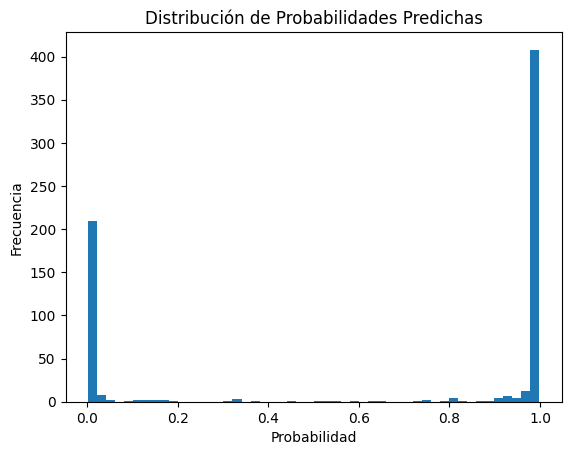

Best Threshold for best_model_EfficientNetB1-Model-5_kfold: 0.00 - Best F1-Score: 0.6349


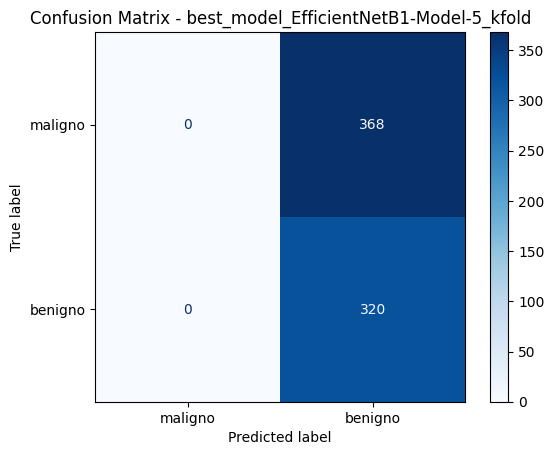

Classification Report - best_model_EfficientNetB1-Model-5_kfold
              precision    recall  f1-score   support

     maligno       0.00      0.00      0.00       368
     benigno       0.47      1.00      0.63       320

    accuracy                           0.47       688
   macro avg       0.23      0.50      0.32       688
weighted avg       0.22      0.47      0.30       688


Model Performance Summary:
best_model_EfficientNetB1-Model-5_kfold:
  - Accuracy: 0.4651
  - F1 Score: 0.6349
  - Precision: 0.4651
  - Recall: 1.0000
  - Best Threshold: 0.00
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import os
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import TFSMLayer

# Paths to dataset
test_dir = '1_dataset/test'

# Configuración
img_height = 224
img_width = 224
batch_size = 512

# Cargar imágenes del directorio en memoria
def load_images_from_directory(directory, target_size=(224, 224)):
    images = []
    labels = []
    class_indices = {}
    for class_index, class_name in enumerate(os.listdir(directory)):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_indices[class_name] = class_index
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                try:
                    img = tf.keras.preprocessing.image.load_img(img_path, target_size=target_size)
                    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0  # Escalar entre 0 y 1
                    images.append(img_array)
                    labels.append(class_index)
                except Exception as e:
                    print(f"Error al cargar {img_path}: {e}")
    return np.array(images), np.array(labels), class_indices

# Cargar el conjunto de prueba en memoria
print("Cargando imágenes del conjunto de prueba...")
X_test, y_true, class_indices = load_images_from_directory(test_dir, target_size=(img_height, img_width))
print(f"Total imágenes de prueba: {len(X_test)}")

# Función para encontrar el mejor umbral basado en el F1-Score
def find_best_threshold(y_true, y_pred_probs):
    thresholds = np.linspace(0, 1, 101)
    best_threshold = 0.5
    best_f1 = 0

    for threshold in thresholds:
        y_pred = (y_pred_probs >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    return best_threshold, best_f1

# Evaluar un modelo
def evaluate_model(model_path, X_test, y_true, class_indices):
    model_name = os.path.basename(model_path)
    print(f"\nEvaluating model: {model_name}")

    # Limpiar memoria antes de cargar el modelo
    tf.keras.backend.clear_session()

    # Cargar el modelo como TFSMLayer
    model_layer = TFSMLayer(model_path, call_endpoint="serving_default")

    # Realizar predicciones en todo el conjunto de prueba
    print("Realizando predicciones en el conjunto de prueba...")
    y_pred_prob = model_layer(X_test)
    y_pred_prob = list(y_pred_prob.values())[0].numpy().flatten()
    print("y_pred_prob:", y_pred_prob)

    # Estadísticas de las probabilidades predichas
    print("Estadísticas de las probabilidades predichas:")
    print(f"Mínimo: {np.min(y_pred_prob)}")
    print(f"Máximo: {np.max(y_pred_prob)}")
    print(f"Promedio: {np.mean(y_pred_prob)}")
    plt.hist(y_pred_prob, bins=50)
    plt.title("Distribución de Probabilidades Predichas")
    plt.xlabel("Probabilidad")
    plt.ylabel("Frecuencia")
    plt.show()

    # Encontrar el mejor umbral
    best_threshold, best_f1 = find_best_threshold(y_true, y_pred_prob)
    print(f"Best Threshold for {model_name}: {best_threshold:.2f} - Best F1-Score: {best_f1:.4f}")

    # Predecir con el mejor umbral
    y_pred = (y_pred_prob >= best_threshold).astype(int)

    # Matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_indices.keys())
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # Reporte de clasificación
    print(f"Classification Report - {model_name}")
    print(classification_report(y_true, y_pred, target_names=class_indices.keys()))

    # Guardar métricas
    accuracy = np.mean(y_pred == y_true)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    results = {
        "accuracy": accuracy,
        "f1_score": best_f1,
        "precision": precision,
        "recall": recall,
        "best_threshold": best_threshold
    }
    return model_name, results

# Identificar modelos guardados en formato SavedModel
model_dirs = [d for d in os.listdir('.') if os.path.isdir(d) and os.path.exists(os.path.join(d, "saved_model.pb"))]

# Evaluar todos los modelos en el directorio actual
all_results = {}
for model_path in model_dirs:
    model_name, metrics = evaluate_model(model_path, X_test, y_true, class_indices)
    all_results[model_name] = metrics

# Resumen del desempeño de los modelos
print("\nModel Performance Summary:")
for model_name, metrics in all_results.items():
    print(f"{model_name}:")
    print(f"  - Accuracy: {metrics['accuracy']:.4f}")
    print(f"  - F1 Score: {metrics['f1_score']:.4f}")
    print(f"  - Precision: {metrics['precision']:.4f}")
    print(f"  - Recall: {metrics['recall']:.4f}")
    print(f"  - Best Threshold: {metrics['best_threshold']:.2f}")
    print("-" * 50)


In [ ]:
# Asegúrate de incluir las capas personalizadas en custom_objects
custom_objects = {
    "ExpandDimsLayer": ExpandDimsLayer,
    "SqueezeDimsLayer": SqueezeDimsLayer,
    'tf': tf
}

# Habilitar la deserialización insegura
keras.config.enable_unsafe_deserialization()

model = load_model([f for f in os.listdir('.') if f.endswith(".keras")][0], custom_objects=custom_objects)

# Predict on test set
y_pred_prob = model.predict(test_generator).flatten()

You are using a softmax over axis 3 of a tensor of shape (32, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?


21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step

You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?


22/22 ━━━━━━━━━━━━━━━━━━━━ 17s 446ms/step


In [ ]:
y_pred_prob

array([0.02872226, 0.02814722, 0.02924441, 0.02841186, 0.02904792,
       0.02873131, 0.02871491, 0.02871491, 0.0288397 , 0.02901489,
       0.02824579, 0.02913938, 0.02907184, 0.02897787, 0.02896384,
       0.93819124, 0.02860657, 0.02919001, 0.02830304, 0.02870162,
       0.02822868, 0.02926708, 0.02922677, 0.02906913, 0.02906913,
       0.02913246, 0.02897039, 0.0288674 , 0.02824739, 0.0287154 ,
       0.02934407, 0.02936601, 0.02905487, 0.02887809, 0.0290125 ,
       0.02890033, 0.02907805, 0.02914459, 0.02914564, 0.02871604,
       0.02881167, 0.02908425, 0.02895281, 0.02903598, 0.0290208 ,
       0.02901481, 0.02903668, 0.02909369, 0.02909091, 0.02914285,
       0.02913225, 0.02882532, 0.02882532, 0.02867242, 0.0287335 ,
       0.02907404, 0.02899951, 0.02909145, 0.0288442 , 0.02892784,
       0.02899155, 0.02897653, 0.02923474, 0.02904731, 0.02892727,
       0.02899507, 0.02899507, 0.02895113, 0.02875521, 0.02898982,
       0.02935072, 0.02869641, 0.02813221, 0.02875346, 0.02810

In [ ]:
from google.colab import files
import glob

# Buscar todos los archivos que terminan en .keras
keras_files = glob.glob("*.keras")

# Descargar cada archivo encontrado
for file in keras_files:
    print(f"Descargando: {file}")
    files.download(file)


In [ ]:
from google.colab import files
import glob

# Busca archivos que coincidan con el formato 'best_model_*_kfold.keras'
model_files = glob.glob("best_model_*_kfold.keras")

# Si solo quieres descargar un archivo específico, selecciona uno
if len(model_files) == 1:
    print(f"Descargando el modelo: {model_files[0]}")
    files.download(model_files[0])
elif len(model_files) > 1:
    print("Se encontraron múltiples modelos. Descargando todos:")
    for file in model_files:
        print(f"Descargando: {file}")
        files.download(file)
else:
    print("No se encontró ningún modelo con el formato 'best_model_*_kfold.keras'.")


## EfficientNet B3

In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import clone_model
import numpy as np
from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, Xception, InceptionV3, EfficientNetB3
from tensorflow.keras.layers import Multiply, GlobalAveragePooling2D, Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Activation, Add, Concatenate, GlobalMaxPooling2D, AveragePooling2D, Activation, Layer, Lambda, MultiHeadAttention, LayerNormalization

# Function to clear memory
def clear_memory():
    tf.keras.backend.clear_session()  # Limpia los gráficos y el backend
    gc.collect()  # Recolector de basura de Python
    print("Sesión de TensorFlow reiniciada y memoria liberada...")

@tf.keras.utils.register_keras_serializable()
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', dtype=tf.float32, **kwargs):
        super(F1Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
        return f1

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

@tf.keras.utils.register_keras_serializable()
class ExpandDimsLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        return tf.expand_dims(inputs, axis=1)

@tf.keras.utils.register_keras_serializable()
class SqueezeDimsLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        return tf.squeeze(inputs, axis=1)

def create_model_1(base_model):  # Modelo Fav
    base_model.trainable = True

    # Bloque convolucional inicial
    conv_layer = Conv2D(128, (3, 3), activation="relu", padding="same")(base_model.output)
    batch_norm = BatchNormalization()(conv_layer)
    max_pool = MaxPooling2D((2, 2))(batch_norm)
    dropout = Dropout(0.4)(max_pool)

    # Pooling global
    global_avg_pool = GlobalAveragePooling2D()(dropout)

    # Bloque de auto-atención
    expanded_avg_pool = ExpandDimsLayer()(global_avg_pool)  # Añadir dimensión con capa personalizada
    attention_output = MultiHeadAttention(num_heads=4, key_dim=64)(
        expanded_avg_pool, expanded_avg_pool
    )
    attention_output = GlobalAveragePooling1D()(attention_output)  # Suavizar la salida

    # Capas densas finales
    dense_1 = Dense(64, kernel_regularizer=l2(1e-2))(attention_output)
    batch_norm_1 = BatchNormalization()(dense_1)
    activation_1 = Activation('relu')(batch_norm_1)
    dropout_1 = Dropout(0.3)(activation_1)

    # Capa de predicción
    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-2))(dropout_1)

    # Definir el modelo
    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=5e-4, momentum=0.9, nesterov=True),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC"]
    )
    return model

In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import clone_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
from sklearn.metrics import f1_score, accuracy_score
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, Xception, InceptionV3, EfficientNetB3, EfficientNetB1
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import gc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import os
import shutil
import json
import pandas as pd
from tensorflow.keras import mixed_precision
from tensorflow.keras.layers import *
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Paths to dataset
train_dir = '1_dataset/train'
validation_dir = '1_dataset/valid'

# Configuración
k_folds = 2
batch_size = 16
img_height = 224
img_width = 224
epochs = 5

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

@tf.keras.utils.register_keras_serializable()
class ExpandDimsLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        return tf.expand_dims(inputs, axis=1)

@tf.keras.utils.register_keras_serializable()
class SqueezeDimsLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        # Obtener forma dinámica del tensor
        input_shape = tf.keras.backend.int_shape(inputs)

        # Si la dimensión no es 1, no intentamos hacer squeeze
        if input_shape[1] != 1:
            return inputs

        # Realizar squeeze solo si la dimensión es 1
        return tf.squeeze(inputs, axis=1)

    def compute_output_shape(self, input_shape):
        # Calcula correctamente la salida eliminando la dimensión [1] si corresponde
        if input_shape[1] == 1:
            return (input_shape[0],) + input_shape[2:]
        return input_shape

# Función para liberar memoria
def clear_memory():
    tf.keras.backend.clear_session()
    gc.collect()
    print("Memoria liberada.")

# Convertir datos de generadores a matrices
def generator_to_array(generator):
    data, labels = [], []
    for i in range(len(generator)):
        images, lbls = generator[i]
        data.extend(images)
        labels.extend(lbls)
    return np.array(data), np.array(labels)

# Convertir datos
print("Convirtiendo datos de generadores a matrices...")
X_train, y_train = generator_to_array(train_generator)
X_valid, y_valid = generator_to_array(valid_generator)

# Combinar train y valid
X_data = np.concatenate([X_train, X_valid])
y_data = np.concatenate([y_train, y_valid])

# Configuración de arquitecturas
model_configs = [
    ("EfficientNetB3-Model-1", EfficientNetB3, create_model_1),
]


def find_best_threshold(y_true, y_pred_probs):
    thresholds = np.linspace(0, 1, 101)  # Probar thresholds de 0.00 a 1.00
    best_threshold = 0.5
    best_f1 = 0  # Inicializamos con el peor F1 posible

    for threshold in thresholds:
        y_pred = (y_pred_probs >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred)  # Usa F1 como criterio para seleccionar threshold
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    return best_threshold, best_f1

# Función para entrenar en cada fold
def train_on_fold(model_fn, base_model_fn, fold, fold_idx, model_name):
    print(f"\nEntrenando Fold {fold_idx + 1}/{k_folds} para {model_name}...")
    clear_memory()
    train_idx, val_idx = fold
    X_train_fold, y_train_fold = X_data[train_idx], y_data[train_idx]
    X_val_fold, y_val_fold = X_data[val_idx], y_data[val_idx]

    # Crear modelo
    if base_model_fn:
        base_model = base_model_fn(input_shape=(img_height, img_width, 3), include_top=False, weights="imagenet")
        model = model_fn(base_model)
    else:
        model = model_fn(input_shape=(img_height, img_width, 3))

    # Entrenar
    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[
            EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1),
            ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7, verbose=1)
        ],
        verbose=1
    )

    # Evaluar en el conjunto de validación
    y_val_pred_probs = model.predict(X_val_fold).flatten()  # Probabilidades de predicción
    best_threshold, best_f1 = find_best_threshold(y_val_fold, y_val_pred_probs)  # Buscar el mejor threshold
    y_val_pred = (y_val_pred_probs >= best_threshold).astype(int)

    # Calcular accuracy con el mejor threshold
    accuracy = accuracy_score(y_val_fold, y_val_pred)
    print(f"Fold {fold_idx + 1} - Best Threshold: {best_threshold:.2f} - F1 Score: {best_f1:.4f} - Accuracy Score: {accuracy:.4f}")

    return accuracy, model

# Entrenamiento y evaluación con K-Fold Cross-Validation
results = {}
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

for model_name, base_model_fn, model_fn in model_configs:
    print(f"\n\nIniciando Cross-Validation para {model_name}...")
    fold_scores = []
    best_fold_model = None
    best_accuracy_score = 0

    for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X_data)):
        accuracy, model = train_on_fold(model_fn, base_model_fn, (train_idx, val_idx), fold_idx, model_name)
        fold_scores.append(accuracy)

        # Guardar el mejor modelo del fold
        if accuracy > best_accuracy_score:
            best_accuracy_score = accuracy
            best_fold_model = clone_model(model)
            best_fold_model.set_weights(model.get_weights())  # Copiar pesos del mejor modelo

    # Guardar resultados
    avg_accuracy = np.mean(fold_scores)
    results[model_name] = avg_accuracy
    print(f"\n{model_name} - accuracy Score Promedio: {avg_accuracy:.4f}")

    # Guardar el mejor modelo
    best_fold_model.save(f"best_model_{model_name}_kfold.keras")
    print(f"Mejor modelo para {model_name} guardado como 'best_model_{model_name}_kfold.keras'.")

    # Liberar memoria
    clear_memory()

# Mostrar resultados finales
print("\nResultados finales:")
for model_name, avg_f1 in results.items():
    print(f"{model_name}: F1 Score Promedio = {avg_f1:.4f}")


Found 7738 images belonging to 2 classes.
Found 1081 images belonging to 2 classes.
Convirtiendo datos de generadores a matrices...


Iniciando Cross-Validation para EfficientNetB3-Model-1...

Entrenando Fold 1/2 para EfficientNetB3-Model-1...
Memoria liberada.
Epoch 1/5


You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?


276/276 ━━━━━━━━━━━━━━━━━━━━ 186s 355ms/step - AUC: 0.7169 - Precision: 0.6512 - Recall: 0.7945 - accuracy: 0.6609 - loss: 1.5058 - val_AUC: 0.5260 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.4776 - val_loss: 1.6760 - learning_rate: 5.0000e-04
Epoch 2/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 27s 97ms/step - AUC: 0.8665 - Precision: 0.7944 - Recall: 0.8408 - accuracy: 0.7960 - loss: 1.2621 - val_AUC: 0.7235 - val_Precision: 0.8772 - val_Recall: 0.1085 - val_accuracy: 0.5263 - val_loss: 1.6334 - learning_rate: 5.0000e-04
Epoch 3/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 26s 96ms/step - AUC: 0.9195 - Precision: 0.8484 - Recall: 0.8737 - accuracy: 0.8448 - loss: 1.1277 - val_AUC: 0.8841 - val_Precision: 0.8126 - val_Recall: 0.8073 - val_accuracy: 0.8020 - val_loss: 1.1619 - learning_rate: 5.0000e-04
Epoch 4/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 26s 95ms/step - AUC: 0.9263 - Precision: 0.8567 - Recall: 0.8787 - accuracy: 0.8561 - loss: 1.0667 - val_AUC: 0.9041 - val_Precision: 0.8197 - val_R

You are using a softmax over axis 3 of a tensor of shape (32, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?


138/138 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step
Fold 1 - Best Threshold: 0.30 - F1 Score: 0.8547 - Accuracy Score: 0.8347

Entrenando Fold 2/2 para EfficientNetB3-Model-1...
Memoria liberada.
Epoch 1/5


You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?


276/276 ━━━━━━━━━━━━━━━━━━━━ 178s 355ms/step - AUC: 0.7087 - Precision: 0.6623 - Recall: 0.7191 - accuracy: 0.6543 - loss: 1.5022 - val_AUC: 0.4232 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.4652 - val_loss: 1.7794 - learning_rate: 5.0000e-04
Epoch 2/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 27s 97ms/step - AUC: 0.8502 - Precision: 0.7709 - Recall: 0.7800 - accuracy: 0.7679 - loss: 1.3003 - val_AUC: 0.7784 - val_Precision: 0.9341 - val_Recall: 0.1684 - val_accuracy: 0.5489 - val_loss: 1.6709 - learning_rate: 5.0000e-04
Epoch 3/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 27s 96ms/step - AUC: 0.9088 - Precision: 0.8211 - Recall: 0.8572 - accuracy: 0.8289 - loss: 1.1586 - val_AUC: 0.8858 - val_Precision: 0.8571 - val_Recall: 0.6997 - val_accuracy: 0.7770 - val_loss: 1.2080 - learning_rate: 5.0000e-04
Epoch 4/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 26s 96ms/step - AUC: 0.9301 - Precision: 0.8607 - Recall: 0.8708 - accuracy: 0.8582 - loss: 1.0734 - val_AUC: 0.9015 - val_Precision: 0.8338 - val_R

You are using a softmax over axis 3 of a tensor of shape (32, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?


138/138 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step
Fold 2 - Best Threshold: 0.26 - F1 Score: 0.8505 - Accuracy Score: 0.8238

EfficientNetB3-Model-1 - accuracy Score Promedio: 0.8292
Mejor modelo para EfficientNetB3-Model-1 guardado como 'best_model_EfficientNetB3-Model-1_kfold.keras'.
Memoria liberada.

Resultados finales:
EfficientNetB3-Model-1: F1 Score Promedio = 0.8292


Found 688 images belonging to 2 classes.

Evaluating model: best_model_EfficientNetB3-Model-1_kfold


Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
You are using a softmax over axis 3 of a tensor of shape (32, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?


21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step

You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?


22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 460ms/step
Best Threshold for best_model_EfficientNetB3-Model-1_kfold: 0.00 with F1 Score: 0.6970


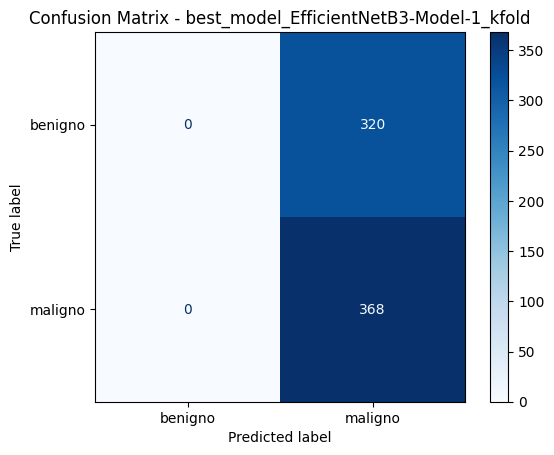

Classification Report - best_model_EfficientNetB3-Model-1_kfold
              precision    recall  f1-score   support

     benigno       0.00      0.00      0.00       320
     maligno       0.53      1.00      0.70       368

    accuracy                           0.53       688
   macro avg       0.27      0.50      0.35       688
weighted avg       0.29      0.53      0.37       688


Evaluating model: best_model_EfficientNetB1-Model-5_kfold


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


22/22 ━━━━━━━━━━━━━━━━━━━━ 17s 432ms/step
Best Threshold for best_model_EfficientNetB1-Model-5_kfold: 0.00 with F1 Score: 0.6970


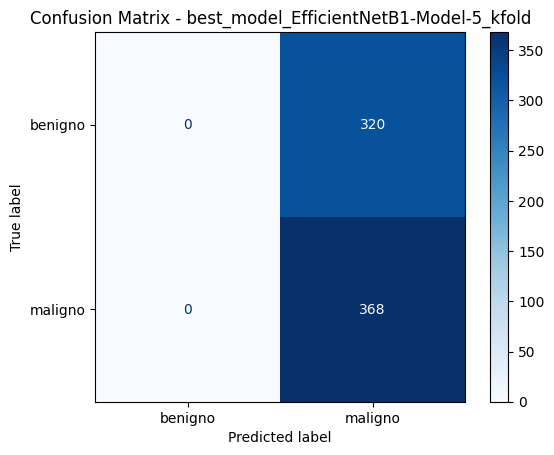

Classification Report - best_model_EfficientNetB1-Model-5_kfold
              precision    recall  f1-score   support

     benigno       0.00      0.00      0.00       320
     maligno       0.53      1.00      0.70       368

    accuracy                           0.53       688
   macro avg       0.27      0.50      0.35       688
weighted avg       0.29      0.53      0.37       688


Model Performance Summary:
best_model_EfficientNetB3-Model-1_kfold:
  - Accuracy: 0.5349
  - F1 Score: 0.6970
  - Precision: 0.5349
  - Recall: 1.0000
  - Best Threshold: 0.00
--------------------------------------------------
best_model_EfficientNetB1-Model-5_kfold:
  - Accuracy: 0.5349
  - F1 Score: 0.6970
  - Precision: 0.5349
  - Recall: 1.0000
  - Best Threshold: 0.00
--------------------------------------------------


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [ ]:
import os
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
import seaborn as sns
import json


# Paths to dataset
test_dir = '1_dataset/test'

# ImageDataGenerator setup
batch_size = 32
img_height = 224
img_width = 224

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)


@tf.keras.utils.register_keras_serializable()
class ExpandDimsLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        return tf.expand_dims(inputs, axis=1)

@tf.keras.utils.register_keras_serializable()
class SqueezeDimsLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        return tf.squeeze(inputs, axis=1)

# Identify saved models in the current directory
model_files = [f for f in os.listdir('.') if f.endswith(".keras")]
results = {}

def evaluate_model(model_path, test_generator):
    model_name = os.path.basename(model_path).replace(".keras", "")
    print(f"\nEvaluating model: {model_name}")
    # Asegúrate de incluir las capas personalizadas en custom_objects
    custom_objects = {
        "ExpandDimsLayer": ExpandDimsLayer,
        "SqueezeDimsLayer": SqueezeDimsLayer,
        "F1Score": F1Score,  # Si estás usando F1Score personalizado
    }
    model = load_model(model_path, custom_objects=custom_objects)

    # Predict on test set
    y_pred_prob = model.predict(test_generator).flatten()
    y_true = test_generator.classes

    # Determine Best Threshold for F1-Score
    thresholds = np.linspace(0, 1, 100)
    best_threshold = 0.5
    best_f1 = 0

    for threshold in thresholds:
        y_pred_temp = (y_pred_prob >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred_temp)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    print(f"Best Threshold for {model_name}: {best_threshold:.2f} with F1 Score: {best_f1:.4f}")

    # Predict with best threshold
    y_pred = (y_pred_prob >= best_threshold).astype(int)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # Classification Report
    print(f"Classification Report - {model_name}")
    print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

    # Save metrics
    accuracy = np.mean(y_pred == y_true)
    results[model_name] = {
        "accuracy": accuracy,
        "f1_score": best_f1,
        "precision": precision_score(y_true, y_pred),
        "recall": recall_score(y_true, y_pred),
        "best_threshold": best_threshold
    }
    return model_name, results[model_name]


# Evaluate all models in the current directory
for model_file in model_files:
    evaluate_model(model_file, test_generator)

print("\nModel Performance Summary:")
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  - Accuracy: {metrics['accuracy']:.4f}")
    print(f"  - F1 Score: {metrics['f1_score']:.4f}")
    print(f"  - Precision: {metrics['precision']:.4f}")
    print(f"  - Recall: {metrics['recall']:.4f}")
    print(f"  - Best Threshold: {metrics['best_threshold']:.2f}")
    print("-" * 50)

In [ ]:
from google.colab import files
import glob

# Buscar todos los archivos que terminan en .keras
keras_files = glob.glob("*.keras")

# Descargar cada archivo encontrado
for file in keras_files:
    print(f"Descargando: {file}")
    files.download(file)


In [ ]:
from google.colab import files
import glob

# Busca archivos que coincidan con el formato 'best_model_*_kfold.keras'
model_files = glob.glob("best_model_*_kfold.keras")

# Si solo quieres descargar un archivo específico, selecciona uno
if len(model_files) == 1:
    print(f"Descargando el modelo: {model_files[0]}")
    files.download(model_files[0])
elif len(model_files) > 1:
    print("Se encontraron múltiples modelos. Descargando todos:")
    for file in model_files:
        print(f"Descargando: {file}")
        files.download(file)
else:
    print("No se encontró ningún modelo con el formato 'best_model_*_kfold.keras'.")


## ResNet50

In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import clone_model
import numpy as np
from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, Xception, InceptionV3
from tensorflow.keras.layers import Multiply, GlobalAveragePooling2D, Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Activation, Add, Concatenate, GlobalMaxPooling2D, AveragePooling2D, Activation, Layer, Lambda, MultiHeadAttention, LayerNormalization

# Function to clear memory
def clear_memory():
    tf.keras.backend.clear_session()  # Limpia los gráficos y el backend
    gc.collect()  # Recolector de basura de Python
    print("Sesión de TensorFlow reiniciada y memoria liberada...")

@tf.keras.utils.register_keras_serializable()
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', dtype=tf.float32, **kwargs):
        super(F1Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
        return f1

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

@tf.keras.utils.register_keras_serializable()
def scaled_tanh(x):
    return (tf.tanh(x) + 1) / 2

def create_model_1(base_model):
    base_model.trainable = True

    # Modelo base
    conv_layer = Conv2D(128, (3, 3), activation="relu", padding="same")(base_model.output)
    batch_norm = BatchNormalization()(conv_layer)
    max_pool = MaxPooling2D((2, 2))(batch_norm)
    dropout = Dropout(0.4)(max_pool)
    global_avg_pool = GlobalAveragePooling2D()(dropout)

    # Cabezas de atención
    num_heads = 4
    attention_heads = []
    for _ in range(num_heads):
        dense = Dense(64, activation="relu")(global_avg_pool)
        attention_scores = Dense(128, activation="softmax")(dense)
        attention_heads.append(Multiply()([global_avg_pool, attention_scores]))
    concat_attention = Concatenate()(attention_heads)

    # Self-Attention
    reshaped_attention = tf.keras.layers.Reshape((1, 1, concat_attention.shape[-1]))(concat_attention)
    attention_output = MultiHeadAttention(num_heads=4, key_dim=reshaped_attention.shape[-1])(reshaped_attention, reshaped_attention)

    # Convolución 1x1 después de Self-Attention
    conv_after_attention = Conv2D(64, (1, 1), activation="relu", padding="same")(attention_output)
    global_features = GlobalAveragePooling2D()(conv_after_attention)

    dense_1 = Dense(64, kernel_regularizer=l2(1e-2))(global_features)
    batch_norm_1 = BatchNormalization()(dense_1)
    activation_1 = Activation('relu')(batch_norm_1)
    dropout_1 = Dropout(0.5)(activation_1)

    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-2))(dropout_1)

    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

def create_model_2(base_model):
    base_model.trainable = True

    global_avg_pool = GlobalAveragePooling2D()(base_model.output)

    # Primer bloque de atención
    attention_input_1 = Dense(128, activation="relu")(global_avg_pool)
    attention_scores_1 = Dense(128, activation="softmax")(attention_input_1)
    attention_output_1 = Multiply()([attention_input_1, attention_scores_1])

    # Segundo bloque de atención
    attention_input_2 = Dense(64, activation="relu")(attention_output_1)
    attention_scores_2 = Dense(64, activation="softmax")(attention_input_2)
    attention_output_2 = Multiply()([attention_input_2, attention_scores_2])

    dense_layer = Dense(64, kernel_regularizer=l2(1e-3))(attention_output_2)
    batch_normalization_layer = BatchNormalization()(dense_layer)
    activation_layer = Activation('relu')(batch_normalization_layer)
    dropout_layer = Dropout(0.4)(activation_layer)

    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-3))(dropout_layer)

    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=5e-4, momentum=0.9, nesterov=True),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

def create_model_3(base_model):
    base_model.trainable = True

    # Modelo base
    conv_layer = Conv2D(128, (3, 3), activation="relu", padding="same")(base_model.output)
    batch_norm = BatchNormalization()(conv_layer)
    max_pool = MaxPooling2D((2, 2))(batch_norm)
    dropout = Dropout(0.4)(max_pool)
    global_avg_pool = GlobalAveragePooling2D()(dropout)

    # Cabezas de atención
    num_heads = 4
    attention_heads = []
    for _ in range(num_heads):
        dense = Dense(64, activation="relu")(global_avg_pool)
        attention_scores = Dense(128, activation="softmax")(dense)
        attention_heads.append(Multiply()([global_avg_pool, attention_scores]))
    concat_attention = Concatenate()(attention_heads)

    # Self-Attention
    reshaped_attention = tf.keras.layers.Reshape((1, 1, concat_attention.shape[-1]))(concat_attention)
    attention_output = MultiHeadAttention(num_heads=4, key_dim=reshaped_attention.shape[-1])(reshaped_attention, reshaped_attention)

    # Convolución 1x1 después de Self-Attention
    conv_after_attention = Conv2D(64, (1, 1), activation="relu", padding="same")(attention_output)
    global_features = GlobalAveragePooling2D()(conv_after_attention)

    dense_1 = Dense(64, kernel_regularizer=l2(1e-2))(global_features)
    batch_norm_1 = BatchNormalization()(dense_1)
    activation_1 = Activation('relu')(batch_norm_1)
    dropout_1 = Dropout(0.5)(activation_1)

    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-2))(dropout_1)

    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=5e-4, momentum=0.9, nesterov=True),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

def create_model_4(base_model): # Modelo Fav
    base_model.trainable = True

    # Modelo base
    conv_layer = Conv2D(128, (3, 3), activation="relu", padding="same")(base_model.output)
    batch_norm = BatchNormalization()(conv_layer)
    max_pool = MaxPooling2D((2, 2))(batch_norm)
    dropout = Dropout(0.4)(max_pool)
    global_avg_pool = GlobalAveragePooling2D()(dropout)

    # Cabezas de atención
    num_heads = 4
    attention_heads = []
    for _ in range(num_heads):
        dense = Dense(64, activation="relu")(global_avg_pool)
        attention_scores = Dense(128, activation="softmax")(dense)
        attention_heads.append(Multiply()([global_avg_pool, attention_scores]))
    concat_attention = Concatenate()(attention_heads)

    # Convolución 1x1 después de atención
    reshaped_attention = tf.keras.layers.Reshape((1, 1, concat_attention.shape[-1]))(concat_attention)
    conv_after_attention = Conv2D(64, (1, 1), activation="relu", padding="same")(reshaped_attention)
    global_features = GlobalAveragePooling2D()(conv_after_attention)

    # Más capas densas
    dense_1 = Dense(128, activation="relu", kernel_regularizer=l2(1e-2))(global_features)
    dense_2 = Dense(64, activation="relu", kernel_regularizer=l2(1e-2))(dense_1)
    batch_norm = BatchNormalization()(dense_2)
    activation = Activation('relu')(batch_norm)
    dropout_1 = Dropout(0.5)(activation)

    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-2))(dropout_1)

    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=5e-4, momentum=0.9, nesterov=True),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

def create_model_5(base_model):
    base_model.trainable = True

    # Bloques convolucionales con Dropout ajustado
    conv_layer_1 = Conv2D(128, (5, 5), activation="relu", padding="same")(base_model.output)
    batch_norm_1 = BatchNormalization()(conv_layer_1)
    max_pool_1 = MaxPooling2D((2, 2))(batch_norm_1)
    dropout_1 = Dropout(0.5)(max_pool_1)  # Incrementado Dropout

    conv_layer_2 = Conv2D(64, (3, 3), activation="relu", padding="same")(dropout_1)
    batch_norm_2 = BatchNormalization()(conv_layer_2)
    max_pool_2 = MaxPooling2D((2, 2))(batch_norm_2)
    dropout_2 = Dropout(0.4)(max_pool_2)  # Ajustado Dropout

    # Atención mejorada con CAM
    conv_attention = Conv2D(64, (1, 1), activation='sigmoid', padding='same')(dropout_2)
    attention_output = Multiply()([dropout_2, conv_attention])

    global_avg_pool = GlobalAveragePooling2D()(attention_output)

    # Capas densas
    dense_1 = Dense(64, kernel_regularizer=l2(1e-2))(global_avg_pool)  # Mayor regularización L2
    batch_norm_3 = BatchNormalization()(dense_1)
    activation_1 = LeakyReLU(alpha=0.1)(batch_norm_3)
    dropout_3 = Dropout(0.4)(activation_1)

    dense_2 = Dense(64, kernel_regularizer=l2(1e-2))(dropout_3)
    batch_norm_4 = BatchNormalization()(dense_2)
    activation_2 = Activation('relu')(batch_norm_4)

    prediction_layer = Dense(1, activation=scaled_tanh, kernel_regularizer=l2(1e-2))(activation_2)

    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=5e-4, momentum=0.9, nesterov=True),  # Reduce LR
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

def create_model_6(base_model):
    base_model.trainable = True

    # Bloque base
    conv_layer = Conv2D(128, (3, 3), activation="relu", padding="same")(base_model.output)
    batch_norm = BatchNormalization()(conv_layer)
    max_pool = MaxPooling2D((2, 2))(batch_norm)
    dropout = Dropout(0.4)(max_pool)
    global_avg_pool = GlobalAveragePooling2D()(dropout)

    # Self-Attention tipo Transformer
    query_key_value = tf.keras.layers.Reshape((1, -1))(global_avg_pool)
    attention_output = MultiHeadAttention(num_heads=4, key_dim=query_key_value.shape[-1])(query_key_value, query_key_value)
    attention_output = tf.keras.layers.Reshape((-1,))(attention_output)

    # Dropout y regularización avanzados
    dense_1 = Dense(128, activation="relu", kernel_regularizer=l2(1e-2))(attention_output)
    dropout_1 = Dropout(0.4)(dense_1)
    dense_2 = Dense(64, activation="relu", kernel_regularizer=l2(1e-2))(dropout_1)
    dropout_2 = Dropout(0.5)(dense_2)

    # Predicción
    prediction_layer = Dense(1, activation=scaled_tanh, kernel_regularizer=l2(1e-2))(dropout_2)

    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=5e-4, momentum=0.9, nesterov=True),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

Found 7738 images belonging to 2 classes.
Found 1081 images belonging to 2 classes.
Convirtiendo datos de generadores a matrices...


Iniciando Cross-Validation para ResNet50-Model-6...

Entrenando Fold 1/7 para ResNet50-Model-6...
Memoria liberada.
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


945/945 ━━━━━━━━━━━━━━━━━━━━ 133s 87ms/step - AUC: 0.7025 - Precision: 0.6565 - Recall: 0.6379 - accuracy: 0.6373 - f1_score: 0.5125 - loss: 2.6833 - val_AUC: 0.8313 - val_Precision: 0.8934 - val_Recall: 0.2789 - val_accuracy: 0.6222 - val_f1_score: 0.2642 - val_loss: 2.5064 - learning_rate: 5.0000e-04
Epoch 2/100
945/945 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - AUC: 0.8944 - Precision: 0.8088 - Recall: 0.8845 - accuracy: 0.8259 - f1_score: 0.5739 - loss: 2.1211 - val_AUC: 0.8812 - val_Precision: 0.8659 - val_Recall: 0.4913 - val_accuracy: 0.7071 - val_f1_score: 0.3991 - val_loss: 2.0995 - learning_rate: 5.0000e-04
Epoch 3/100
945/945 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - AUC: 0.9383 - Precision: 0.8524 - Recall: 0.9137 - accuracy: 0.8719 - f1_score: 0.5628 - loss: 1.7382 - val_AUC: 0.9264 - val_Precision: 0.8093 - val_Recall: 0.9144 - val_accuracy: 0.8492 - val_f1_score: 0.5705 - val_loss: 1.5737 - learning_rate: 5.0000e-04
Epoch 4/100
945/945 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - AUC: 0.95

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 187ms/step
Fold 1 - Best Threshold: 0.10 - F1 Score: 0.8906 - Accuracy Score: 0.8841

Entrenando Fold 2/7 para ResNet50-Model-6...
Memoria liberada.
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


945/945 ━━━━━━━━━━━━━━━━━━━━ 113s 75ms/step - AUC: 0.7337 - Precision: 0.6696 - Recall: 0.7422 - accuracy: 0.6700 - f1_score: 0.5575 - loss: 2.6617 - val_AUC: 0.8542 - val_Precision: 0.8612 - val_Recall: 0.5847 - val_accuracy: 0.7254 - val_f1_score: 0.4633 - val_loss: 2.3336 - learning_rate: 5.0000e-04
Epoch 2/100
945/945 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - AUC: 0.8911 - Precision: 0.7996 - Recall: 0.8774 - accuracy: 0.8193 - f1_score: 0.5636 - loss: 2.1222 - val_AUC: 0.9157 - val_Precision: 0.8799 - val_Recall: 0.7879 - val_accuracy: 0.8278 - val_f1_score: 0.5510 - val_loss: 1.8890 - learning_rate: 5.0000e-04
Epoch 3/100
945/945 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - AUC: 0.9296 - Precision: 0.8337 - Recall: 0.9032 - accuracy: 0.8565 - f1_score: 0.5615 - loss: 1.7506 - val_AUC: 0.9351 - val_Precision: 0.8540 - val_Recall: 0.9131 - val_accuracy: 0.8690 - val_f1_score: 0.5983 - val_loss: 1.5342 - learning_rate: 5.0000e-04
Epoch 4/100
945/945 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - AUC: 0.95

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step
Fold 2 - Best Threshold: 0.20 - F1 Score: 0.8985 - Accuracy Score: 0.8849

Entrenando Fold 3/7 para ResNet50-Model-6...
Memoria liberada.
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


945/945 ━━━━━━━━━━━━━━━━━━━━ 114s 76ms/step - AUC: 0.7345 - Precision: 0.6855 - Recall: 0.6746 - accuracy: 0.6729 - f1_score: 0.5224 - loss: 2.6523 - val_AUC: 0.8024 - val_Precision: 0.8733 - val_Recall: 0.2864 - val_accuracy: 0.5960 - val_f1_score: 0.2862 - val_loss: 2.5596 - learning_rate: 5.0000e-04
Epoch 2/100
945/945 ━━━━━━━━━━━━━━━━━━━━ 43s 45ms/step - AUC: 0.8976 - Precision: 0.8040 - Recall: 0.8776 - accuracy: 0.8246 - f1_score: 0.5625 - loss: 2.1025 - val_AUC: 0.8752 - val_Precision: 0.8391 - val_Recall: 0.6884 - val_accuracy: 0.7627 - val_f1_score: 0.5135 - val_loss: 1.9664 - learning_rate: 5.0000e-04
Epoch 3/100
945/945 ━━━━━━━━━━━━━━━━━━━━ 43s 45ms/step - AUC: 0.9500 - Precision: 0.8702 - Recall: 0.9234 - accuracy: 0.8857 - f1_score: 0.5702 - loss: 1.6927 - val_AUC: 0.8992 - val_Precision: 0.8287 - val_Recall: 0.8323 - val_accuracy: 0.8183 - val_f1_score: 0.5666 - val_loss: 1.6335 - learning_rate: 5.0000e-04
Epoch 4/100
945/945 ━━━━━━━━━━━━━━━━━━━━ 43s 45ms/step - AUC: 0.96

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step
Fold 3 - Best Threshold: 0.06 - F1 Score: 0.8842 - Accuracy Score: 0.8659

Entrenando Fold 4/7 para ResNet50-Model-6...
Memoria liberada.
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


945/945 ━━━━━━━━━━━━━━━━━━━━ 112s 75ms/step - AUC: 0.7009 - Precision: 0.6397 - Recall: 0.7166 - accuracy: 0.6421 - f1_score: 0.5556 - loss: 2.6495 - val_AUC: 0.8120 - val_Precision: 0.9417 - val_Recall: 0.1679 - val_accuracy: 0.5500 - val_f1_score: 0.1800 - val_loss: 2.5887 - learning_rate: 5.0000e-04
Epoch 2/100
945/945 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - AUC: 0.8921 - Precision: 0.7993 - Recall: 0.8735 - accuracy: 0.8183 - f1_score: 0.5620 - loss: 2.1035 - val_AUC: 0.9101 - val_Precision: 0.8197 - val_Recall: 0.8915 - val_accuracy: 0.8373 - val_f1_score: 0.5979 - val_loss: 1.8390 - learning_rate: 5.0000e-04
Epoch 3/100
945/945 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - AUC: 0.9367 - Precision: 0.8434 - Recall: 0.9156 - accuracy: 0.8654 - f1_score: 0.5703 - loss: 1.7177 - val_AUC: 0.9133 - val_Precision: 0.8507 - val_Recall: 0.8128 - val_accuracy: 0.8238 - val_f1_score: 0.5657 - val_loss: 1.6029 - learning_rate: 5.0000e-04
Epoch 4/100
945/945 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - AUC: 0.95

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step
Fold 4 - Best Threshold: 0.06 - F1 Score: 0.8939 - Accuracy Score: 0.8794

Entrenando Fold 5/7 para ResNet50-Model-6...
Memoria liberada.
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


945/945 ━━━━━━━━━━━━━━━━━━━━ 113s 75ms/step - AUC: 0.7348 - Precision: 0.6755 - Recall: 0.7400 - accuracy: 0.6751 - f1_score: 0.5535 - loss: 2.6597 - val_AUC: 0.7858 - val_Precision: 0.9355 - val_Recall: 0.1276 - val_accuracy: 0.5230 - val_f1_score: 0.1440 - val_loss: 2.9730 - learning_rate: 5.0000e-04
Epoch 2/100
945/945 ━━━━━━━━━━━━━━━━━━━━ 43s 45ms/step - AUC: 0.9037 - Precision: 0.8207 - Recall: 0.8852 - accuracy: 0.8345 - f1_score: 0.5768 - loss: 2.1009 - val_AUC: 0.8918 - val_Precision: 0.8263 - val_Recall: 0.8021 - val_accuracy: 0.8016 - val_f1_score: 0.5699 - val_loss: 1.9163 - learning_rate: 5.0000e-04
Epoch 3/100
945/945 ━━━━━━━━━━━━━━━━━━━━ 43s 45ms/step - AUC: 0.9343 - Precision: 0.8492 - Recall: 0.9219 - accuracy: 0.8735 - f1_score: 0.5678 - loss: 1.7387 - val_AUC: 0.9036 - val_Precision: 0.8856 - val_Recall: 0.6921 - val_accuracy: 0.7849 - val_f1_score: 0.5126 - val_loss: 1.7006 - learning_rate: 5.0000e-04
Epoch 4/100
945/945 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - AUC: 0.95

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step
Fold 5 - Best Threshold: 0.13 - F1 Score: 0.8810 - Accuracy Score: 0.8643

Entrenando Fold 6/7 para ResNet50-Model-6...
Memoria liberada.
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


945/945 ━━━━━━━━━━━━━━━━━━━━ 112s 76ms/step - AUC: 0.7277 - Precision: 0.6646 - Recall: 0.7190 - accuracy: 0.6651 - f1_score: 0.5438 - loss: 2.6603 - val_AUC: 0.8187 - val_Precision: 0.9336 - val_Recall: 0.3067 - val_accuracy: 0.6095 - val_f1_score: 0.2951 - val_loss: 2.5495 - learning_rate: 5.0000e-04
Epoch 2/100
945/945 ━━━━━━━━━━━━━━━━━━━━ 43s 45ms/step - AUC: 0.9012 - Precision: 0.8126 - Recall: 0.8929 - accuracy: 0.8344 - f1_score: 0.5714 - loss: 2.1059 - val_AUC: 0.8676 - val_Precision: 0.7759 - val_Recall: 0.8503 - val_accuracy: 0.7841 - val_f1_score: 0.5988 - val_loss: 1.9349 - learning_rate: 5.0000e-04
Epoch 3/100
945/945 ━━━━━━━━━━━━━━━━━━━━ 43s 45ms/step - AUC: 0.9386 - Precision: 0.8481 - Recall: 0.9233 - accuracy: 0.8723 - f1_score: 0.5725 - loss: 1.7296 - val_AUC: 0.8928 - val_Precision: 0.8739 - val_Recall: 0.6948 - val_accuracy: 0.7786 - val_f1_score: 0.5213 - val_loss: 1.7189 - learning_rate: 5.0000e-04
Epoch 4/100
945/945 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - AUC: 0.95

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step
Fold 6 - Best Threshold: 0.52 - F1 Score: 0.8771 - Accuracy Score: 0.8635

Entrenando Fold 7/7 para ResNet50-Model-6...
Memoria liberada.
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (8, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


944/945 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - AUC: 0.7017 - Precision: 0.6663 - Recall: 0.7049 - accuracy: 0.6517 - f1_score: 0.5540 - loss: 2.6626

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


945/945 ━━━━━━━━━━━━━━━━━━━━ 94s 56ms/step - AUC: 0.7019 - Precision: 0.6665 - Recall: 0.7050 - accuracy: 0.6519 - f1_score: 0.5540 - loss: 2.6623 - val_AUC: 0.8534 - val_Precision: 0.8683 - val_Recall: 0.4567 - val_accuracy: 0.6910 - val_f1_score: 0.3815 - val_loss: 2.3530 - learning_rate: 5.0000e-04
Epoch 2/100
945/945 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - AUC: 0.9004 - Precision: 0.8109 - Recall: 0.8823 - accuracy: 0.8272 - f1_score: 0.5698 - loss: 2.0977 - val_AUC: 0.8583 - val_Precision: 0.8407 - val_Recall: 0.5402 - val_accuracy: 0.7164 - val_f1_score: 0.4286 - val_loss: 1.9963 - learning_rate: 5.0000e-04
Epoch 3/100
945/945 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - AUC: 0.9353 - Precision: 0.8494 - Recall: 0.9212 - accuracy: 0.8710 - f1_score: 0.5754 - loss: 1.7281 - val_AUC: 0.9244 - val_Precision: 0.8109 - val_Recall: 0.8709 - val_accuracy: 0.8324 - val_f1_score: 0.5620 - val_loss: 1.5620 - learning_rate: 5.0000e-04
Epoch 4/100
945/945 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - AUC: 0.960

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 187ms/step
Fold 7 - Best Threshold: 0.18 - F1 Score: 0.8835 - Accuracy Score: 0.8769

ResNet50-Model-6 - accuracy Score Promedio: 0.8741
Mejor modelo para ResNet50-Model-6 guardado como 'best_model_ResNet50-Model-6_kfold.keras'.


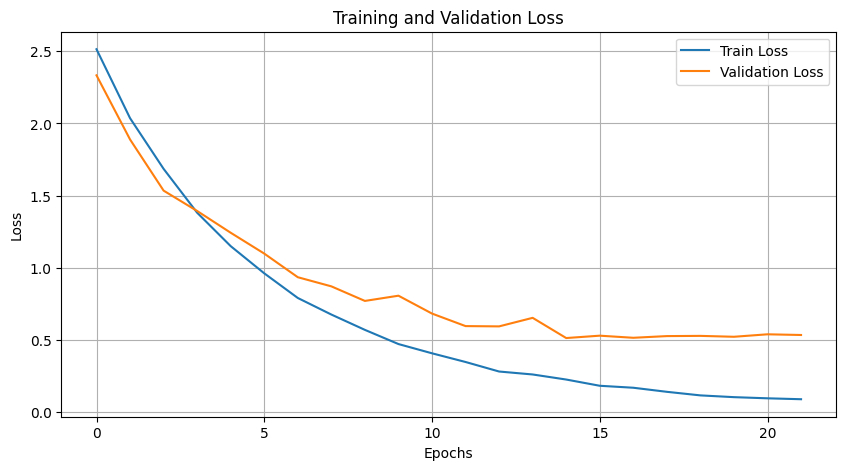

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step


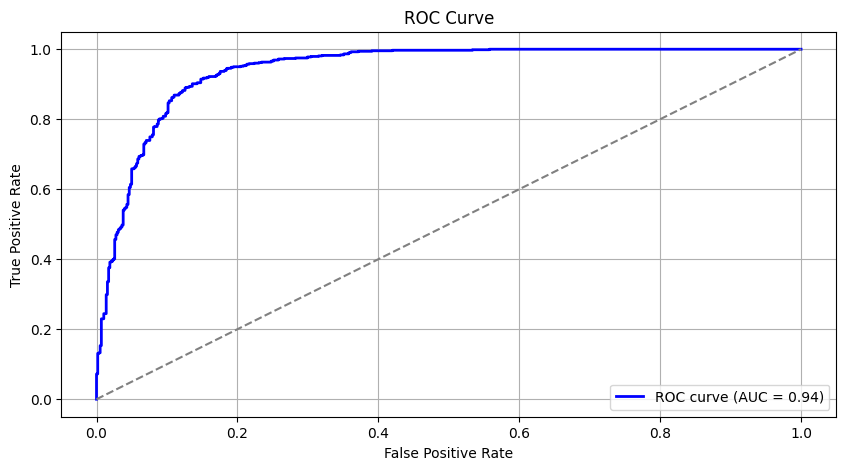

Memoria liberada.

Resultados finales:
ResNet50-Model-6: F1 Score Promedio = 0.8741


In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import clone_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, roc_curve, auc
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, Xception, InceptionV3, EfficientNetB3, EfficientNetB1
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import gc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import os
import shutil
import json
import pandas as pd
from tensorflow.keras import mixed_precision
from tensorflow.keras.layers import *
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Paths to dataset
train_dir = '1_dataset/train'
validation_dir = '1_dataset/valid'

# Configuración
k_folds = 7
batch_size = 8
img_height = 224
img_width = 224
epochs = 100

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

@tf.keras.utils.register_keras_serializable()
def scaled_tanh(x):
    return (tf.tanh(x) + 1) / 2

# Función para liberar memoria
def clear_memory():
    tf.keras.backend.clear_session()
    gc.collect()
    print("Memoria liberada.")

# Convertir datos de generadores a matrices
def generator_to_array(generator):
    data, labels = [], []
    for i in range(len(generator)):
        images, lbls = generator[i]
        data.extend(images)
        labels.extend(lbls)
    return np.array(data), np.array(labels)

# Convertir datos
print("Convirtiendo datos de generadores a matrices...")
X_train, y_train = generator_to_array(train_generator)
X_valid, y_valid = generator_to_array(valid_generator)

# Combinar train y valid
X_data = np.concatenate([X_train, X_valid])
y_data = np.concatenate([y_train, y_valid])

# Configuración de arquitecturas
model_configs = [
#    ("ResNet50-Model-1", ResNet50, create_model_1),
#    ("ResNet50-Model-2", ResNet50, create_model_2),
    #("ResNet50-Model-3", ResNet50, create_model_3)
    #("ResNet50-Model-4", ResNet50, create_model_4),
    #("ResNet50-Model-5", ResNet50, create_model_5),
    ("ResNet50-Model-6", ResNet50, create_model_6)
]

def find_best_threshold(y_true, y_pred_probs):
    thresholds = np.linspace(0, 1, 101)  # Probar thresholds de 0.00 a 1.00
    best_threshold = 0.5
    best_f1 = 0  # Inicializamos con el peor F1 posible

    for threshold in thresholds:
        y_pred = (y_pred_probs >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred)  # Usa F1 como criterio para seleccionar threshold
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    return best_threshold, best_f1

# Gráficos para val_loss y AUC-ROC del mejor modelo
def plot_model_performance(history, model, X_val, y_val):
    # Gráfico de val_loss
    plt.figure(figsize=(10, 5))
    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()

    # AUC-ROC
    y_pred_probs = model.predict(X_val).flatten()
    fpr, tpr, _ = roc_curve(y_val, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Función para entrenar en cada fold
def train_on_fold(model_fn, base_model_fn, fold, fold_idx, model_name):
    print(f"\nEntrenando Fold {fold_idx + 1}/{k_folds} para {model_name}...")
    clear_memory()
    train_idx, val_idx = fold
    X_train_fold, y_train_fold = X_data[train_idx], y_data[train_idx]
    X_val_fold, y_val_fold = X_data[val_idx], y_data[val_idx]

    # Crear modelo
    if base_model_fn:
        base_model = base_model_fn(input_shape=(img_height, img_width, 3), include_top=False, weights="imagenet")
        model = model_fn(base_model)
    else:
        model = model_fn(input_shape=(img_height, img_width, 3))

    # Entrenar
    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[
            EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1),
            ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7, verbose=1)
        ],
        verbose=1
    )

    # Evaluar en el conjunto de validación
    y_val_pred_probs = model.predict(X_val_fold).flatten()  # Probabilidades de predicción
    best_threshold, best_f1 = find_best_threshold(y_val_fold, y_val_pred_probs)  # Buscar el mejor threshold
    y_val_pred = (y_val_pred_probs >= best_threshold).astype(int)

    # Calcular accuracy con el mejor threshold
    accuracy = accuracy_score(y_val_fold, y_val_pred)
    print(f"Fold {fold_idx + 1} - Best Threshold: {best_threshold:.2f} - F1 Score: {best_f1:.4f} - Accuracy Score: {accuracy:.4f}")

    return accuracy, model, history

# Entrenamiento y evaluación con K-Fold Cross-Validation
results = {}
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

for model_name, base_model_fn, model_fn in model_configs:
    print(f"\n\nIniciando Cross-Validation para {model_name}...")
    fold_scores = []
    best_fold_model = None
    best_accuracy_score = 0
    best_history = None
    best_val = None

    for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X_data)):
        accuracy, model, history = train_on_fold(model_fn, base_model_fn, (train_idx, val_idx), fold_idx, model_name)
        fold_scores.append(accuracy)

        # Guardar el mejor modelo del fold
        if accuracy > best_accuracy_score:
            best_accuracy_score = accuracy
            best_fold_model = model  # No clones el modelo, usa el mismo directamente
            best_history = history.history  # Guarda el historial del modelo
            best_val = (X_data[val_idx], y_data[val_idx])

    # Guardar resultados
    avg_accuracy = np.mean(fold_scores)
    results[model_name] = avg_accuracy
    print(f"\n{model_name} - accuracy Score Promedio: {avg_accuracy:.4f}")

    # Guardar el mejor modelo
    best_fold_model.save(f"best_model_{model_name}_kfold.keras")
    print(f"Mejor modelo para {model_name} guardado como 'best_model_{model_name}_kfold.keras'.")

    # Gráficos para val_loss y AUC-ROC
    if best_history and best_val:
        plot_model_performance(best_history, best_fold_model, *best_val)

    # Liberar memoria
    clear_memory()

# Mostrar resultados finales
print("\nResultados finales:")
for model_name, avg_f1 in results.items():
    print(f"{model_name}: F1 Score Promedio = {avg_f1:.4f}")


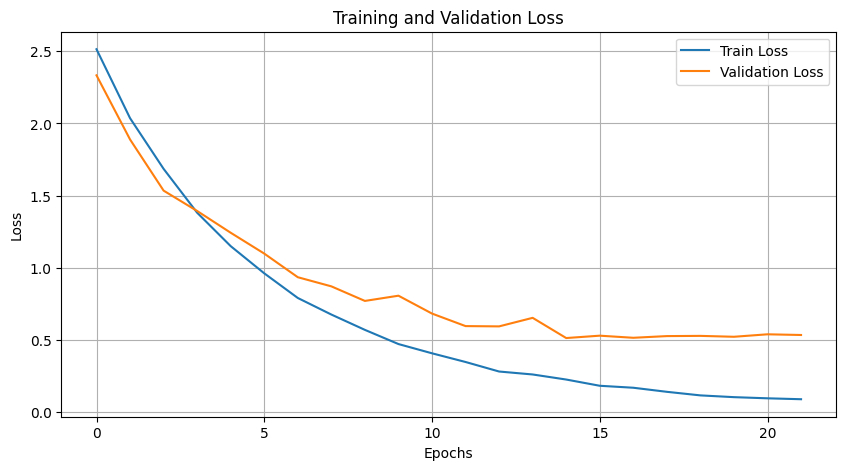

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step


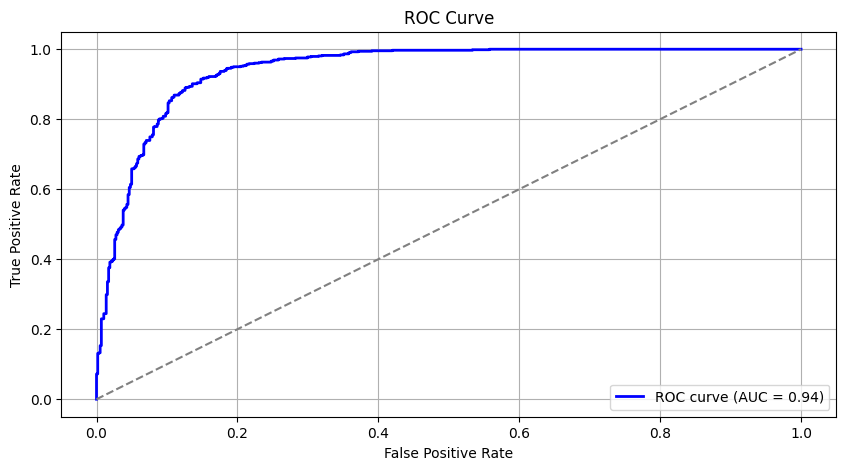

In [ ]:
# Gráficos para val_loss y AUC-ROC del mejor modelo
def plot_model_performance(history, model, X_val, y_val):
    # Gráfico de val_loss
    plt.figure(figsize=(10, 5))
    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()

    # AUC-ROC
    y_pred_probs = model.predict(X_val).flatten()
    fpr, tpr, _ = roc_curve(y_val, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()
plot_model_performance(best_history, best_fold_model, *best_val)

Found 688 images belonging to 2 classes.

Evaluating model: best_model_ResNet50-Model-6_kfold


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 371ms/step
Best Threshold for best_model_ResNet50-Model-6_kfold: 0.74 with F1 Score: 0.8684


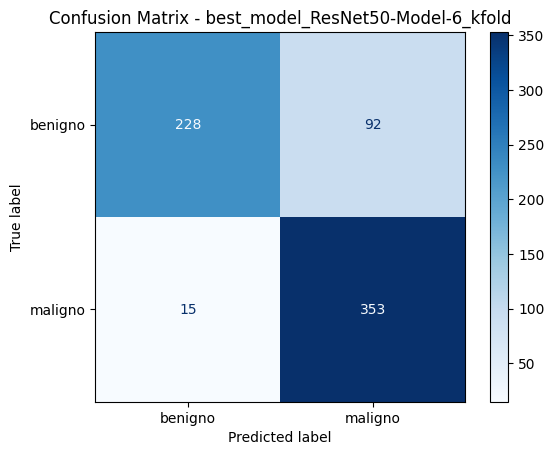

Classification Report - best_model_ResNet50-Model-6_kfold
              precision    recall  f1-score   support

     benigno       0.94      0.71      0.81       320
     maligno       0.79      0.96      0.87       368

    accuracy                           0.84       688
   macro avg       0.87      0.84      0.84       688
weighted avg       0.86      0.84      0.84       688


Evaluating model: best_model_InceptionV3-Model-4_kfold
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 679ms/step
Best Threshold for best_model_InceptionV3-Model-4_kfold: 0.66 with F1 Score: 0.8529


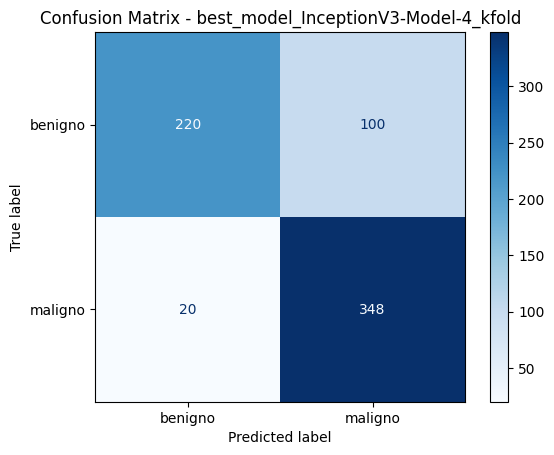

Classification Report - best_model_InceptionV3-Model-4_kfold
              precision    recall  f1-score   support

     benigno       0.92      0.69      0.79       320
     maligno       0.78      0.95      0.85       368

    accuracy                           0.83       688
   macro avg       0.85      0.82      0.82       688
weighted avg       0.84      0.83      0.82       688


Model Performance Summary:
best_model_ResNet50-Model-6_kfold:
  - Accuracy: 0.8445
  - F1 Score: 0.8684
  - Precision: 0.7933
  - Recall: 0.9592
  - Best Threshold: 0.74
--------------------------------------------------
best_model_InceptionV3-Model-4_kfold:
  - Accuracy: 0.8256
  - F1 Score: 0.8529
  - Precision: 0.7768
  - Recall: 0.9457
  - Best Threshold: 0.66
--------------------------------------------------


In [ ]:
import os
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
import seaborn as sns
import json

@tf.keras.utils.register_keras_serializable()
def scaled_tanh(x):
    return (tf.tanh(x) + 1) / 2

# Paths to dataset
test_dir = '1_dataset/test'

# ImageDataGenerator setup
batch_size = 32
img_height = 224
img_width = 224

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Identify saved models in the current directory
model_files = [f for f in os.listdir('.') if f.endswith(".keras")]
results = {}

def evaluate_model(model_path, test_generator):
    model_name = os.path.basename(model_path).replace(".keras", "")
    print(f"\nEvaluating model: {model_name}")
    model = load_model(model_path, custom_objects={'F1Score': F1Score, 'scaled_tanh': scaled_tanh})

    # Predict on test set
    y_pred_prob = model.predict(test_generator).flatten()
    y_true = test_generator.classes

    # Determine Best Threshold for F1-Score
    thresholds = np.linspace(0, 1, 100)
    best_threshold = 0.5
    best_f1 = 0

    for threshold in thresholds:
        y_pred_temp = (y_pred_prob >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred_temp)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    print(f"Best Threshold for {model_name}: {best_threshold:.2f} with F1 Score: {best_f1:.4f}")

    # Predict with best threshold
    y_pred = (y_pred_prob >= best_threshold).astype(int)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # Classification Report
    print(f"Classification Report - {model_name}")
    print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

    # Save metrics
    accuracy = np.mean(y_pred == y_true)
    results[model_name] = {
        "accuracy": accuracy,
        "f1_score": best_f1,
        "precision": precision_score(y_true, y_pred),
        "recall": recall_score(y_true, y_pred),
        "best_threshold": best_threshold
    }
    return model_name, results[model_name]


# Evaluate all models in the current directory
for model_file in model_files:
    evaluate_model(model_file, test_generator)

print("\nModel Performance Summary:")
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  - Accuracy: {metrics['accuracy']:.4f}")
    print(f"  - F1 Score: {metrics['f1_score']:.4f}")
    print(f"  - Precision: {metrics['precision']:.4f}")
    print(f"  - Recall: {metrics['recall']:.4f}")
    print(f"  - Best Threshold: {metrics['best_threshold']:.2f}")
    print("-" * 50)

In [ ]:
from google.colab import files
import glob

# Buscar todos los archivos que terminan en .keras
keras_files = glob.glob("*.keras")

# Descargar cada archivo encontrado
for file in keras_files:
    print(f"Descargando: {file}")
    files.download(file)


Descargando: best_model_ResNet50-Model-6_kfold.keras


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: best_model_InceptionV3-Model-4_kfold.keras


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## InceptionV3

In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import clone_model, Model, Sequential
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Layer, Softmax, GlobalAveragePooling2D, Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Activation, Concatenate, Multiply, Add, AveragePooling2D, Reshape, GlobalMaxPooling2D, Lambda, MultiHeadAttention, LayerNormalization, GlobalAveragePooling1D
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2
import os
import gc

# Function to clear memory
def clear_memory():
    tf.keras.backend.clear_session()  # Limpia los gráficos y el backend
    gc.collect()  # Recolector de basura de Python
    print("Sesión de TensorFlow reiniciada y memoria liberada...")

@tf.keras.utils.register_keras_serializable()
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', dtype=tf.float32, **kwargs):
        super(F1Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
        return f1

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

def create_model_1(base_model):
    base_model.trainable = True

    average_pooling = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    max_pooling = tf.keras.layers.GlobalMaxPooling2D()(base_model.output)
    concatenated = tf.keras.layers.Concatenate()([average_pooling, max_pooling])

    dense_1_layer = Dense(128, activation='relu', kernel_regularizer=l2(1e-4))(concatenated)
    dropout_1_layer = tf.keras.layers.Dropout(0.4)(dense_1_layer)

    prediction_layer = tf.keras.layers.Dense(
        1, activation='sigmoid', kernel_regularizer=l2(1e-6)
    )(dropout_1_layer)

    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.000087),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

def create_model_2(base_model):
    base_model.trainable = True

    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

    dense_1_layer = Dense(2048, activation='relu', kernel_regularizer=l2(1e-2))(global_average_layer)
    skip_connection = tf.keras.layers.Add()([global_average_layer, dense_1_layer])

    dense_2_layer = Dense(1024, activation='relu', kernel_regularizer=l2(1e-2))(skip_connection)
    dropout_layer = tf.keras.layers.Dropout(0.4)(dense_2_layer)

    prediction_layer = tf.keras.layers.Dense(
        1, activation='sigmoid', kernel_regularizer=l2(1e-4)
    )(dropout_layer)

    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.000087),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

def create_model_3(base_model): # REGALON jeje
    base_model.trainable = True

    # Global Average Pooling
    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

    dense_1_layer = Dense(2, kernel_regularizer=l2(1e-4))(global_average_layer)
    batch_normalization_1_layer = tf.keras.layers.BatchNormalization()(dense_1_layer)
    activation_1_layer = tf.keras.layers.Activation('relu')(batch_normalization_1_layer)
    dropout_1_layer = tf.keras.layers.Dropout(0.3)(activation_1_layer)

    # Capa densa con regularización L2
    prediction_layer = tf.keras.layers.Dense(
        1,
        activation='sigmoid',
        kernel_regularizer=l2(1e-6)
    )(dropout_1_layer)

    # Creación del modelo
    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)

    # Compilación del modelo con F1-Score
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0000087),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

def create_model_4(base_model):
    base_model.trainable = True

    # Crear el modelo base 2 como capas adicionales
    base_model_2 = tf.keras.applications.ResNet50(input_shape=(224, 224, 3), include_top=False, weights="imagenet")
    base_model_2.trainable = True

    # Procesar la entrada a través de ambos modelos base
    inception_output = base_model(base_model.input)
    resnet_output = base_model_2(base_model.input)

    # Global Average Pooling
    inception_output = tf.keras.layers.GlobalAveragePooling2D()(inception_output)
    resnet_output = tf.keras.layers.GlobalAveragePooling2D()(resnet_output)

    # Fusionar las características extraídas
    concatenated = tf.keras.layers.Concatenate()([inception_output, resnet_output])

    # Capa totalmente conectada con regularización
    dense_1_layer = Dense(4096, activation='relu', kernel_regularizer=l2(1e-2))(concatenated)
    dense_2_layer = Dense(1024, activation='relu', kernel_regularizer=l2(1e-2))(dense_1_layer)
    dropout_layer = tf.keras.layers.Dropout(0.4)(dense_2_layer)

    # Capa de predicción
    prediction_layer = tf.keras.layers.Dense(
        1, activation='sigmoid', kernel_regularizer=l2(1e-4)
    )(dropout_layer)

    # Crear el modelo
    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=5e-4, momentum=0.9, nesterov=True),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

def create_model_5(base_model):
    def cbam_block(input_tensor, ratio=8):
        channel_axis = -1
        filters = input_tensor.shape[channel_axis]

        # Channel Attention
        avg_pool = GlobalAveragePooling2D()(input_tensor)
        avg_pool = Reshape((1, 1, filters))(avg_pool)
        max_pool = GlobalMaxPooling2D()(input_tensor)
        max_pool = Reshape((1, 1, filters))(max_pool)

        dense1 = Dense(filters // ratio, activation='relu', use_bias=False)
        dense2 = Dense(filters, activation='sigmoid', use_bias=False)

        avg_out = dense2(dense1(avg_pool))
        max_out = dense2(dense1(max_pool))

        channel_attention = Add()([avg_out, max_out])
        channel_attention = Activation('sigmoid')(channel_attention)
        input_tensor = Multiply()([input_tensor, channel_attention])

        # Spatial Attention
        avg_pool_spatial = Lambda(lambda x: tf.reduce_mean(x, axis=-1, keepdims=True))(input_tensor)
        max_pool_spatial = Lambda(lambda x: tf.reduce_max(x, axis=-1, keepdims=True))(input_tensor)
        concat = Concatenate(axis=-1)([avg_pool_spatial, max_pool_spatial])

        spatial_attention = Conv2D(1, kernel_size=7, padding='same', activation='sigmoid')(concat)
        return Multiply()([input_tensor, spatial_attention])

    base_model.trainable = True

    # CBAM Block
    cbam_output = cbam_block(base_model.output)

    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(cbam_output)
    dense_1_layer = Dense(2048, activation='relu', kernel_regularizer=l2(1e-2))(global_average_layer)
    skip_connection = tf.keras.layers.Add()([global_average_layer, dense_1_layer])

    dense_2_layer = Dense(1024, activation='relu', kernel_regularizer=l2(1e-2))(skip_connection)
    dropout_layer = tf.keras.layers.Dropout(0.4)(dense_2_layer)

    prediction_layer = tf.keras.layers.Dense(
        1, activation='sigmoid', kernel_regularizer=l2(1e-4)
    )(dropout_layer)

    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.000087),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

@tf.keras.utils.register_keras_serializable()
class SelfAttentionBlock(Layer):
    def __init__(self, output_dim, **kwargs):
        super(SelfAttentionBlock, self).__init__(**kwargs)
        self.output_dim = output_dim
        self.query_dense = Dense(output_dim, activation=None)
        self.key_dense = Dense(output_dim, activation=None)
        self.value_dense = Dense(output_dim, activation=None)
        self.softmax = Softmax()

    def call(self, inputs):
        # Compute query, key, and value
        query = self.query_dense(inputs)
        key = self.key_dense(inputs)
        value = self.value_dense(inputs)

        # Compute attention scores
        attention_scores = tf.matmul(query, key, transpose_b=True)
        attention_scores = self.softmax(attention_scores)

        # Compute attention output
        attention_output = tf.matmul(attention_scores, value)

        # Residual connection
        return Add()([inputs, attention_output])

    def get_config(self):
        config = super(SelfAttentionBlock, self).get_config()
        config.update({"output_dim": self.output_dim})
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)


def create_model_6(base_model):
    base_model.trainable = True

    # Reshape output of the base model to match self-attention block
    reshaped_output = tf.keras.layers.Reshape(
        (-1, base_model.output.shape[-1])
    )(base_model.output)

    # Apply the self-attention block
    sa_block = SelfAttentionBlock(output_dim=reshaped_output.shape[-1])
    sa_output = sa_block(reshaped_output)

    # Global average pooling
    global_average_layer = tf.keras.layers.GlobalAveragePooling1D()(sa_output)

    # Dense and skip connection layers
    dense_1_layer = Dense(2048, activation='relu', kernel_regularizer=l2(1e-2))(global_average_layer)
    skip_connection = tf.keras.layers.Add()([global_average_layer, dense_1_layer])

    dense_2_layer = Dense(1024, activation='relu', kernel_regularizer=l2(1e-2))(skip_connection)
    dropout_layer = tf.keras.layers.Dropout(0.4)(dense_2_layer)

    # Output layer
    prediction_layer = tf.keras.layers.Dense(
        1, activation='sigmoid', kernel_regularizer=l2(1e-4)
    )(dropout_layer)

    # Compile model
    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.000087),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

Found 7738 images belonging to 2 classes.
Found 1081 images belonging to 2 classes.
Convirtiendo datos de generadores a matrices...


Iniciando Cross-Validation para InceptionV3-Model-4...

Entrenando Fold 1/6 para InceptionV3-Model-4...
Memoria liberada.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Epoch 1/75
919/919 ━━━━━━━━━━━━━━━━━━━━ 256s 163ms/step - AUC: 0.7654 - Precision: 0.7001 - Recall: 0.7548 - accuracy: 0.6973 - f1_score: 0.5521 - loss: 55.4619 - val_AUC: 0.8765 - val_Precision: 0.8205 - val_Recall: 0.7667 - val_accuracy: 0.7918 - val_f1_score: 0.5460 - val_loss: 48.2438 - learning_rate: 5.0000e-04
Epoch 2/75
919/919 ━━━━━━━━━━━━━━━━━━━━ 70s 76ms/step - AUC: 0.9192 - Precision: 0.8284 - Recall: 0.8731 - accuracy: 0.8363 - f1_score: 0.5616 - loss: 46.0404 - val_AUC: 0.9170 - val_Precision: 0.7866 - val_Recall: 0.9371 - val_accuracy: 0.8354 - val_f1_score: 0.6063 - val_loss: 40.1440 - learning_rate: 5.0000e-04
Epoch 3/

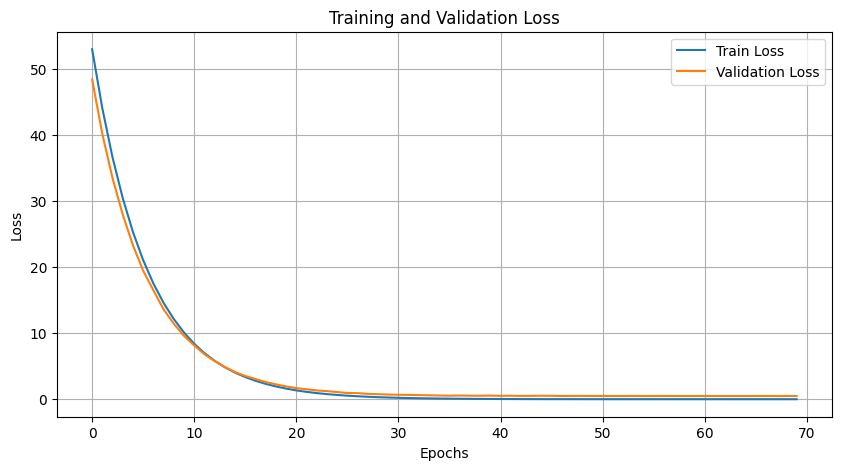

46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step


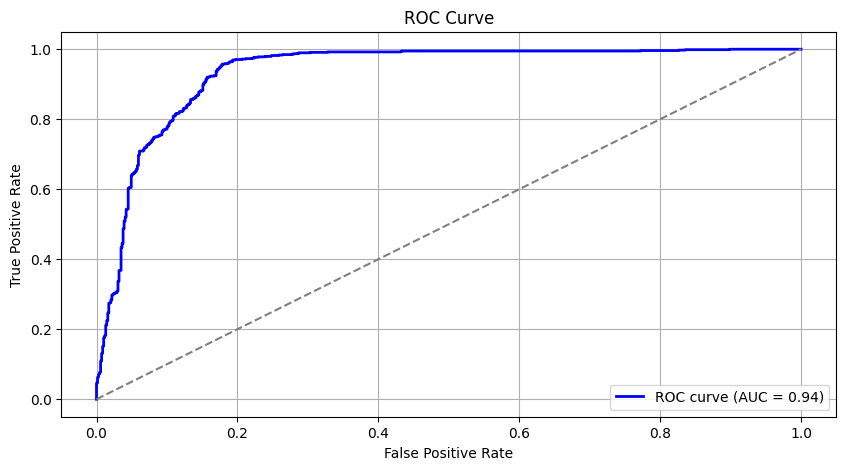

Memoria liberada.

Resultados finales:
InceptionV3-Model-4: F1 Score Promedio = 0.8799


In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import clone_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import f1_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, Xception, InceptionV3, EfficientNetB3, EfficientNetB1
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import gc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import os
import shutil
import json
import pandas as pd
from tensorflow.keras import mixed_precision
from tensorflow.keras.layers import *
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Paths to dataset
train_dir = '1_dataset/train'
validation_dir = '1_dataset/valid'

# Configuración
k_folds = 6
batch_size = 8
img_height = 224
img_width = 224
epochs = 75

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

# Función para liberar memoria
def clear_memory():
    tf.keras.backend.clear_session()
    gc.collect()
    print("Memoria liberada.")

# Convertir datos de generadores a matrices
def generator_to_array(generator):
    data, labels = [], []
    for i in range(len(generator)):
        images, lbls = generator[i]
        data.extend(images)
        labels.extend(lbls)
    return np.array(data), np.array(labels)

# Convertir datos
print("Convirtiendo datos de generadores a matrices...")
X_train, y_train = generator_to_array(train_generator)
X_valid, y_valid = generator_to_array(valid_generator)

# Combinar train y valid
X_data = np.concatenate([X_train, X_valid])
y_data = np.concatenate([y_train, y_valid])

# Configuración de arquitecturas
model_configs = [
    #("InceptionV3-Model-1", InceptionV3, create_model_1),
    #("InceptionV3-Model-2", InceptionV3, create_model_2),
    #("InceptionV3-Model-3", InceptionV3, create_model_3),
    ("InceptionV3-Model-4", InceptionV3, create_model_4),
    #("InceptionV3-Model-5", InceptionV3, create_model_5),
    #("InceptionV3-Model-6", InceptionV3, create_model_6)
]

def find_best_threshold(y_true, y_pred_probs):
    thresholds = np.linspace(0, 1, 101)  # Probar thresholds de 0.00 a 1.00
    best_threshold = 0.5
    best_f1 = 0  # Inicializamos con el peor F1 posible

    for threshold in thresholds:
        y_pred = (y_pred_probs >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred)  # Usa F1 como criterio para seleccionar threshold
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    return best_threshold, best_f1

# Gráficos para val_loss y AUC-ROC del mejor modelo
def plot_model_performance(history, model, X_val, y_val):
    # Gráfico de val_loss
    plt.figure(figsize=(10, 5))
    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()

    # AUC-ROC
    y_pred_probs = model.predict(X_val).flatten()
    fpr, tpr, _ = roc_curve(y_val, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Función para entrenar en cada fold
def train_on_fold(model_fn, base_model_fn, fold, fold_idx, model_name):
    print(f"\nEntrenando Fold {fold_idx + 1}/{k_folds} para {model_name}...")
    clear_memory()
    train_idx, val_idx = fold
    X_train_fold, y_train_fold = X_data[train_idx], y_data[train_idx]
    X_val_fold, y_val_fold = X_data[val_idx], y_data[val_idx]

    # Crear modelo
    if base_model_fn:
        base_model = base_model_fn(input_shape=(img_height, img_width, 3), include_top=False, weights="imagenet")
        model = model_fn(base_model)
    else:
        model = model_fn(input_shape=(img_height, img_width, 3))

    # Entrenar
    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[
            EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1),
            ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7, verbose=1)
        ],
        verbose=1
    )

    # Evaluar en el conjunto de validación
    y_val_pred_probs = model.predict(X_val_fold).flatten()  # Probabilidades de predicción
    best_threshold, best_f1 = find_best_threshold(y_val_fold, y_val_pred_probs)  # Buscar el mejor threshold
    y_val_pred = (y_val_pred_probs >= best_threshold).astype(int)

    # Calcular accuracy con el mejor threshold
    accuracy = accuracy_score(y_val_fold, y_val_pred)
    print(f"Fold {fold_idx + 1} - Best Threshold: {best_threshold:.2f} - F1 Score: {best_f1:.4f} - Accuracy Score: {accuracy:.4f}")

    return accuracy, model, history

# Entrenamiento y evaluación con K-Fold Cross-Validation
results = {}
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

for model_name, base_model_fn, model_fn in model_configs:
    print(f"\n\nIniciando Cross-Validation para {model_name}...")
    fold_scores = []
    best_fold_model = None
    best_accuracy_score = 0
    best_history = None
    best_val = None

    for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X_data)):
        accuracy, model, history = train_on_fold(model_fn, base_model_fn, (train_idx, val_idx), fold_idx, model_name)
        fold_scores.append(accuracy)

        # Guardar el mejor modelo del fold
        if accuracy > best_accuracy_score:
            best_accuracy_score = accuracy
            best_fold_model = model  # No clones el modelo, usa el mismo directamente
            best_history = history.history  # Guarda el historial del modelo
            best_val = (X_data[val_idx], y_data[val_idx])

    # Guardar resultados
    avg_accuracy = np.mean(fold_scores)
    results[model_name] = avg_accuracy
    print(f"\n{model_name} - accuracy Score Promedio: {avg_accuracy:.4f}")

    # Guardar el mejor modelo
    best_fold_model.save(f"best_model_{model_name}_kfold.keras")
    print(f"Mejor modelo para {model_name} guardado como 'best_model_{model_name}_kfold.keras'.")

    # Gráficos para val_loss y AUC-ROC
    if best_history and best_val:
        plot_model_performance(best_history, best_fold_model, *best_val)

    # Liberar memoria
    clear_memory()

# Mostrar resultados finales
print("\nResultados finales:")
for model_name, avg_f1 in results.items():
    print(f"{model_name}: F1 Score Promedio = {avg_f1:.4f}")

Found 688 images belonging to 2 classes.

Evaluating model: best_model_InceptionV3-Model-4_kfold


Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.


22/22 ━━━━━━━━━━━━━━━━━━━━ 24s 732ms/step
Best Threshold for best_model_InceptionV3-Model-4_kfold: 0.35 with F1 Score: 0.8683


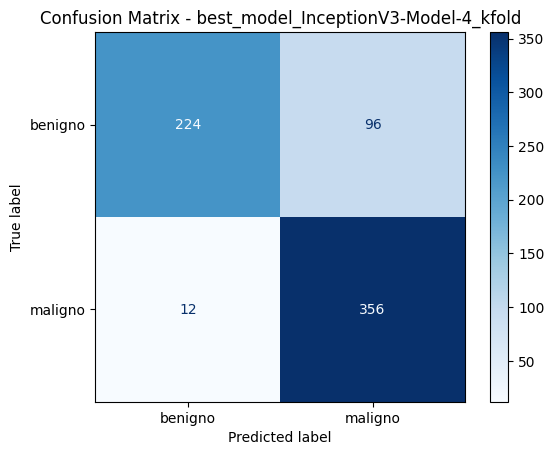

Classification Report - best_model_InceptionV3-Model-4_kfold
              precision    recall  f1-score   support

     benigno       0.95      0.70      0.81       320
     maligno       0.79      0.97      0.87       368

    accuracy                           0.84       688
   macro avg       0.87      0.83      0.84       688
weighted avg       0.86      0.84      0.84       688


Model Performance Summary:
best_model_InceptionV3-Model-4_kfold:
  - Accuracy: 0.8430
  - F1 Score: 0.8683
  - Precision: 0.7876
  - Recall: 0.9674
  - Best Threshold: 0.35
--------------------------------------------------


In [ ]:
import os
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
import seaborn as sns
import json


# Paths to dataset
test_dir = '1_dataset/test'

# ImageDataGenerator setup
batch_size = 32
img_height = 224
img_width = 224

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Identify saved models in the current directory
model_files = [f for f in os.listdir('.') if f.endswith(".keras")]
results = {}

@tf.keras.utils.register_keras_serializable()
def scaled_tanh(x):
    return (tf.tanh(x) + 1) / 2

def evaluate_model(model_path, test_generator):
    model_name = os.path.basename(model_path).replace(".keras", "")
    print(f"\nEvaluating model: {model_name}")
    model = load_model(model_path, custom_objects={'F1Score': F1Score, 'scaled_tanh': scaled_tanh})

    # Predict on test set
    y_pred_prob = model.predict(test_generator).flatten()
    y_true = test_generator.classes

    # Determine Best Threshold for F1-Score
    thresholds = np.linspace(0, 1, 100)
    best_threshold = 0.5
    best_f1 = 0

    for threshold in thresholds:
        y_pred_temp = (y_pred_prob >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred_temp)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    print(f"Best Threshold for {model_name}: {best_threshold:.2f} with F1 Score: {best_f1:.4f}")

    # Predict with best threshold
    y_pred = (y_pred_prob >= best_threshold).astype(int)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # Classification Report
    print(f"Classification Report - {model_name}")
    print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

    # Save metrics
    accuracy = np.mean(y_pred == y_true)
    results[model_name] = {
        "accuracy": accuracy,
        "f1_score": best_f1,
        "precision": precision_score(y_true, y_pred),
        "recall": recall_score(y_true, y_pred),
        "best_threshold": best_threshold
    }
    return model_name, results[model_name]


# Evaluate all models in the current directory
for model_file in model_files:
    evaluate_model(model_file, test_generator)

print("\nModel Performance Summary:")
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  - Accuracy: {metrics['accuracy']:.4f}")
    print(f"  - F1 Score: {metrics['f1_score']:.4f}")
    print(f"  - Precision: {metrics['precision']:.4f}")
    print(f"  - Recall: {metrics['recall']:.4f}")
    print(f"  - Best Threshold: {metrics['best_threshold']:.2f}")
    print("-" * 50)

In [ ]:
from google.colab import files
import glob

# Buscar todos los archivos que terminan en .keras
keras_files = glob.glob("best_model_InceptionV3*_kfold.keras")

# Descargar cada archivo encontrado
for file in keras_files:
    print(f"Descargando: {file}")
    files.download(file)


Descargando: best_model_InceptionV3-Model-4_kfold.keras


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Xception

In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import clone_model
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, Xception, InceptionV3
from tensorflow.keras.layers import Multiply, GlobalAveragePooling2D, Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Activation, Add, Concatenate, GlobalMaxPooling2D, AveragePooling2D, Activation, Layer, Lambda, MultiHeadAttention, LayerNormalization

# Function to clear memory
def clear_memory():
    tf.keras.backend.clear_session()  # Limpia los gráficos y el backend
    gc.collect()  # Recolector de basura de Python
    print("Sesión de TensorFlow reiniciada y memoria liberada...")

@tf.keras.utils.register_keras_serializable()
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', dtype=tf.float32, **kwargs):
        super(F1Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
        return f1

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

# ------------------------------------------ MODELO 3 ------------------------------------------ #
def create_model_3(base_model):
    base_model.trainable = True

    # Ajustar convoluciones y Dropout
    conv_layer = Conv2D(128, (3, 3), activation="relu", padding="same")(base_model.output)
    batch_norm = BatchNormalization()(conv_layer)
    max_pool = MaxPooling2D((2, 2))(batch_norm)
    dropout = Dropout(0.4)(max_pool)

    # Mantener la representación con información espacial
    attention_output = MultiHeadAttention(num_heads=4, key_dim=128)(
        dropout, dropout
    )
    attention_output = LayerNormalization()(attention_output)

    # Aplicar Global Average Pooling después de la atención
    global_avg_pool = GlobalAveragePooling2D()(attention_output)

    # Capas densas finales
    dense_1 = Dense(64, kernel_regularizer=l2(1e-2))(global_avg_pool)
    batch_norm_1 = BatchNormalization()(dense_1)
    activation_1 = Activation('relu')(batch_norm_1)
    dropout_1 = Dropout(0.5)(activation_1)

    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-2))(dropout_1)

    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=5e-4, momentum=0.9, nesterov=True),
        #.Adam(learning_rate=5e-5)
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

Found 7738 images belonging to 2 classes.
Found 1081 images belonging to 2 classes.
Convirtiendo datos de generadores a matrices...


Iniciando Cross-Validation para Xception-Model-3...

Entrenando Fold 1/7 para Xception-Model-3...
Memoria liberada.
Epoch 1/100
945/945 ━━━━━━━━━━━━━━━━━━━━ 133s 94ms/step - AUC: 0.7244 - Precision: 0.6897 - Recall: 0.6673 - accuracy: 0.6697 - f1_score: 0.5128 - loss: 1.4898 - val_AUC: 0.8721 - val_Precision: 0.7849 - val_Recall: 0.8541 - val_accuracy: 0.8016 - val_f1_score: 0.5789 - val_loss: 1.1541 - learning_rate: 5.0000e-04
Epoch 2/100
945/945 ━━━━━━━━━━━━━━━━━━━━ 50s 53ms/step - AUC: 0.8735 - Precision: 0.7959 - Recall: 0.8502 - accuracy: 0.8043 - f1_score: 0.5559 - loss: 1.1261 - val_AUC: 0.9006 - val_Precision: 0.8039 - val_Recall: 0.8845 - val_accuracy: 0.8270 - val_f1_score: 0.5861 - val_loss: 0.9769 - learning_rate: 5.0000e-04
Epoch 3/100
945/945 ━━━━━━━━━━━━━━━━━━━━ 50s 52ms/step - AUC: 0.9130 - Precision: 0.8361 - Recall: 0.8757 - accuracy: 0

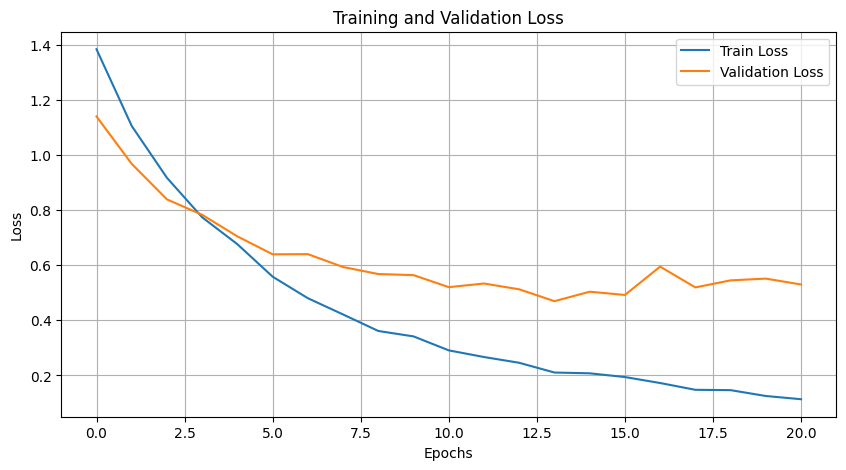

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step


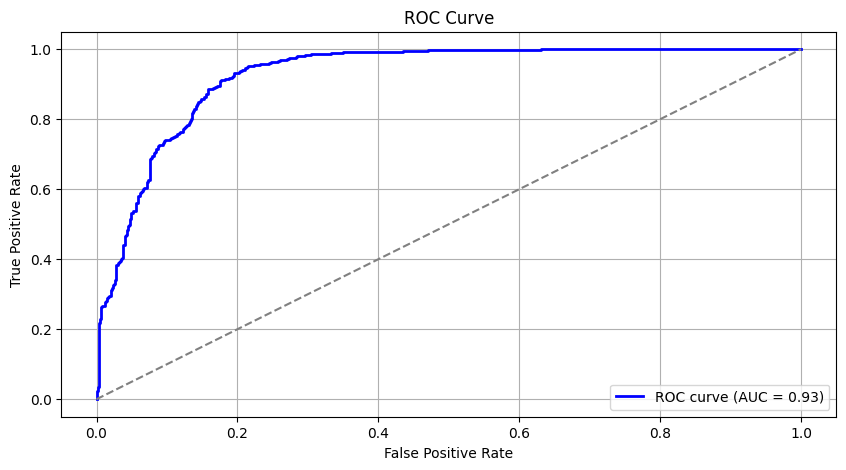

Memoria liberada.

Resultados finales:
Xception-Model-3: F1 Score Promedio = 0.8571


In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import clone_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
from sklearn.metrics import f1_score, accuracy_score
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, Xception, InceptionV3, EfficientNetB3, EfficientNetB1
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import gc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import os
import shutil
import json
import pandas as pd
from tensorflow.keras import mixed_precision
from tensorflow.keras.layers import *
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Paths to dataset
train_dir = '1_dataset/train'
validation_dir = '1_dataset/valid'

# Configuración
k_folds = 7
batch_size = 8
img_height = 224
img_width = 224
epochs = 100

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

# Función para liberar memoria
def clear_memory():
    tf.keras.backend.clear_session()
    gc.collect()
    print("Memoria liberada.")

# Convertir datos de generadores a matrices
def generator_to_array(generator):
    data, labels = [], []
    for i in range(len(generator)):
        images, lbls = generator[i]
        data.extend(images)
        labels.extend(lbls)
    return np.array(data), np.array(labels)

# Convertir datos
print("Convirtiendo datos de generadores a matrices...")
X_train, y_train = generator_to_array(train_generator)
X_valid, y_valid = generator_to_array(valid_generator)

# Combinar train y valid
X_data = np.concatenate([X_train, X_valid])
y_data = np.concatenate([y_train, y_valid])

# Configuración de arquitecturas
model_configs = [
    ("Xception-Model-3", Xception, create_model_3),
]


def find_best_threshold(y_true, y_pred_probs):
    thresholds = np.linspace(0, 1, 101)  # Probar thresholds de 0.00 a 1.00
    best_threshold = 0.5
    best_f1 = 0  # Inicializamos con el peor F1 posible

    for threshold in thresholds:
        y_pred = (y_pred_probs >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred)  # Usa F1 como criterio para seleccionar threshold
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    return best_threshold, best_f1

# Gráficos para val_loss y AUC-ROC del mejor modelo
def plot_model_performance(history, model, X_val, y_val):
    # Gráfico de val_loss
    plt.figure(figsize=(10, 5))
    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()

    # AUC-ROC
    y_pred_probs = model.predict(X_val).flatten()
    fpr, tpr, _ = roc_curve(y_val, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Función para entrenar en cada fold
def train_on_fold(model_fn, base_model_fn, fold, fold_idx, model_name):
    print(f"\nEntrenando Fold {fold_idx + 1}/{k_folds} para {model_name}...")
    clear_memory()
    train_idx, val_idx = fold
    X_train_fold, y_train_fold = X_data[train_idx], y_data[train_idx]
    X_val_fold, y_val_fold = X_data[val_idx], y_data[val_idx]

    # Crear modelo
    if base_model_fn:
        base_model = base_model_fn(input_shape=(img_height, img_width, 3), include_top=False, weights="imagenet")
        model = model_fn(base_model)
    else:
        model = model_fn(input_shape=(img_height, img_width, 3))

    # Entrenar
    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[
            EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1),
            ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7, verbose=1)
        ],
        verbose=1
    )

    # Evaluar en el conjunto de validación
    y_val_pred_probs = model.predict(X_val_fold).flatten()  # Probabilidades de predicción
    best_threshold, best_f1 = find_best_threshold(y_val_fold, y_val_pred_probs)  # Buscar el mejor threshold
    y_val_pred = (y_val_pred_probs >= best_threshold).astype(int)

    # Calcular accuracy con el mejor threshold
    accuracy = accuracy_score(y_val_fold, y_val_pred)
    print(f"Fold {fold_idx + 1} - Best Threshold: {best_threshold:.2f} - F1 Score: {best_f1:.4f} - Accuracy Score: {accuracy:.4f}")

    return accuracy, model, history

# Entrenamiento y evaluación con K-Fold Cross-Validation
results = {}
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

for model_name, base_model_fn, model_fn in model_configs:
    print(f"\n\nIniciando Cross-Validation para {model_name}...")
    fold_scores = []
    best_fold_model = None
    best_accuracy_score = 0
    best_history = None
    best_val = None

    for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X_data)):
        accuracy, model, history = train_on_fold(model_fn, base_model_fn, (train_idx, val_idx), fold_idx, model_name)
        fold_scores.append(accuracy)

        # Guardar el mejor modelo del fold
        if accuracy > best_accuracy_score:
            best_accuracy_score = accuracy
            best_fold_model = model  # No clones el modelo, usa el mismo directamente
            best_history = history.history  # Guarda el historial del modelo
            best_val = (X_data[val_idx], y_data[val_idx])

    # Guardar resultados
    avg_accuracy = np.mean(fold_scores)
    results[model_name] = avg_accuracy
    print(f"\n{model_name} - accuracy Score Promedio: {avg_accuracy:.4f}")

    # Guardar el mejor modelo
    best_fold_model.save(f"best_model_{model_name}_kfold.keras")
    print(f"Mejor modelo para {model_name} guardado como 'best_model_{model_name}_kfold.keras'.")

    # Gráficos para val_loss y AUC-ROC
    if best_history and best_val:
        plot_model_performance(best_history, best_fold_model, *best_val)

    # Liberar memoria
    clear_memory()

# Mostrar resultados finales
print("\nResultados finales:")
for model_name, avg_f1 in results.items():
    print(f"{model_name}: F1 Score Promedio = {avg_f1:.4f}")

Found 688 images belonging to 2 classes.

Evaluating model: best_model_Xception-Model-3_kfold


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 13s 475ms/step
Best Threshold for best_model_Xception-Model-3_kfold: 0.26 with F1 Score: 0.8637


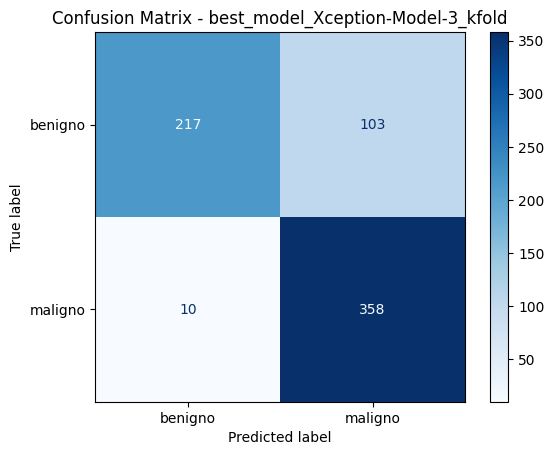

Classification Report - best_model_Xception-Model-3_kfold
              precision    recall  f1-score   support

     benigno       0.96      0.68      0.79       320
     maligno       0.78      0.97      0.86       368

    accuracy                           0.84       688
   macro avg       0.87      0.83      0.83       688
weighted avg       0.86      0.84      0.83       688


Evaluating model: best_model_InceptionV3-Model-4_kfold
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 723ms/step
Best Threshold for best_model_InceptionV3-Model-4_kfold: 0.35 with F1 Score: 0.8683


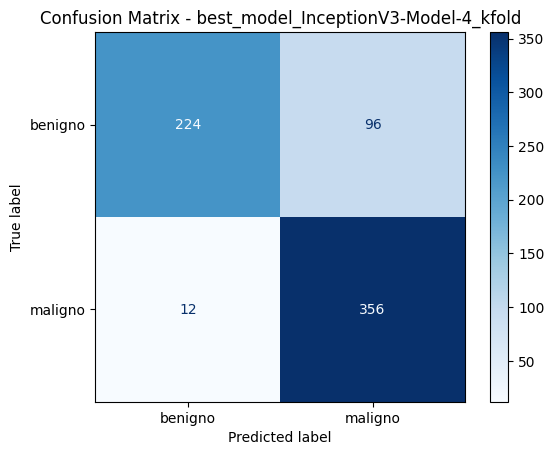

Classification Report - best_model_InceptionV3-Model-4_kfold
              precision    recall  f1-score   support

     benigno       0.95      0.70      0.81       320
     maligno       0.79      0.97      0.87       368

    accuracy                           0.84       688
   macro avg       0.87      0.83      0.84       688
weighted avg       0.86      0.84      0.84       688


Model Performance Summary:
best_model_Xception-Model-3_kfold:
  - Accuracy: 0.8358
  - F1 Score: 0.8637
  - Precision: 0.7766
  - Recall: 0.9728
  - Best Threshold: 0.26
--------------------------------------------------
best_model_InceptionV3-Model-4_kfold:
  - Accuracy: 0.8430
  - F1 Score: 0.8683
  - Precision: 0.7876
  - Recall: 0.9674
  - Best Threshold: 0.35
--------------------------------------------------


In [ ]:
import os
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
import seaborn as sns
import json


# Paths to dataset
test_dir = '1_dataset/test'

# ImageDataGenerator setup
batch_size = 32
img_height = 224
img_width = 224

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

@tf.keras.utils.register_keras_serializable()
def scaled_tanh(x):
    return (tf.tanh(x) + 1) / 2

# Identify saved models in the current directory
model_files = [f for f in os.listdir('.') if f.endswith(".keras")]
results = {}

def evaluate_model(model_path, test_generator):
    model_name = os.path.basename(model_path).replace(".keras", "")
    print(f"\nEvaluating model: {model_name}")
    model = load_model(model_path, custom_objects={'F1Score': F1Score, 'scaled_tanh': scaled_tanh})

    # Predict on test set
    y_pred_prob = model.predict(test_generator).flatten()
    y_true = test_generator.classes

    # Determine Best Threshold for F1-Score
    thresholds = np.linspace(0, 1, 100)
    best_threshold = 0.5
    best_f1 = 0

    for threshold in thresholds:
        y_pred_temp = (y_pred_prob >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred_temp)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    print(f"Best Threshold for {model_name}: {best_threshold:.2f} with F1 Score: {best_f1:.4f}")

    # Predict with best threshold
    y_pred = (y_pred_prob >= best_threshold).astype(int)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # Classification Report
    print(f"Classification Report - {model_name}")
    print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

    # Save metrics
    accuracy = np.mean(y_pred == y_true)
    results[model_name] = {
        "accuracy": accuracy,
        "f1_score": best_f1,
        "precision": precision_score(y_true, y_pred),
        "recall": recall_score(y_true, y_pred),
        "best_threshold": best_threshold
    }
    return model_name, results[model_name]


# Evaluate all models in the current directory
for model_file in model_files:
    evaluate_model(model_file, test_generator)

print("\nModel Performance Summary:")
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  - Accuracy: {metrics['accuracy']:.4f}")
    print(f"  - F1 Score: {metrics['f1_score']:.4f}")
    print(f"  - Precision: {metrics['precision']:.4f}")
    print(f"  - Recall: {metrics['recall']:.4f}")
    print(f"  - Best Threshold: {metrics['best_threshold']:.2f}")
    print("-" * 50)

In [ ]:
from google.colab import files
import glob

# Buscar todos los archivos que terminan en .keras
keras_files = glob.glob("*.keras")

# Descargar cada archivo encontrado
for file in keras_files:
    print(f"Descargando: {file}")
    files.download(file)


## MobilenetV2

In [ ]:
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras.layers import Layer, GlobalAveragePooling2D, GlobalMaxPooling2D, Dense, Multiply, Concatenate, Conv2D, Add

@tf.keras.utils.register_keras_serializable()
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', dtype=tf.float32, **kwargs):
        super(F1Score, self).__init__(name=name, dtype=dtype, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros', dtype=dtype)
        self.fp = self.add_weight(name='false_positives', initializer='zeros', dtype=dtype)
        self.fn = self.add_weight(name='false_negatives', initializer='zeros', dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, self.dtype)
        y_pred = tf.cast(tf.round(y_pred), self.dtype)

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
        return f1

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

# ------------------------------------------ MODELO 1 ------------------------------------------ #
def create_model_1(base_model): # Favorito jeje
    base_model.trainable = True

    # Global Average Pooling
    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

    dense_1_layer = Dense(6, kernel_regularizer=l2(1e-4))(global_average_layer)
    batch_normalization_1_layer = tf.keras.layers.BatchNormalization()(dense_1_layer)
    activation_1_layer = tf.keras.layers.Activation('relu')(batch_normalization_1_layer)
    dropout_1_layer = tf.keras.layers.Dropout(0.15)(activation_1_layer)

    # Capa densa con regularización L2
    prediction_layer = tf.keras.layers.Dense(
        1,
        activation='sigmoid',
        kernel_regularizer=l2(1e-4)
    )(dropout_1_layer)

    # Creación del modelo
    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)

    # Compilación del modelo con F1-Score
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0000087),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------ MODELO 3 ------------------------------------------ #
# Reemplazo de avg_pool_spatial y max_pool_spatial
@tf.keras.utils.register_keras_serializable()
class AvgPoolSpatial(Layer):
    def call(self, inputs):
        return tf.reduce_mean(inputs, axis=-1, keepdims=True)

@tf.keras.utils.register_keras_serializable()
class MaxPoolSpatial(Layer):
    def call(self, inputs):
        return tf.reduce_max(inputs, axis=-1, keepdims=True)

# Actualización de la función del modelo para usar estas clases
def create_model_3(base_model):
    def dual_attention(input_tensor):
        # Channel Attention
        avg_pool = GlobalAveragePooling2D()(input_tensor)
        max_pool = GlobalMaxPooling2D()(input_tensor)
        channel_attention = Add()([avg_pool, max_pool])
        channel_attention = Dense(input_tensor.shape[-1], activation="sigmoid")(channel_attention)
        channel_attention = Multiply()([input_tensor, channel_attention])

        # Spatial Attention
        avg_pool_spatial = AvgPoolSpatial()(channel_attention)
        max_pool_spatial = MaxPoolSpatial()(channel_attention)
        spatial_attention = Concatenate(axis=-1)([avg_pool_spatial, max_pool_spatial])
        spatial_attention = Conv2D(1, kernel_size=7, activation="sigmoid", padding="same")(spatial_attention)
        return Multiply()([channel_attention, spatial_attention])

    base_model.trainable = True

    # Bloque base
    conv_layer = Conv2D(128, (3, 3), activation="relu", padding="same")(base_model.output)
    batch_norm = tf.keras.layers.BatchNormalization()(conv_layer)
    max_pool = tf.keras.layers.MaxPooling2D((2, 2))(batch_norm)
    dropout = tf.keras.layers.Dropout(0.5)(max_pool)

    # Dual Attention Network (DANet)
    dual_attention_output = dual_attention(dropout)

    # Global Average Pooling
    global_avg_pool = GlobalAveragePooling2D()(dual_attention_output)

    # Capas densas
    dense_1 = Dense(96, kernel_regularizer=tf.keras.regularizers.l2(1e-2))(global_avg_pool)
    batch_norm_1 = tf.keras.layers.BatchNormalization()(dense_1)
    activation_1 = tf.keras.layers.Activation('relu')(batch_norm_1)
    dropout_1 = tf.keras.layers.Dropout(0.5)(activation_1)

    # Capa de predicción
    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(1e-2))(dropout_1)

    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=5e-5, momentum=0.9, nesterov=True),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model

# ------------------------------------------ MODELO 4 ------------------------------------------ #
def create_model_4(base_model):
    base_model.trainable = True

    # Ajustar convoluciones y Dropout
    conv_layer = Conv2D(128, (3, 3), activation="relu", padding="same")(base_model.output)
    batch_norm = BatchNormalization()(conv_layer)
    max_pool = MaxPooling2D((2, 2))(batch_norm)
    dropout = Dropout(0.5)(max_pool)

    global_avg_pool = GlobalAveragePooling2D()(dropout)

    # Reducción de cabezas de atención a 6
    num_heads = 8
    attention_heads = []
    for _ in range(num_heads):
        dense = Dense(64, activation="relu")(global_avg_pool)  # Reducción de neuronas
        attention_scores = Dense(128, activation="softmax")(dense)
        attention_heads.append(Multiply()([global_avg_pool, attention_scores]))

    concat_attention = Concatenate()(attention_heads)

    # Convolución 1x1 para ajustar dimensionalidad
    reduced_features = Dense(96, activation="relu")(concat_attention)

    # Capas densas
    dense_1 = Dense(96, kernel_regularizer=l2(1e-2))(reduced_features)
    batch_norm_1 = BatchNormalization()(dense_1)
    activation_1 = Activation('relu')(batch_norm_1)
    dropout_1 = Dropout(0.3)(activation_1)  # Incremento Dropout

    prediction_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-2))(dropout_1)

    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=5e-5, momentum=0.9, nesterov=True),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy", "Precision", "Recall", "AUC", F1Score()]
    )
    return model


In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import clone_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
from sklearn.metrics import f1_score, accuracy_score
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, Xception, InceptionV3, EfficientNetB3, EfficientNetB1, MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import gc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import os
import shutil
import json
import pandas as pd
from tensorflow.keras import mixed_precision
from tensorflow.keras.layers import *
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Paths to dataset
train_dir = '1_dataset/train'
validation_dir = '1_dataset/valid'

# Configuración
k_folds = 7
batch_size = 16
img_height = 224
img_width = 224
epochs = 80

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

# Función para liberar memoria
def clear_memory():
    tf.keras.backend.clear_session()
    gc.collect()
    print("Memoria liberada.")

# Convertir datos de generadores a matrices
def generator_to_array(generator):
    data, labels = [], []
    for i in range(len(generator)):
        images, lbls = generator[i]
        data.extend(images)
        labels.extend(lbls)
    return np.array(data), np.array(labels)

# Convertir datos
print("Convirtiendo datos de generadores a matrices...")
X_train, y_train = generator_to_array(train_generator)
X_valid, y_valid = generator_to_array(valid_generator)

# Combinar train y valid
X_data = np.concatenate([X_train, X_valid])
y_data = np.concatenate([y_train, y_valid])

# Configuración de arquitecturas
model_configs = [
    ("MobileNet-Model-3", MobileNetV2, create_model_3),
    ("MobileNet-Model-4", MobileNetV2, create_model_4)
]


def find_best_threshold(y_true, y_pred_probs):
    thresholds = np.linspace(0, 1, 101)  # Probar thresholds de 0.00 a 1.00
    best_threshold = 0.5
    best_f1 = 0  # Inicializamos con el peor F1 posible

    for threshold in thresholds:
        y_pred = (y_pred_probs >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred)  # Usa F1 como criterio para seleccionar threshold
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    return best_threshold, best_f1

# Función para entrenar en cada fold
def train_on_fold(model_fn, base_model_fn, fold, fold_idx, model_name):
    print(f"\nEntrenando Fold {fold_idx + 1}/{k_folds} para {model_name}...")
    clear_memory()
    train_idx, val_idx = fold
    X_train_fold, y_train_fold = X_data[train_idx], y_data[train_idx]
    X_val_fold, y_val_fold = X_data[val_idx], y_data[val_idx]

    # Crear modelo
    if base_model_fn:
        base_model = base_model_fn(input_shape=(img_height, img_width, 3), include_top=False, weights="imagenet")
        model = model_fn(base_model)
    else:
        model = model_fn(input_shape=(img_height, img_width, 3))

    # Entrenar
    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[
            EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1),
            ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7, verbose=1)
        ],
        verbose=1
    )

    # Evaluar en el conjunto de validación
    y_val_pred_probs = model.predict(X_val_fold).flatten()  # Probabilidades de predicción
    best_threshold, best_f1 = find_best_threshold(y_val_fold, y_val_pred_probs)  # Buscar el mejor threshold
    y_val_pred = (y_val_pred_probs >= best_threshold).astype(int)

    # Calcular accuracy con el mejor threshold
    accuracy = accuracy_score(y_val_fold, y_val_pred)
    print(f"Fold {fold_idx + 1} - Best Threshold: {best_threshold:.2f} - F1 Score: {best_f1:.4f} - Accuracy Score: {accuracy:.4f}")

    return accuracy, model

# Entrenamiento y evaluación con K-Fold Cross-Validation
results = {}
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

for model_name, base_model_fn, model_fn in model_configs:
    print(f"\n\nIniciando Cross-Validation para {model_name}...")
    fold_scores = []
    best_fold_model = None
    best_accuracy_score = 0

    for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X_data)):
        accuracy, model = train_on_fold(model_fn, base_model_fn, (train_idx, val_idx), fold_idx, model_name)
        fold_scores.append(accuracy)

        # Guardar el mejor modelo del fold
        if accuracy > best_accuracy_score:
            best_accuracy_score = accuracy
            best_fold_model = clone_model(model)
            best_fold_model.set_weights(model.get_weights())  # Copiar pesos del mejor modelo

    # Guardar resultados
    avg_accuracy = np.mean(fold_scores)
    results[model_name] = avg_accuracy
    print(f"\n{model_name} - accuracy Score Promedio: {avg_accuracy:.4f}")

    # Guardar el mejor modelo
    best_fold_model.save(f"best_model_{model_name}_kfold.keras")
    print(f"Mejor modelo para {model_name} guardado como 'best_model_{model_name}_kfold.keras'.")

    # Liberar memoria
    clear_memory()

# Mostrar resultados finales
print("\nResultados finales:")
for model_name, avg_f1 in results.items():
    print(f"{model_name}: F1 Score Promedio = {avg_f1:.4f}")


Found 7738 images belonging to 2 classes.
Found 1081 images belonging to 2 classes.
Convirtiendo datos de generadores a matrices...


Iniciando Cross-Validation para MobileNet-Model-3...

Entrenando Fold 1/7 para MobileNet-Model-3...
Memoria liberada.
Epoch 1/80
473/473 ━━━━━━━━━━━━━━━━━━━━ 98s 114ms/step - AUC: 0.5760 - Precision: 0.5873 - Recall: 0.5174 - accuracy: 0.5541 - f1_score: 0.4955 - loss: 1.9099 - val_AUC: 0.7629 - val_Precision: 0.8619 - val_Recall: 0.2315 - val_accuracy: 0.5690 - val_f1_score: 0.2341 - val_loss: 1.8598 - learning_rate: 5.0000e-05
Epoch 2/80
473/473 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - AUC: 0.7646 - Precision: 0.7119 - Recall: 0.6861 - accuracy: 0.6900 - f1_score: 0.5154 - loss: 1.6990 - val_AUC: 0.8261 - val_Precision: 0.8725 - val_Recall: 0.3858 - val_accuracy: 0.6413 - val_f1_score: 0.3454 - val_loss: 1.7695 - learning_rate: 5.0000e-05
Epoch 3/80
473/473 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - AUC: 0.8132 - Precision: 0.7429 - Recall: 0.7476 - accuracy: 0.

KeyboardInterrupt: 

Found 688 images belonging to 2 classes.

Evaluating model: best_model_MobileNet-Model-3_kfold


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 239ms/step
Best Threshold for best_model_MobileNet-Model-3_kfold: 0.48 with F1 Score: 0.8327


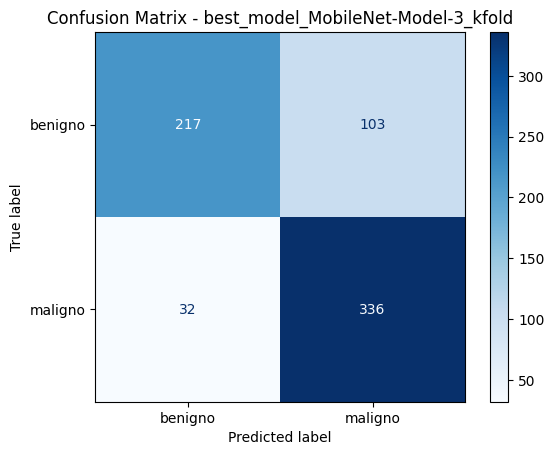

Classification Report - best_model_MobileNet-Model-3_kfold
              precision    recall  f1-score   support

     benigno       0.87      0.68      0.76       320
     maligno       0.77      0.91      0.83       368

    accuracy                           0.80       688
   macro avg       0.82      0.80      0.80       688
weighted avg       0.81      0.80      0.80       688


Evaluating model: best_model_MobileNet-Model-4_kfold
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 263ms/step
Best Threshold for best_model_MobileNet-Model-4_kfold: 0.34 with F1 Score: 0.8335


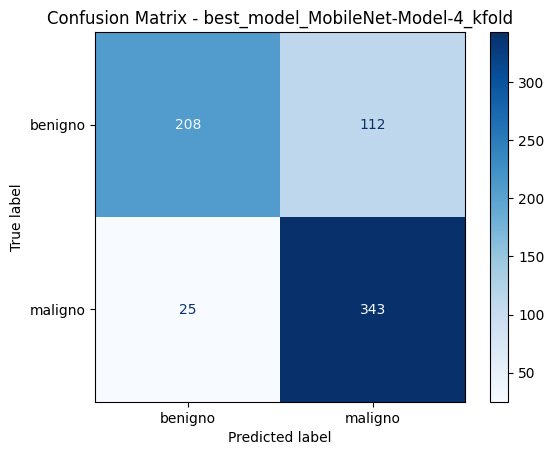

Classification Report - best_model_MobileNet-Model-4_kfold
              precision    recall  f1-score   support

     benigno       0.89      0.65      0.75       320
     maligno       0.75      0.93      0.83       368

    accuracy                           0.80       688
   macro avg       0.82      0.79      0.79       688
weighted avg       0.82      0.80      0.80       688


Model Performance Summary:
best_model_MobileNet-Model-3_kfold:
  - Accuracy: 0.8038
  - F1 Score: 0.8327
  - Precision: 0.7654
  - Recall: 0.9130
  - Best Threshold: 0.48
--------------------------------------------------
best_model_MobileNet-Model-4_kfold:
  - Accuracy: 0.8009
  - F1 Score: 0.8335
  - Precision: 0.7538
  - Recall: 0.9321
  - Best Threshold: 0.34
--------------------------------------------------


In [ ]:
import os
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Layer
from tensorflow.keras.utils import CustomObjectScope

# Crear clases personalizadas para reemplazar Lambda
@tf.keras.utils.register_keras_serializable()
class AvgPoolSpatial(Layer):
    def call(self, inputs):
        return tf.reduce_mean(inputs, axis=-1, keepdims=True)

@tf.keras.utils.register_keras_serializable()
class MaxPoolSpatial(Layer):
    def call(self, inputs):
        return tf.reduce_max(inputs, axis=-1, keepdims=True)

# Paths to dataset
test_dir = '1_dataset/test'

# Configuración de ImageDataGenerator
batch_size = 32
img_height = 224
img_width = 224

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Identificar modelos guardados en el directorio actual
model_files = [f for f in os.listdir('.') if f.endswith(".keras")]
results = {}

def evaluate_model(model_path, test_generator):
    model_name = os.path.basename(model_path).replace(".keras", "")
    print(f"\nEvaluating model: {model_name}")

    # Incluir clases personalizadas durante la carga del modelo
    custom_objects = {
        'AvgPoolSpatial': AvgPoolSpatial,
        'MaxPoolSpatial': MaxPoolSpatial
    }
    with CustomObjectScope(custom_objects):
        model = load_model(model_path, custom_objects=custom_objects)

    # Realizar predicciones
    y_pred_prob = model.predict(test_generator).flatten()
    y_true = test_generator.classes

    # Encontrar el mejor umbral basado en F1-Score
    thresholds = np.linspace(0, 1, 100)
    best_threshold = 0.5
    best_f1 = 0

    for threshold in thresholds:
        y_pred_temp = (y_pred_prob >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred_temp)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    print(f"Best Threshold for {model_name}: {best_threshold:.2f} with F1 Score: {best_f1:.4f}")

    # Predecir con el mejor umbral
    y_pred = (y_pred_prob >= best_threshold).astype(int)

    # Mostrar matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # Reporte de clasificación
    print(f"Classification Report - {model_name}")
    print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

    # Guardar métricas
    accuracy = np.mean(y_pred == y_true)
    results[model_name] = {
        "accuracy": accuracy,
        "f1_score": best_f1,
        "precision": precision_score(y_true, y_pred),
        "recall": recall_score(y_true, y_pred),
        "best_threshold": best_threshold
    }
    return model_name, results[model_name]

# Evaluar todos los modelos en el directorio actual
for model_file in model_files:
    evaluate_model(model_file, test_generator)

print("\nModel Performance Summary:")
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  - Accuracy: {metrics['accuracy']:.4f}")
    print(f"  - F1 Score: {metrics['f1_score']:.4f}")
    print(f"  - Precision: {metrics['precision']:.4f}")
    print(f"  - Recall: {metrics['recall']:.4f}")
    print(f"  - Best Threshold: {metrics['best_threshold']:.2f}")
    print("-" * 50)


In [ ]:
from google.colab import files
import glob

# Buscar todos los archivos que terminan en .keras
keras_files = glob.glob("*.keras")

# Descargar cada archivo encontrado
for file in keras_files:
    print(f"Descargando: {file}")
    files.download(file)


# Self-Learning

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50

# Crear el modelo SimCLR
def simclr_model(input_shape=(224, 224, 3), projection_dim=128):
    base_model = ResNet50(include_top=False, weights=None, input_shape=input_shape)
    base_model.trainable = True

    inputs = tf.keras.Input(shape=input_shape)
    x = base_model(inputs, training=True)
    x = layers.GlobalAveragePooling2D()(x)

    # Proyección para SimCLR
    x = layers.Dense(1024, activation="relu")(x)
    x = layers.Dense(projection_dim, activation=None)(x)  # Proyección final
    return Model(inputs, x)

# Contraste: Pérdida contrastiva
def contrastive_loss(proj1, proj2, temperature=0.1):
    projections = tf.concat([proj1, proj2], axis=0)
    similarities = tf.linalg.matmul(projections, projections, transpose_b=True)
    logits = similarities / temperature
    labels = tf.range(proj1.shape[0])
    labels = tf.concat([labels, labels], axis=0)
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)(labels, logits)
    return loss

# Entrenar SimCLR
simclr = simclr_model()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

for epoch in range(100):  # Ajustar según el tamaño del dataset
    for (batch1, batch2) in unlabeled_dataset:  # Dataset sin etiquetas
        with tf.GradientTape() as tape:
            proj1 = simclr(batch1, training=True)
            proj2 = simclr(batch2, training=True)
            loss = contrastive_loss(proj1, proj2)
        gradients = tape.gradient(loss, simclr.trainable_variables)
        optimizer.apply_gradients(zip(gradients, simclr.trainable_variables))


In [ ]:
def fine_tune_simclr(simclr_model, num_classes=1):
    simclr_model.trainable = True  # Fine-tuning del modelo preentrenado
    inputs = simclr_model.input
    x = simclr_model(inputs, training=True)

    # Capas densas
    x = layers.Dense(256, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(num_classes, activation="sigmoid")(x)

    model = Model(inputs, x)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss="binary_crossentropy",
        metrics=["accuracy", "Precision", "Recall", "AUC"]
    )
    return model

# Entrenar con datos etiquetados
model = fine_tune_simclr(simclr)
model.fit(labeled_dataset, epochs=30, validation_data=val_dataset)


# Test

In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Registrar clases personalizadas
@tf.keras.utils.register_keras_serializable()
class ExpandDimsLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        return tf.expand_dims(inputs, axis=1)

@tf.keras.utils.register_keras_serializable()
class SqueezeDimsLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        return tf.squeeze(inputs, axis=1)

# Ruta de los modelos guardados
model_paths = [
    "best_model_Xception-Model-3_kfold.keras",
    "best_model_EfficientNetB3-Model-1_kfold.keras",
    "best_model_ResNet50-Model-6_kfold.keras",
    "best_model_InceptionV3-Model-4_kfold.keras"
]

# Cargar los modelos con custom_objects
models = [
    tf.keras.models.load_model(
        path,
        custom_objects={
            "ExpandDimsLayer": ExpandDimsLayer,
            "SqueezeDimsLayer": SqueezeDimsLayer,
        }
    ) for path in model_paths
]

# Paths to dataset
test_dir = '1_dataset/test'

# ImageDataGenerator setup
batch_size = 32
img_height = 224
img_width = 224

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Diccionario para almacenar las métricas de los modelos
results = {
    "Model": [],
    "Threshold": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "ROC-AUC": []
}

# Función para encontrar el mejor threshold
def find_best_threshold(y_true, y_pred_proba):
    best_threshold = 0.5
    best_f1 = 0
    thresholds = np.arange(0.1, 0.9, 0.01)
    for threshold in thresholds:
        y_pred_binary = (y_pred_proba >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred_binary)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    return best_threshold

# Evaluar cada modelo
for idx, model in enumerate(models):
    print(f"Evaluando Modelo {idx + 1}...")

    y_pred_proba = model.predict(test_generator).flatten()  # Probabilidades
    y_true = test_generator.classes

    # Encontrar el mejor threshold
    best_threshold = find_best_threshold(y_true, y_pred_proba)
    y_pred_binary = (y_pred_proba >= best_threshold).astype(int)

    # Calcular métricas con el mejor threshold
    accuracy = accuracy_score(y_true, y_pred_binary)
    precision = precision_score(y_true, y_pred_binary)
    recall = recall_score(y_true, y_pred_binary)
    f1 = f1_score(y_true, y_pred_binary)
    roc_auc = roc_auc_score(y_true, y_pred_proba)

    # Agregar resultados a la tabla
    results["Model"].append(f"Model {idx + 1}")
    results["Threshold"].append(best_threshold)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    results["ROC-AUC"].append(roc_auc)

# Crear un DataFrame para mostrar los resultados
results_df = pd.DataFrame(results)

# Mostrar la tabla
print(results_df)

results_df.to_csv("model_evaluation_results.csv", index=False)
print("Resultados guardados en 'model_evaluation_results.csv'.")


Found 688 images belonging to 2 classes.
Evaluando Modelo 1...


Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.


22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 243ms/step
Evaluando Modelo 2...


You are using a softmax over axis 3 of a tensor of shape (32, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?


21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step

You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?


22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 459ms/step
Evaluando Modelo 3...


You are using a softmax over axis 3 of a tensor of shape (32, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?


21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step

You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?


22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 235ms/step
Evaluando Modelo 4...
22/22 ━━━━━━━━━━━━━━━━━━━━ 17s 442ms/step
     Model  Threshold  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Model 1       0.44  0.824128   0.785219  0.923913  0.848939  0.856590
1  Model 2       0.10  0.534884   0.534985  0.997283  0.696395  0.562334
2  Model 3       0.41  0.850291   0.801822  0.956522  0.872367  0.859778
3  Model 4       0.32  0.824128   0.764454  0.970109  0.855090  0.867298
Resultados guardados en 'model_evaluation_results.csv'.


In [ ]:
from google.colab import files
files.download("model_evaluation_results.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

test_generator.reset()  # Reset before predicting

# Make predictions once
test_generator.reset()
predictions_resnet = np.round(resnet50.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1))
test_generator.reset()
predictions_inception = np.round(inception_v3.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1))
test_generator.reset()
predictions_b3 = np.round(efficientnet_b3.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1))
test_generator.reset()
predictions_student = np.round(student_model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1))  # Predicción del modelo semi-supervisado

# Obtener las etiquetas verdaderas (y_true) del test_generator
true_labels = test_generator.classes  # Esto contiene las etiquetas verdaderas (0 o 1)

# 2. Calcular las métricas

# Para el modelo EfficientNet B0
accuracy_b0 = accuracy_score(true_labels, predictions_resnet)
precision_b0 = precision_score(true_labels, predictions_resnet)
recall_b0 = recall_score(true_labels, predictions_resnet)
f1_b0 = f1_score(true_labels, predictions_resnet)
auc_b0 = roc_auc_score(true_labels, predictions_resnet)

# Imprimir las métricas del modelo B0
print("Métricas para ResNet101:")
print(f"Accuracy: {accuracy_b0:.4f}")
print(f"Precision: {precision_b0:.4f}")
print(f"Recall: {recall_b0:.4f}")
print(f"F1-score: {f1_b0:.4f}")
print(f"AUC: {auc_b0:.4f}\n")

# Repetir lo mismo para los otros modelos B1 y B3

# Para el modelo EfficientNet B1
accuracy_b1 = accuracy_score(true_labels, predictions_inception)
precision_b1 = precision_score(true_labels, predictions_inception)
recall_b1 = recall_score(true_labels, predictions_inception)
f1_b1 = f1_score(true_labels, predictions_inception)
auc_b1 = roc_auc_score(true_labels, predictions_inception)

# Imprimir las métricas del modelo B1
print("Métricas para InceptionV3:")
print(f"Accuracy: {accuracy_b1:.4f}")
print(f"Precision: {precision_b1:.4f}")
print(f"Recall: {recall_b1:.4f}")
print(f"F1-score: {f1_b1:.4f}")
print(f"AUC: {auc_b1:.4f}\n")

# Para el modelo EfficientNet B3
accuracy_b3 = accuracy_score(true_labels, predictions_b3)
precision_b3 = precision_score(true_labels, predictions_b3)
recall_b3 = recall_score(true_labels, predictions_b3)
f1_b3 = f1_score(true_labels, predictions_b3)
auc_b3 = roc_auc_score(true_labels, predictions_b3)

# Imprimir las métricas del modelo B3
print("Métricas para EfficientNet B3:")
print(f"Accuracy: {accuracy_b3:.4f}")
print(f"Precision: {precision_b3:.4f}")
print(f"Recall: {recall_b3:.4f}")
print(f"F1-score: {f1_b3:.4f}")
print(f"AUC: {auc_b3:.4f}\n")

# Para el modelo Student (Semi-Supervised EfficientNet B3)
accuracy_student = accuracy_score(true_labels, predictions_student)
precision_student = precision_score(true_labels, predictions_student)
recall_student = recall_score(true_labels, predictions_student)
f1_student = f1_score(true_labels, predictions_student)
auc_student = roc_auc_score(true_labels, predictions_student)

# Imprimir las métricas del modelo Student (Semi-Supervised EfficientNet B3)
print("Métricas para Semi-Supervised EfficientNet B3 (Student):")
print(f"Accuracy: {accuracy_student:.4f}")
print(f"Precision: {precision_student:.4f}")
print(f"Recall: {recall_student:.4f}")
print(f"F1-score: {f1_student:.4f}")
print(f"AUC: {auc_student:.4f}")

## Ensamble Modelos

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Make predictions once
test_generator.reset()
predictions_resnet = np.round(resnet50.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1))
test_generator.reset()
predictions_inception = np.round(inception_v3.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1))
test_generator.reset()
predictions_b3 = np.round(efficientnet_b3.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1))

# Votación por mayoría: si 2 o más modelos predicen 1, el resultado será 1; de lo contrario, será 0
predictions_ensemble = np.round((predictions_resnet + predictions_inception + predictions_b3) / 3)

# Obtener las etiquetas verdaderas (y_true) del test_generator
true_labels = test_generator.classes  # Esto contiene las etiquetas verdaderas (0 o 1)

# 2. Calcular las métricas para el ensamblaje
accuracy_ensemble = accuracy_score(true_labels, predictions_ensemble)
precision_ensemble = precision_score(true_labels, predictions_ensemble)
recall_ensemble = recall_score(true_labels, predictions_ensemble)
f1_ensemble = f1_score(true_labels, predictions_ensemble)
auc_ensemble = roc_auc_score(true_labels, predictions_ensemble)

# Imprimir las métricas del ensamblaje
print("Métricas para el Ensamblaje de Modelos Resnet50 + InceptionV3 + EfficientNet B3:")
print(f"Accuracy: {accuracy_ensemble:.4f}")
print(f"Precision: {precision_ensemble:.4f}")
print(f"Recall: {recall_ensemble:.4f}")
print(f"F1-score: {f1_ensemble:.4f}")
print(f"AUC: {auc_ensemble:.4f}")


## Ensamble Modelos + Semi-Supervised

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Make predictions once
test_generator.reset()
predictions_resnet = np.round(resnet50.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1))
test_generator.reset()
predictions_inception = np.round(inception_v3.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1))
test_generator.reset()
predictions_student = np.round(student_model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1))

# Votación por mayoría: si 2 o más modelos predicen 1, el resultado será 1; de lo contrario, será 0
predictions_ensemble = np.round((predictions_resnet + predictions_inception + predictions_student) / 3)

# Obtener las etiquetas verdaderas (y_true) del test_generator
true_labels = test_generator.classes  # Esto contiene las etiquetas verdaderas (0 o 1)

# 2. Calcular las métricas para el ensamblaje
accuracy_ensemble = accuracy_score(true_labels, predictions_ensemble)
precision_ensemble = precision_score(true_labels, predictions_ensemble)
recall_ensemble = recall_score(true_labels, predictions_ensemble)
f1_ensemble = f1_score(true_labels, predictions_ensemble)
auc_ensemble = roc_auc_score(true_labels, predictions_ensemble)

# Imprimir las métricas del ensamblaje
print("Métricas para el Ensamblaje de Modelos Resnet50 + InceptionV3 + EfficientNet B3 (Semi-Supervised):")
print(f"Accuracy: {accuracy_ensemble:.4f}")
print(f"Precision: {precision_ensemble:.4f}")
print(f"Recall: {recall_ensemble:.4f}")
print(f"F1-score: {f1_ensemble:.4f}")
print(f"AUC: {auc_ensemble:.4f}")


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import os

# Función F2 Score
@tf.keras.utils.register_keras_serializable()
def f2_score(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.round(y_pred)

    tp = tf.reduce_sum(tf.cast(y_true * y_pred, 'float'), axis=0)
    fp = tf.reduce_sum(tf.cast((1 - y_true) * y_pred, 'float'), axis=0)
    fn = tf.reduce_sum(tf.cast(y_true * (1 - y_pred), 'float'), axis=0)

    precision = tp / (tp + fp + tf.keras.backend.epsilon())
    recall = tp / (tp + fn + tf.keras.backend.epsilon())

    f2 = 5 * (precision * recall) / (4 * precision + recall + tf.keras.backend.epsilon())

    return tf.reduce_mean(f2)

# Función para cargar imágenes y etiquetas
def load_images_and_labels(data_dir, img_size=(224, 224)):
    images = []
    labels = []
    class_names = os.listdir(data_dir)

    for class_name in class_names:
        class_dir = os.path.join(data_dir, class_name)
        label = class_names.index(class_name)

        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
            img = tf.keras.preprocessing.image.img_to_array(img)
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Función para construir el modelo
def build_model(input_shape=(224, 224, 3), dense_units=1024, dropout_rate=0.5):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dense(dense_units, activation='relu')(x)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Dense(dense_units*0.5, activation='relu')(x)
    x = BatchNormalization()(x)
    output = layers.Dense(1, activation='sigmoid')(x)  # Una neurona con activación sigmoid

    model = models.Model(inputs=base_model.input, outputs=output)
    return model

# Función para entrenar un modelo (Teacher o Student)
def train_model(model, X_train, y_train, X_val, y_val, model_name, epochs=25, batch_size=4):
    checkpoint = ModelCheckpoint(f'best_{model_name}.keras', monitor='val_f2_score', save_best_only=True, mode='max')
    early_stopping = EarlyStopping(monitor='val_f2_score', patience=5, restore_best_weights=True, mode='max')

    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='binary_crossentropy',
                  metrics=[
                    'accuracy',
                    tf.keras.metrics.Precision(),
                    tf.keras.metrics.Recall(),
                    tf.keras.metrics.AUC(name='auc'),
                    f2_score
                  ])

    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=epochs,
                        callbacks=[checkpoint, early_stopping],
                        batch_size=batch_size)
    return model

# --- Cargar los datos etiquetados ---
train_dir = '1_dataset/train'
valid_dir = '1_dataset/valid'
test_dir = '1_dataset/test'

X_train, y_train = load_images_and_labels(train_dir)
X_val, y_val = load_images_and_labels(valid_dir)
X_test, y_test = load_images_and_labels(test_dir)

# Preprocesar las imágenes
X_train = tf.keras.applications.resnet50.preprocess_input(X_train)
X_val = tf.keras.applications.resnet50.preprocess_input(X_val)
X_test = tf.keras.applications.resnet50.preprocess_input(X_test)

# --- Cargar datos no etiquetados ---
unlabeled_folder = '1_dataset_unlabeled'
X_unlabeled, _ = load_images_and_labels(unlabeled_folder)
X_unlabeled = tf.keras.applications.resnet50.preprocess_input(X_unlabeled)

# --- Proceso iterativo de Teacher-Student ---
num_iterations = 20  # Número de iteraciones de Teacher-Student
dense_units = 1024  # Número de unidades de la capa densa
dropout_rate = 0.25  # Tasa de dropout

# Entrenar el modelo Teacher
teacher_model = build_model(dense_units=dense_units, dropout_rate=dropout_rate)
teacher_model = train_model(teacher_model, X_train, y_train, X_val, y_val, f"teacher_{i+1}", epochs=25, batch_size=4)

for i in range(num_iterations):
    print(f"\n--- Iteración {i+1} ---\n")

    # Generar pseudoetiquetas con el modelo Teacher
    pseudo_labels = (teacher_model.predict(X_unlabeled) > 0.5).astype(int)

    # Entrenar el modelo Student con las pseudoetiquetas
    student_model = build_model(dense_units=512, dropout_rate=dropout_rate)  # Menos unidades en Student
    student_model = train_model(student_model, X_unlabeled, pseudo_labels, X_val, y_val, f"student_{i+1}", epochs=1, batch_size=4)

    # Actualizar los datos etiquetados (Teacher + Student)
    # Aplanar pseudo_labels para que coincida con la dimensión de y_train
    pseudo_labels = np.squeeze(pseudo_labels)

    # Actualizar los datos etiquetados (Teacher + Student)
    X_train = np.concatenate([X_train, X_unlabeled])
    y_train = np.concatenate([y_train, pseudo_labels])

    # Ahora el Student se convierte en el Teacher
    teacher_model = student_model

# --- Evaluar el modelo final ---
# Evaluar el modelo en los datos de prueba
results = student_model.evaluate(X_test, y_test)

# Imprimir cada métrica evaluada
for metric_name, metric_value in zip(student_model.metrics_names, results):
    print(f"{metric_name}: {metric_value}")


# SAM + Clasificacion

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamPredictor
from PIL import Image
import cv2

# Función para realizar la predicción con el ensamblaje de EfficientNet
def ensemble_predictions(models, image):
    predictions = np.zeros((1, 1))  # Predicción para una sola imagen
    for model in models:
        preds = model.predict(image)
        predictions += preds
    # Promediar las predicciones
    final_predictions = predictions / len(models)
    return final_predictions

# Función para realizar la segmentación con SAM
def perform_segmentation_sam(image_path, sam_predictor):
    image = np.array(Image.open(image_path))
    sam_predictor.set_image(image)

    # Aquí puedes ajustar los puntos de segmentación para SAM
    input_point = np.array([[image.shape[1]//2, image.shape[0]//2]])  # Punto central de la imagen
    input_label = np.array([1])  # Etiqueta de fondo o primer plano

    # Realizar la predicción de segmentación
    masks, _, _ = sam_predictor.predict(point_coords=input_point, point_labels=input_label, multimask_output=False)
    return masks[0], image

# Función para mostrar la imagen, segmentación y predicción de clasificación
def show_results(image, mask, prediction):
    # Mostrar la imagen original
    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title("Imagen original")

    # Mostrar la máscara de segmentación
    plt.subplot(1, 3, 2)
    plt.imshow(image)
    plt.imshow(mask, alpha=0.5)  # Superponer la máscara con transparencia
    plt.title("Segmentación con SAM")

    # Mostrar la predicción de clasificación
    plt.subplot(1, 3, 3)
    plt.text(0.5, 0.5, f"Predicción: {'Maligno' if prediction > 0.5 else 'Benigno'}", fontsize=15, ha='center')
    plt.title("Clasificación")

    plt.show()

# Cargar el modelo SAM
sam_checkpoint = "sam_vit_h_4b8939.pth"  # Ajusta según la ubicación de tu checkpoint
sam_model = sam_model_registry["vit_h"](checkpoint=sam_checkpoint)
sam_predictor = SamPredictor(sam_model)

# Cargar los modelos EfficientNet
models = [efficientnet_b0, efficientnet_b1, efficientnet_b3]

# Probar con un lote de imágenes del test_generator
for i, (batch_images, _) in enumerate(test_generator):
    if i >= 5:  # Limitar a 5 imágenes para ejemplo
        break

    # Predicción de clasificación para la imagen
    image = batch_images[0][np.newaxis, ...]  # Tomar la primera imagen del lote
    prediction = ensemble_predictions(models, image)

    # Realizar la segmentación con SAM para la misma imagen
    image_path = test_generator.filepaths[i]  # Obtener la ruta de la imagen original
    mask, original_image = perform_segmentation_sam(image_path, sam_predictor)

    # Mostrar los resultados
    show_results(original_image, mask, prediction)


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import os

# Función F2 Score
@tf.keras.utils.register_keras_serializable()
def f2_score(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.round(y_pred)

    tp = tf.reduce_sum(tf.cast(y_true * y_pred, 'float'), axis=0)
    fp = tf.reduce_sum(tf.cast((1 - y_true) * y_pred, 'float'), axis=0)
    fn = tf.reduce_sum(tf.cast(y_true * (1 - y_pred), 'float'), axis=0)

    precision = tp / (tp + fp + tf.keras.backend.epsilon())
    recall = tp / (tp + fn + tf.keras.backend.epsilon())

    f2 = 5 * (precision * recall) / (4 * precision + recall + tf.keras.backend.epsilon())

    return tf.reduce_mean(f2)

# Función para cargar imágenes y etiquetas
def load_images_and_labels(data_dir, img_size=(224, 224)):
    images = []
    labels = []
    class_names = os.listdir(data_dir)

    for class_name in class_names:
        class_dir = os.path.join(data_dir, class_name)
        label = class_names.index(class_name)

        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
            img = tf.keras.preprocessing.image.img_to_array(img)
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Función para construir el modelo
def build_model(input_shape=(224, 224, 3), dense_units=1024, dropout_rate=0.5):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dense(dense_units, activation='relu')(x)
    x = layers.Dropout(dropout_rate)(x)
    output = layers.Dense(1, activation='sigmoid')(x)  # Una neurona con activación sigmoid

    model = models.Model(inputs=base_model.input, outputs=output)
    return model

# Función para entrenar un modelo (Teacher o Student)
def train_model(model, X_train, y_train, X_val, y_val, model_name, epochs=1, batch_size=4):
    checkpoint = ModelCheckpoint(f'best_{model_name}.keras', monitor='val_f2_score', save_best_only=True, mode='max')
    early_stopping = EarlyStopping(monitor='val_f2_score', patience=5, restore_best_weights=True, mode='max')

    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='binary_crossentropy',
                  metrics=[
                    'accuracy',
                    tf.keras.metrics.Precision(),
                    tf.keras.metrics.Recall(),
                    tf.keras.metrics.AUC(name='auc'),
                    f2_score
                  ])

    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=epochs,
                        callbacks=[checkpoint, early_stopping],
                        batch_size=batch_size)
    return model

# --- Cargar los datos etiquetados ---
train_dir = '/kaggle/working/1_dataset/train'
valid_dir = '/kaggle/working/1_dataset/valid'
test_dir = '/kaggle/working/1_dataset/test'

X_train, y_train = load_images_and_labels(train_dir)
X_val, y_val = load_images_and_labels(valid_dir)
X_test, y_test = load_images_and_labels(test_dir)

# Preprocesar las imágenes
X_train = tf.keras.applications.resnet50.preprocess_input(X_train)
X_val = tf.keras.applications.resnet50.preprocess_input(X_val)
X_test = tf.keras.applications.resnet50.preprocess_input(X_test)

# --- Cargar datos no etiquetados ---
unlabeled_folder = '/kaggle/working/1_dataset_unlabeled'
X_unlabeled, _ = load_images_and_labels(unlabeled_folder)
X_unlabeled = tf.keras.applications.resnet50.preprocess_input(X_unlabeled)

# --- Proceso iterativo de Teacher-Student ---
num_iterations = 3  # Número de iteraciones de Teacher-Student
dense_units = 1024  # Número de unidades de la capa densa
dropout_rate = 0.5  # Tasa de dropout

for i in range(num_iterations):
    print(f"\n--- Iteración {i+1} ---\n")

    # Entrenar el modelo Teacher
    teacher_model = build_model(dense_units=dense_units, dropout_rate=dropout_rate)
    teacher_model = train_model(teacher_model, X_train, y_train, X_val, y_val, f"teacher_{i+1}", epochs=1, batch_size=4)

    # Generar pseudoetiquetas con el modelo Teacher
    pseudo_labels = (teacher_model.predict(X_unlabeled) > 0.5).astype(int)

    # Entrenar el modelo Student con las pseudoetiquetas
    student_model = build_model(dense_units=512, dropout_rate=dropout_rate)  # Menos unidades en Student
    student_model = train_model(student_model, X_unlabeled, pseudo_labels, X_val, y_val, f"student_{i+1}", epochs=1, batch_size=4)

    # Actualizar los datos etiquetados (Teacher + Student)
    X_train = np.concatenate([X_train, X_unlabeled])
    y_train = np.concatenate([y_train, pseudo_labels])

    # Ahora el Student se convierte en el Teacher
    teacher_model = student_model

# --- Evaluar el modelo final ---
# Evaluar el modelo en los datos de prueba
results = student_model.evaluate(X_test, y_test)

# Imprimir cada métrica evaluada
for metric_name, metric_value in zip(student_model.metrics_names, results):
    print(f"{metric_name}: {metric_value}")

In [ ]:
# Evaluar el modelo Student en el conjunto de pruebas
test_data_dir = '/kaggle/working/1_dataset/test'  # Ruta a las imágenes de prueba
X_test, y_test = load_images_and_labels(test_data_dir)
X_test = tf.keras.applications.resnet50.preprocess_input(X_test)

# Evaluar el modelo en los datos de prueba
results = student_model.evaluate(X_test, y_test)

# Imprimir cada métrica evaluada
for metric_name, metric_value in zip(student_model.metrics_names, results):
    print(f"{metric_name}: {metric_value}")

In [ ]:
student_model.save('/kaggle/working/student_model.h5')

In [ ]:
Trial 32 Complete [00h 18m 04s]
val_f2_score: 0.616666704416275

Best val_f2_score So Far: 0.7500000298023224
Total elapsed time: 10h 11m 42s

Search: Running Trial #33

Value             |Best Value So Far |Hyperparameter
0.0002565         |0.00092988        |l2_reg
0.35              |0.3               |dropout_rate
0.0011758         |0.0029766         |learning_rate

Trial 11 Complete [00h 01m 46s]

Best val_f2_score So Far: 0.7166666984558105
Total elapsed time: 02h 45m 47s

Search: Running Trial #12

Value             |Best Value So Far |Hyperparameter
0.0022622         |0.0010933         |l2_reg
0.4               |0.4               |dropout_rate
50                |40                |fine_tune_at
1.2599e-05        |2.7684e-05        |learning_rate
nadam             |nadam             |optimizer